In [64]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import animation

$$ \frac{\partial^2 \psi}{\partial x^2} + 2\eta\frac{\partial \psi}{\partial t} = \frac{1}{v^2}\frac{\partial^2 \psi}{\partial t^2}$$ <BR>
$$ \frac{\psi_{i,j+1}^n  -2\psi _{i,j}^n + \psi_{i,j-1}^n}{(\Delta y)^2} + \frac{\psi_{i+1,j}^n  -2\psi _{i,j}^n + \psi_{i-1 ,j}^n}{(\Delta x)^2} + \frac {2\eta} {2 \Delta t} \left( \psi_{i,j}^{n+1} - \psi _{i,j}^{n-1} \right) =
\frac {1}{v^2} = \frac {\psi_{i,j}^{n+1} -2 \psi_{i,j}^n + \psi_{i,j}^{n-1}}{\Delta t^2}$$ <BR>
$$\Big(\frac{1}{v^2(\Delta t)^2}-\frac{\eta}{\Delta t}\Big)\Psi_{i,j}^{n+1}=\frac{1}{(\Delta y)^2}\Big(\Psi_{i,j+1}^n-2\Psi_{i,j}^n+\Psi_{i,j-1}^n\Big)+\frac{1}{(\Delta x)^2}\Big(\Psi_{i+1,j}^n-2\Psi_{i,j}^n+\Psi_{i-1,j}^n\Big)+\frac{2}{v^2(\Delta t)^2}\Psi_{i,j}^n-\Big(\frac{\eta}{\Delta t}+\frac{1}{v^2(\Delta t)^2}\Big)\Psi_{i,j}^{n-1}$$ <BR>
$$ \Psi_{i,j}^{n+1}=\frac{v²(\Delta t)^2}{(\Delta y)^2\{1 - \eta v^2\Delta t\}}\{\Psi_{i,j+1}^n-2\Psi_{i,j}^n+\Psi_{i,j-1}^n\} +\frac{v^2(\Delta t)^3}{(\Delta x)^2\{\Delta t -\eta v^2(\Delta t)^2\}}\{\Psi_{i+1,j}^n -2\Psi_{i,j}^n+\Psi_{i-1,j}^n\}+\frac{2\Delta t}{\Delta t -\eta v^2(\Delta t)^2}\Psi_{i,j}^n+\frac{nv^2+ \Delta t+1}{nv^2 \Delta t-1}\Psi_{i,j}^{n-1} $$ <BR>
$$ \Psi_{i,j}^{n}=\frac{v²(\Delta t)^2}{(\Delta y)^2\{1 - \eta v^2\Delta t\}}\{\Psi_{i,j+1}^{n-1}-2\Psi_{i,j}^{n-1}+\Psi_{i,j-1}^{n-1}\} +\frac{v^2(\Delta t)^2}{(\Delta x)^2\{1 -\eta v^2\Delta t\}}\{\Psi_{i+1,j}^{n-1} -2\Psi_{i,j}^{n-1}+\Psi_{i-1,j}^{n-1}\}+\frac{2}{1 -\eta v^2\Delta t}\Psi_{i,j}^{n-1}+\frac{\eta v^2\Delta t+1}{\eta v^2\Delta t-1}\Psi_{i,j}^{n-2} $$ <BR>
$$ \Psi_{i,j}^{n}=\frac{k}{(\Delta y)^2}\{\Psi_{i,j+1}^{n-1}-2\Psi_{i,j}^{n-1}+\Psi_{i,j-1}^{n-1}\} +\frac{k}{(\Delta x)^2}\{\Psi_{i+1,j}^{n-1} -2\Psi_{i,j}^{n-1}+\Psi_{i-1,j}^{n-1}\}+\frac{2}{1 -\eta v^2\Delta t}\Psi_{i,j}^{n-1}+\frac{\eta v^2\Delta t+1}{\eta v^2\Delta t-1}\Psi_{i,j}^{n-2} $$ <BR>

In [65]:
tmin=0
tmax=.3105882/2.
xmin=-0.33  # en metros
xmax=0.33   # en metros
ymin=-0.33
ymax=0.33
Nt=6000
Nl=30
dt=(tmax-tmin)/Nt
dx=(xmax-xmin)/Nl
dy=(ymax-ymin)/Nl
n=10**(-3)
v=425. # m/s
k=(v**2 * dt**2)/(1 - n* v**2 *dt)
r=v*dt/dx
print "r=",r

r= 0.499999943182


In [66]:
xcoords=np.linspace(xmin,xmax,Nl)
ycoords=np.linspace(ymin,ymax,Nl)
xmesh,ymesh=np.meshgrid(xcoords,ycoords)
tcoords=np.linspace(tmin,tmax,Nt)
drum=np.zeros((Nt,Nl,Nl))
stdev=0.1
drum[0]=np.exp(-xmesh**2/(2*stdev**2))*np.exp(-ymesh**2/(2*stdev**2))
drum[1]=drum[0]+r**2/2.*(np.roll(drum[0],1,axis=0)+np.roll(drum[0],-1,axis=0)+np.roll(drum[0],1,axis=1)+np.roll(drum[0],-1,axis=1)-4*drum[0])

In [58]:
for i in range(2,Nt):
    pdrum=drum[i-1]
    ppdrum=drum[i-2]
    drum[i]=k/dy**2 * ( np.roll(pdrum,1,axis=1) -2*pdrum + np.roll(pdrum,-1,axis=1)) \
            + k/dx**2 * ( np.roll(pdrum,1,axis=0) -2*pdrum + np.roll(pdrum,-1,axis=0)) \
            + 2/(1-n*v**2*dt) * pdrum \
            + (n*v**2*dt+1)/(n*v**2*dt-1) * ppdrum
    drum[i,0]=0
    drum[i,-1]=0
    drum[i,:,0]=0
    drum[i,:,-1]=0

/usr/lib64/python2.7/site-packages/matplotlib/pyplot.py:424: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


KeyboardInterrupt: 

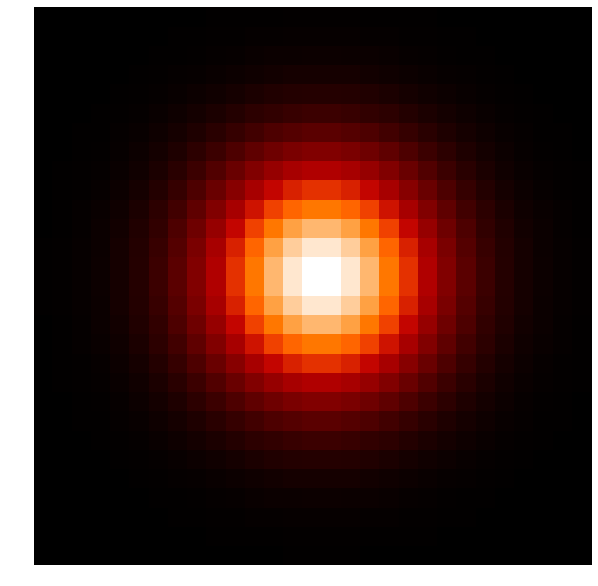

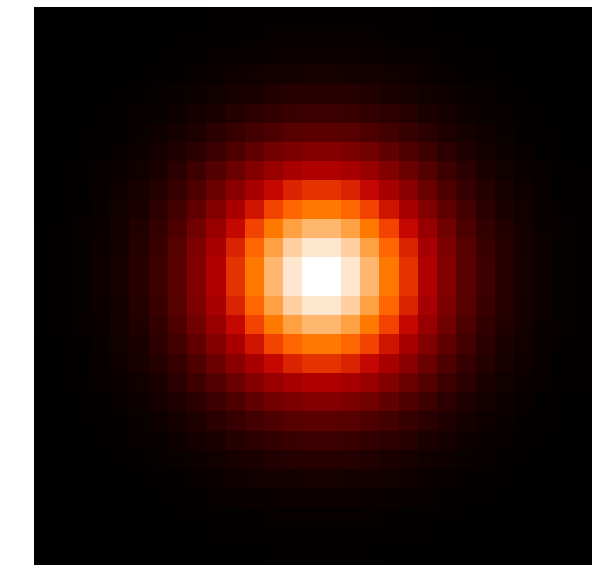

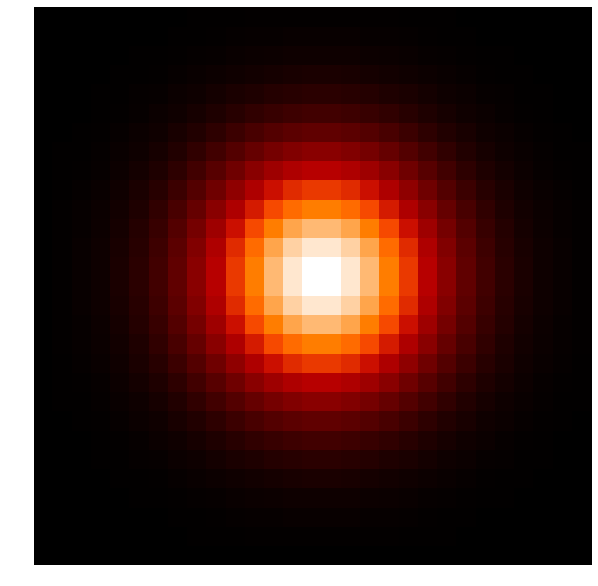

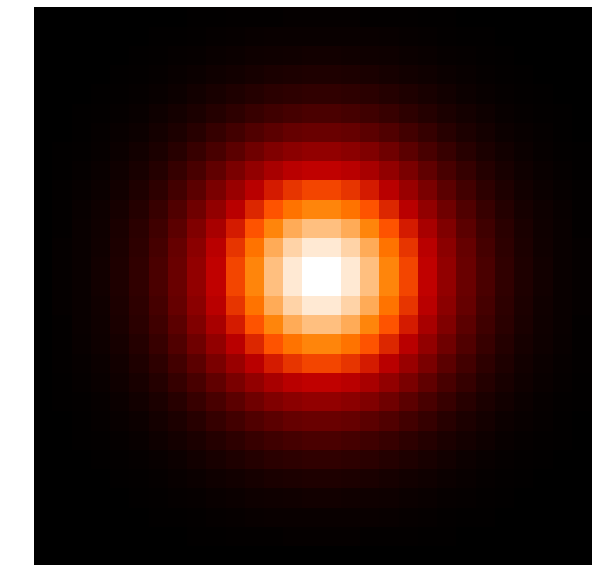

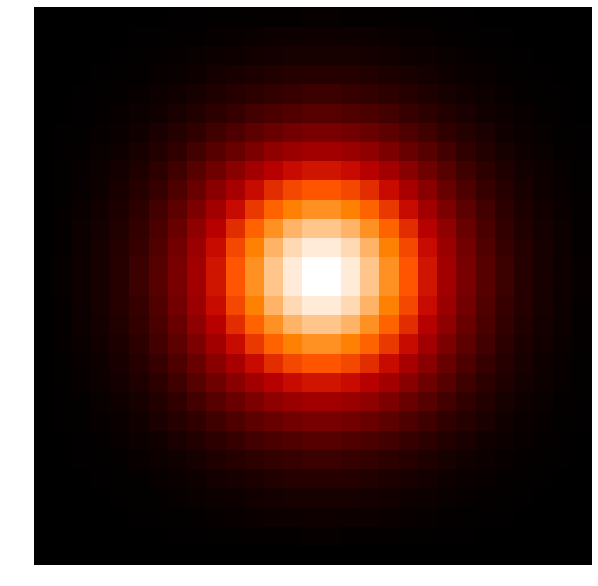

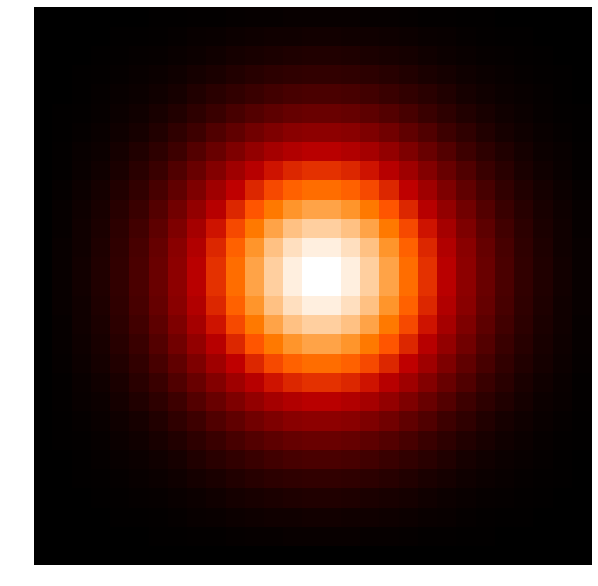

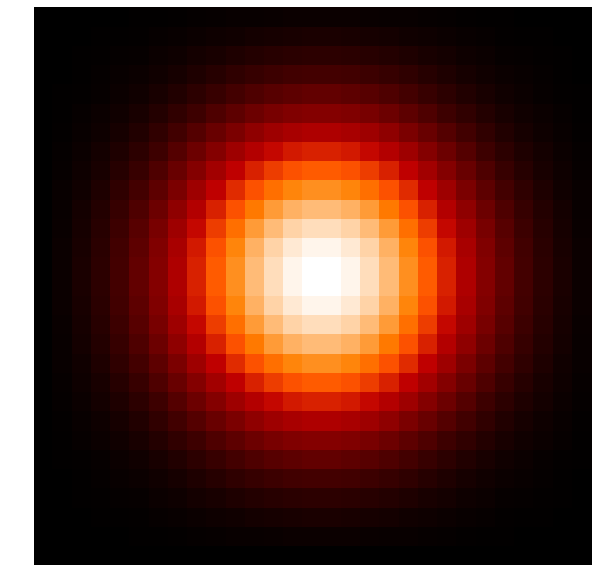

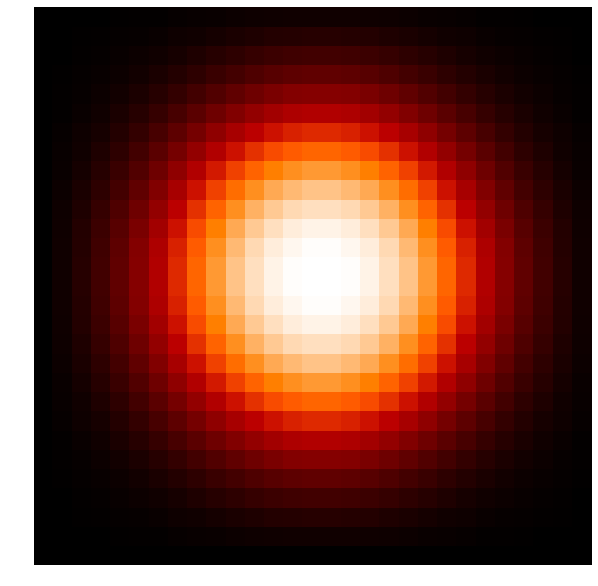

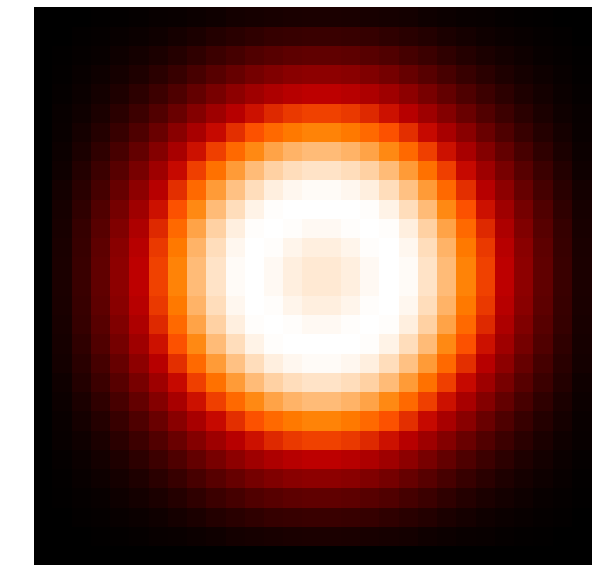

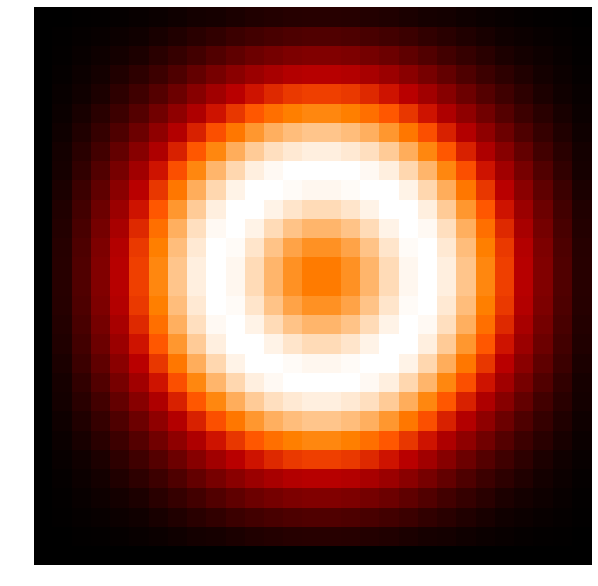

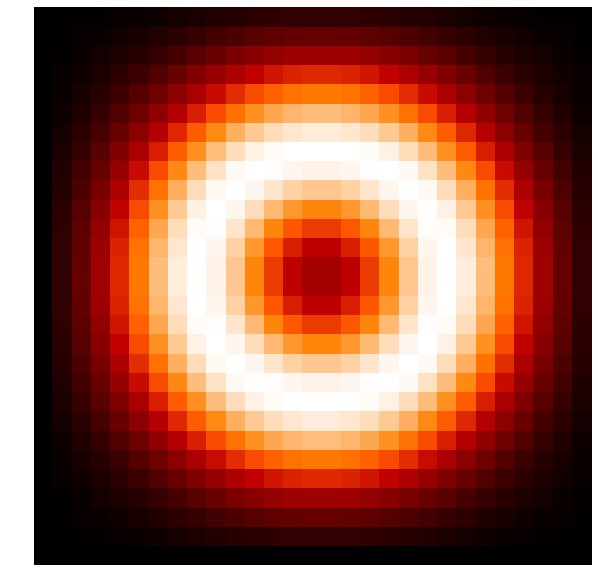

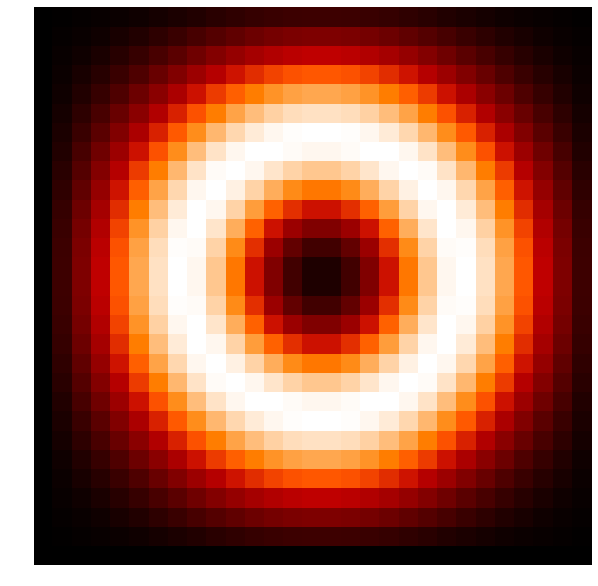

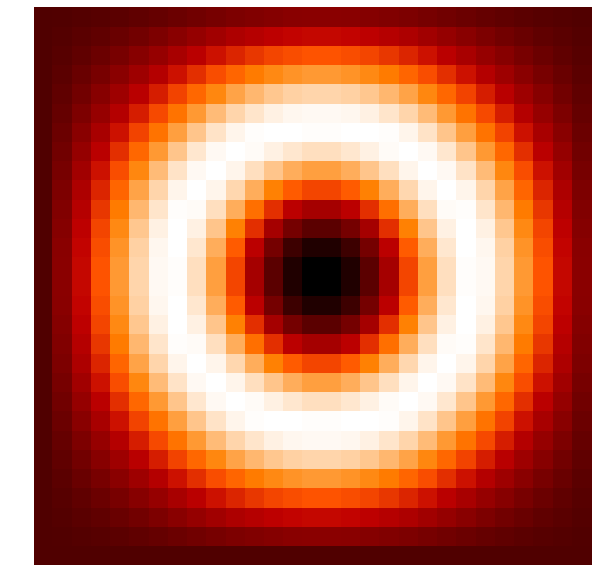

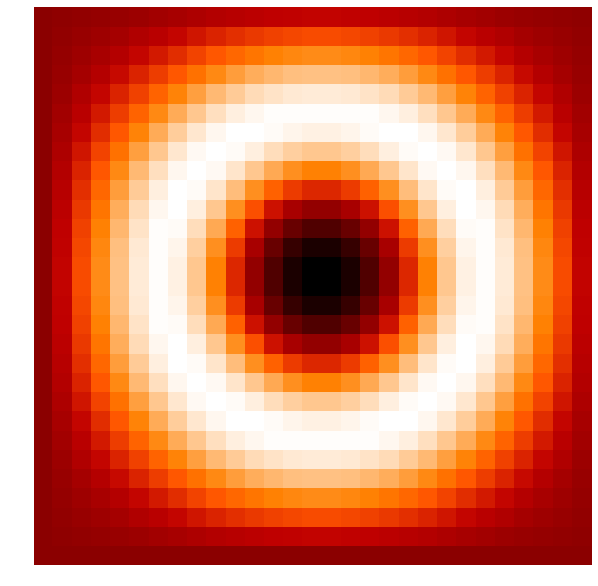

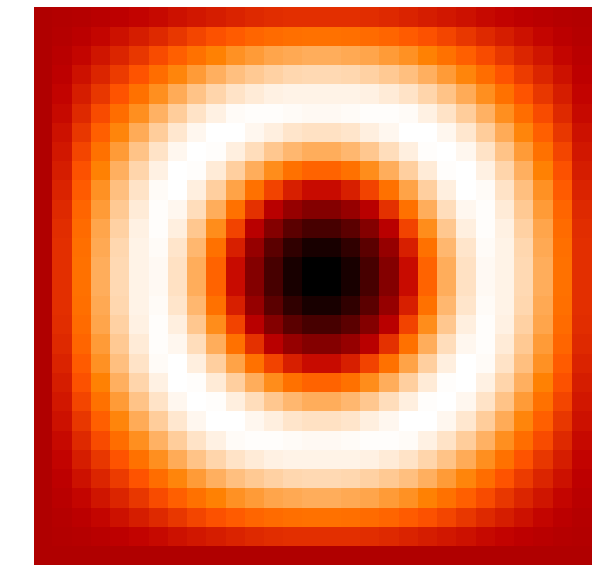

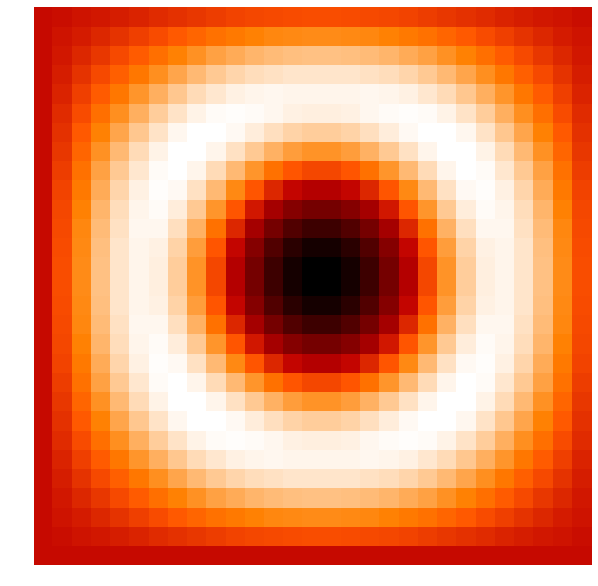

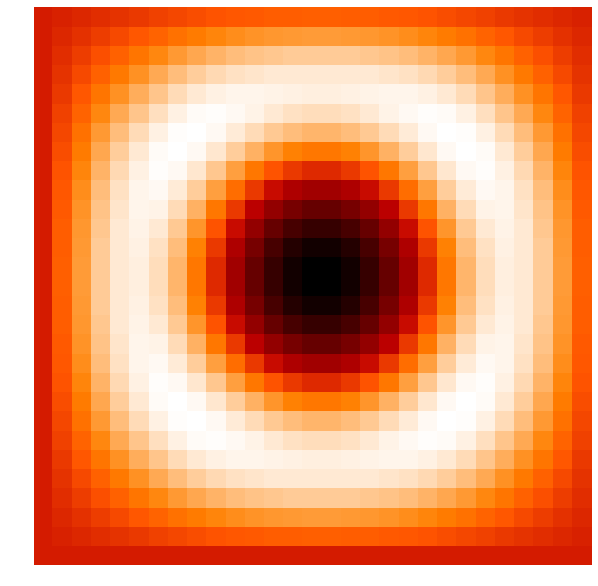

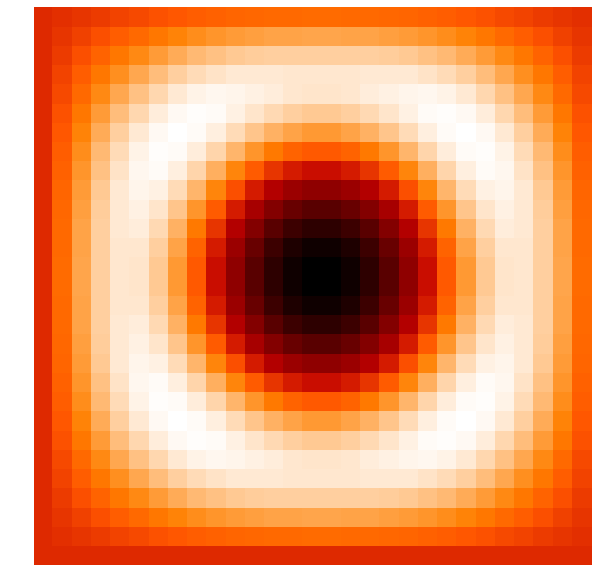

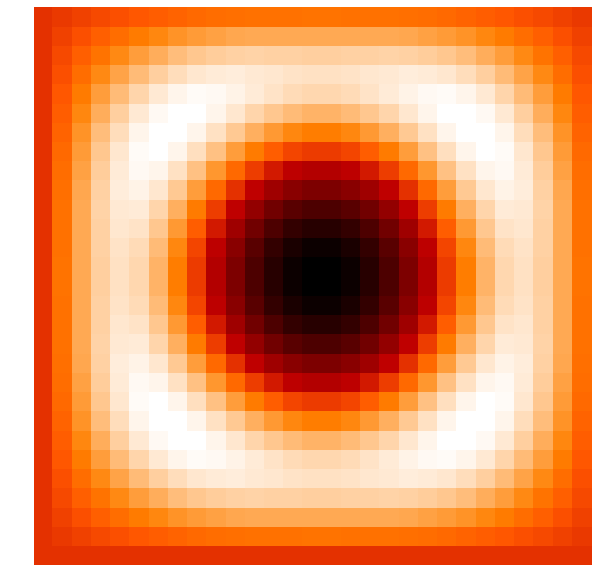

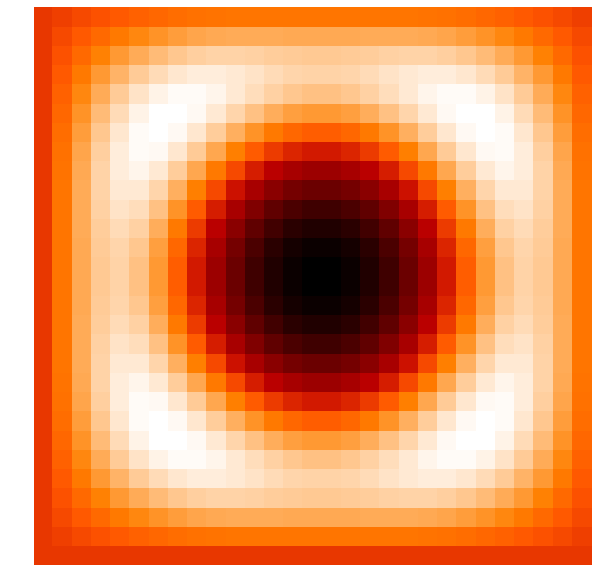

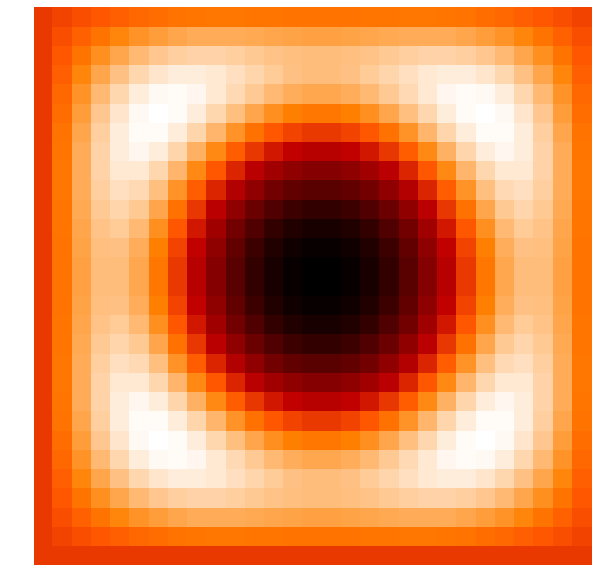

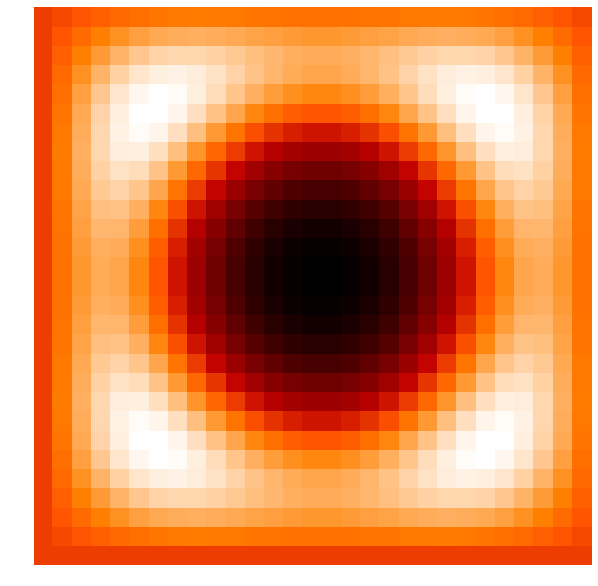

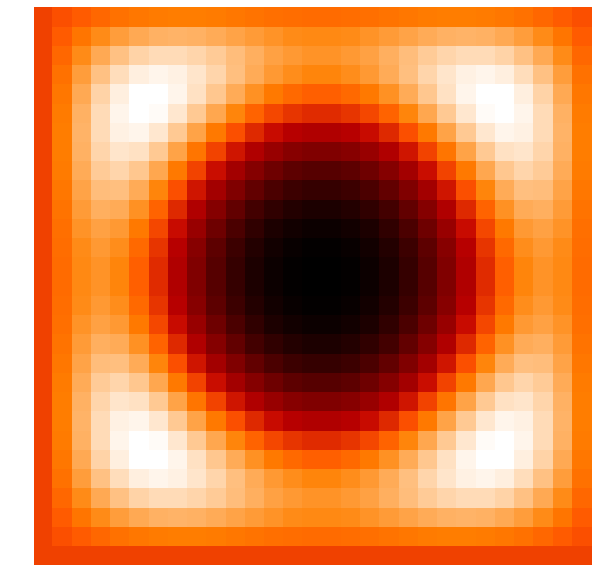

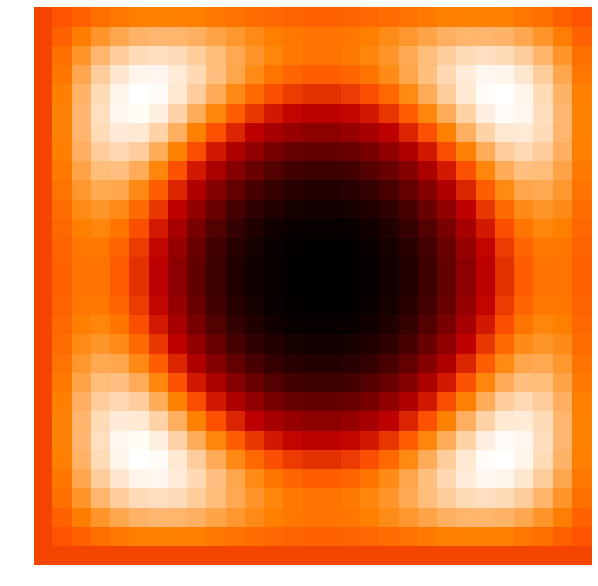

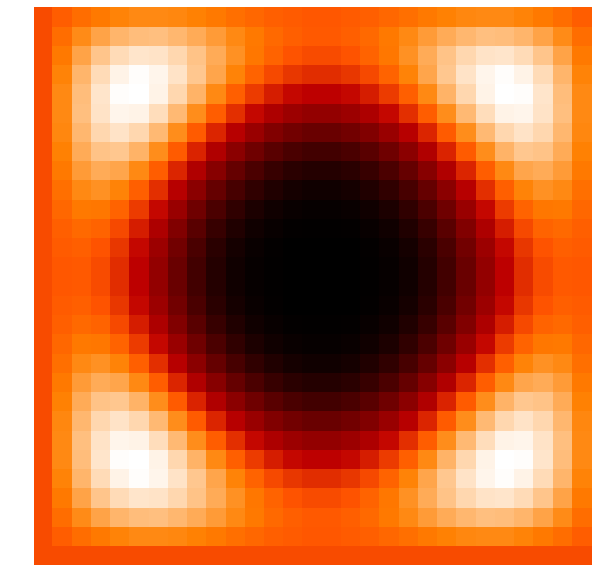

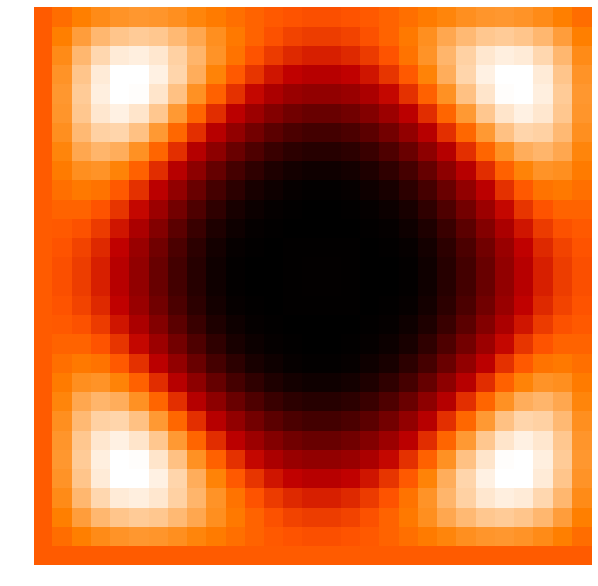

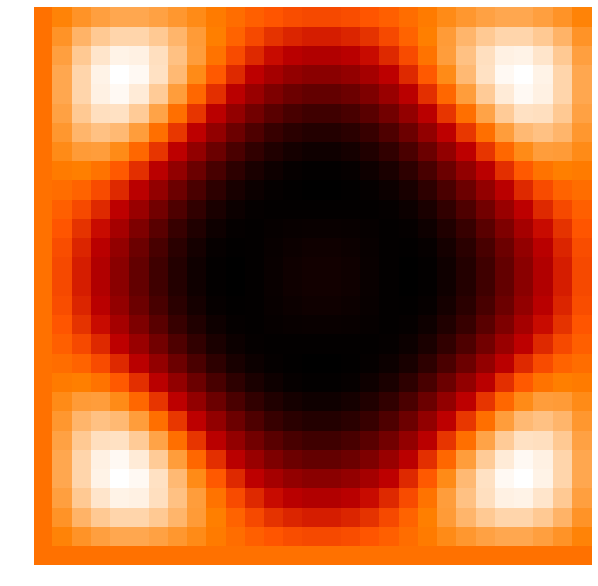

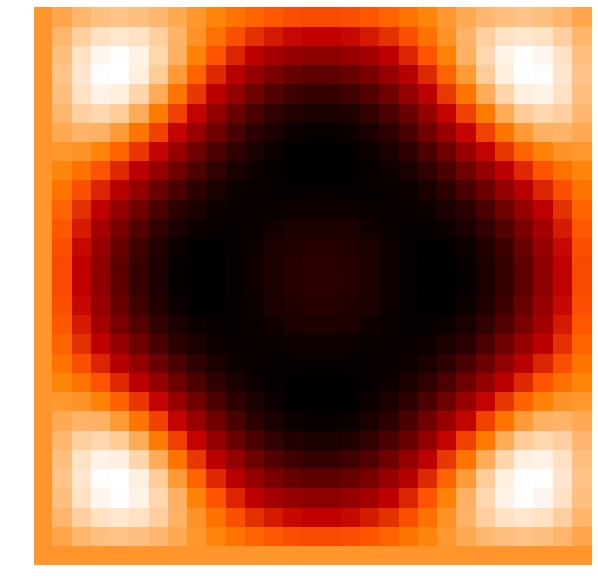

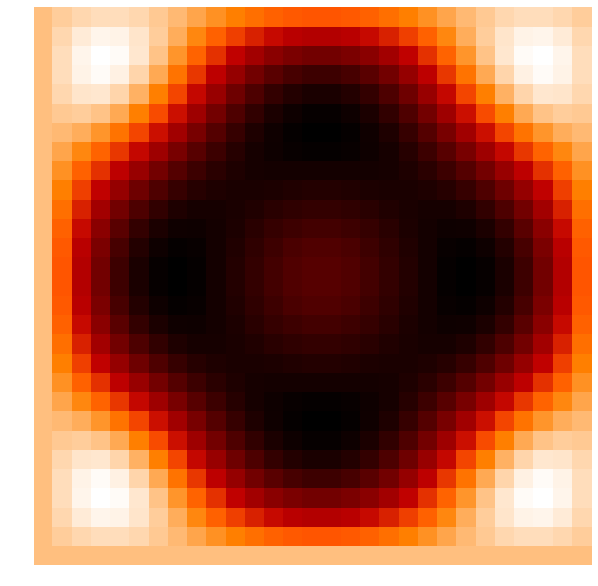

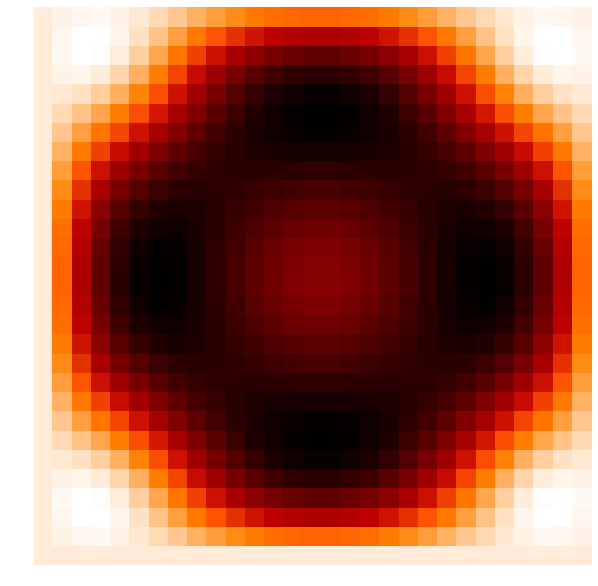

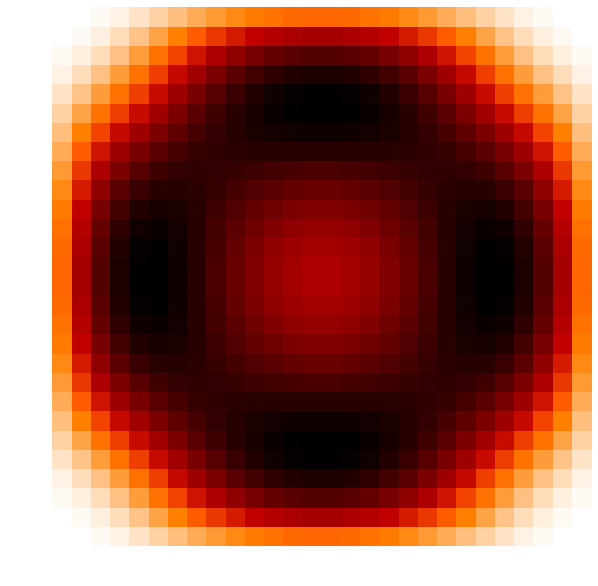

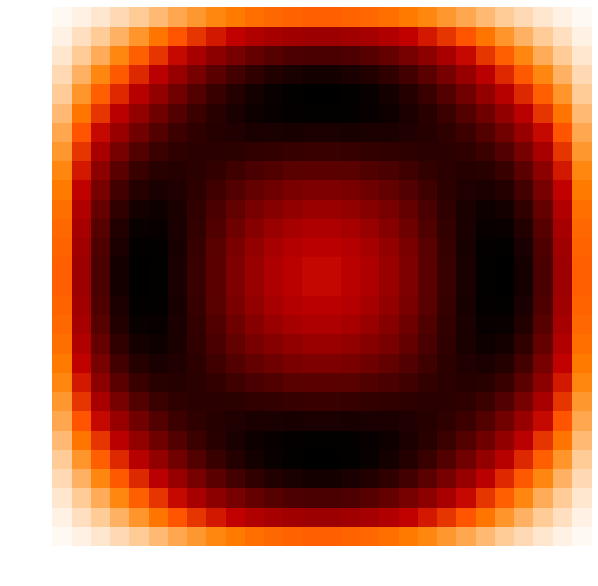

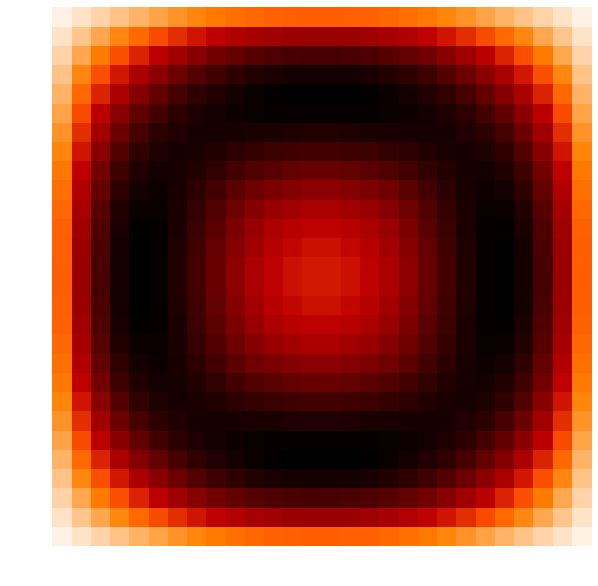

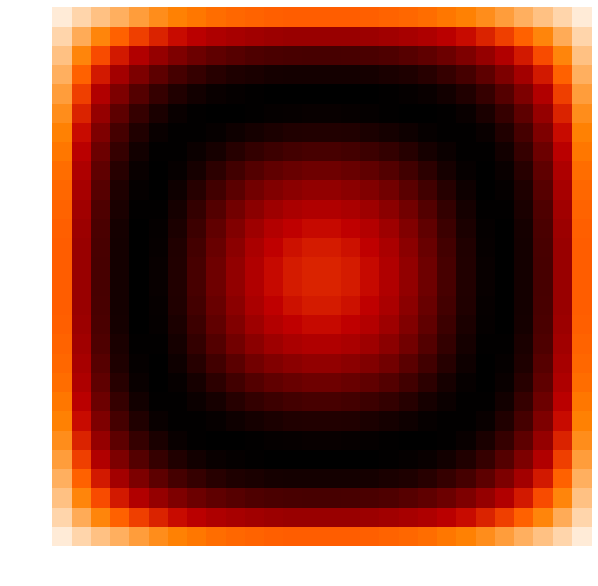

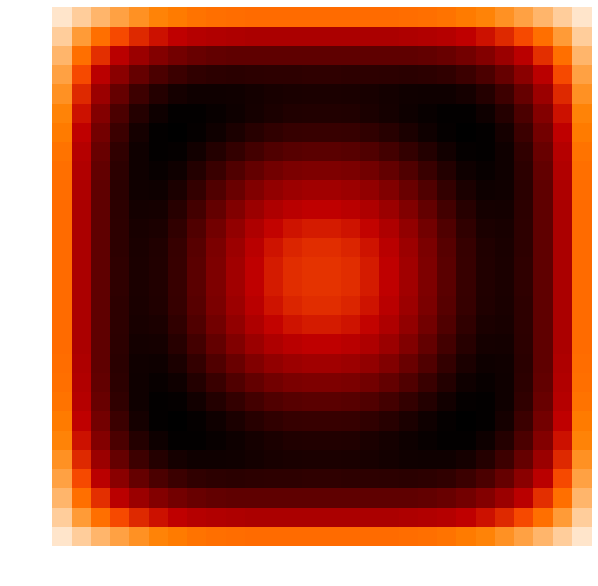

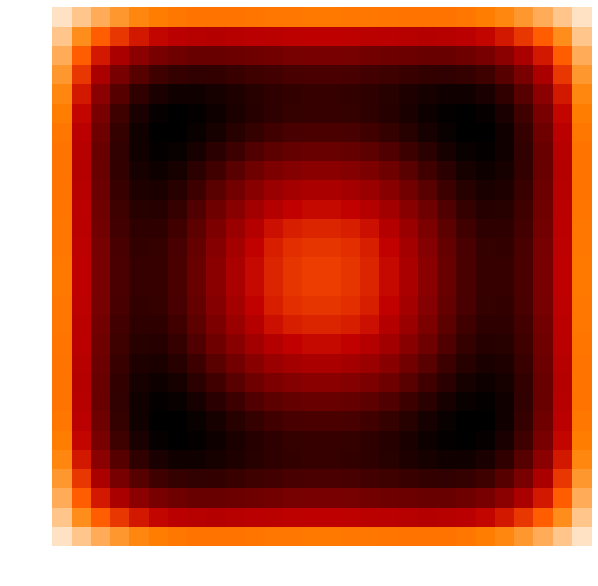

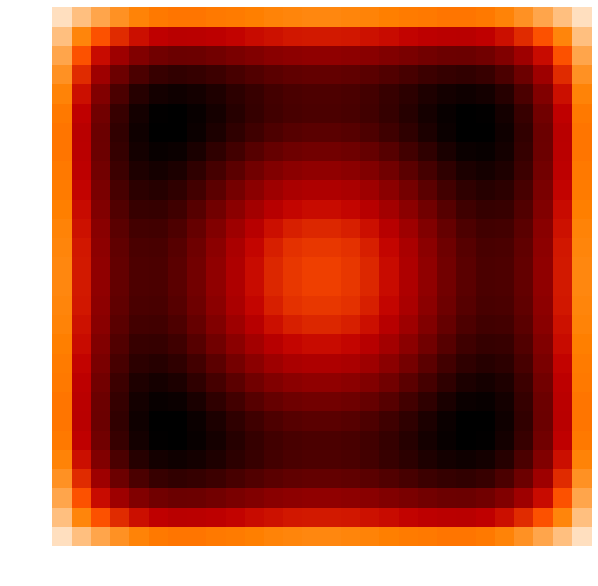

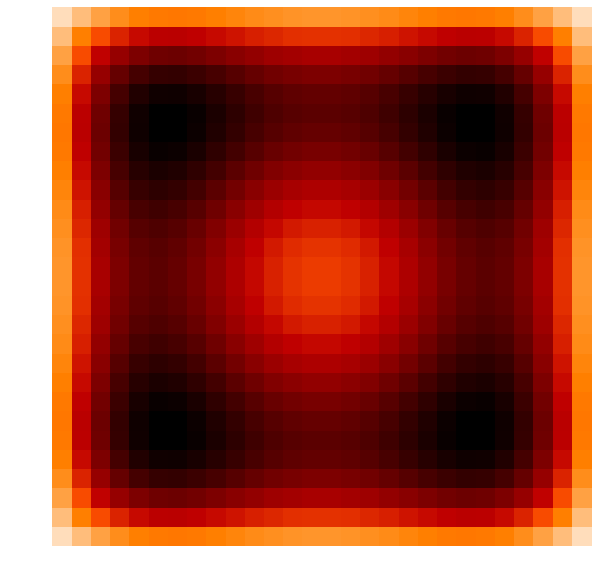

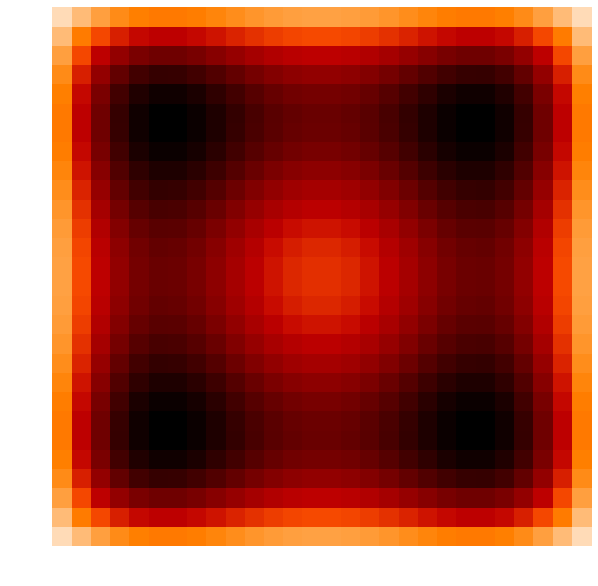

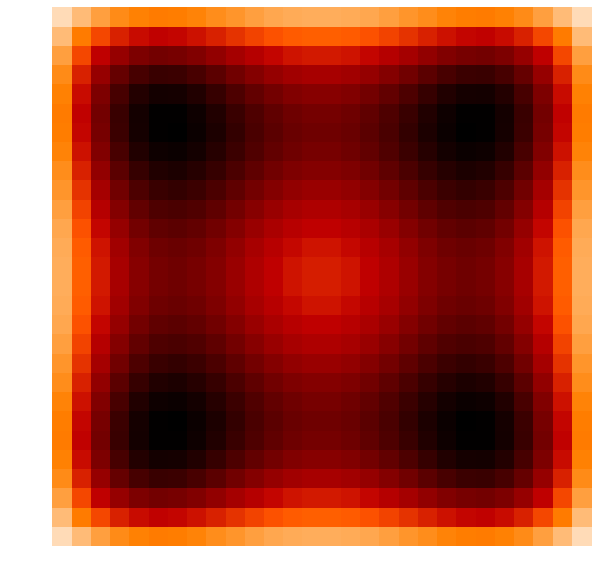

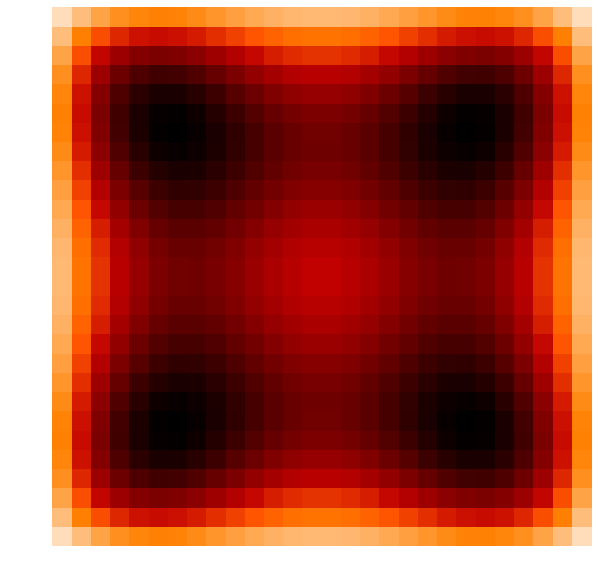

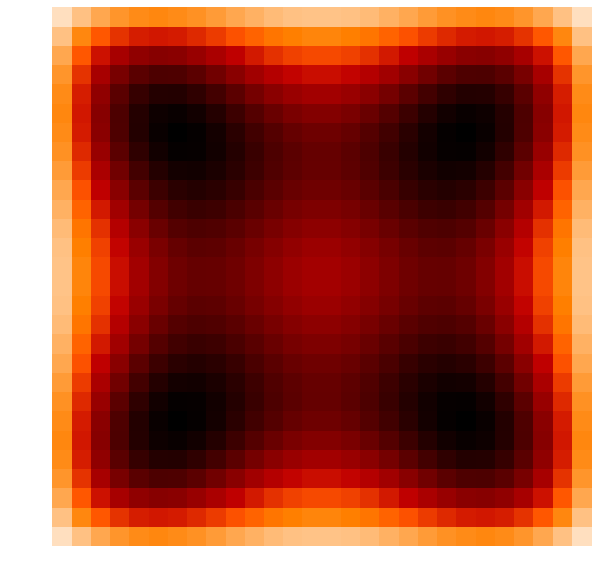

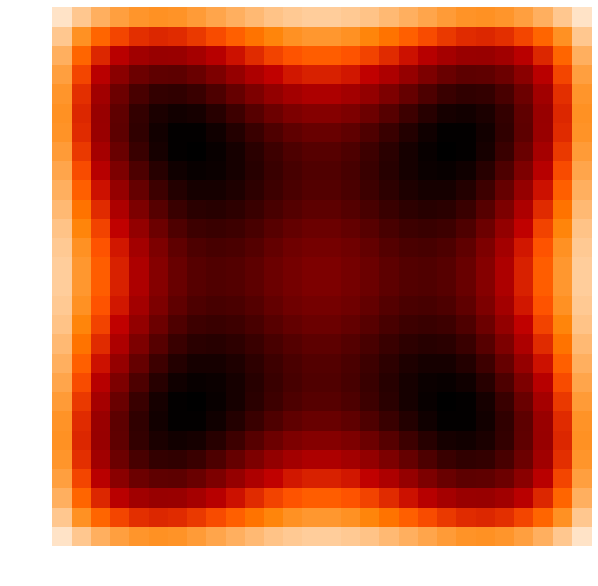

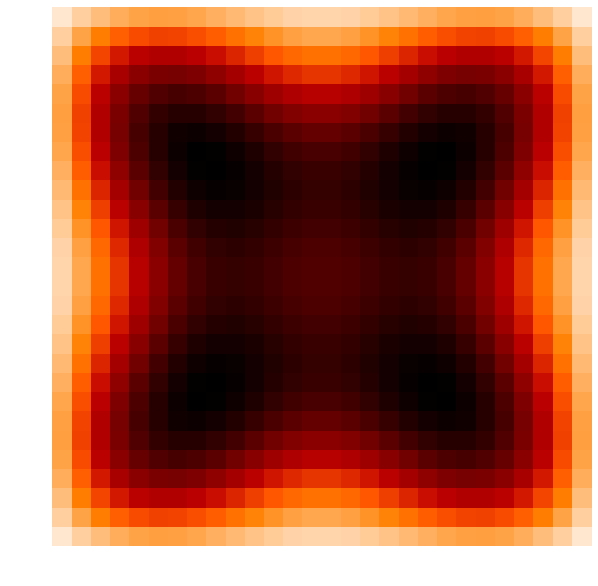

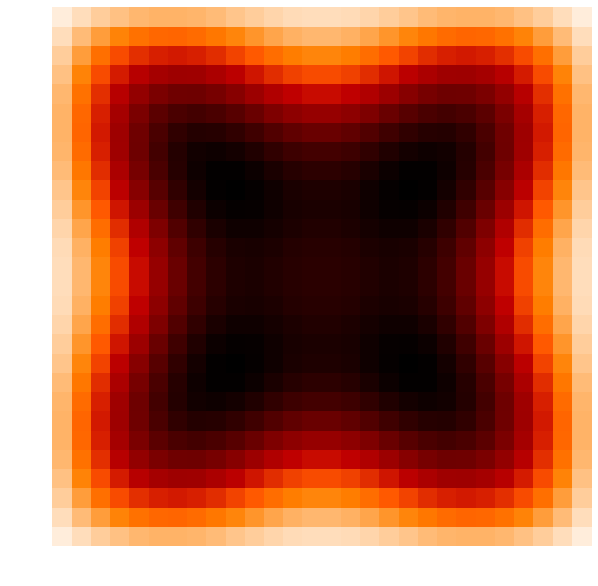

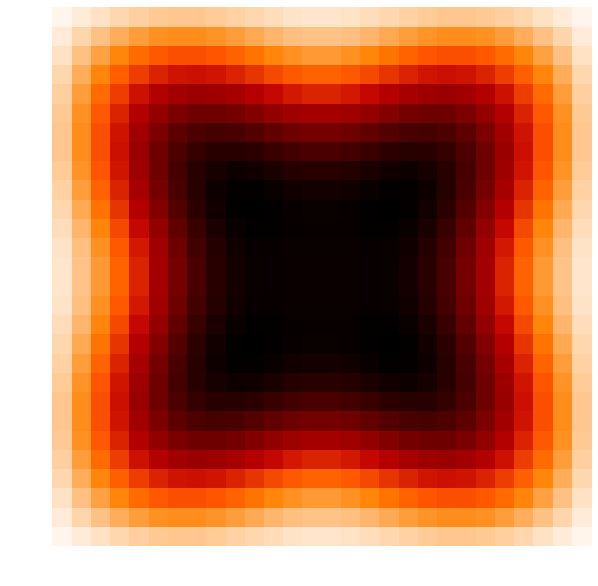

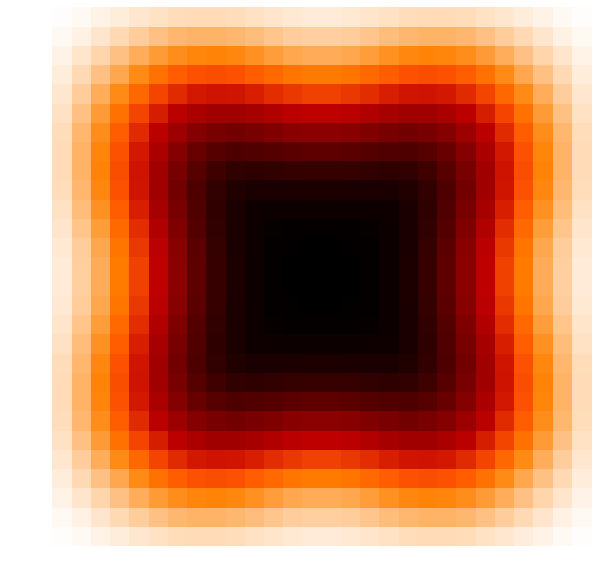

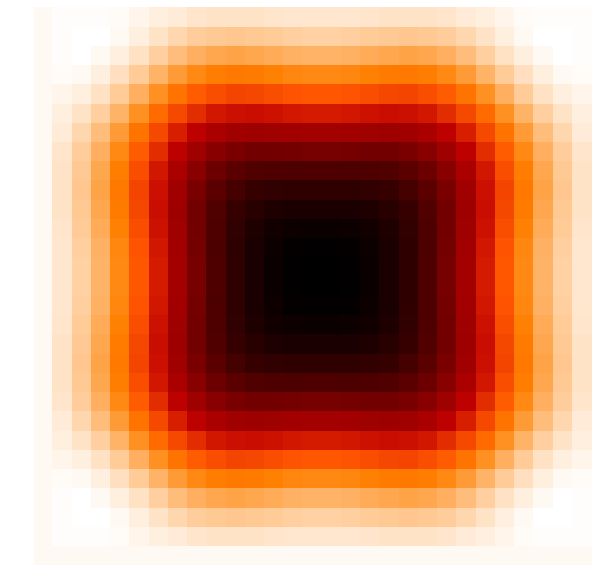

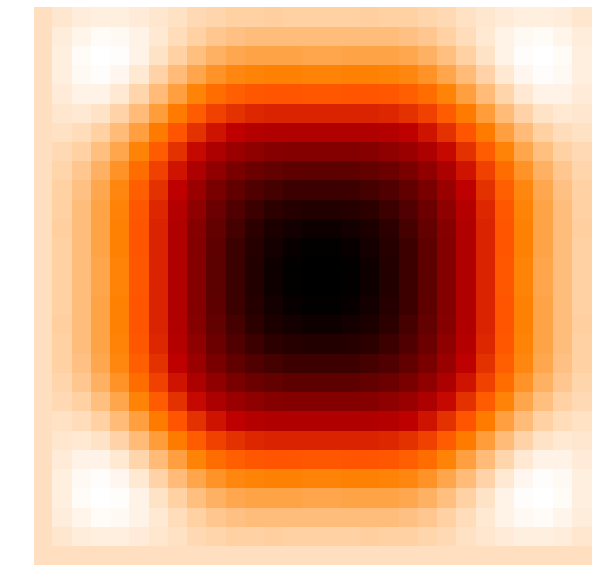

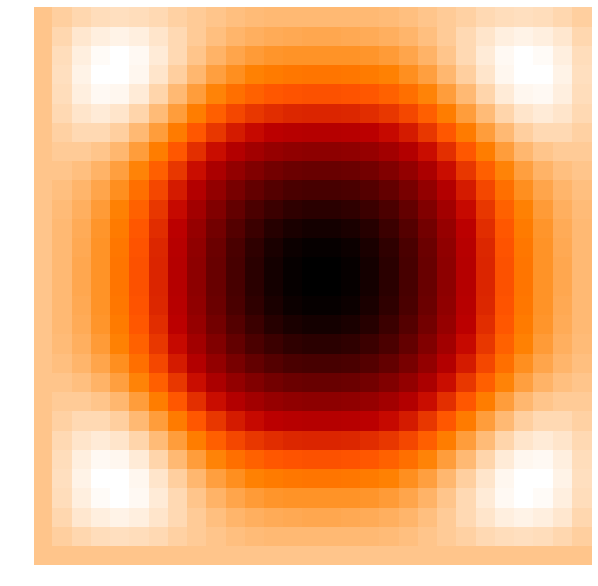

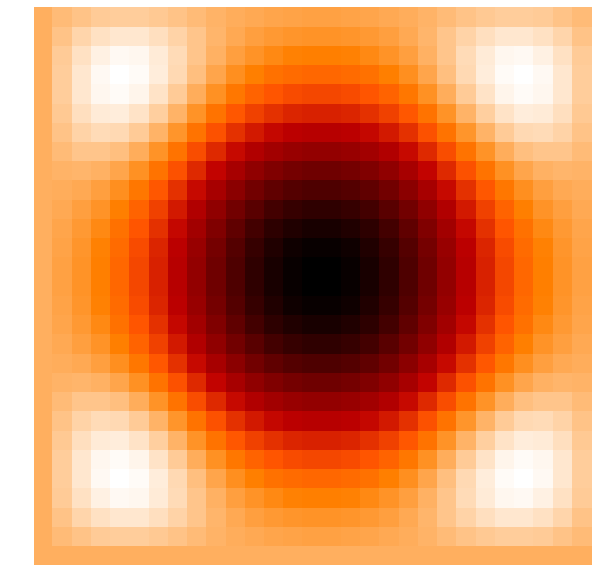

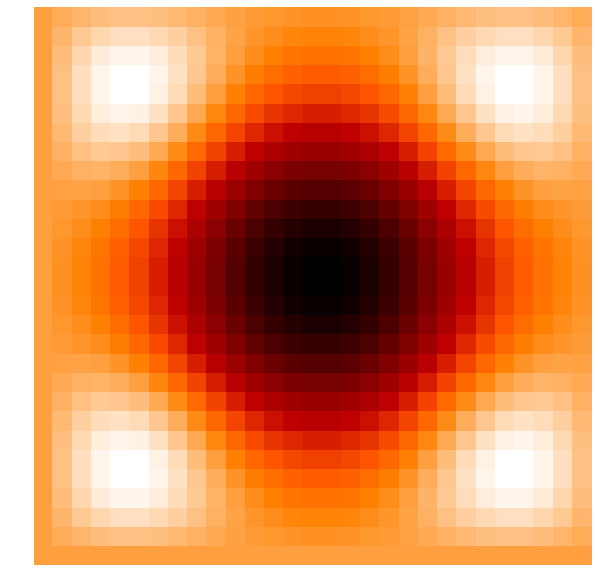

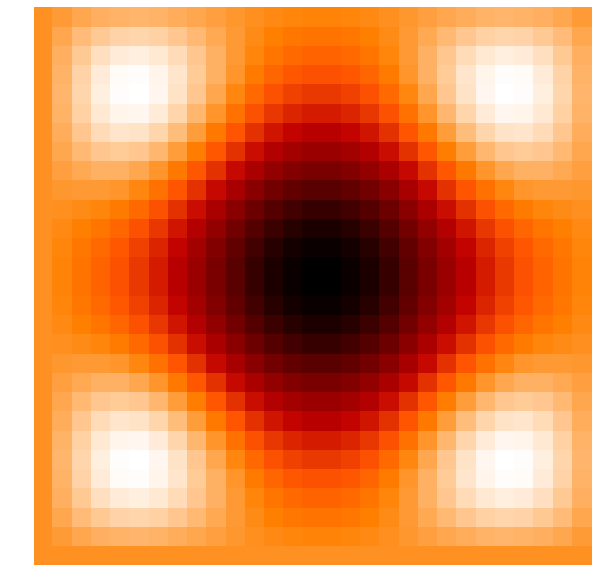

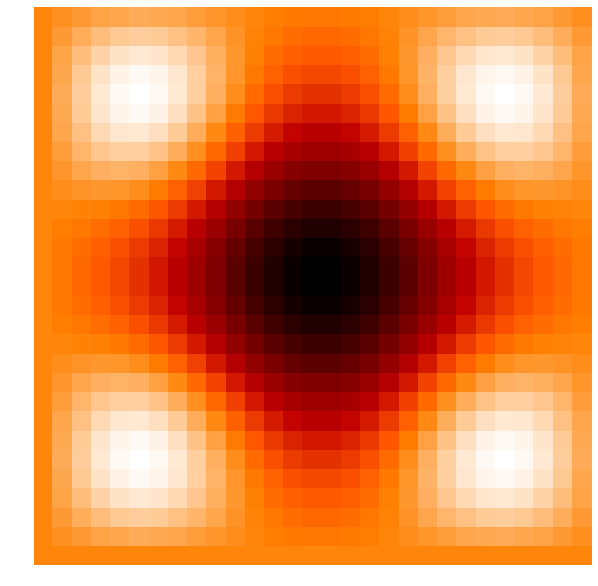

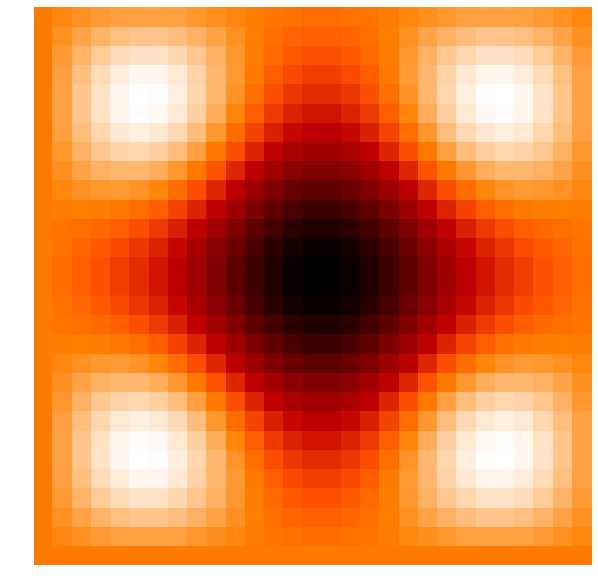

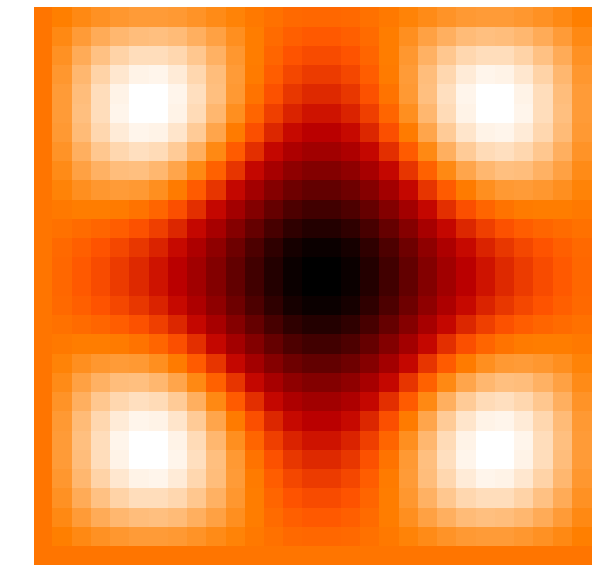

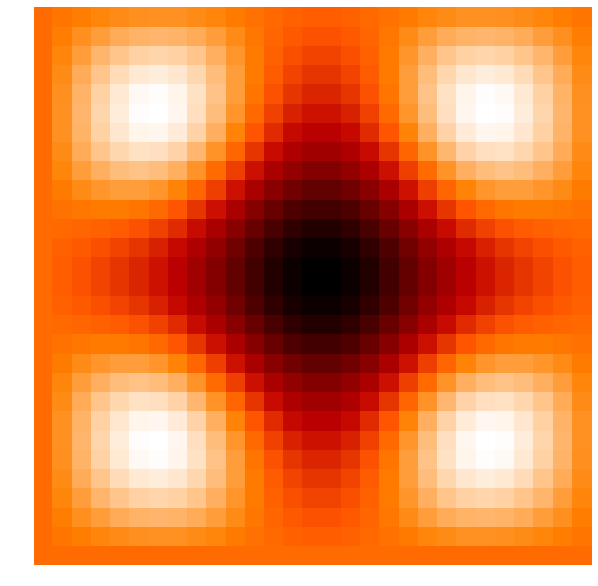

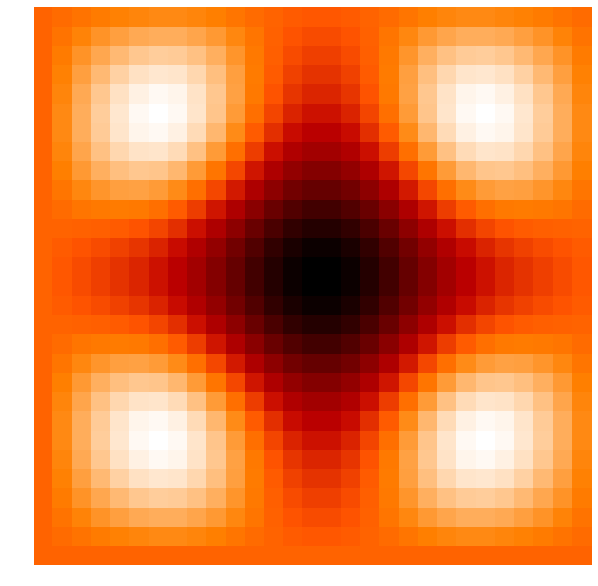

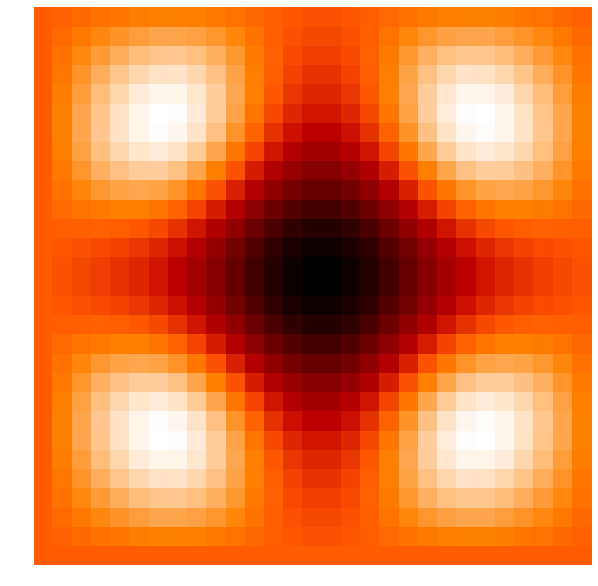

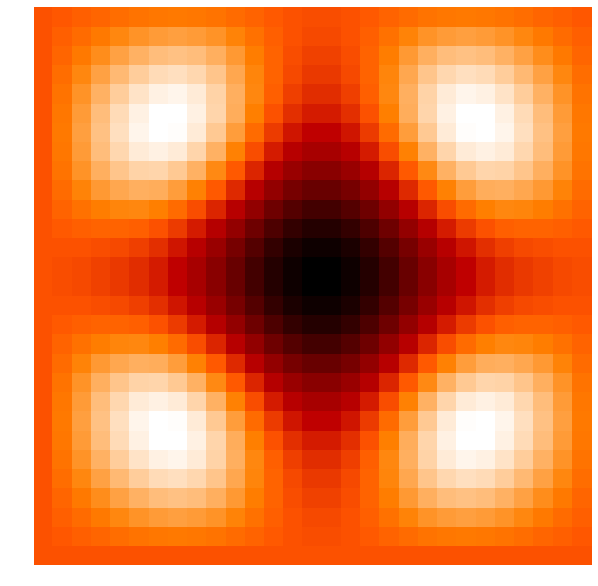

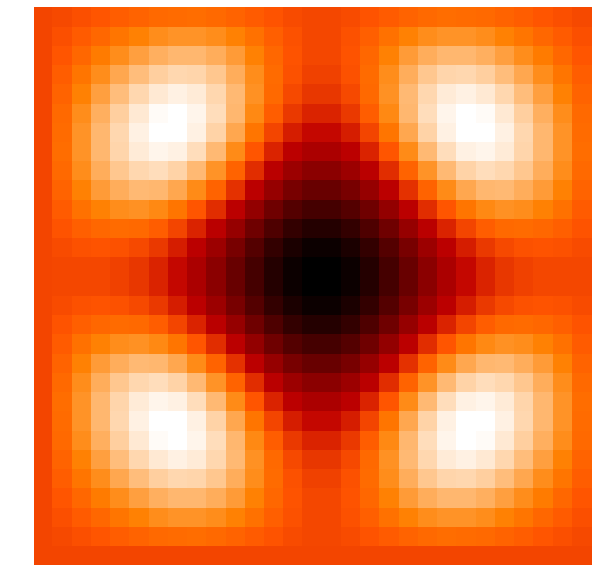

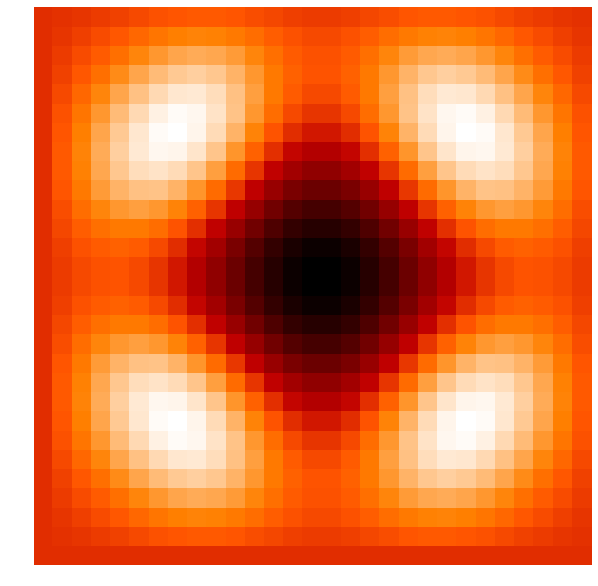

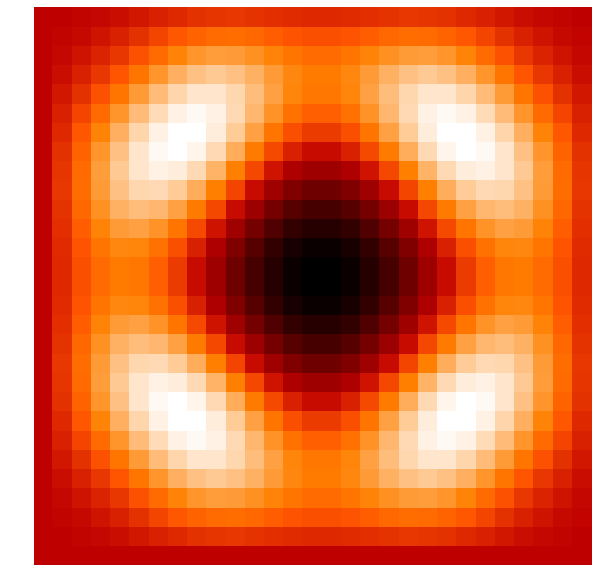

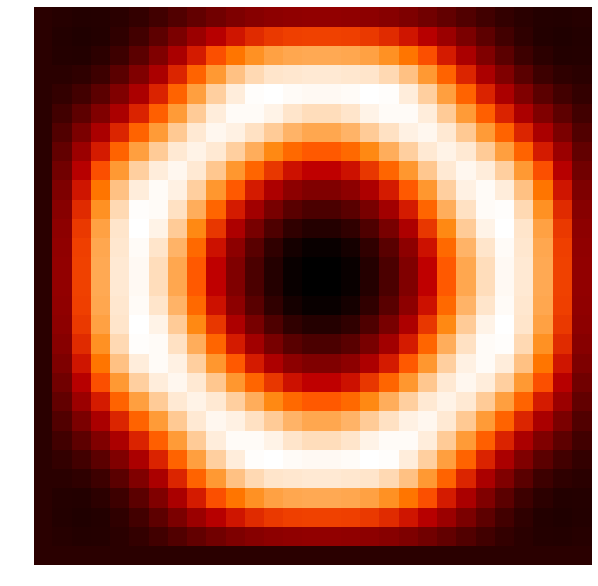

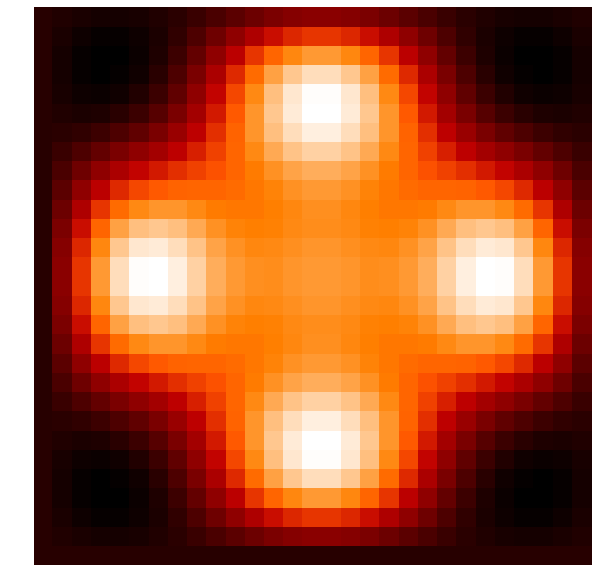

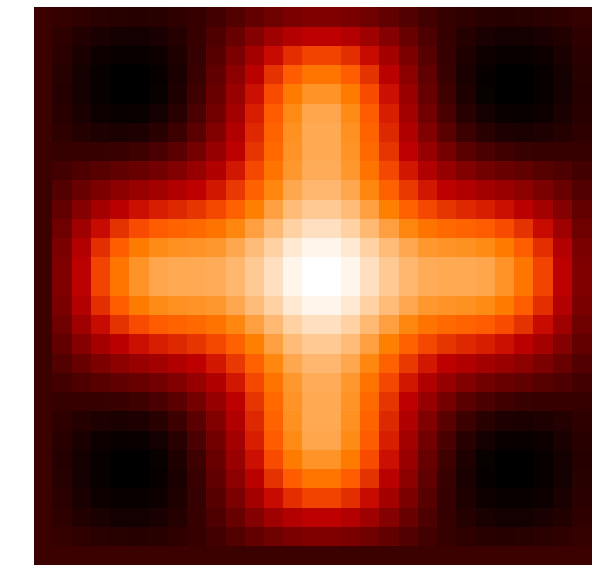

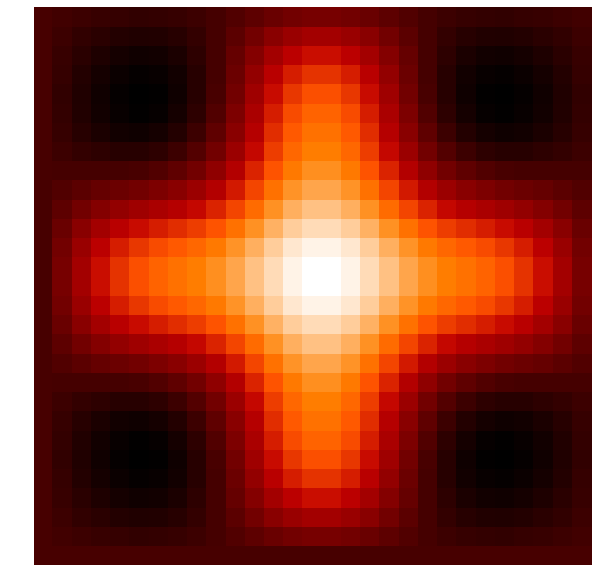

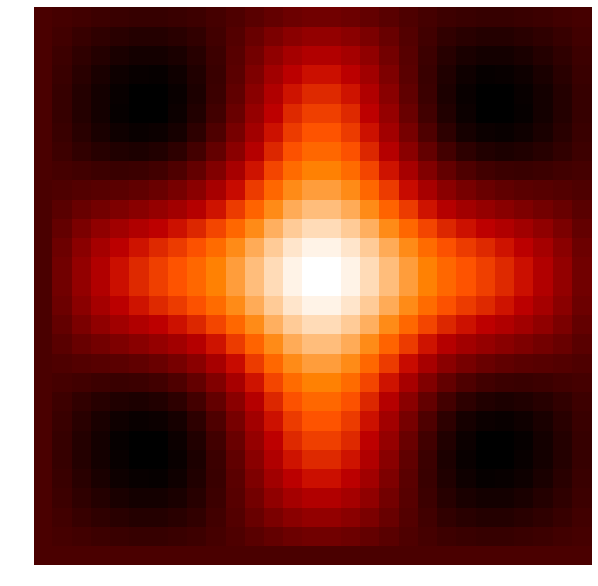

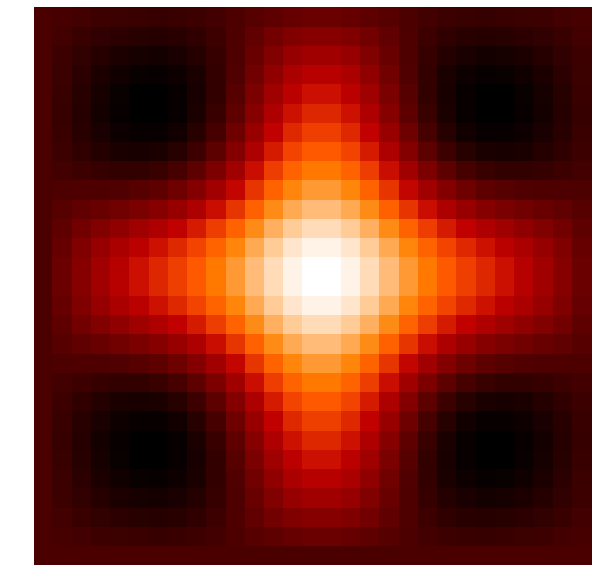

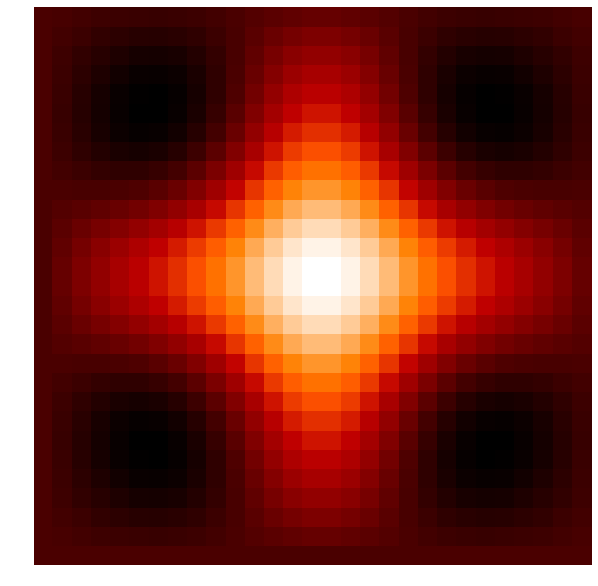

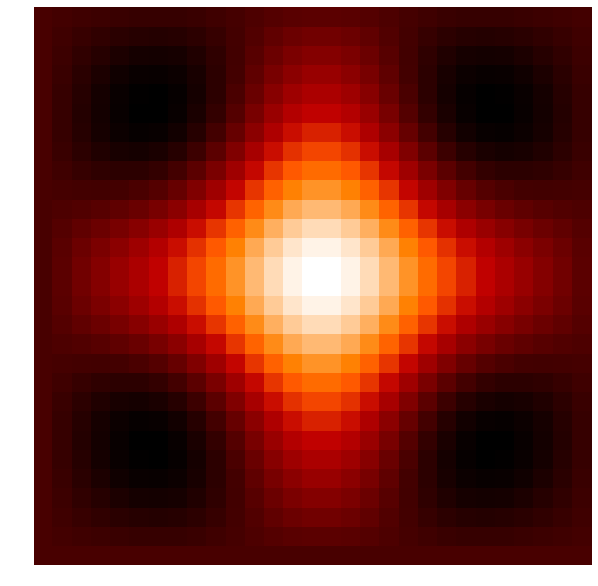

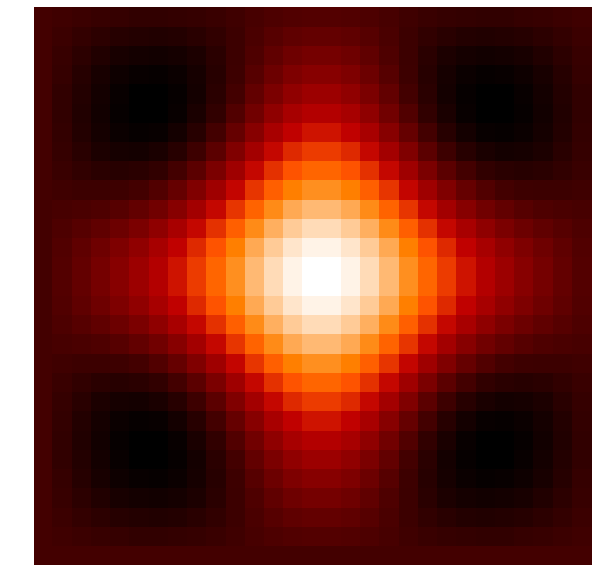

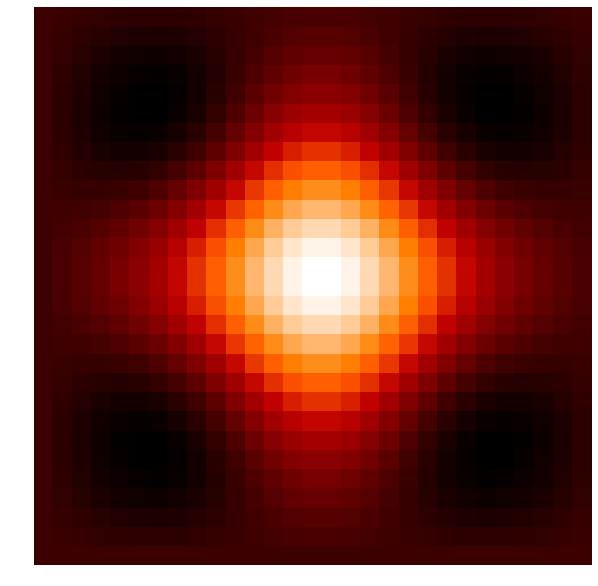

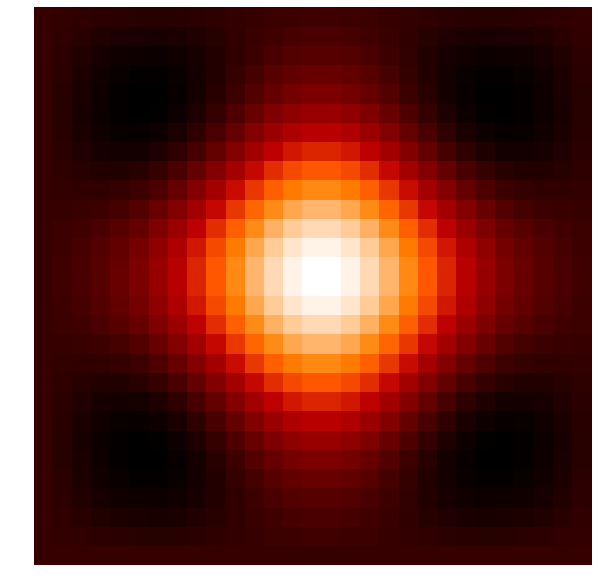

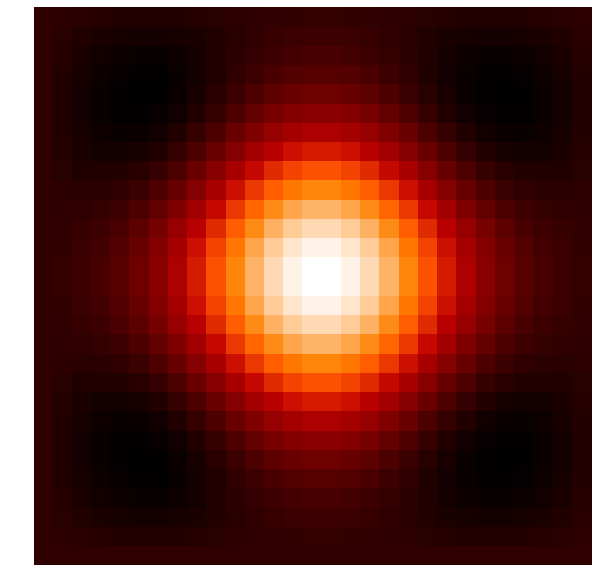

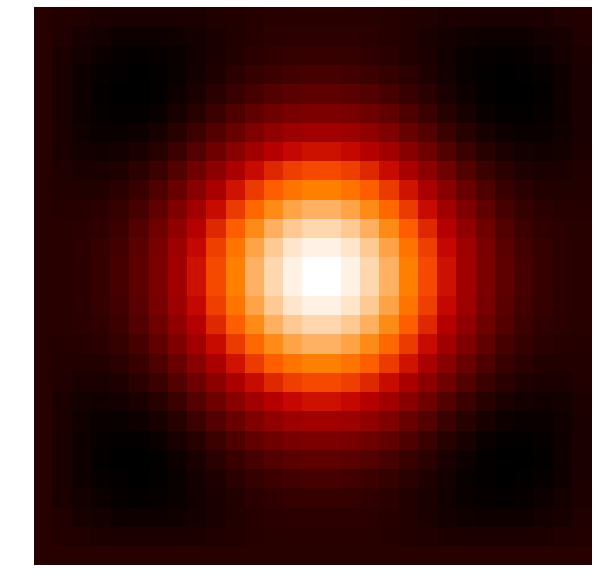

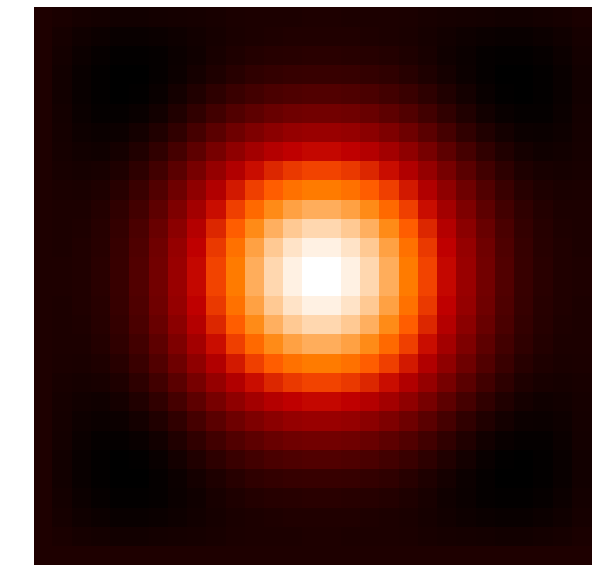

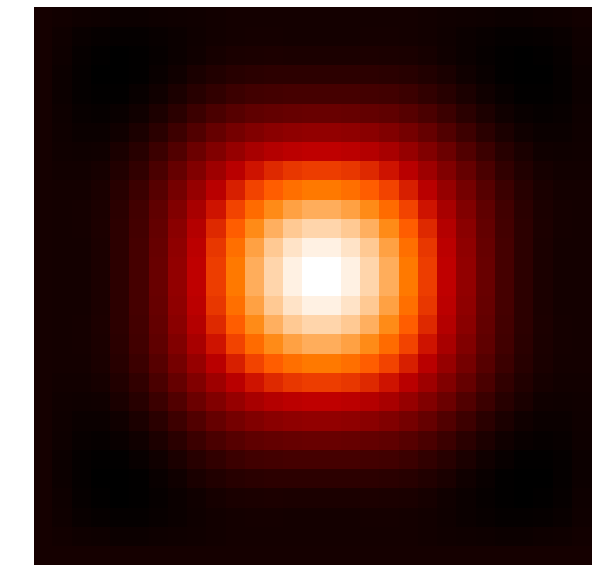

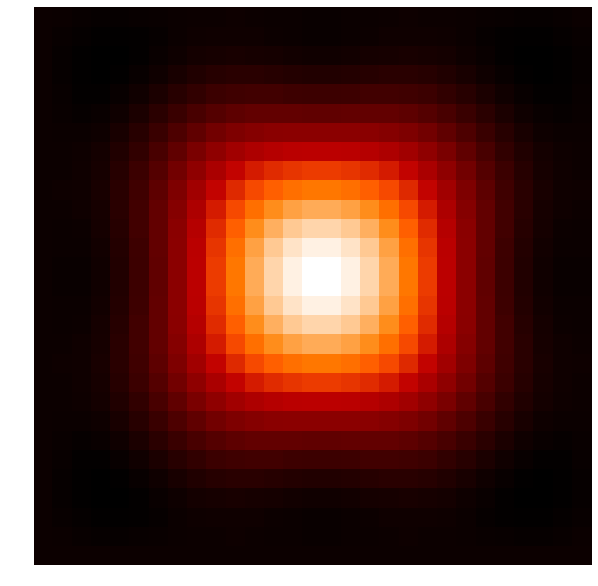

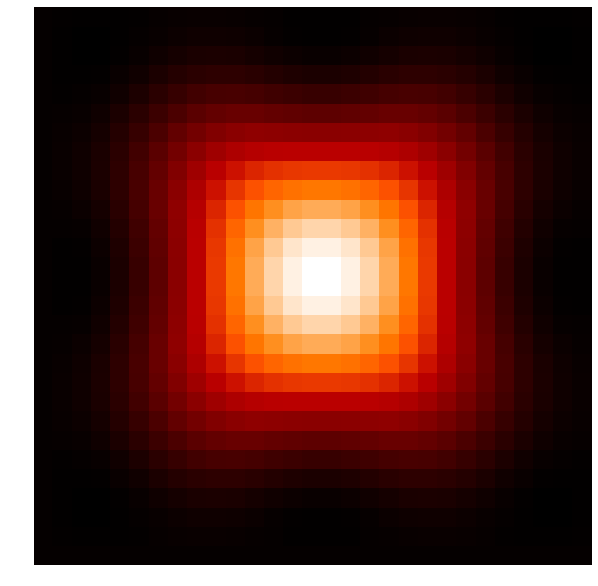

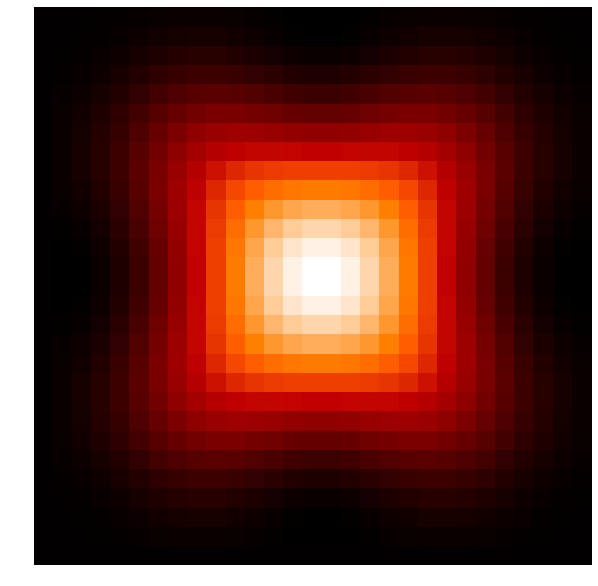

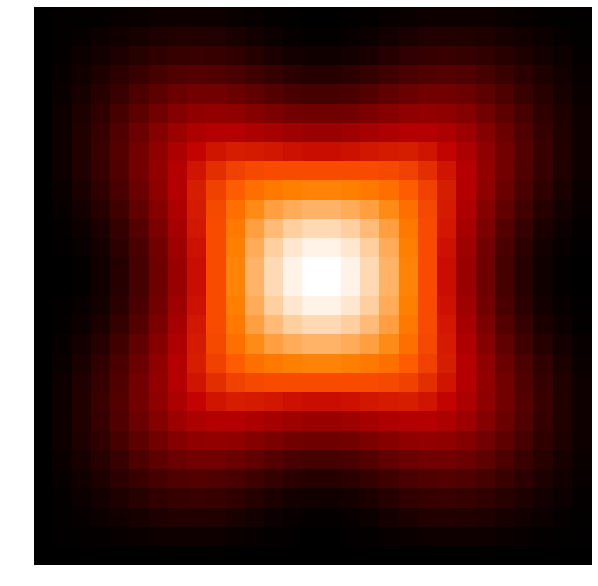

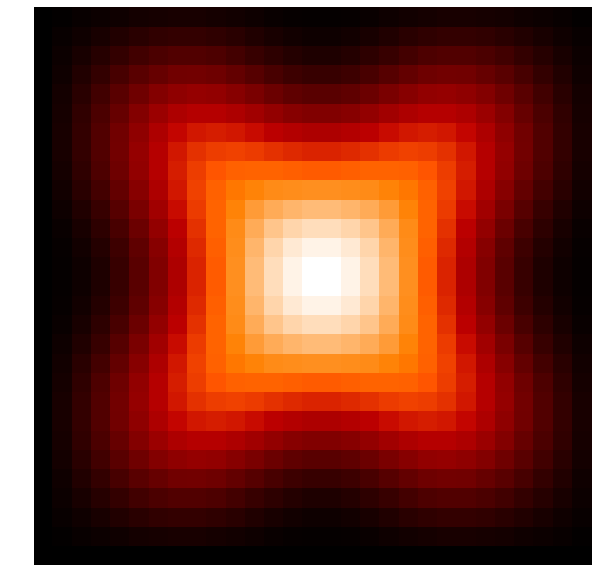

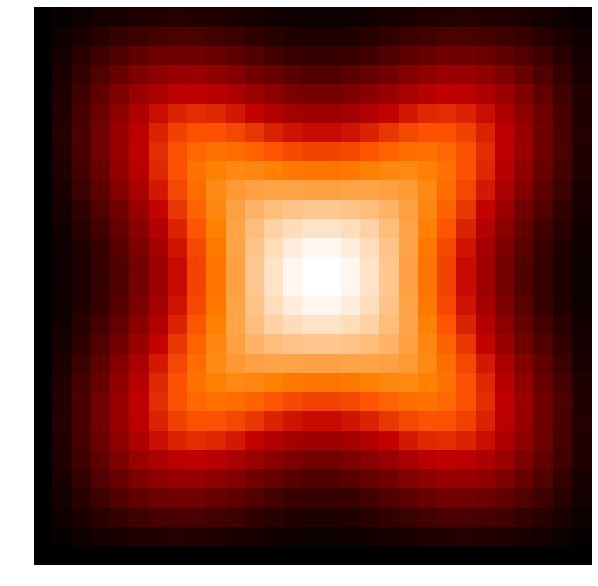

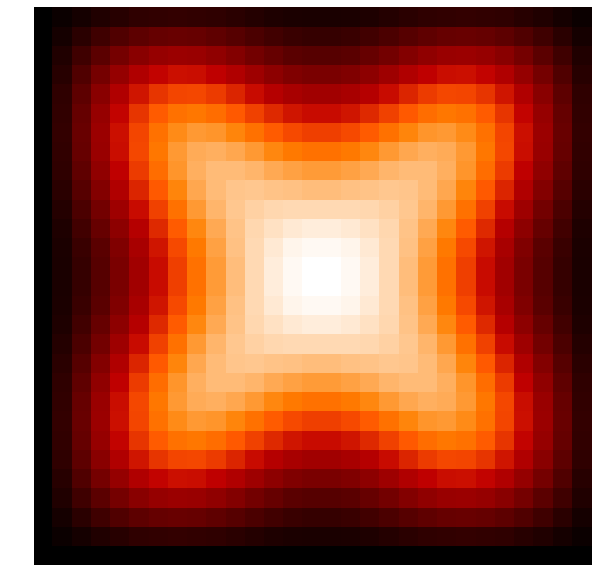

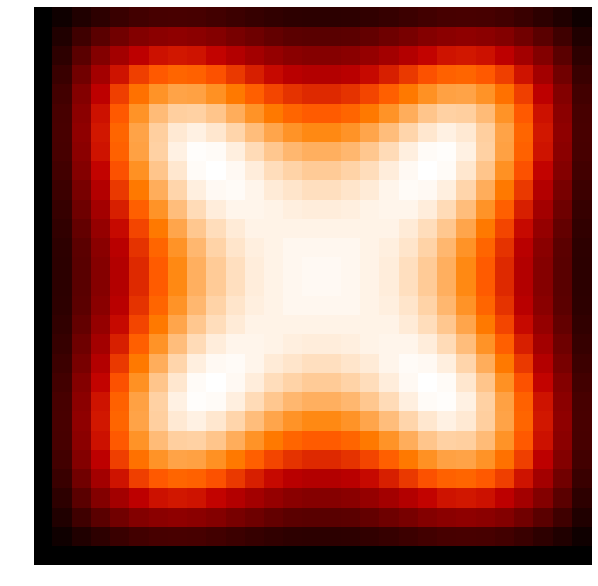

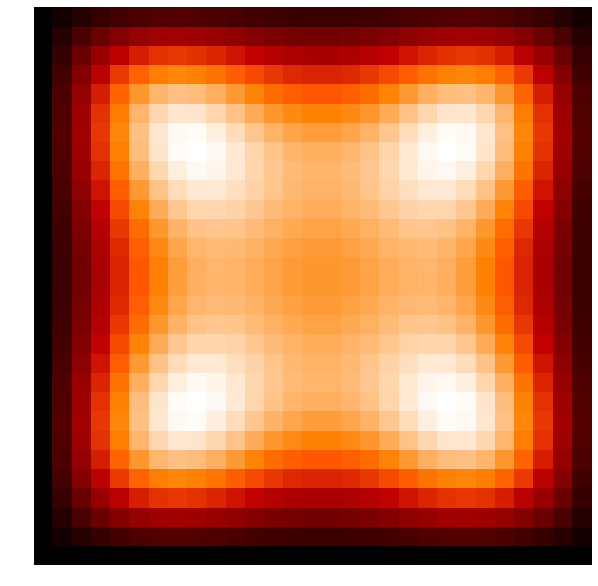

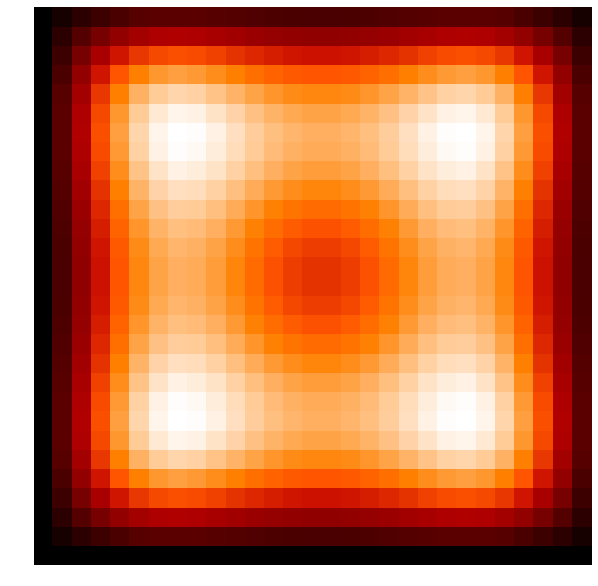

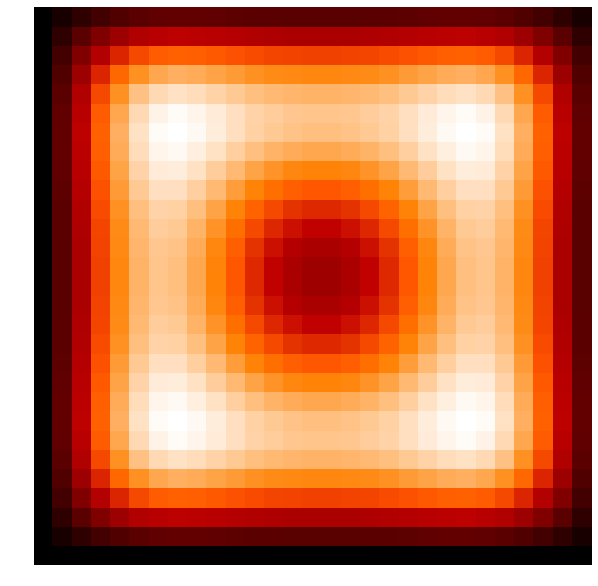

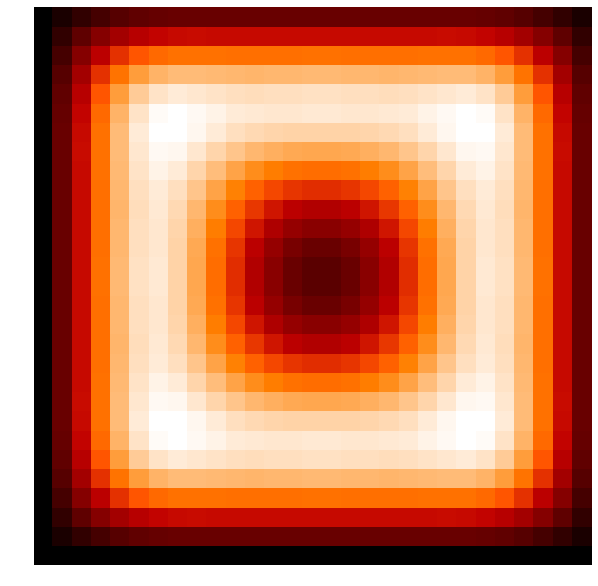

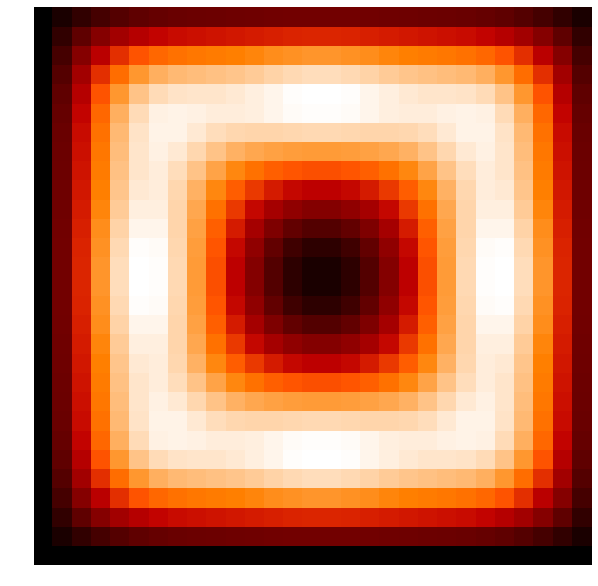

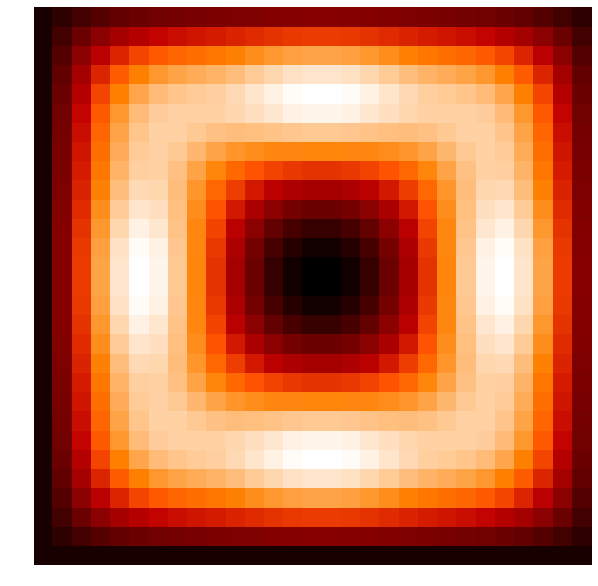

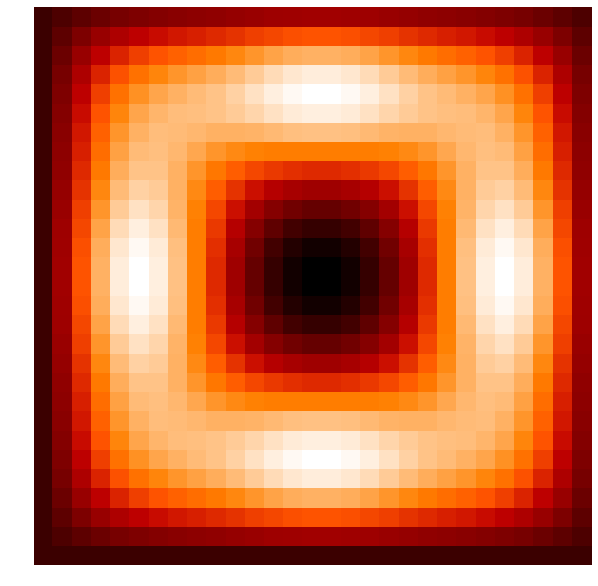

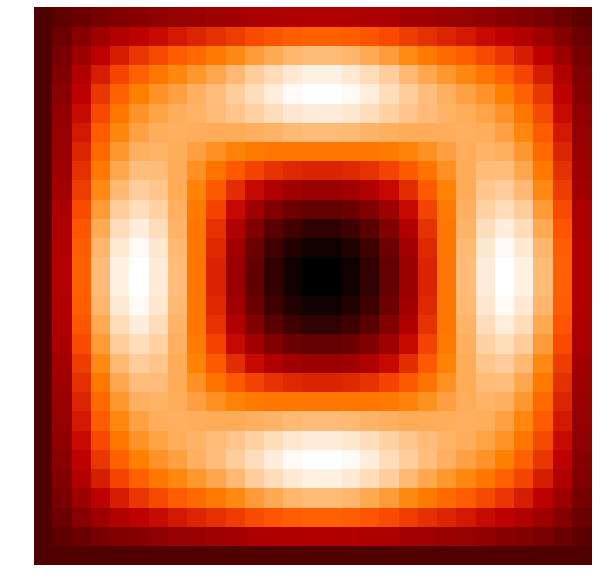

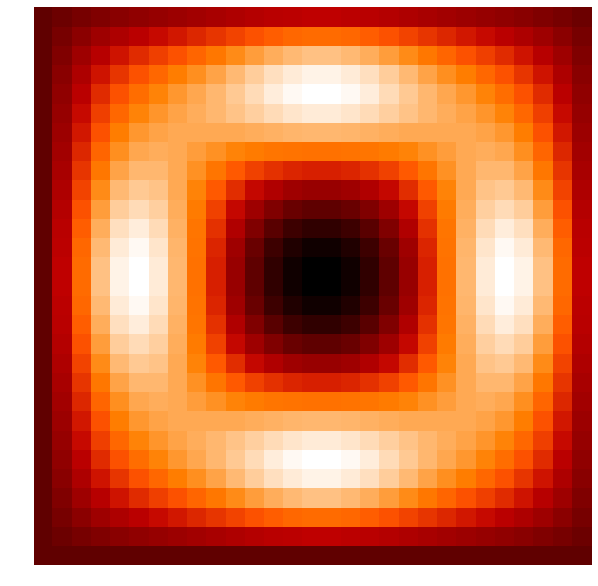

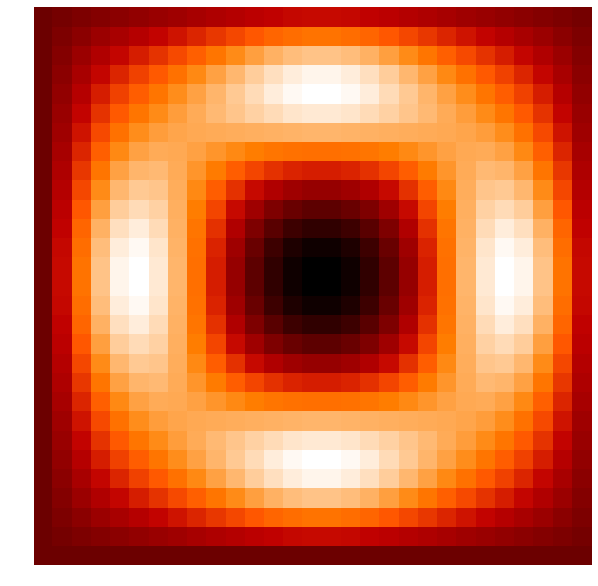

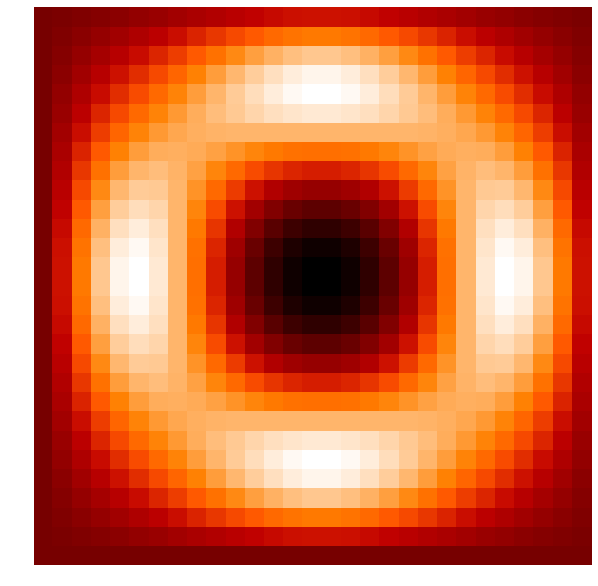

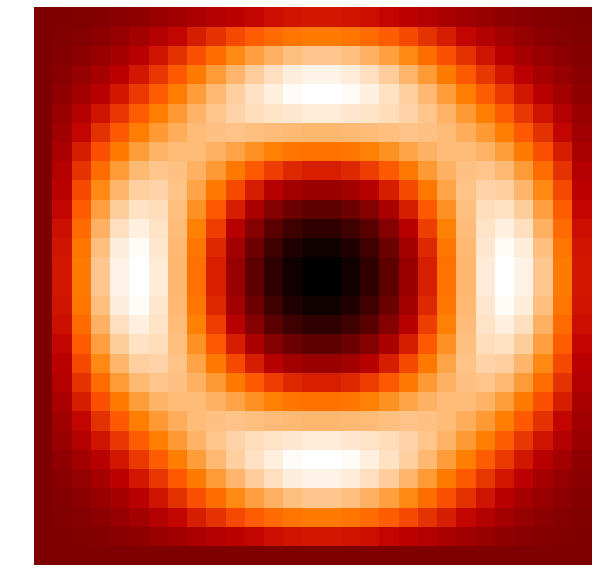

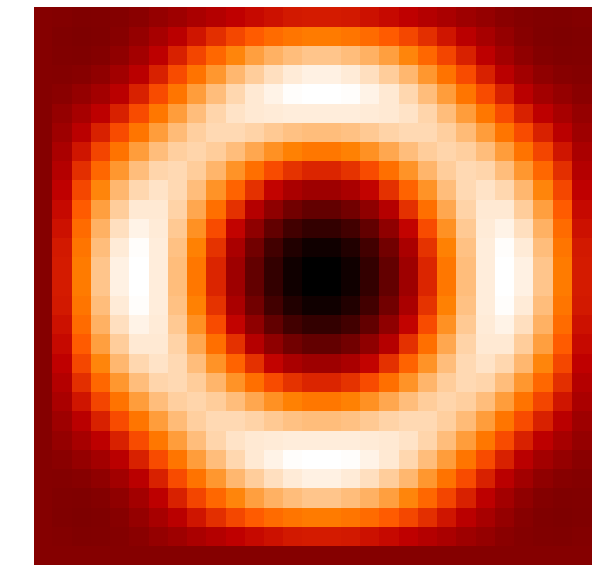

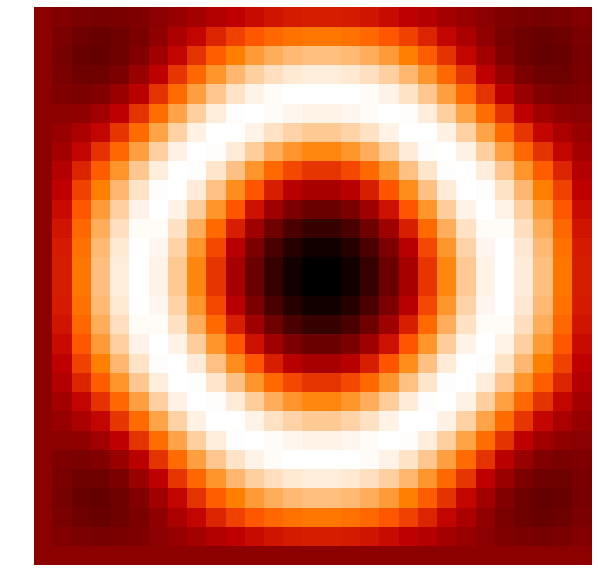

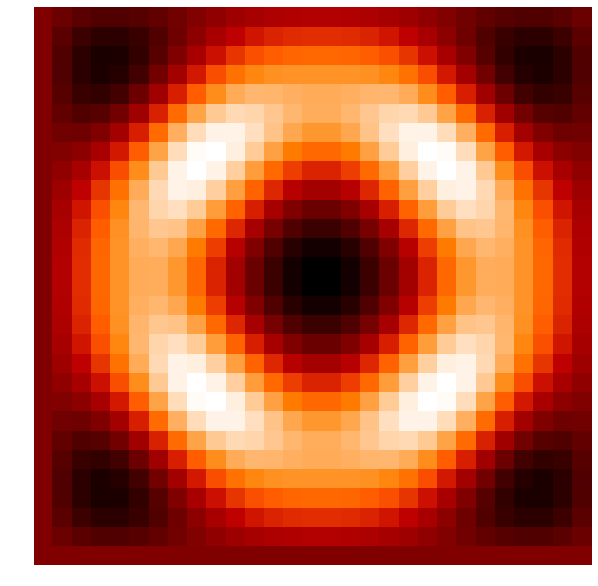

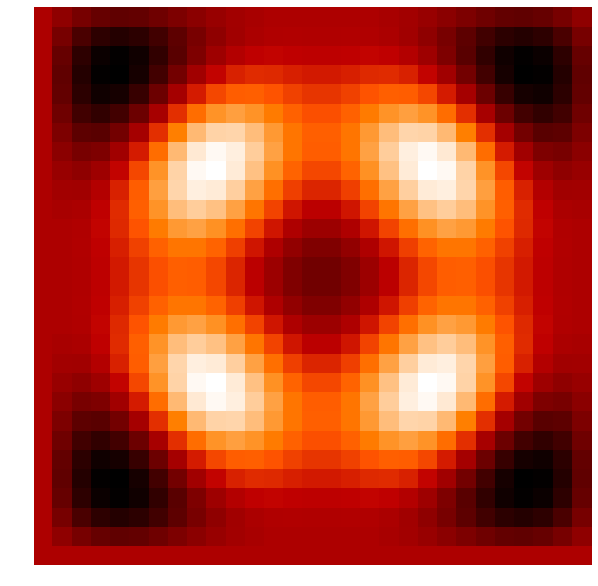

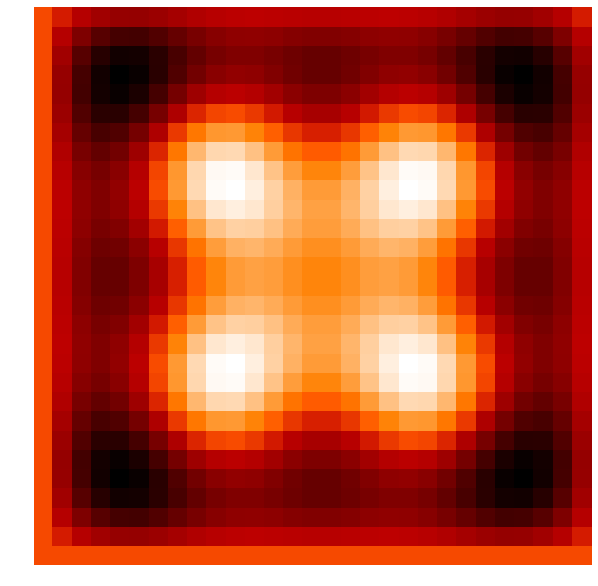

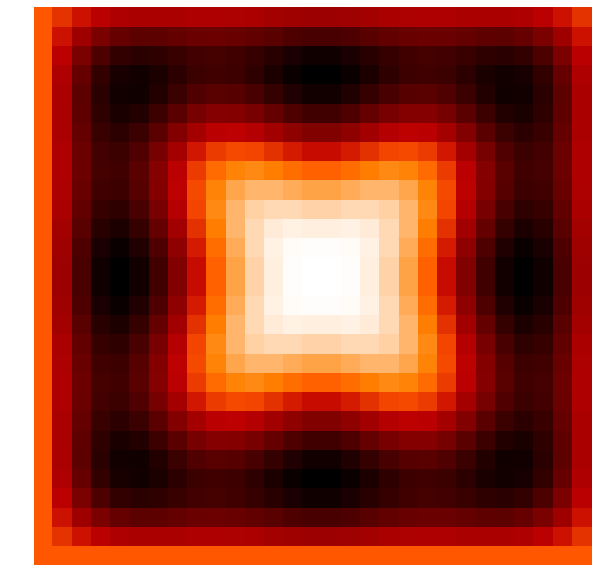

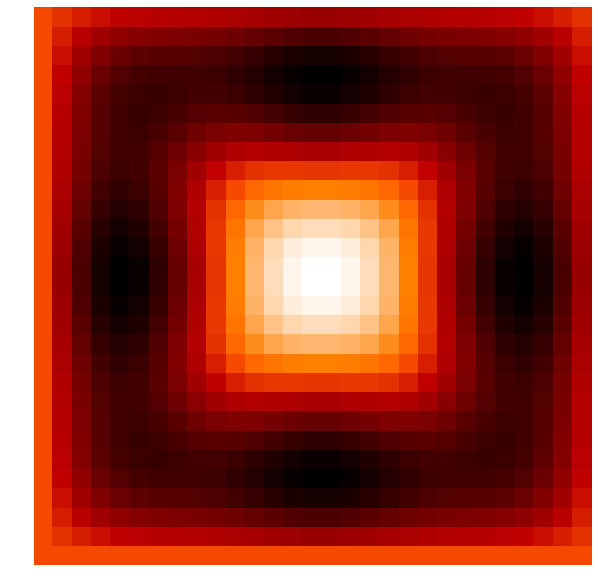

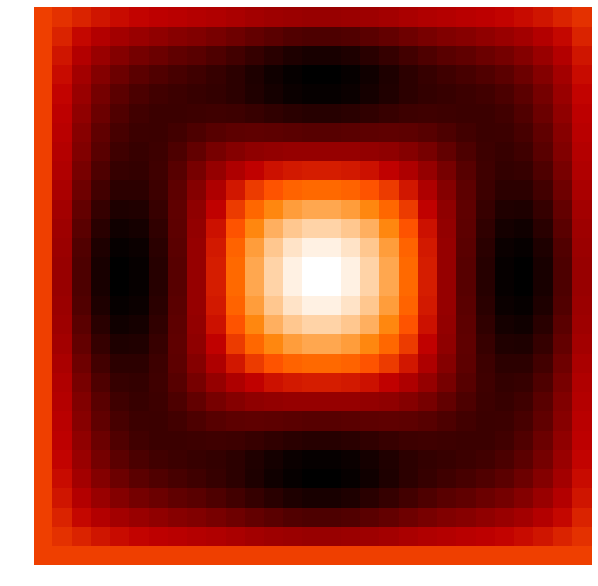

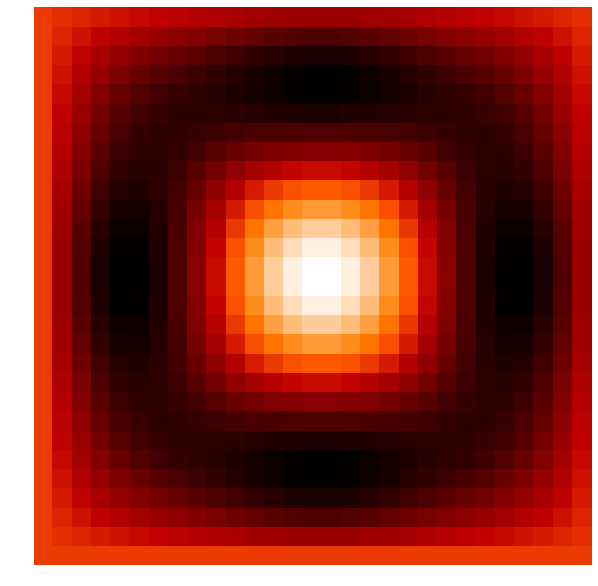

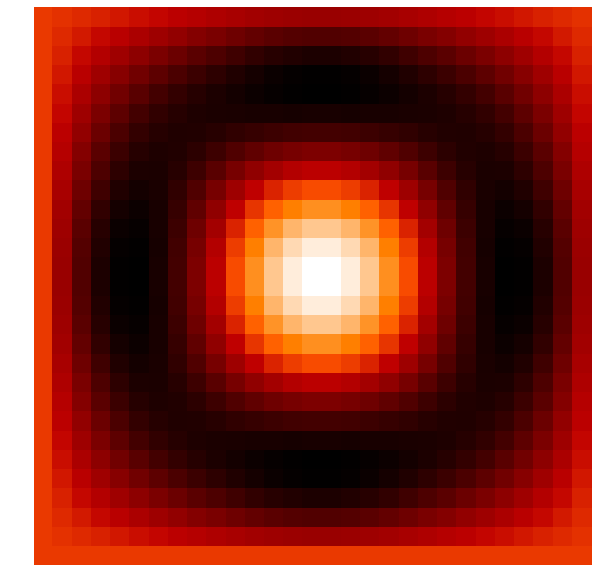

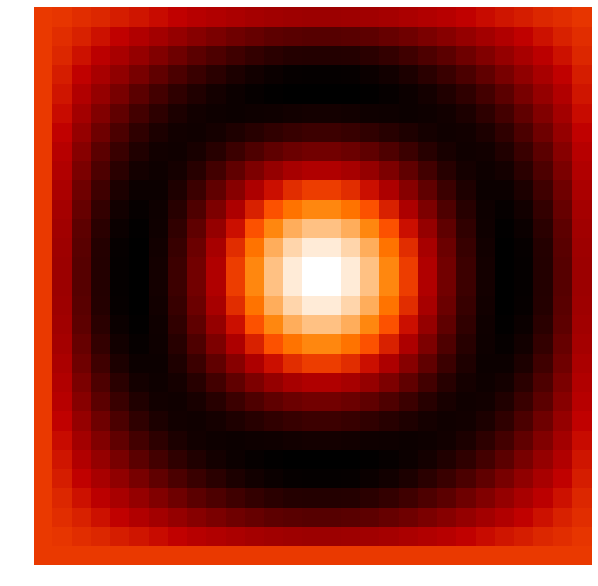

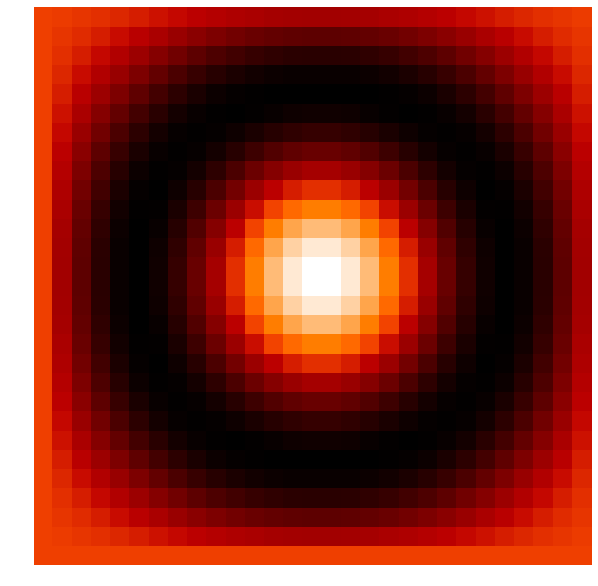

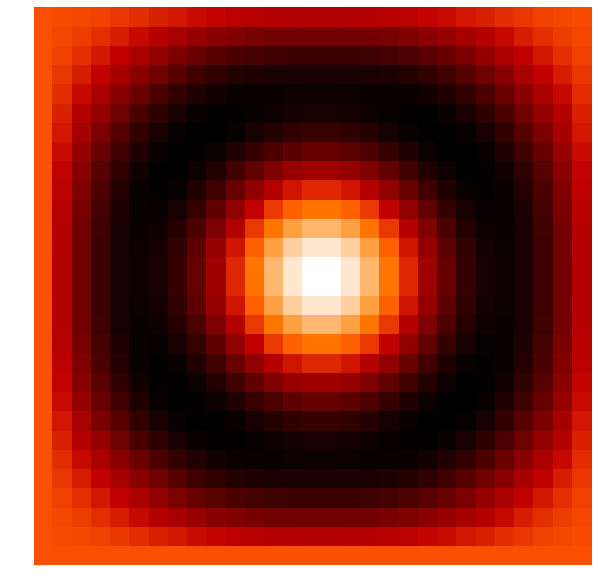

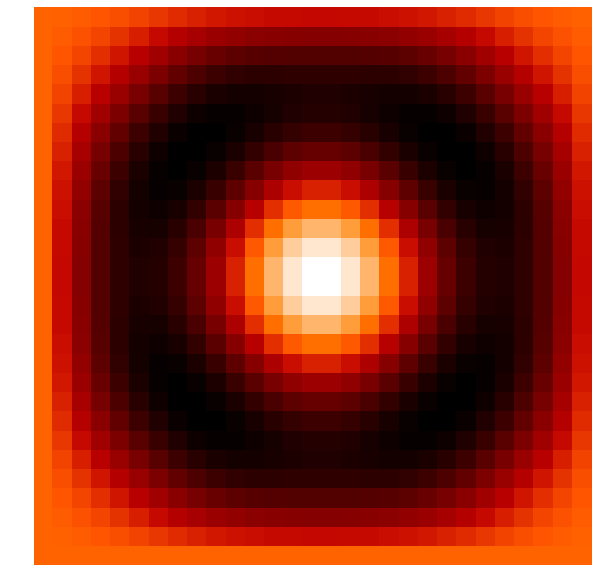

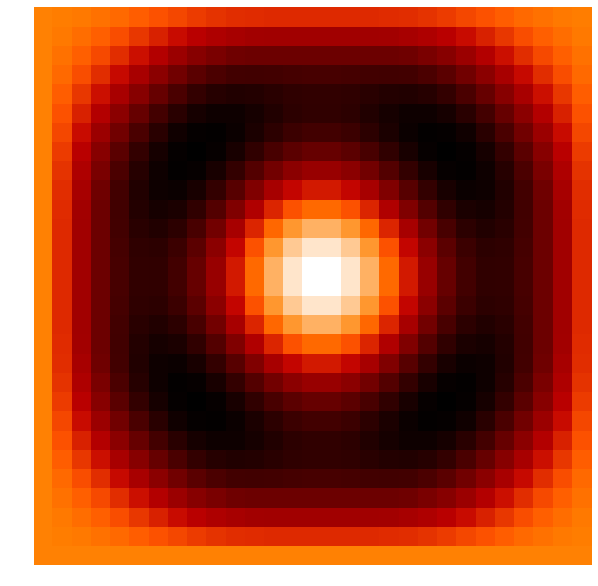

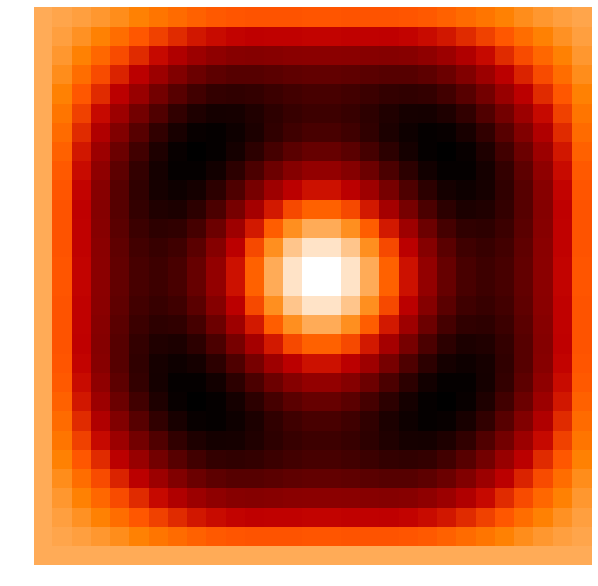

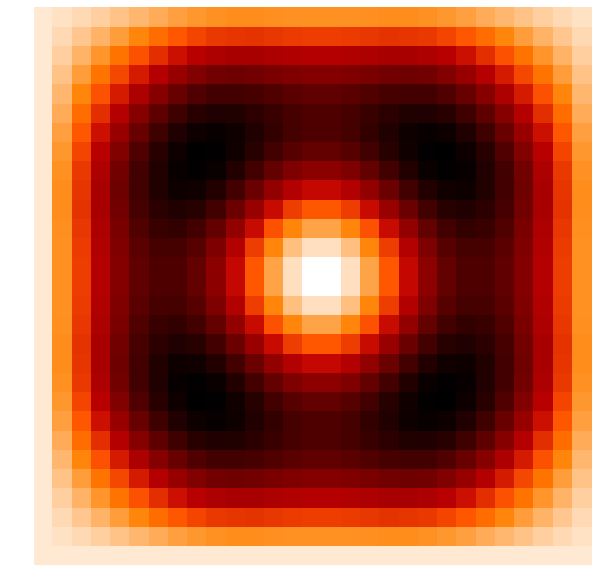

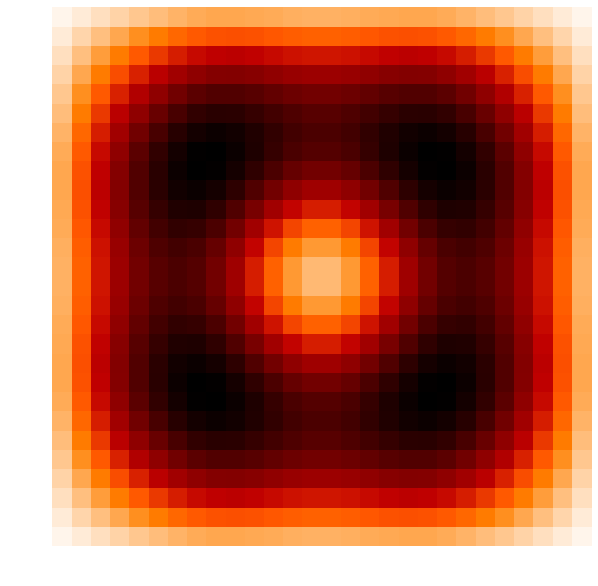

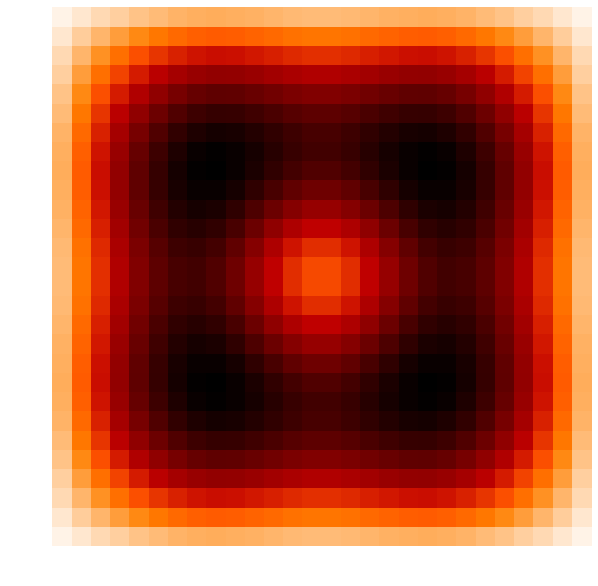

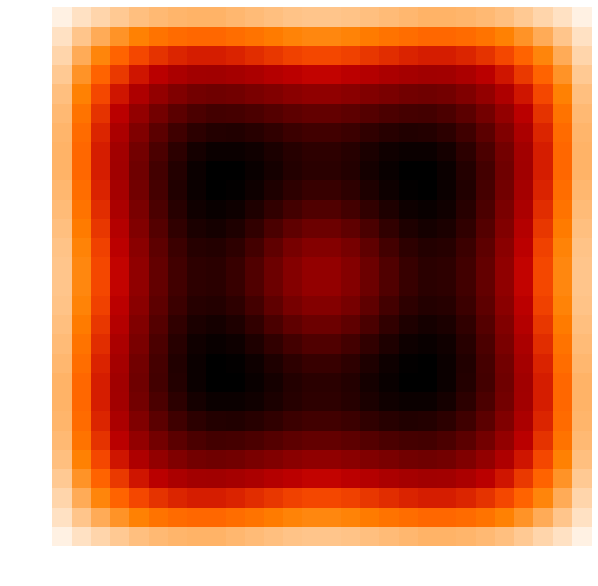

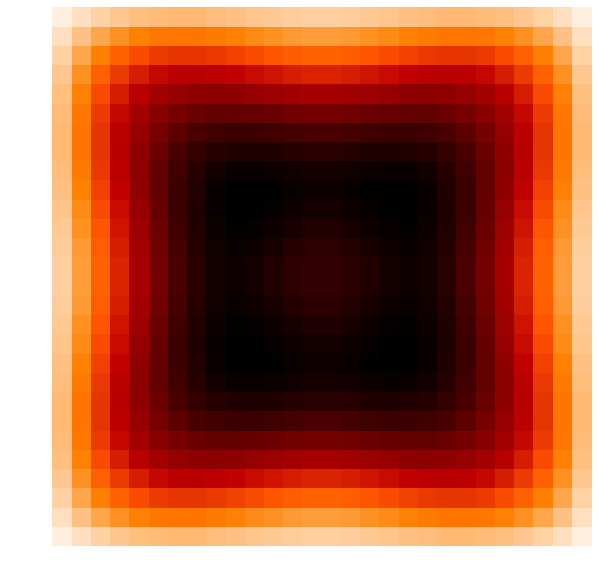

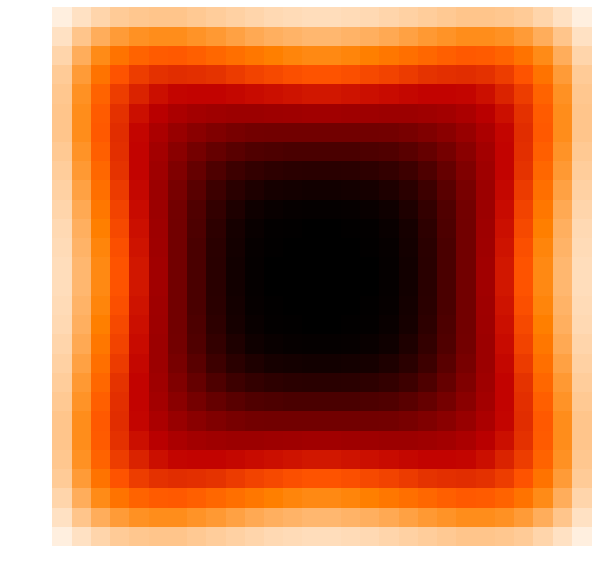

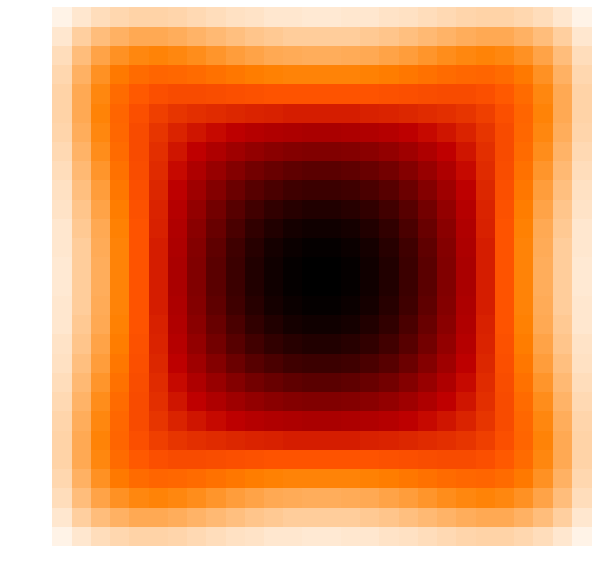

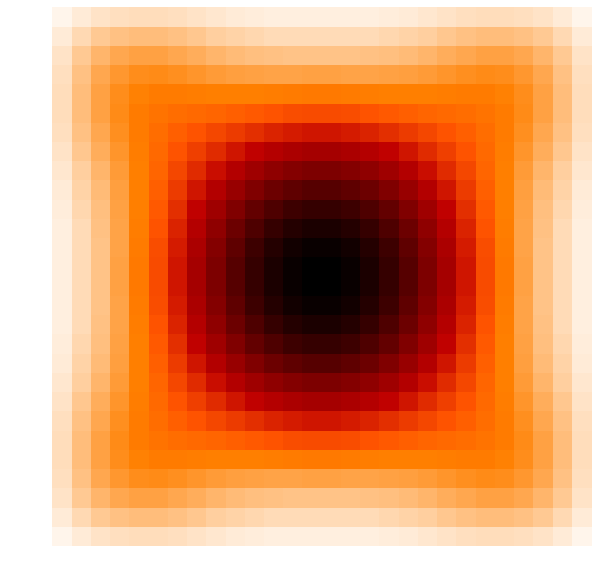

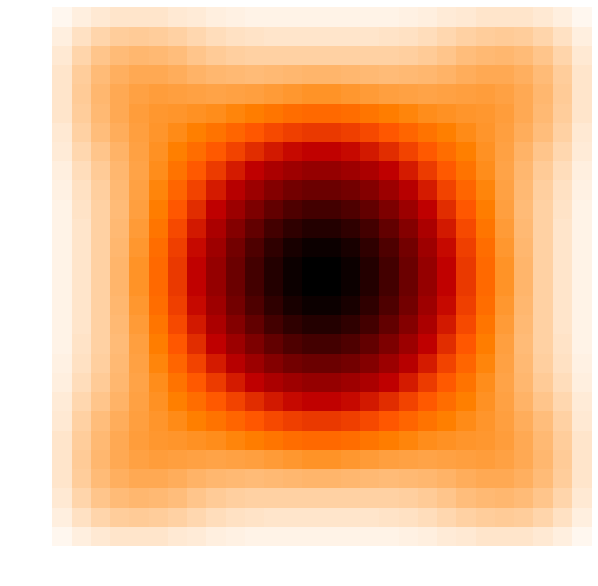

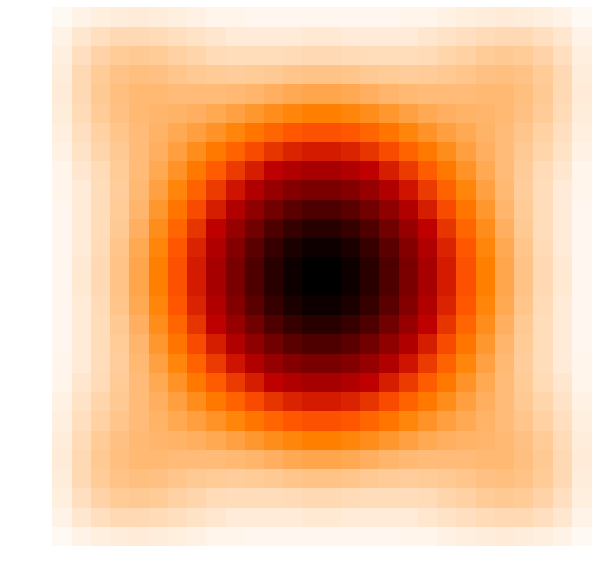

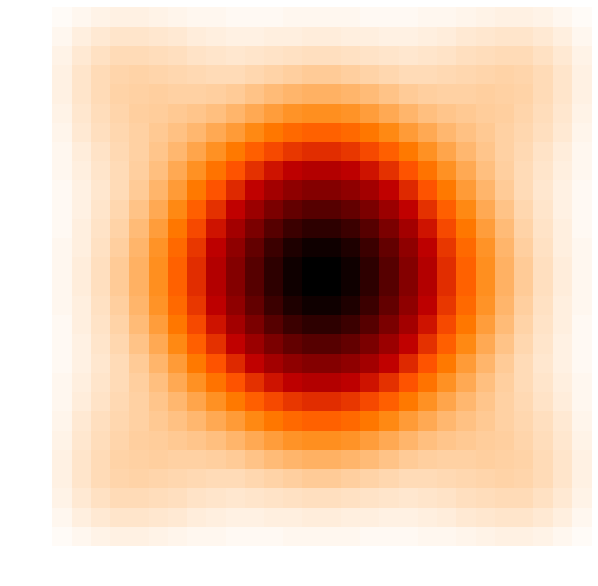

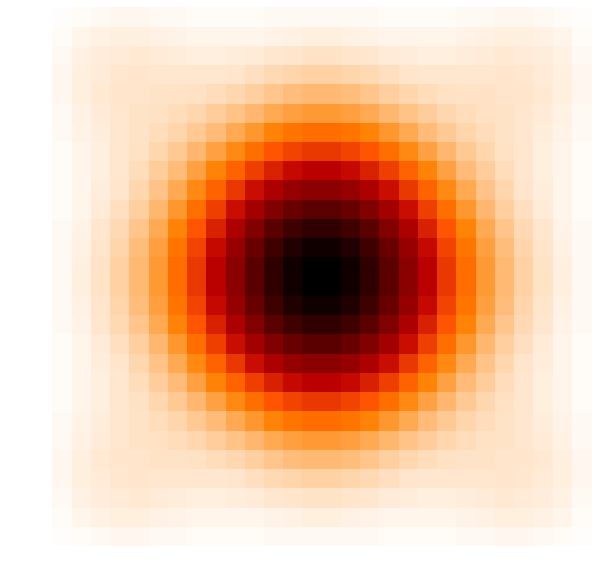

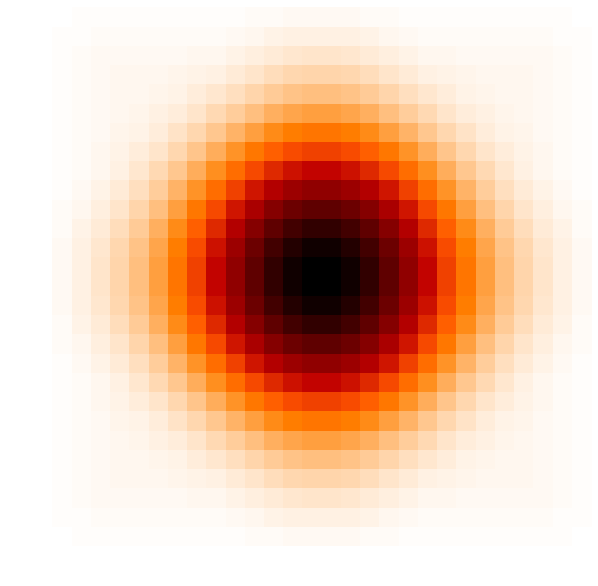

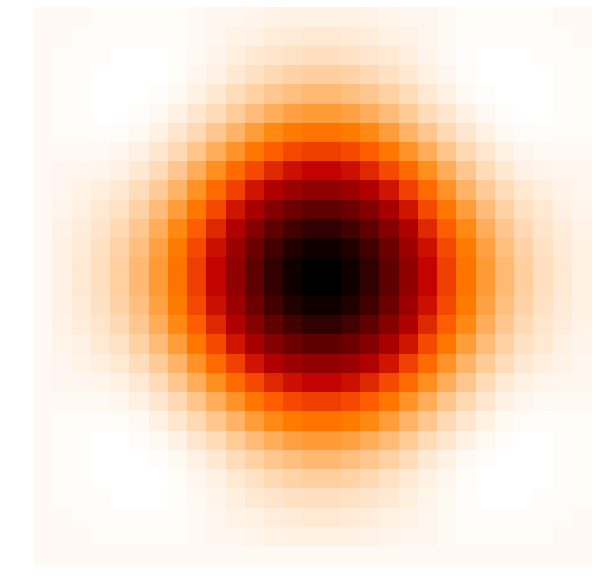

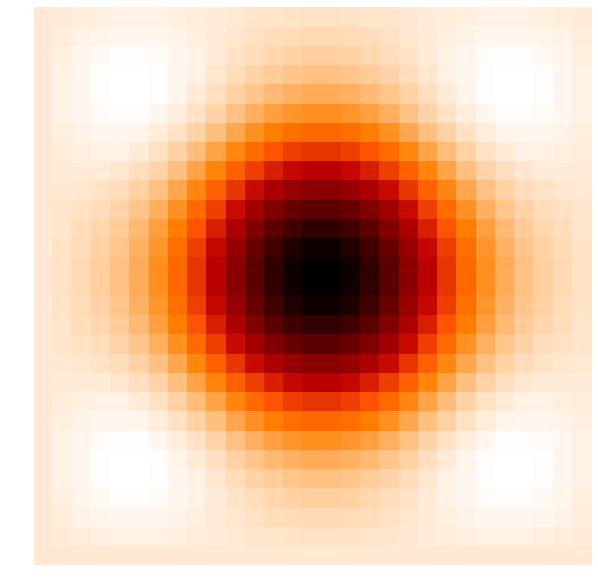

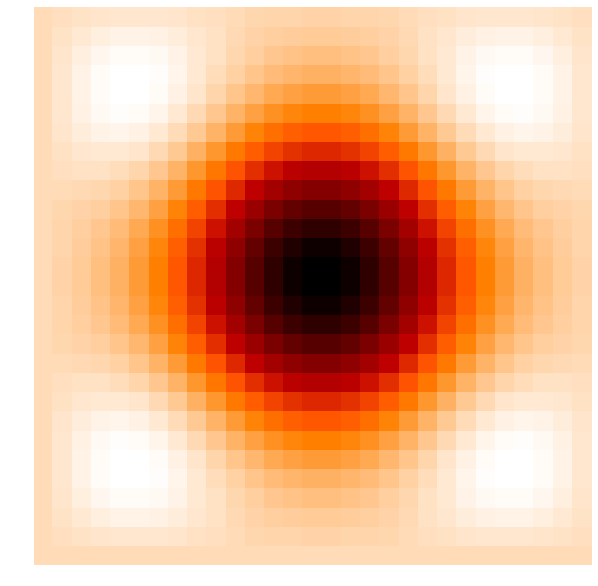

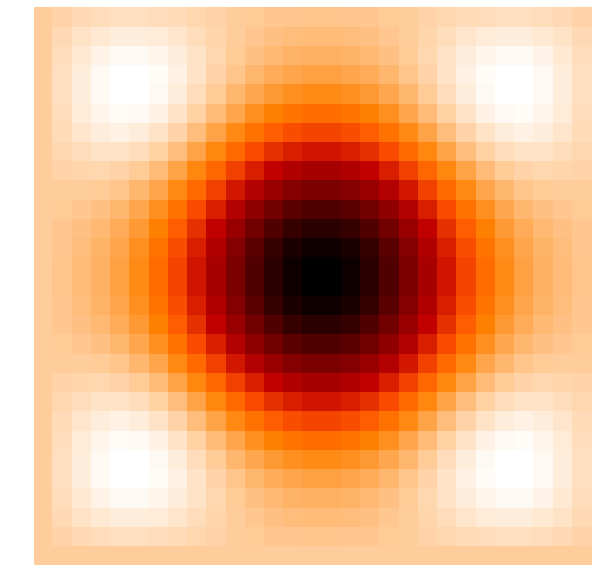

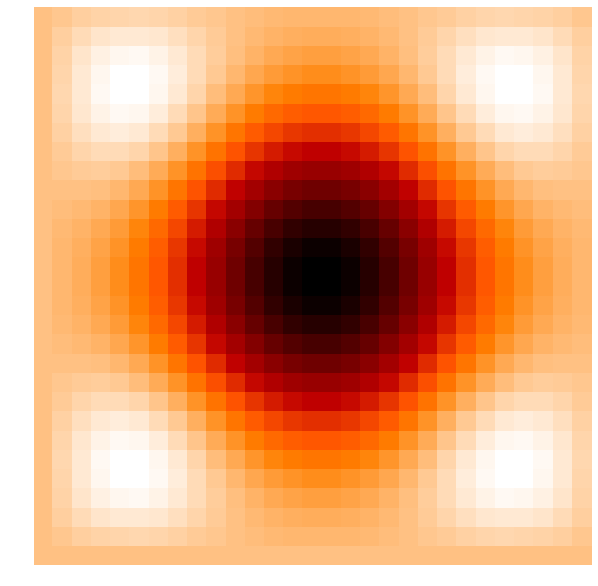

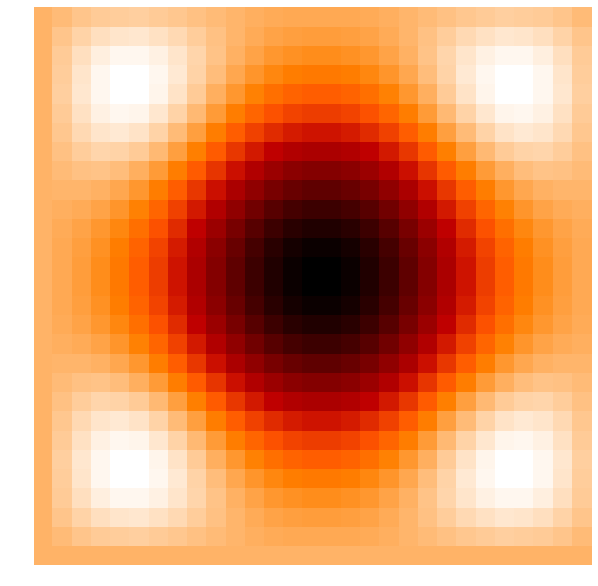

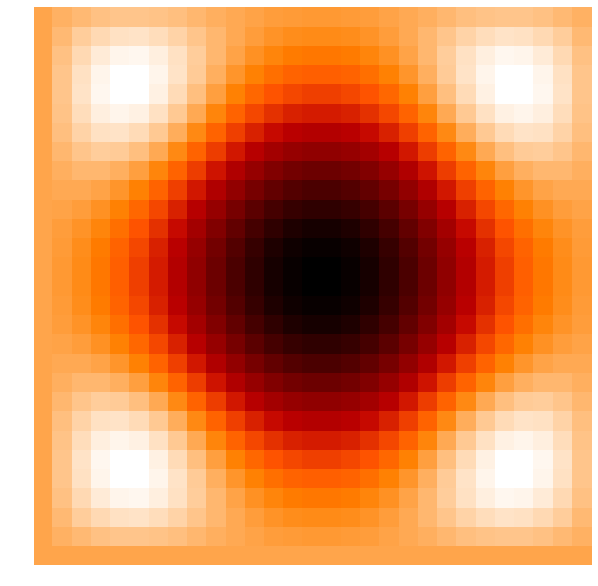

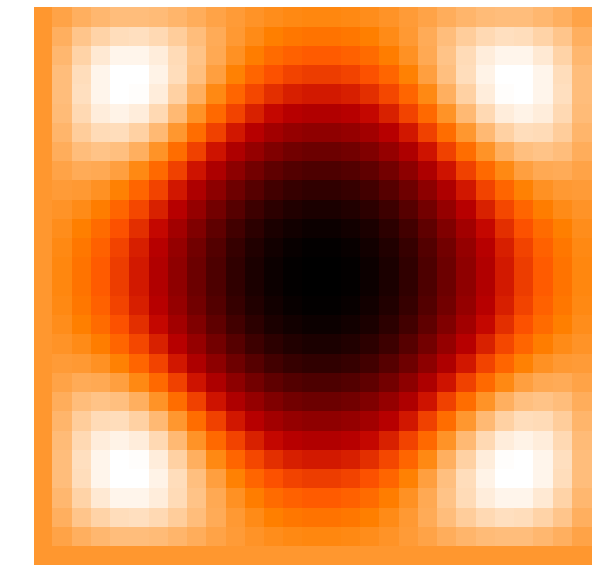

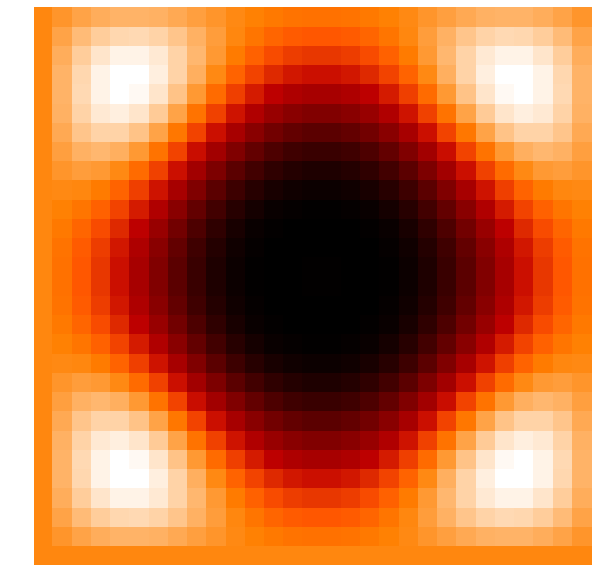

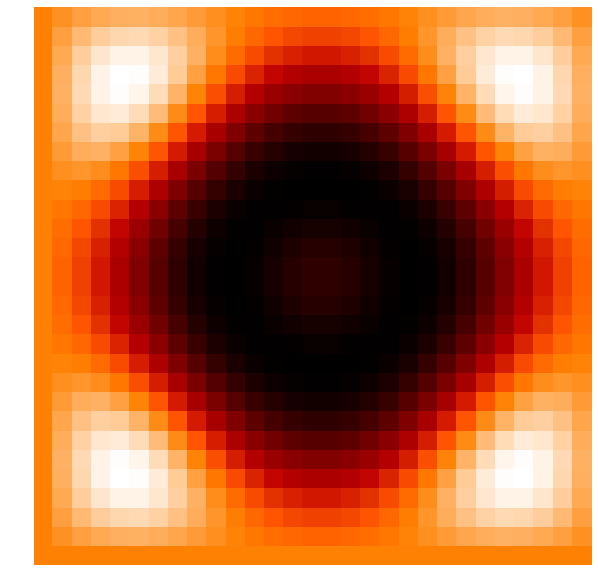

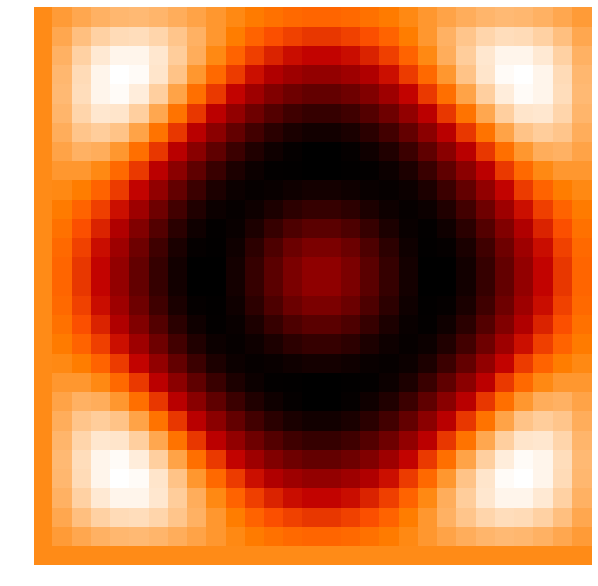

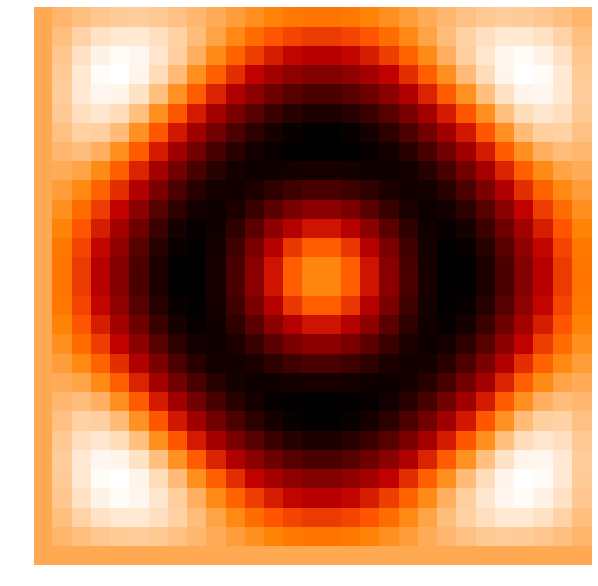

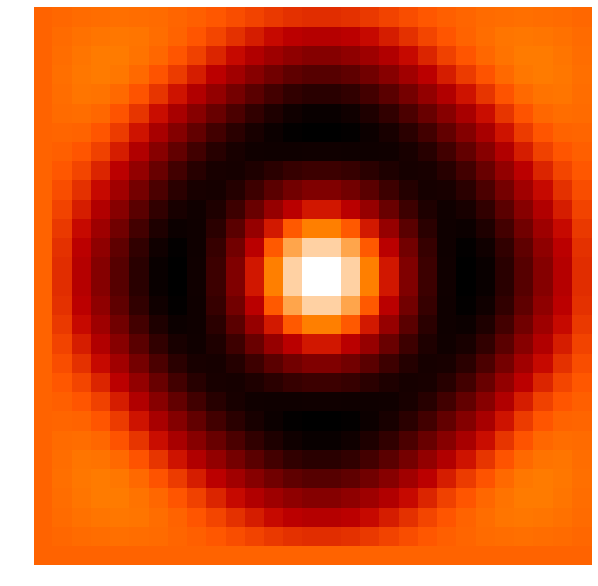

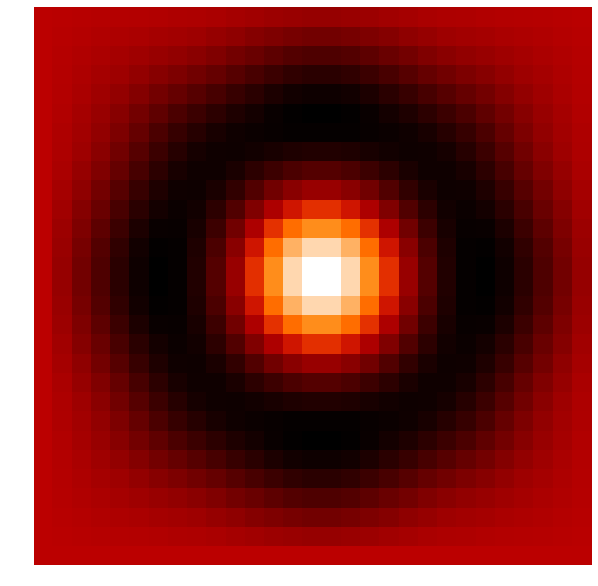

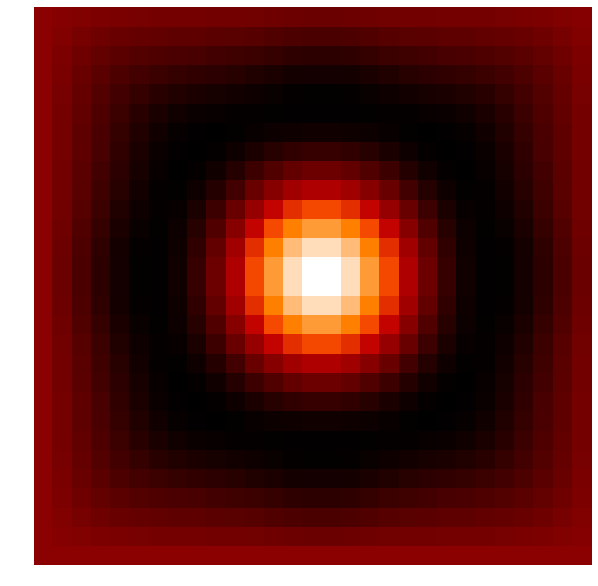

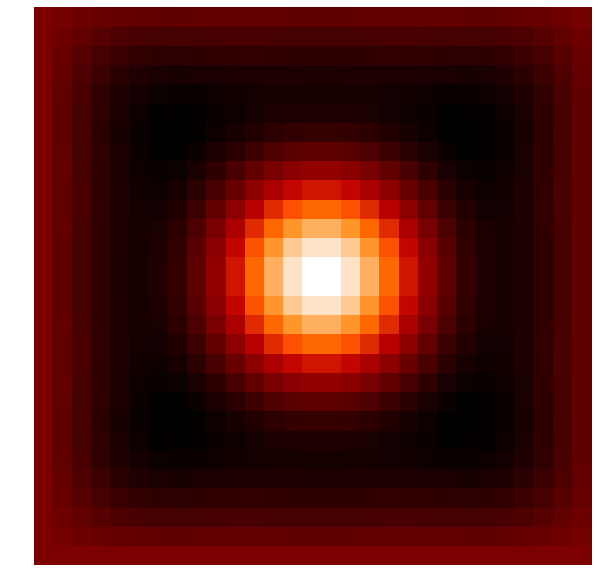

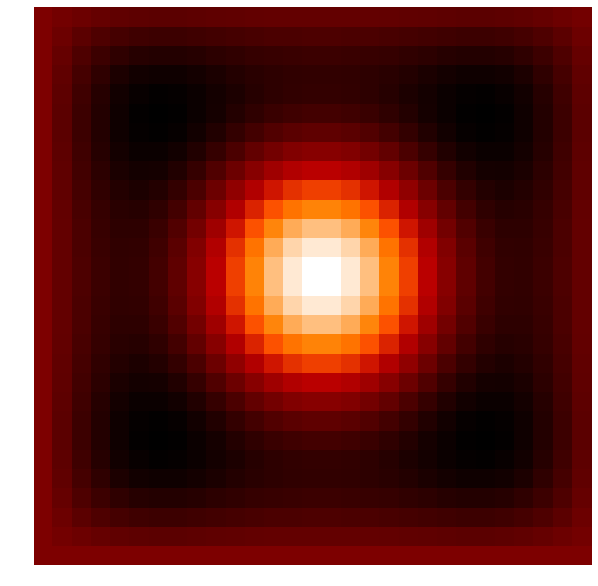

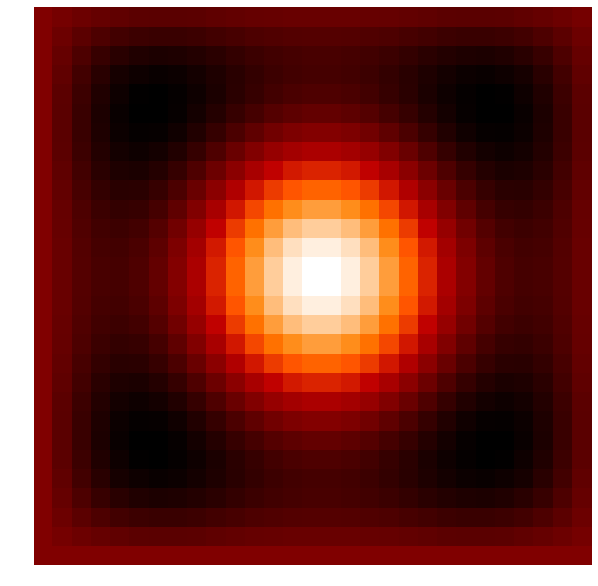

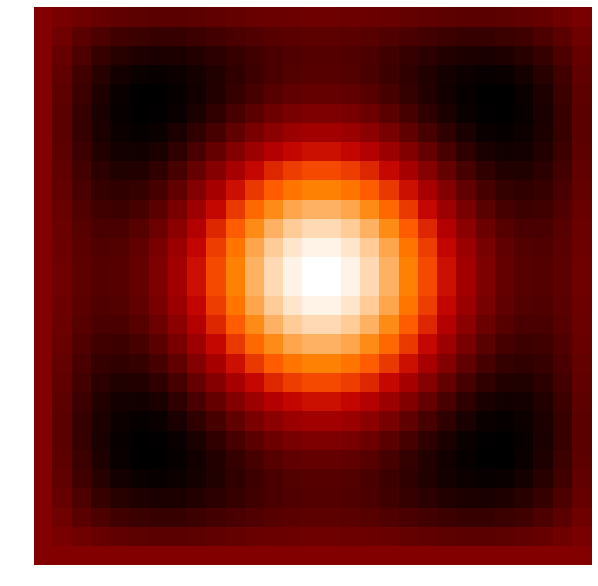

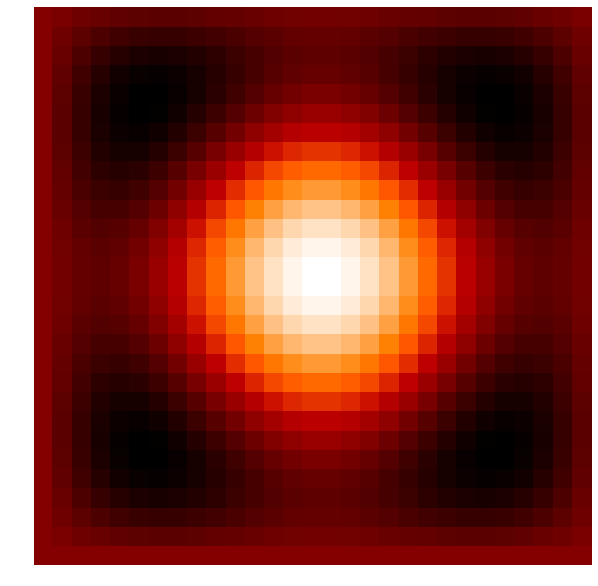

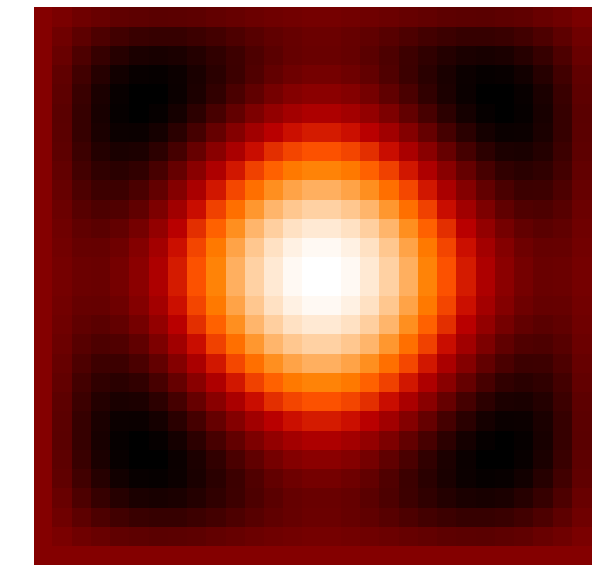

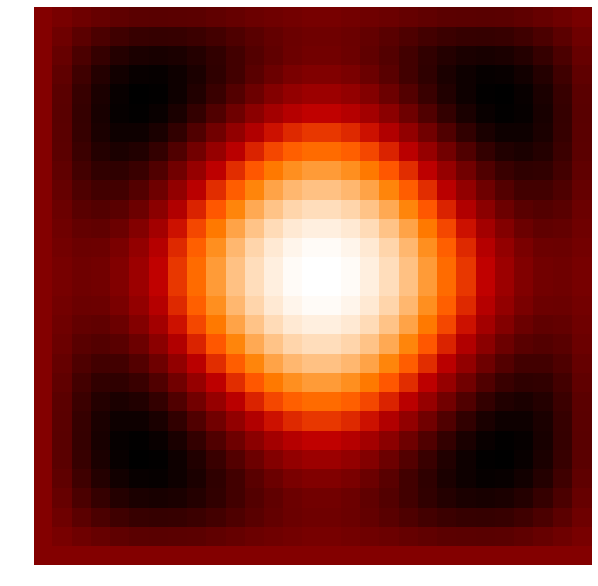

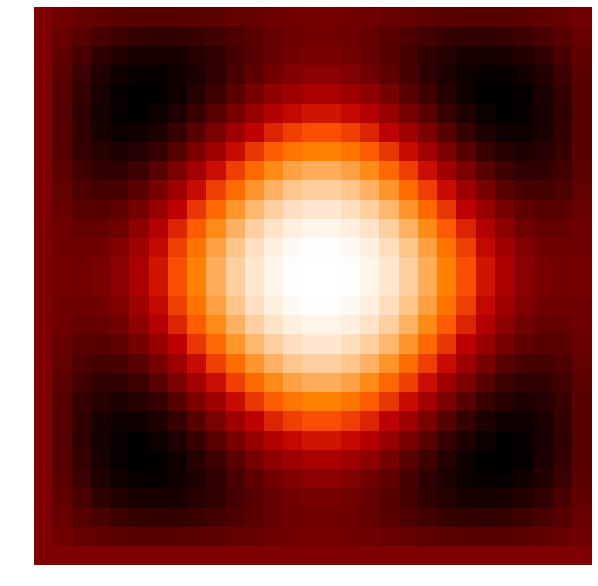

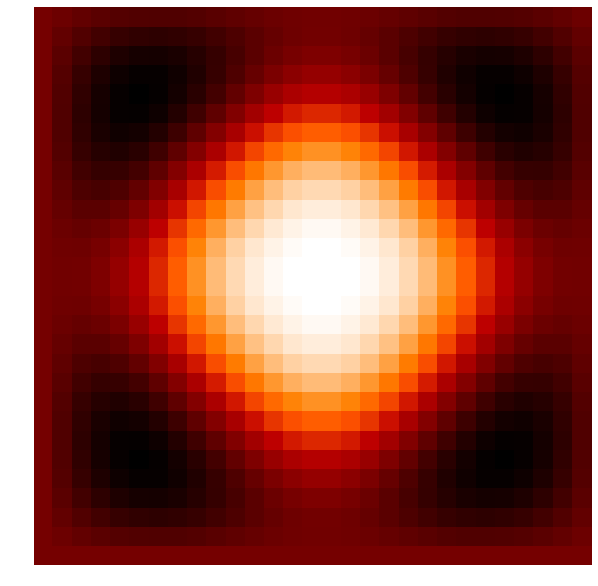

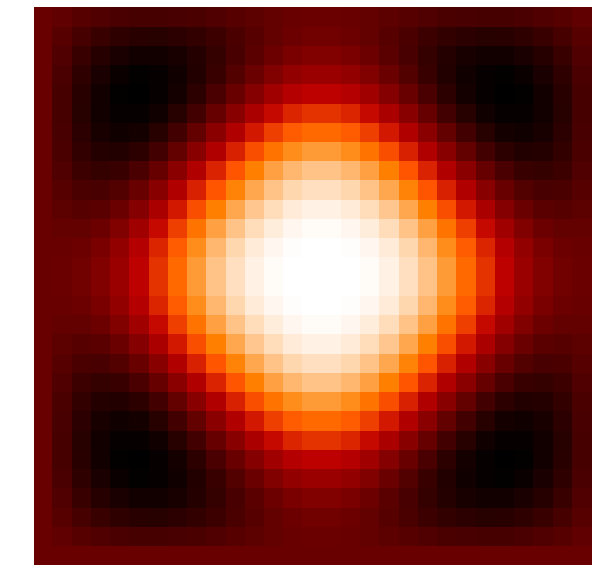

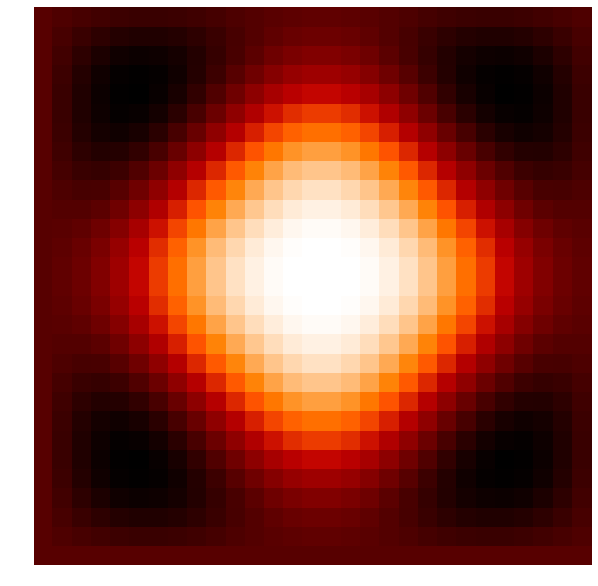

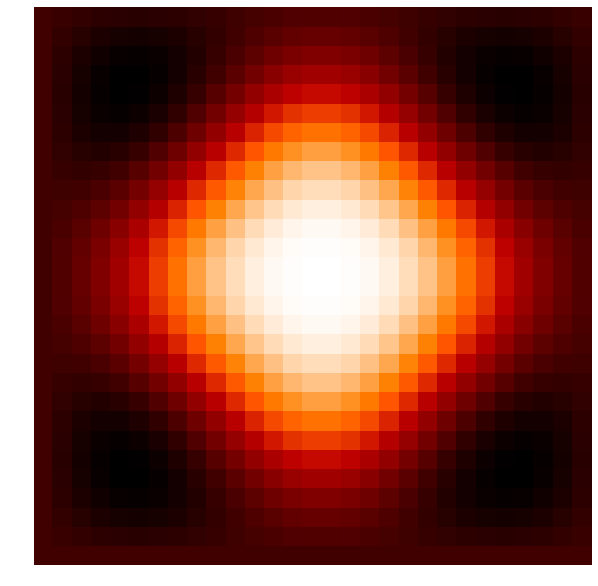

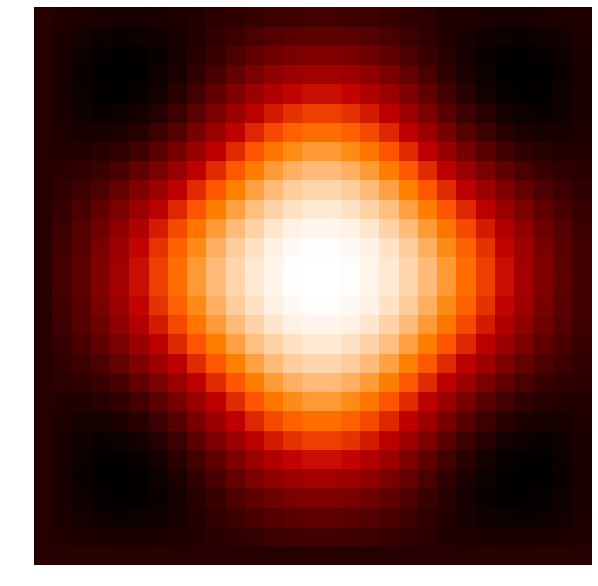

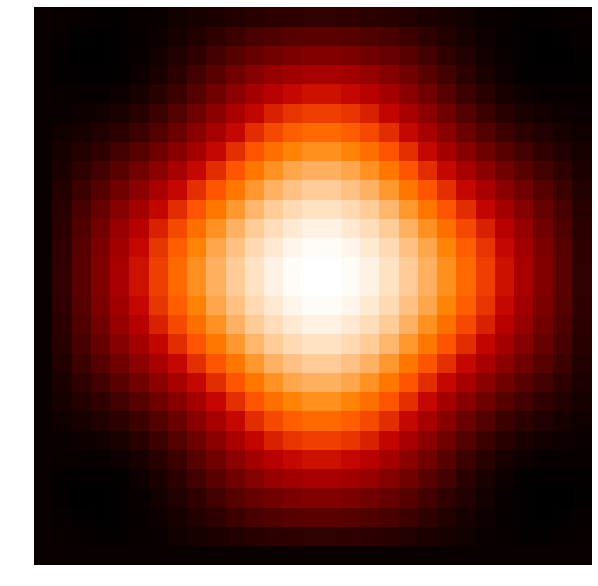

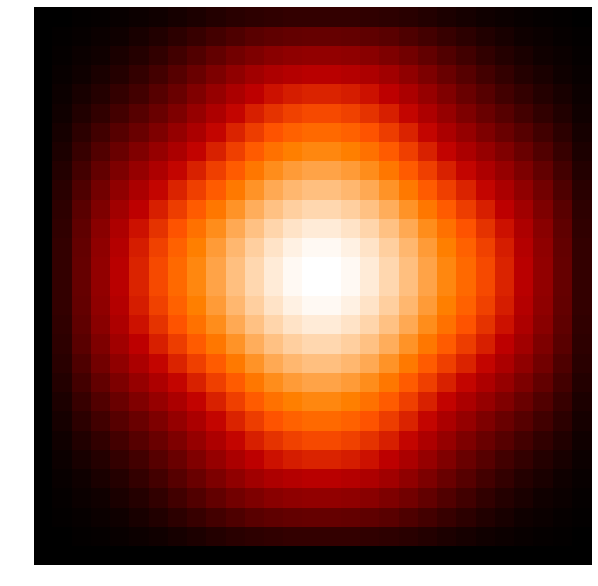

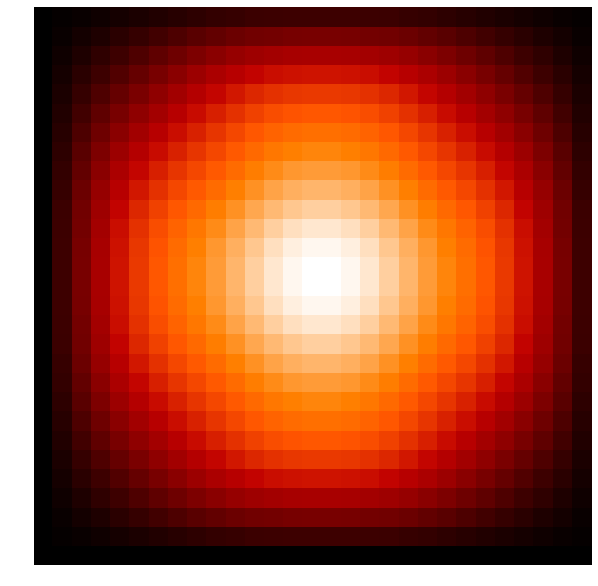

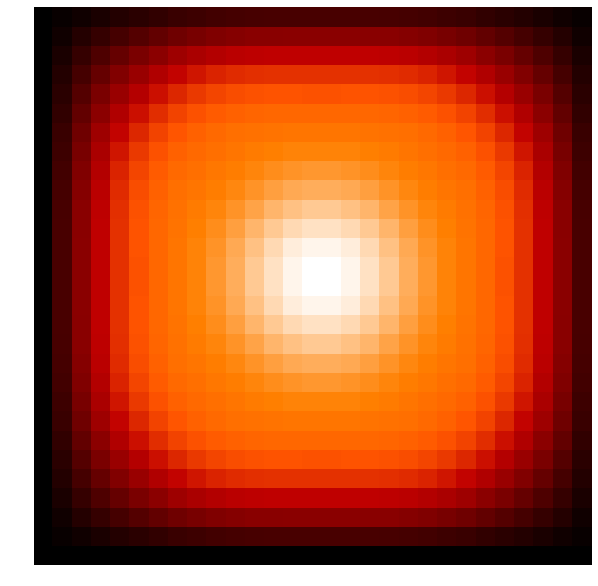

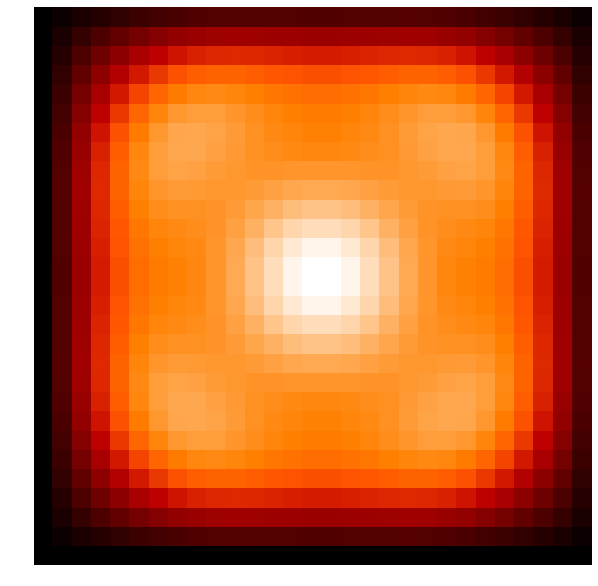

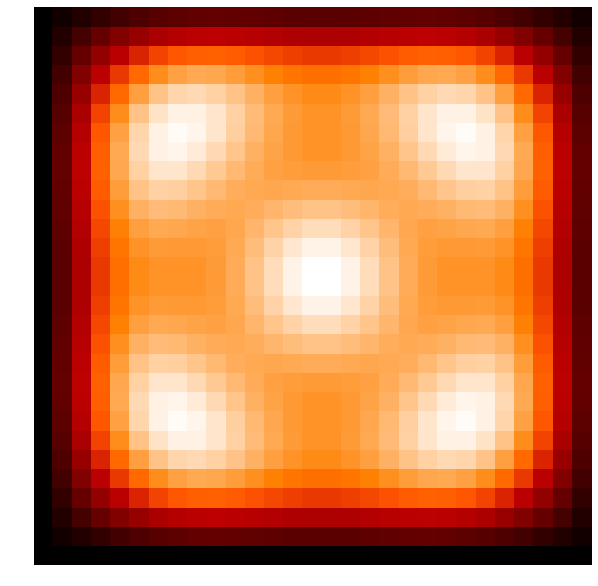

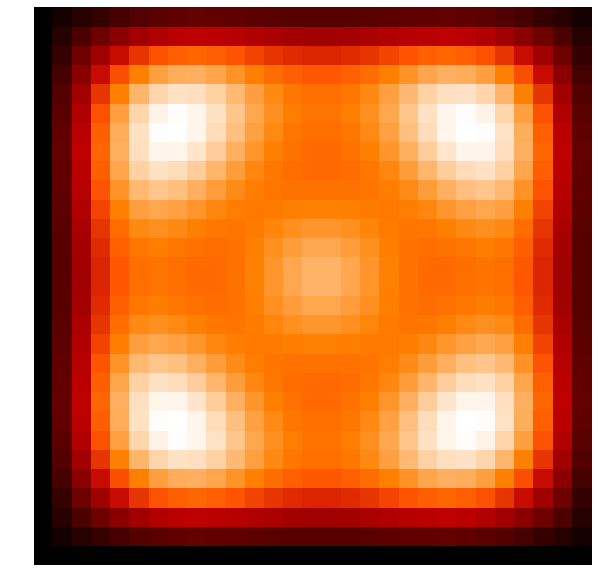

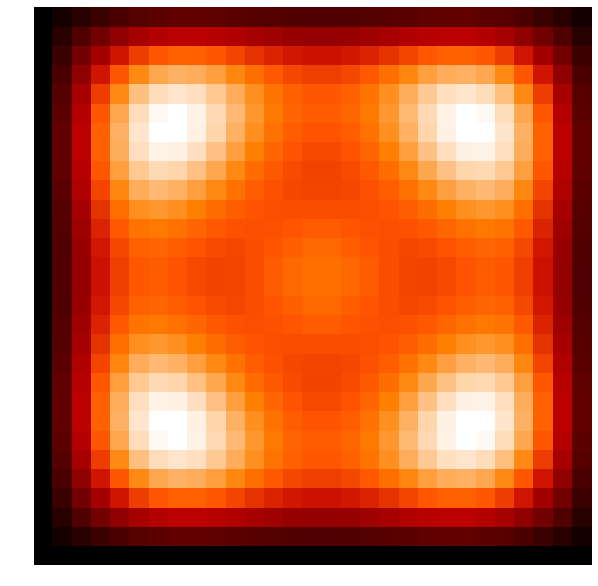

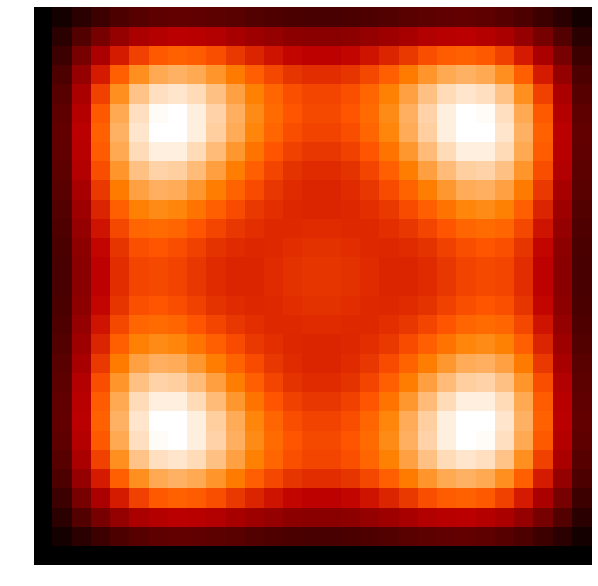

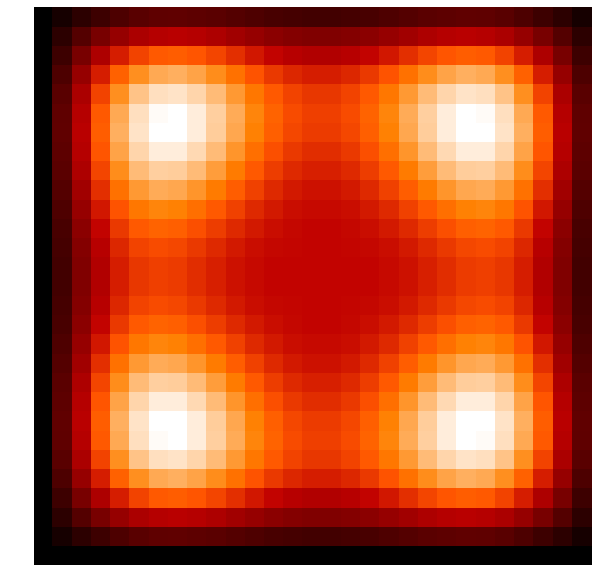

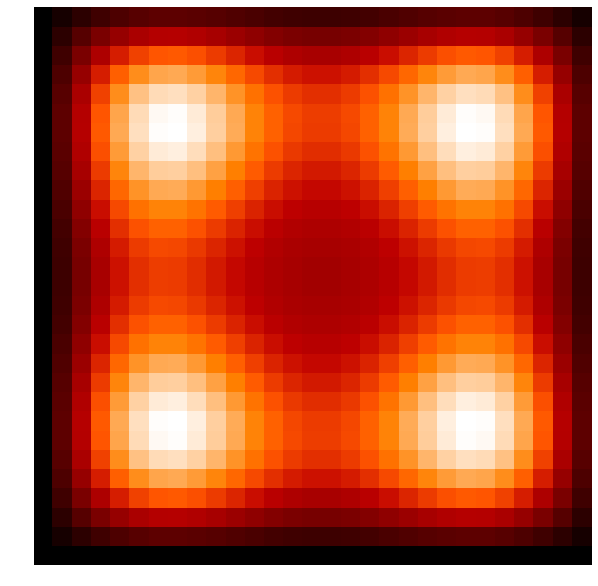

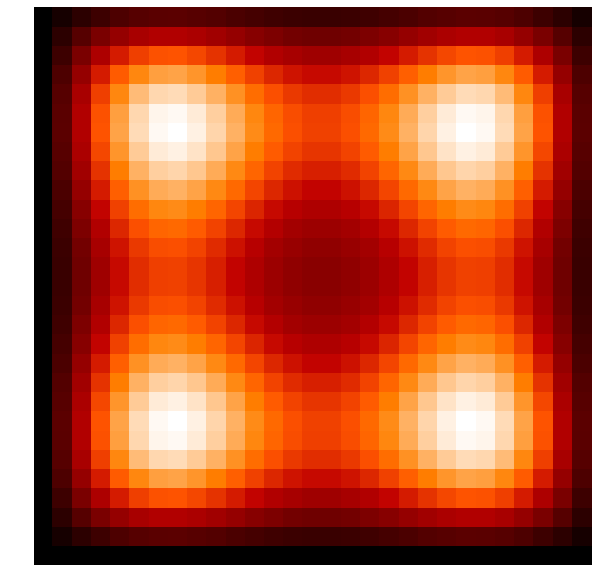

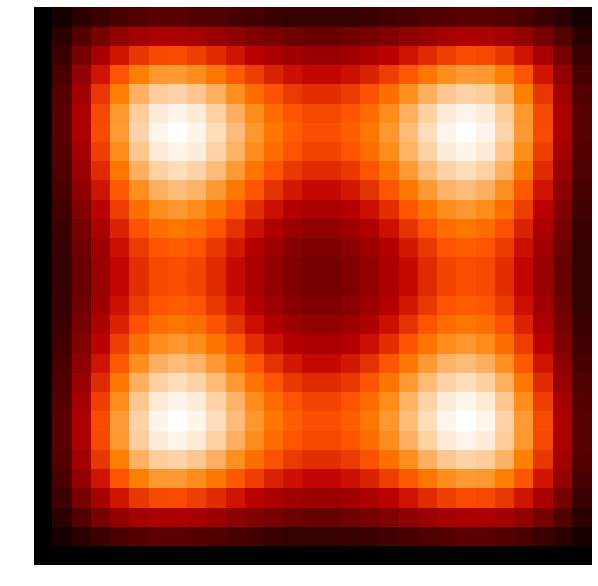

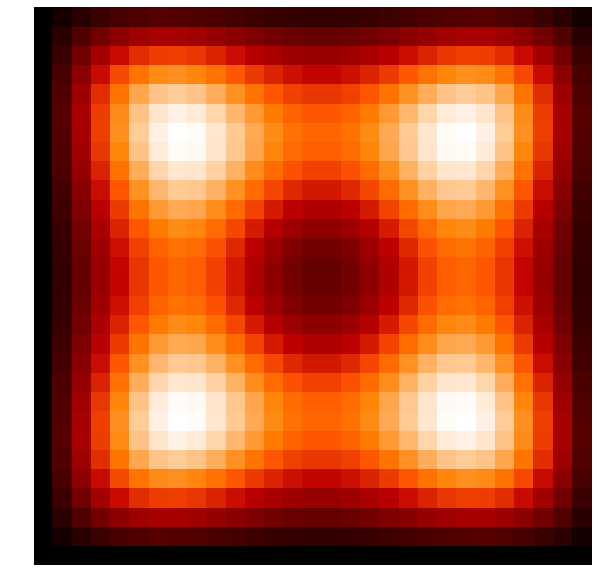

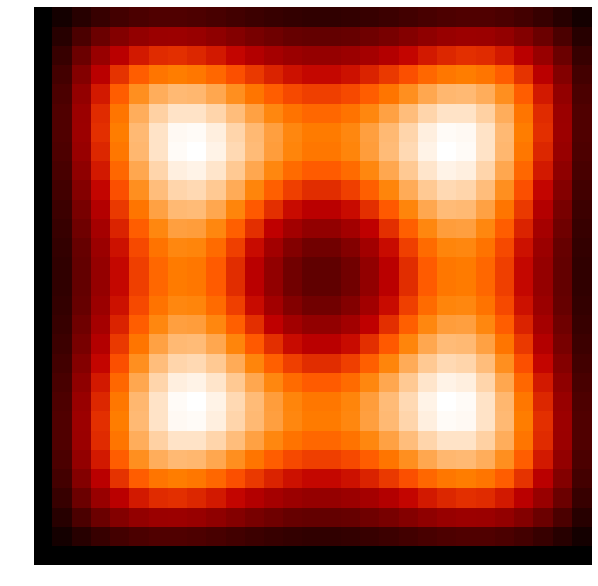

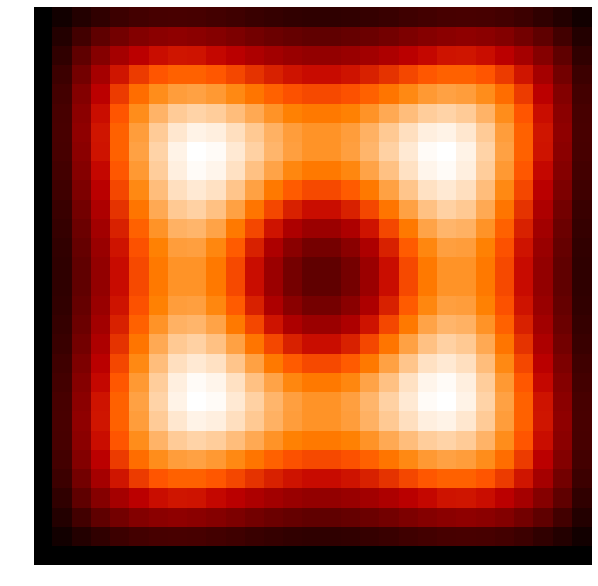

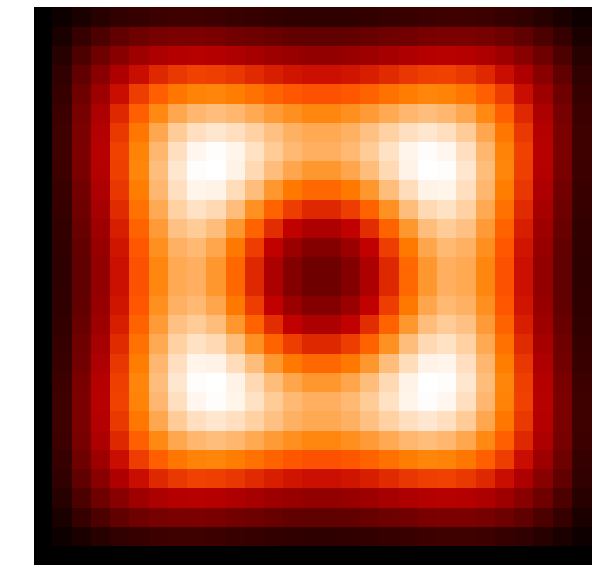

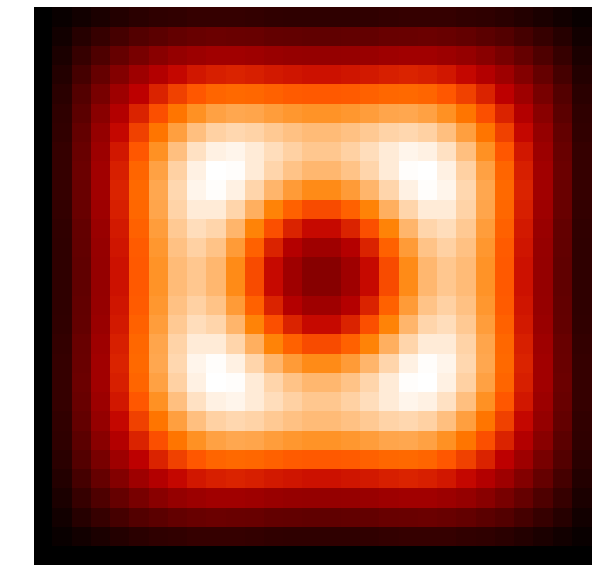

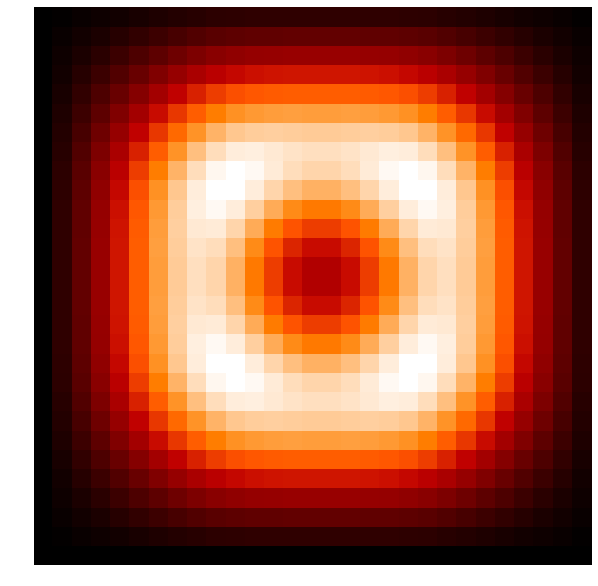

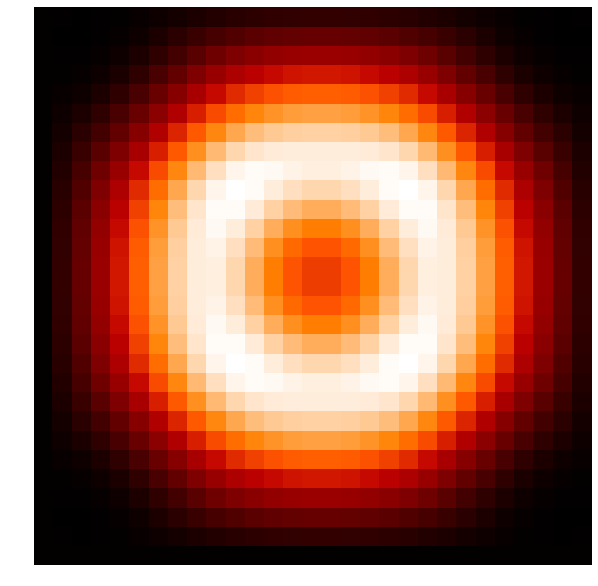

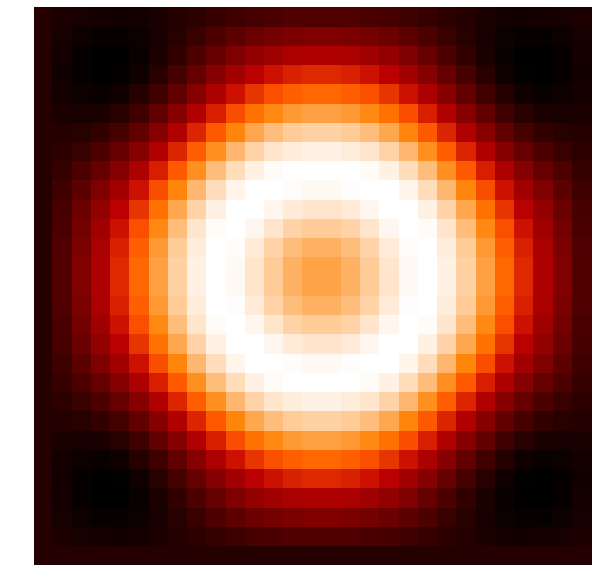

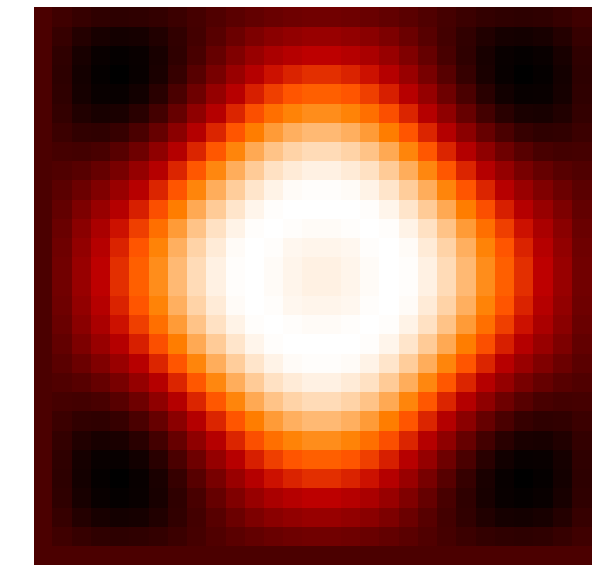

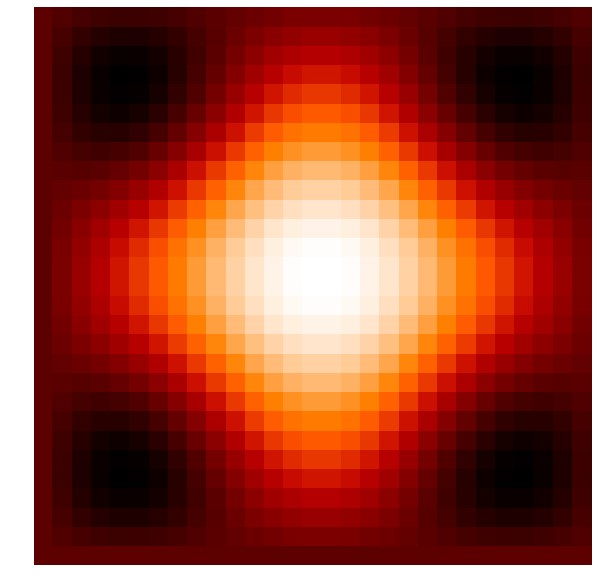

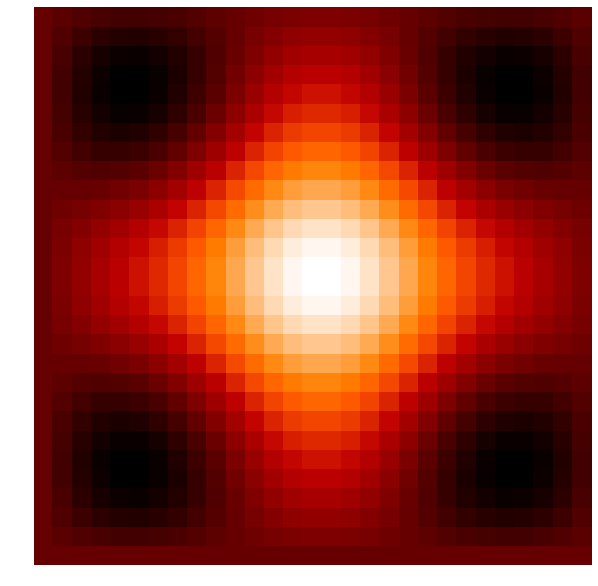

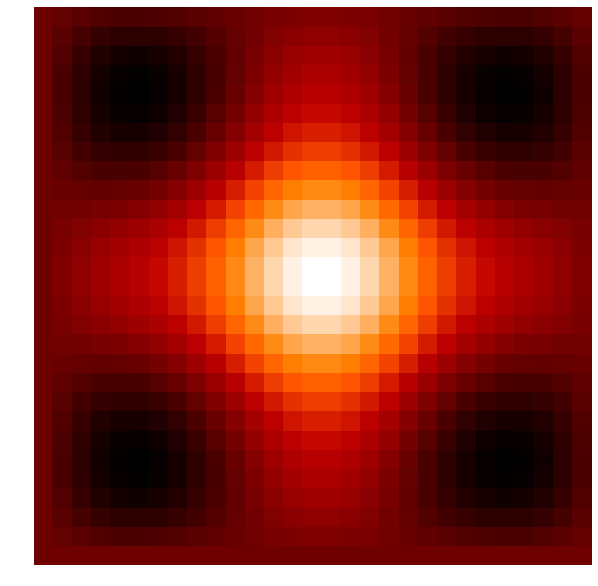

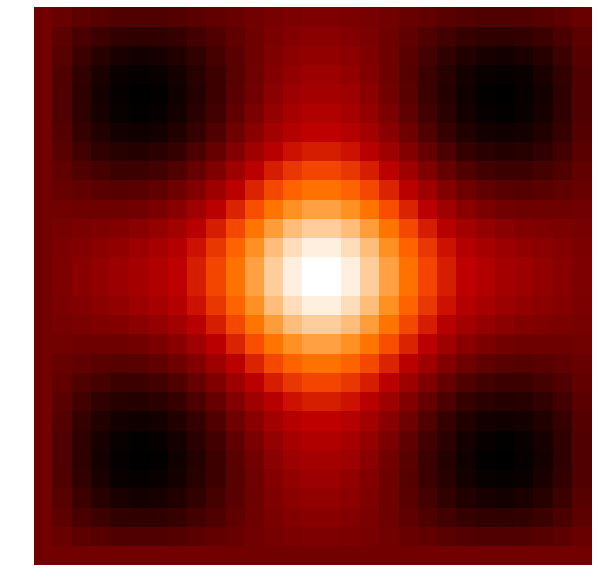

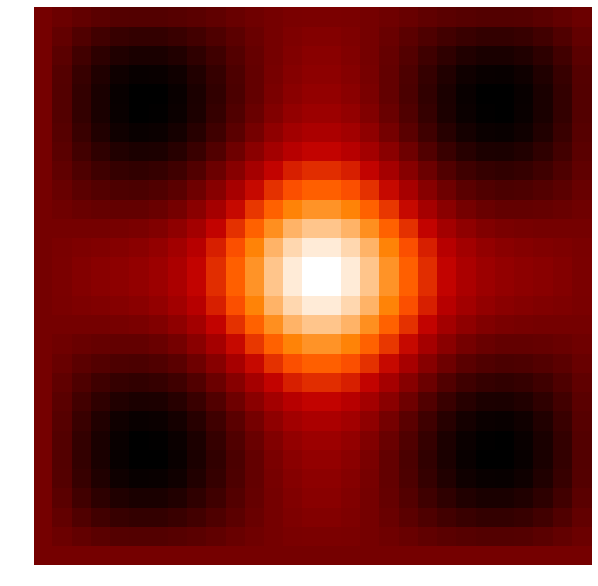

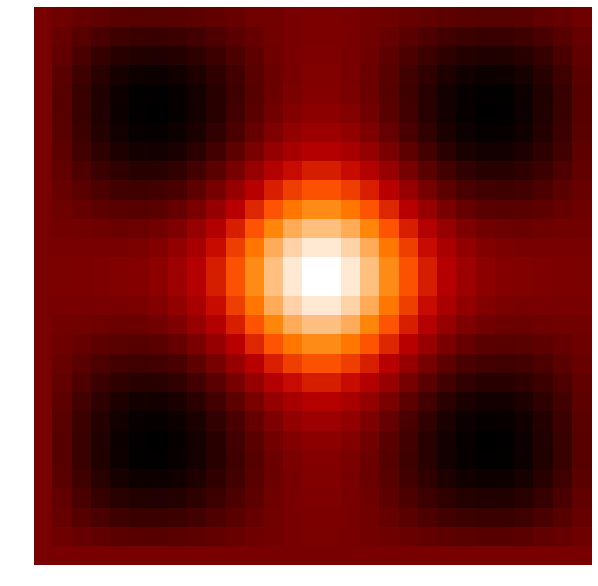

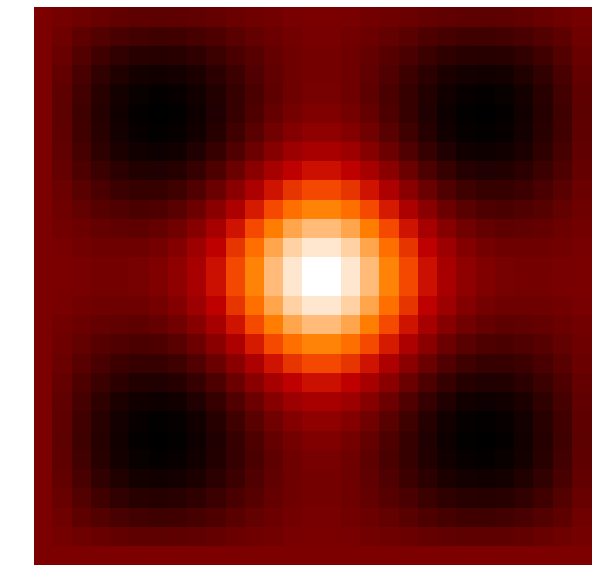

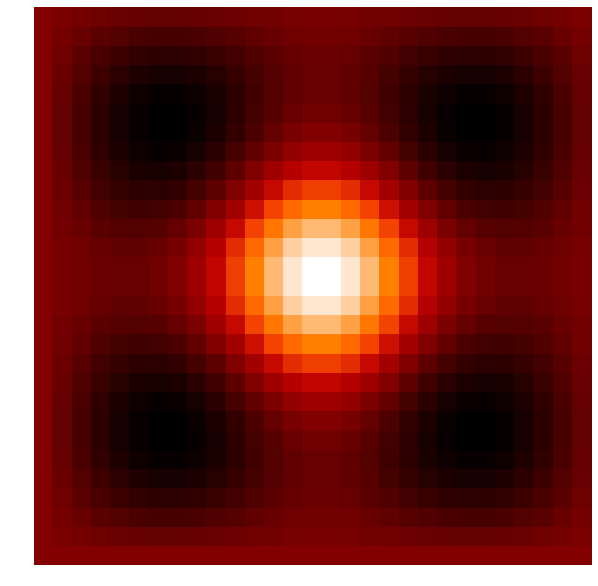

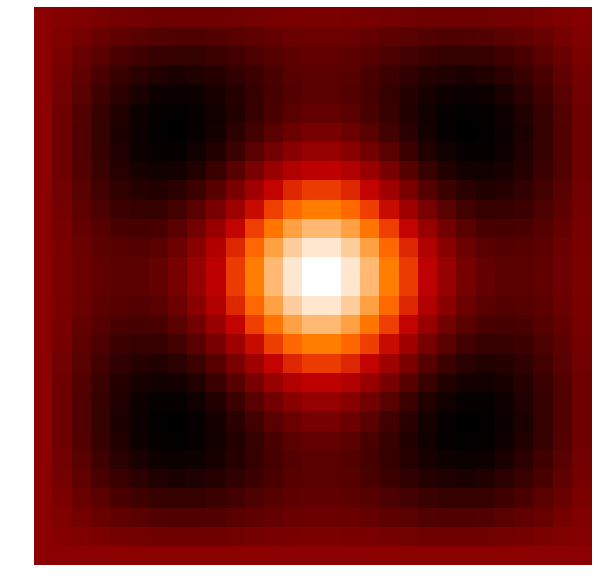

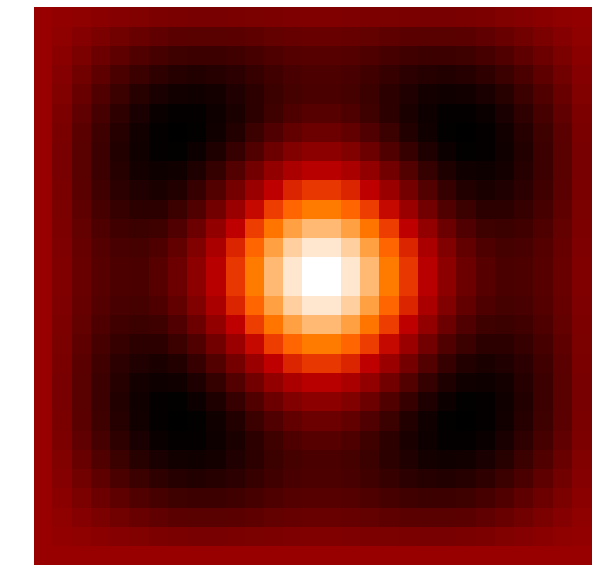

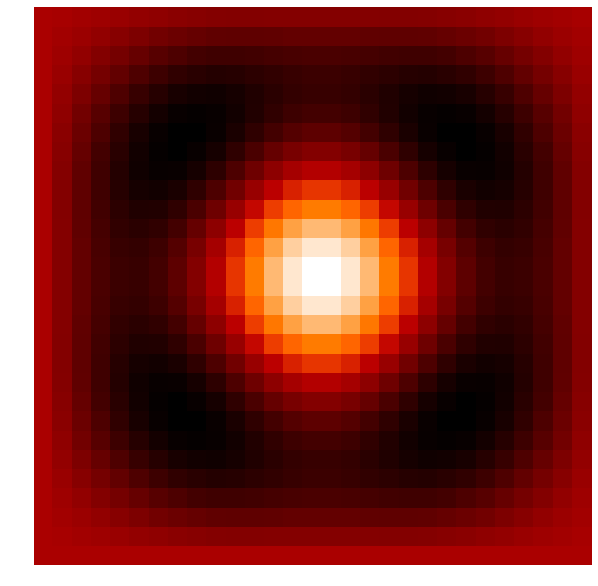

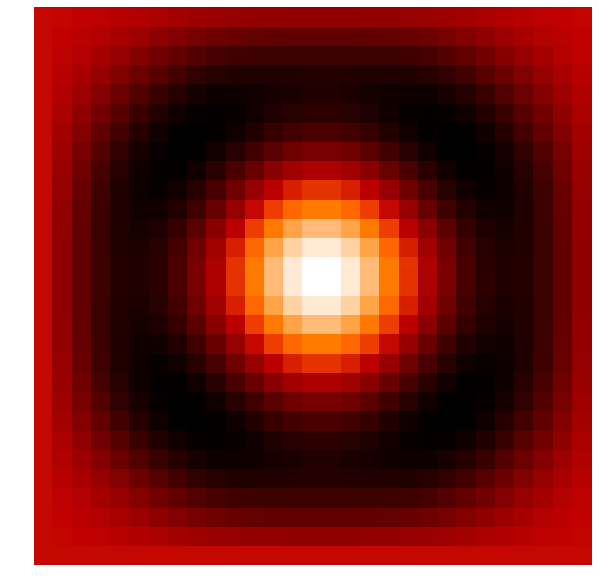

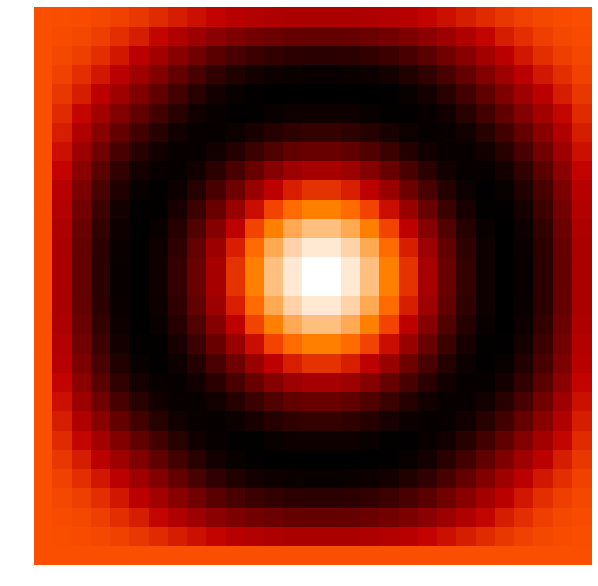

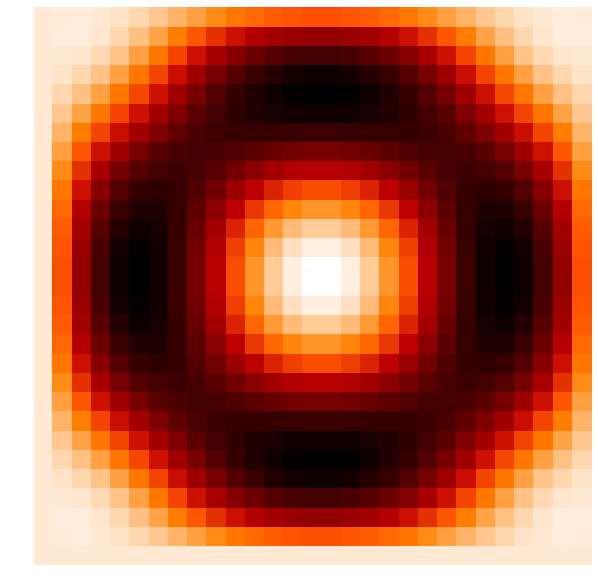

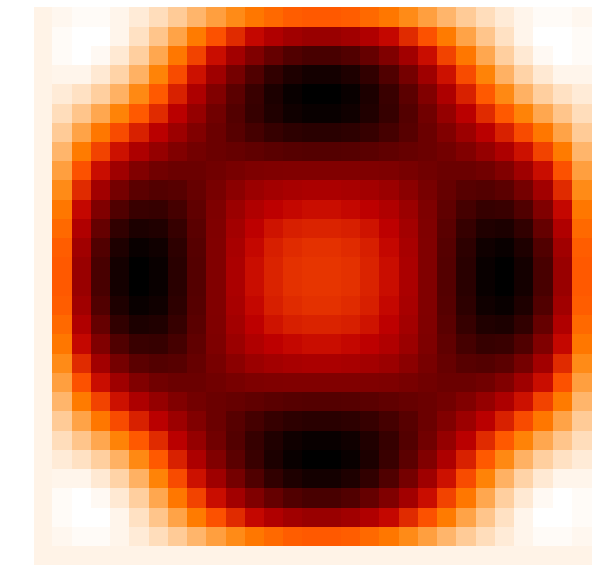

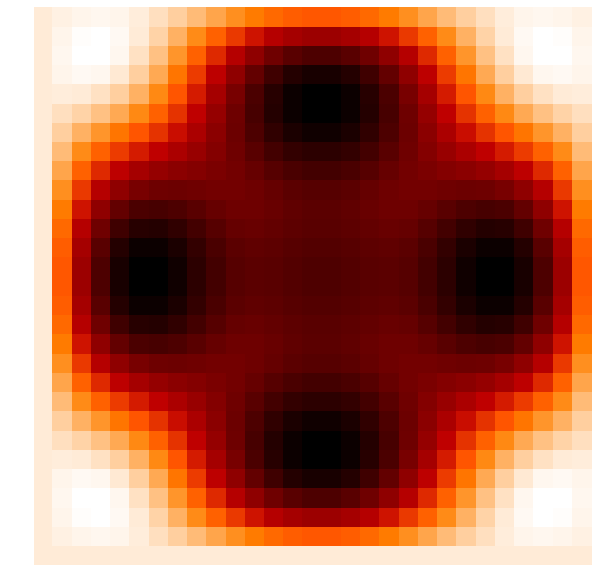

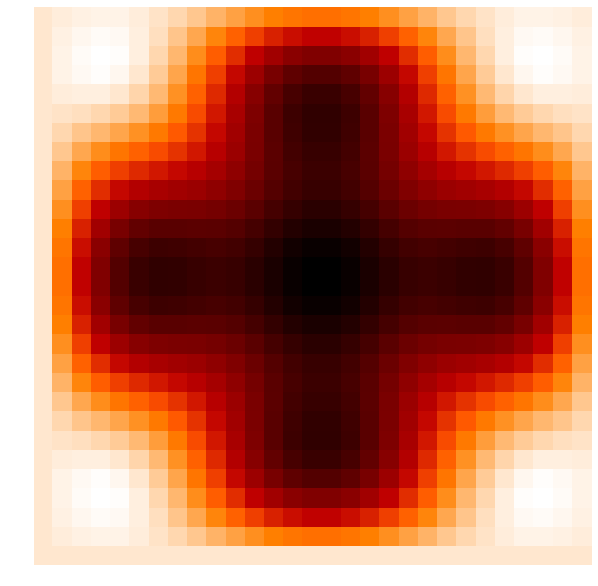

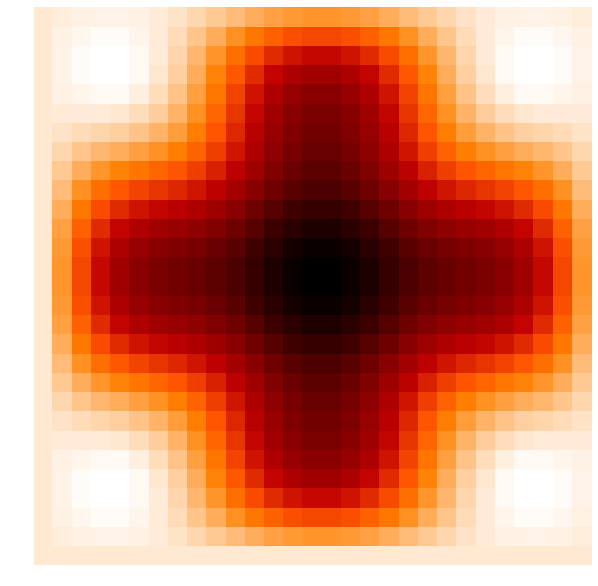

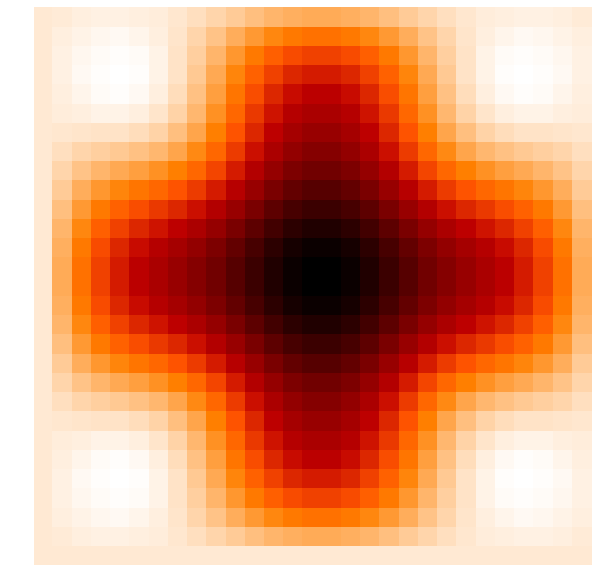

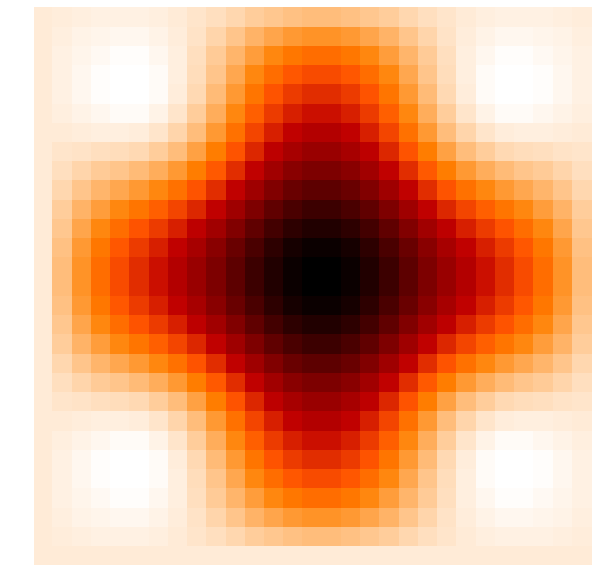

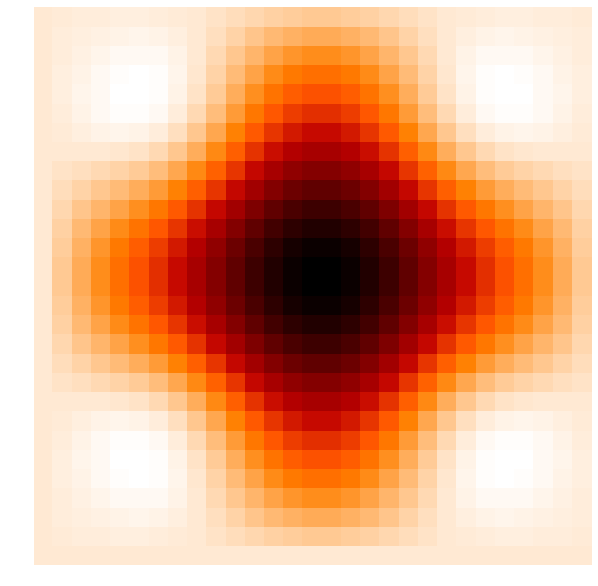

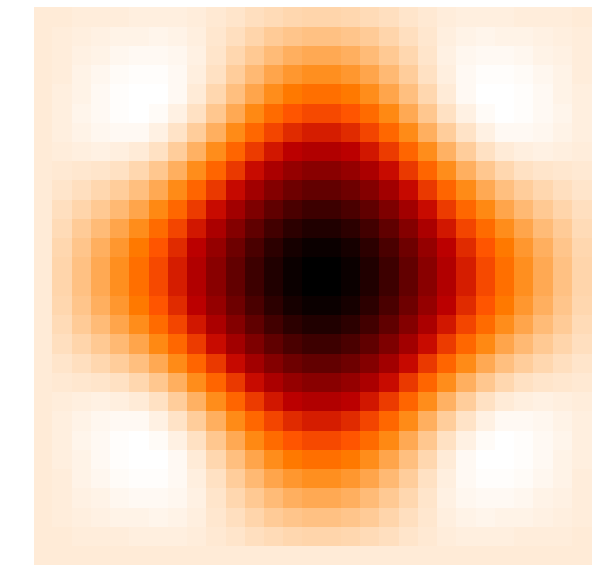

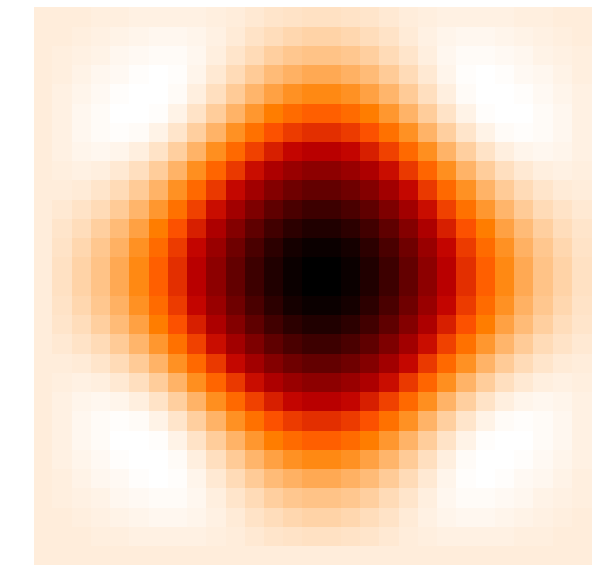

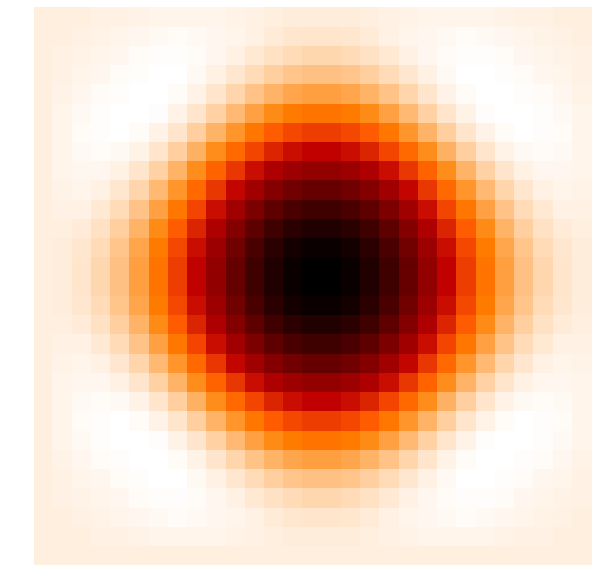

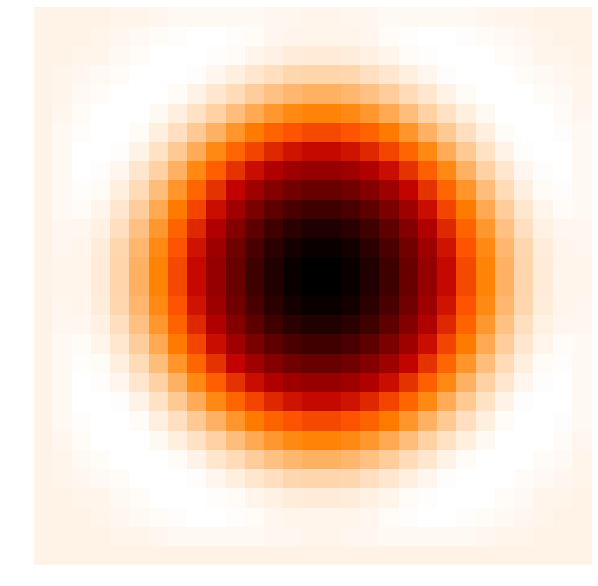

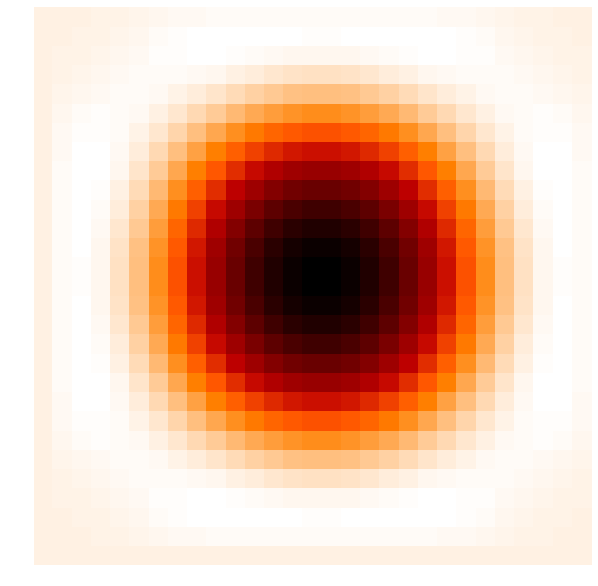

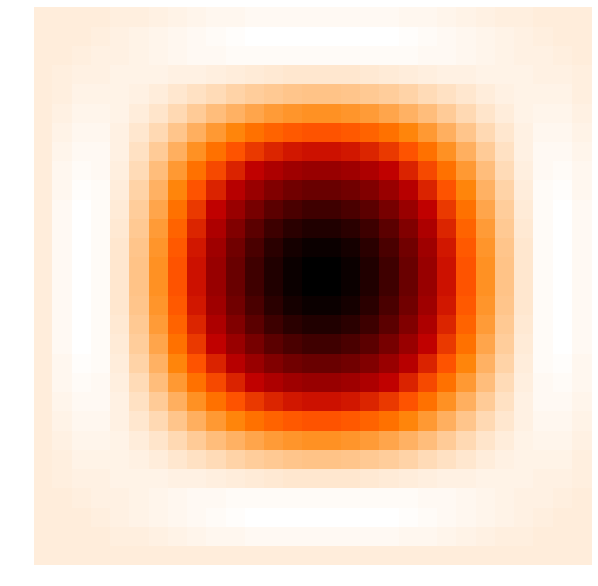

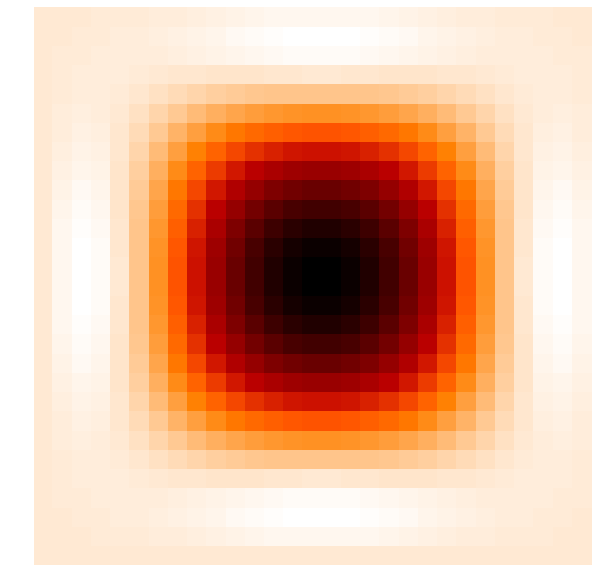

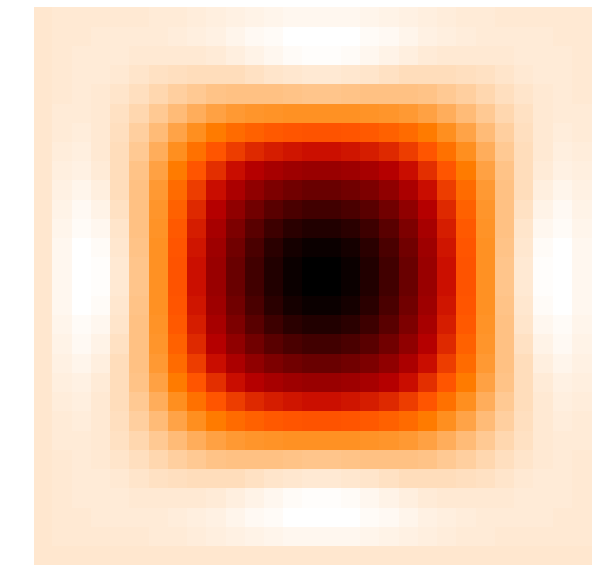

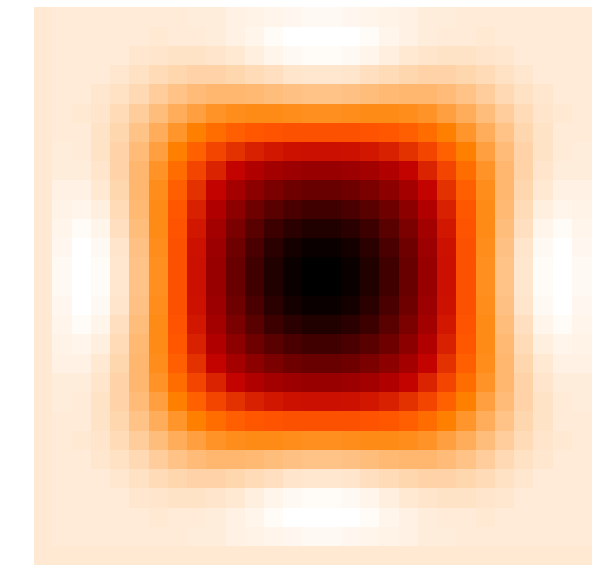

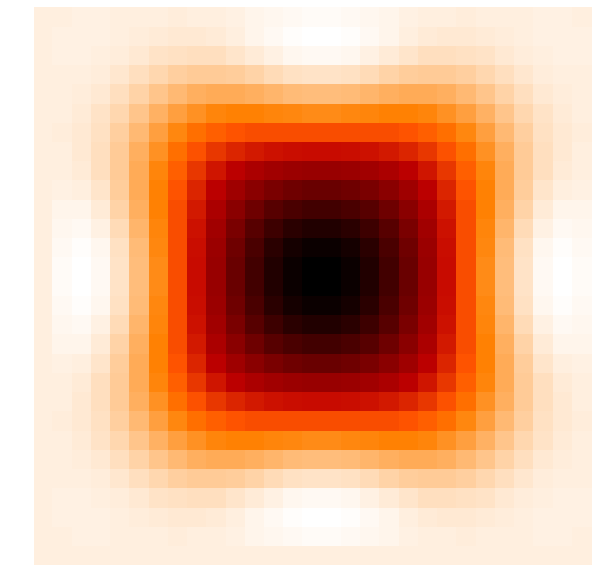

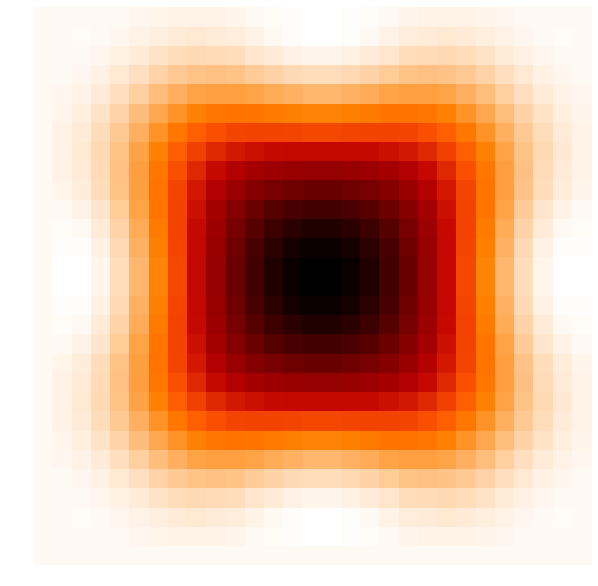

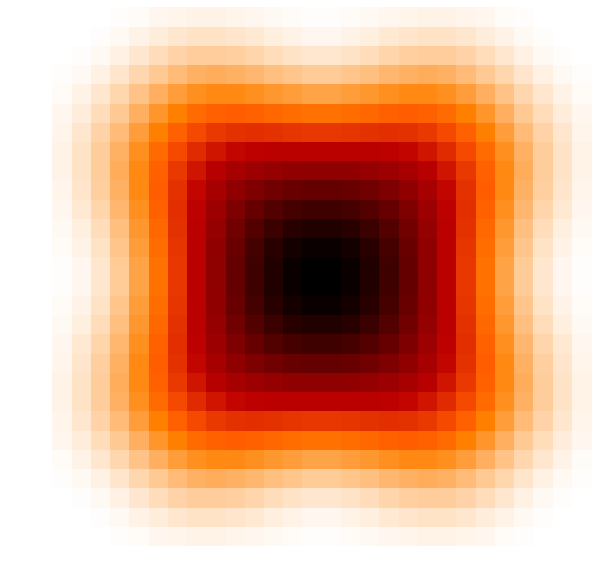

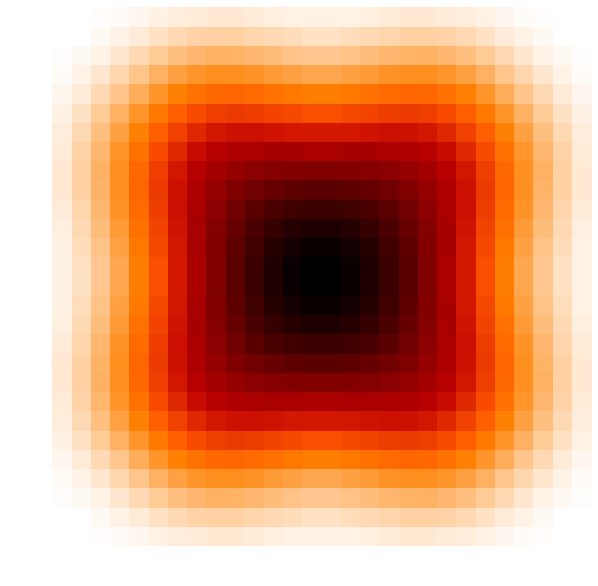

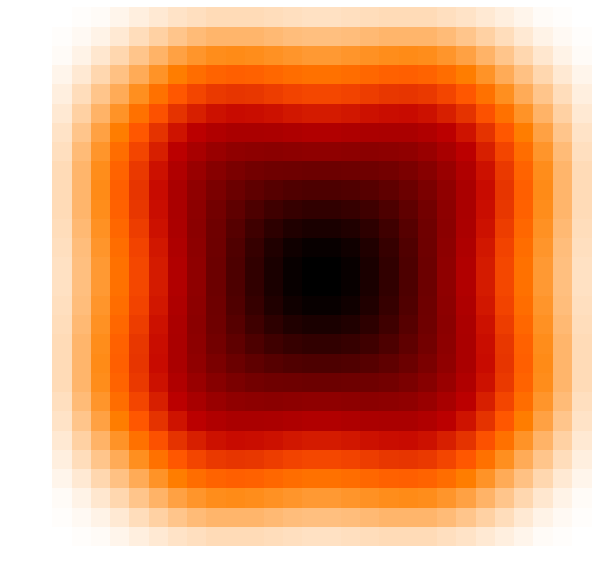

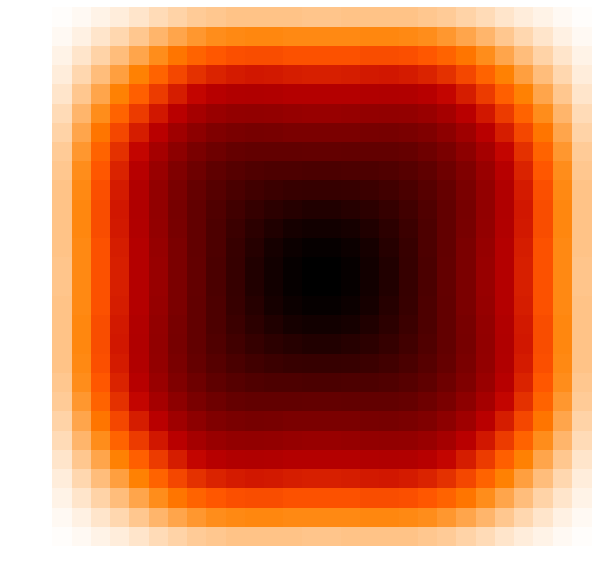

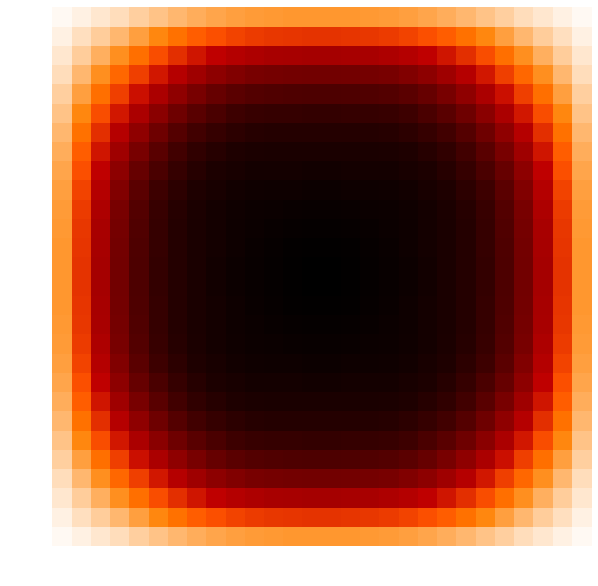

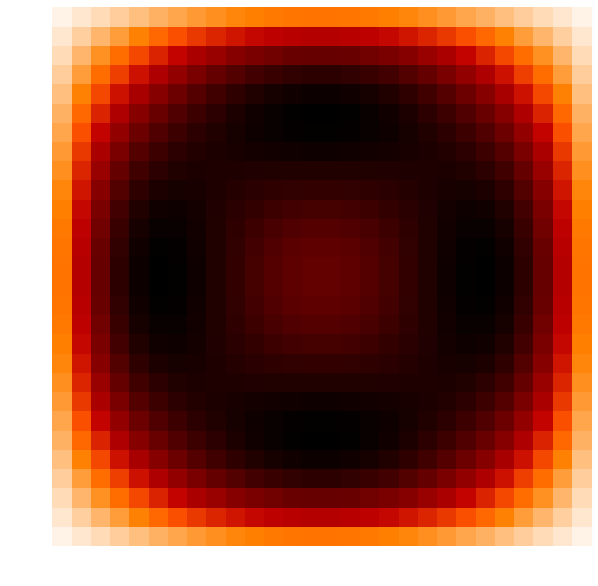

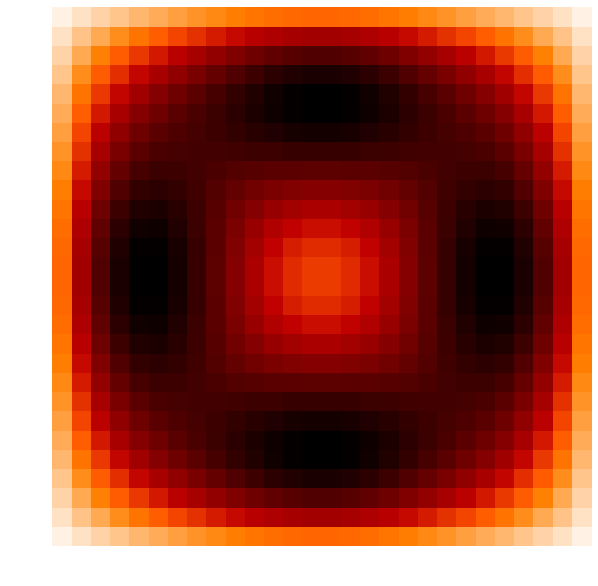

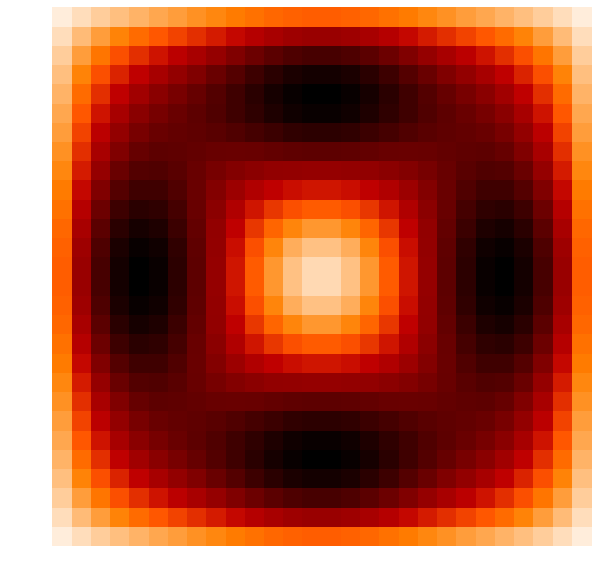

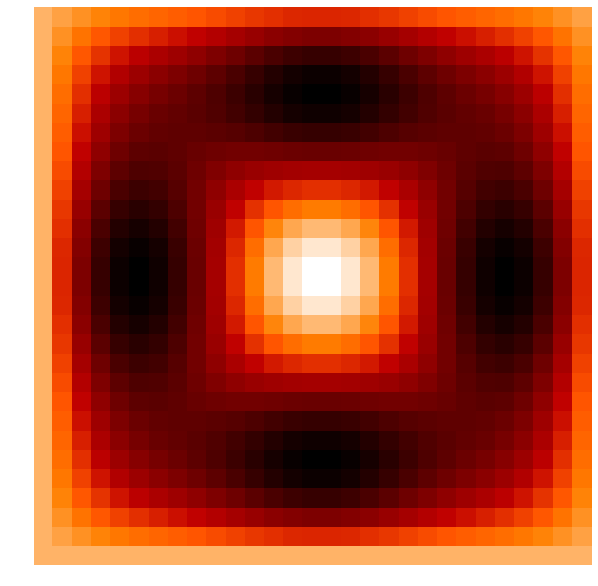

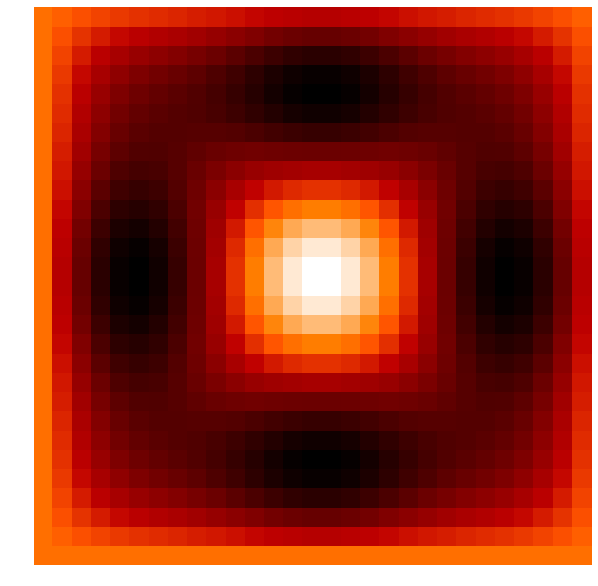

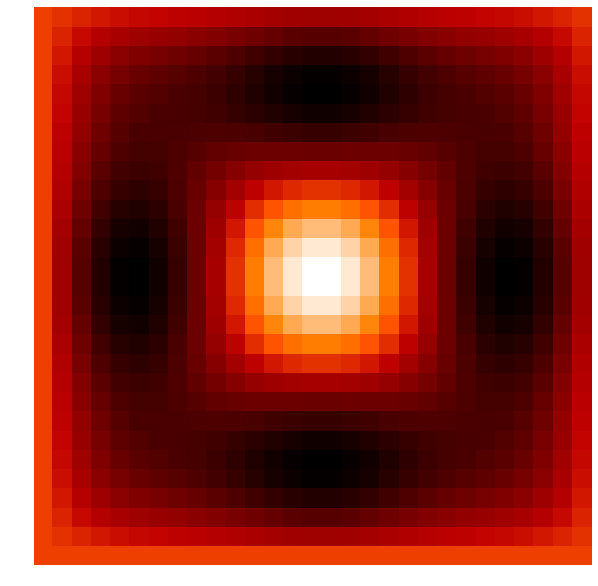

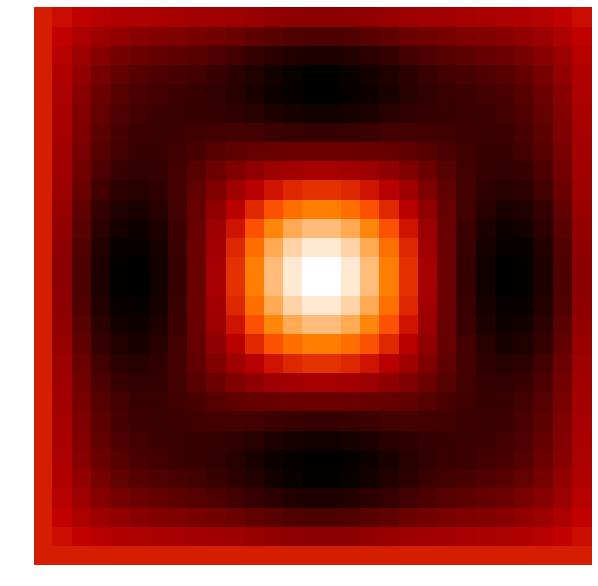

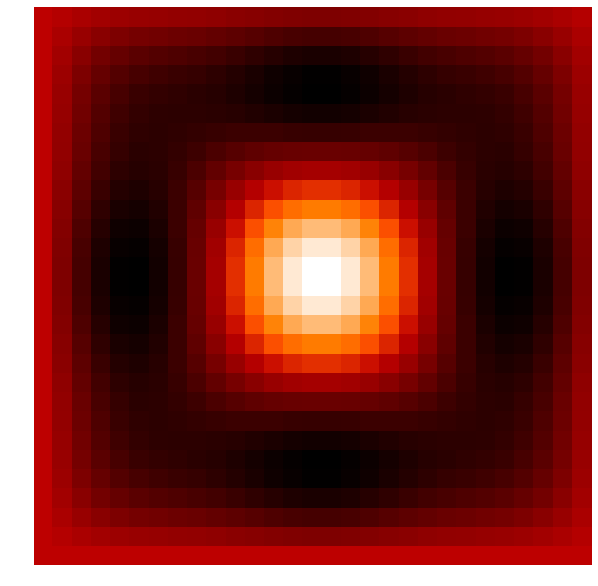

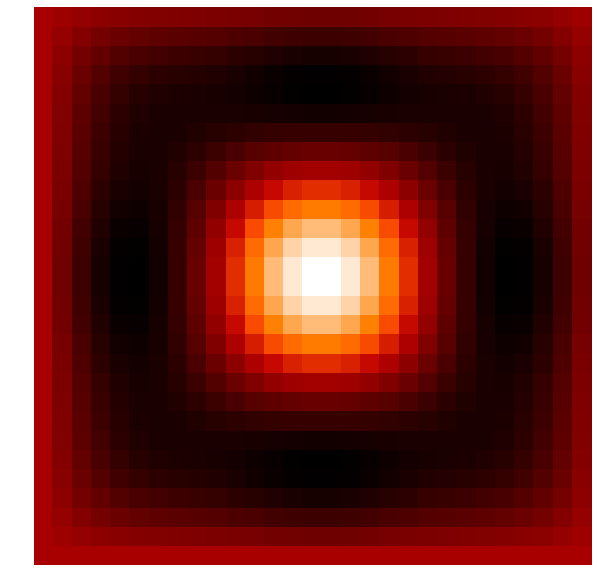

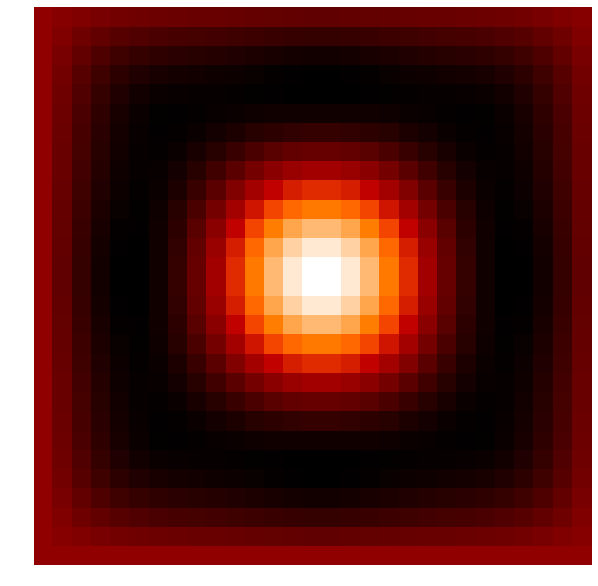

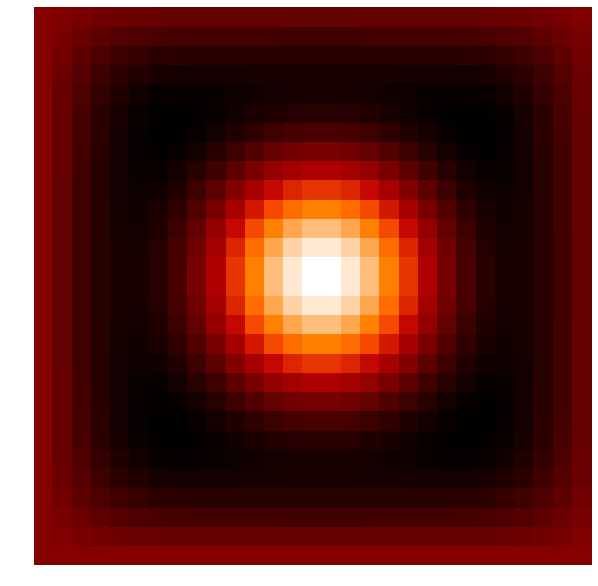

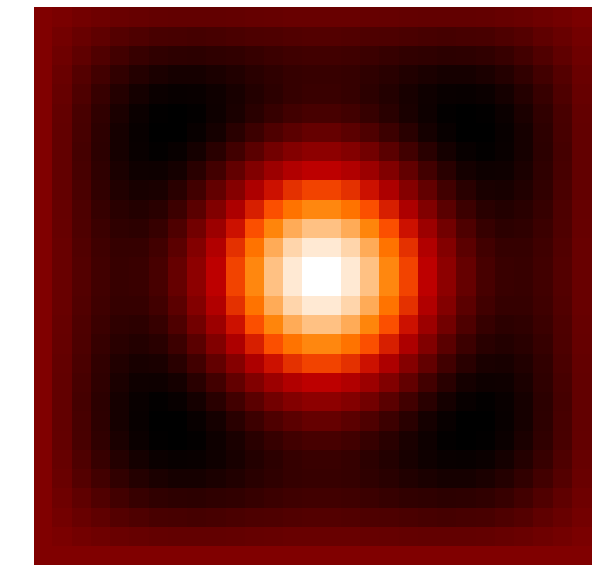

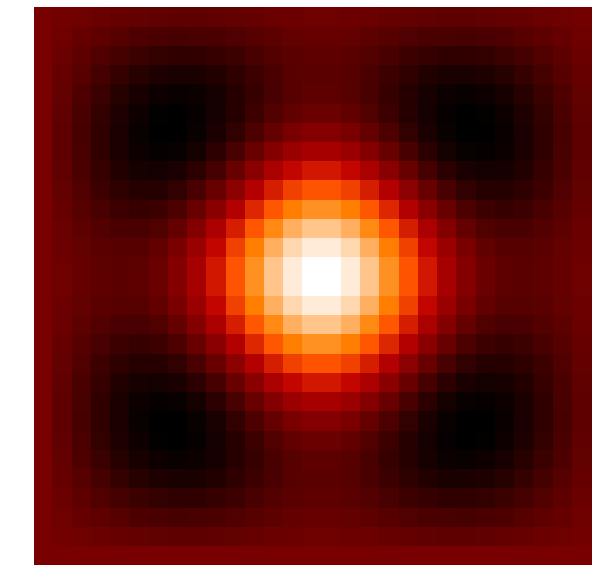

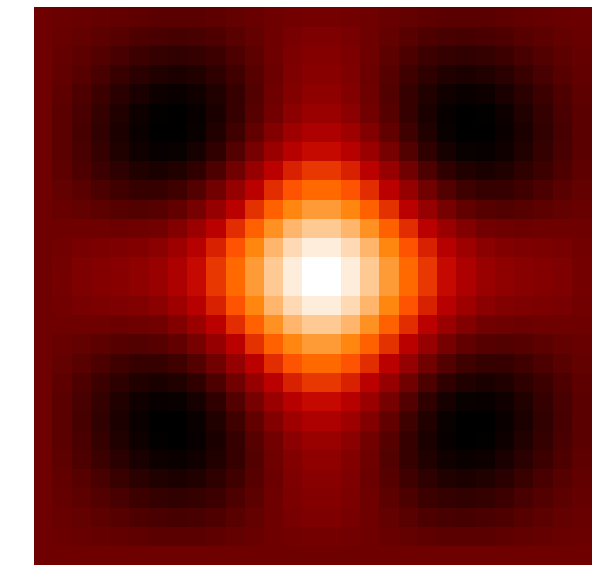

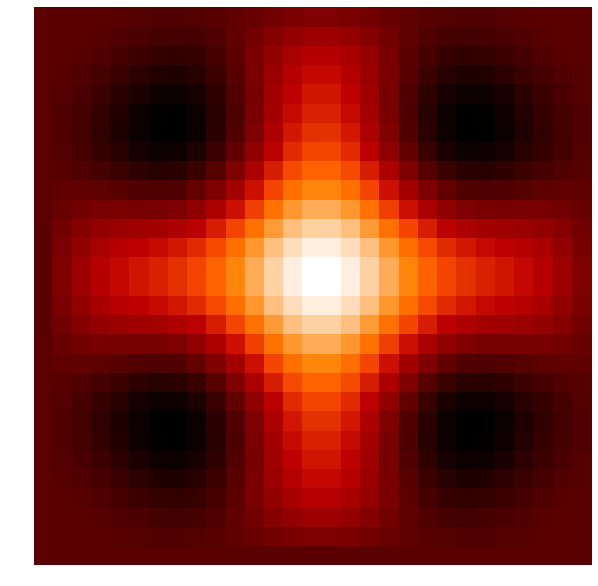

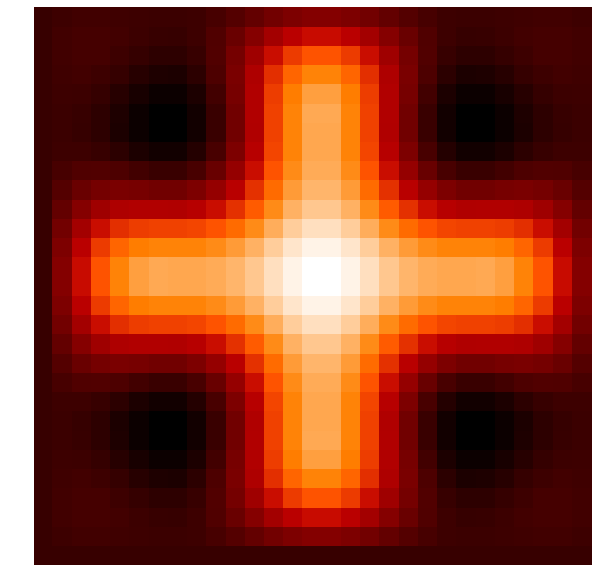

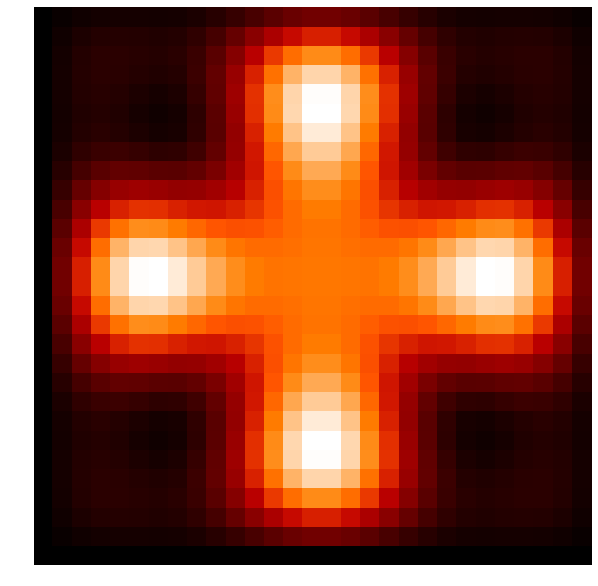

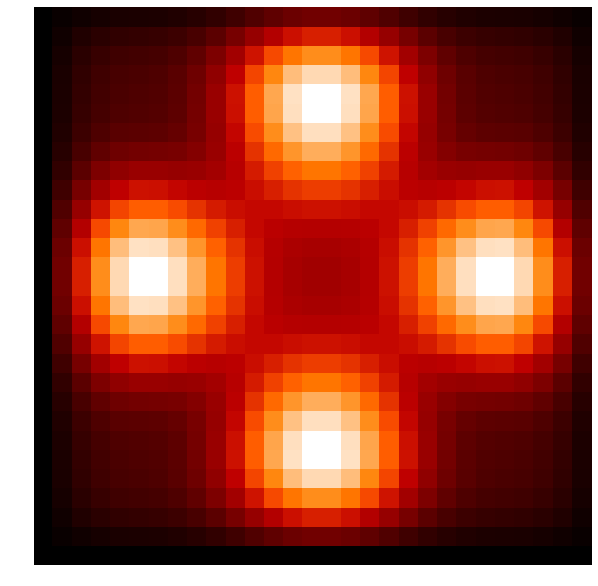

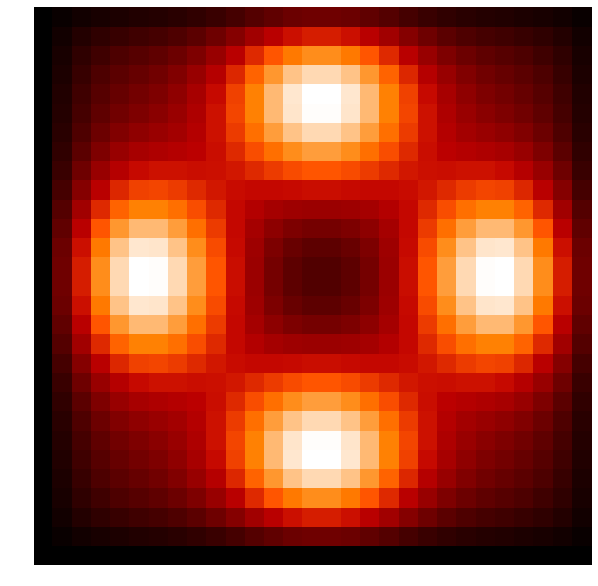

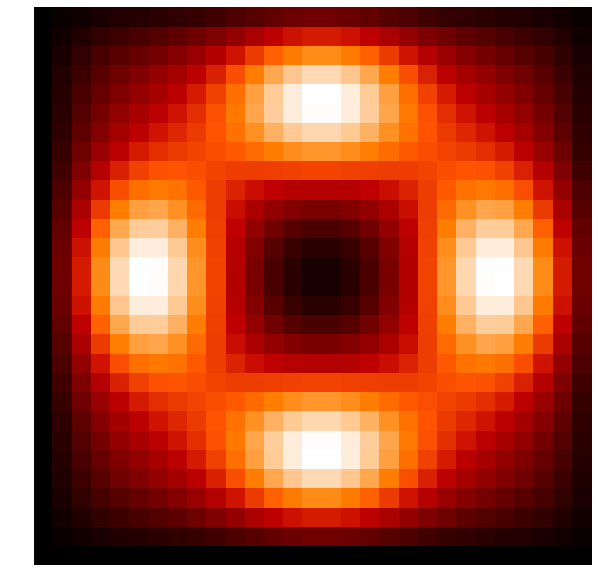

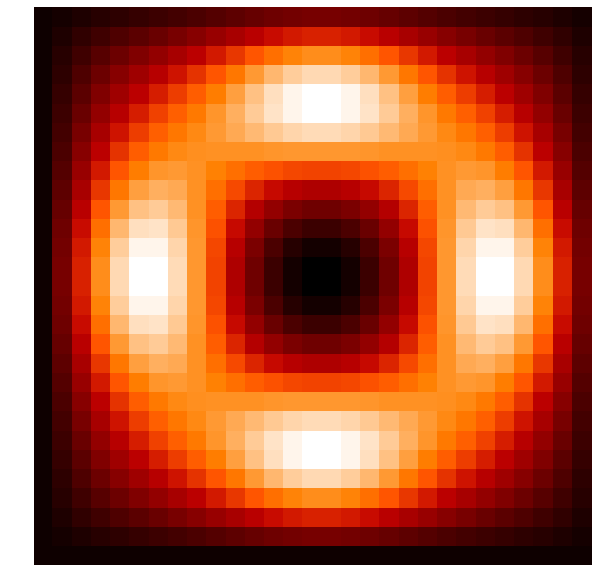

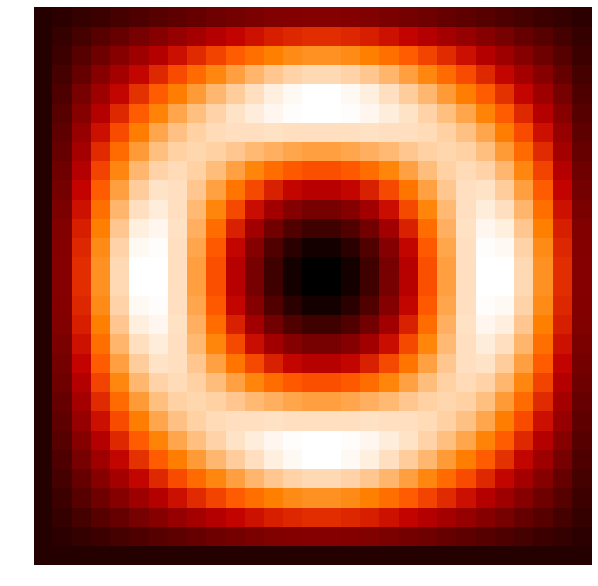

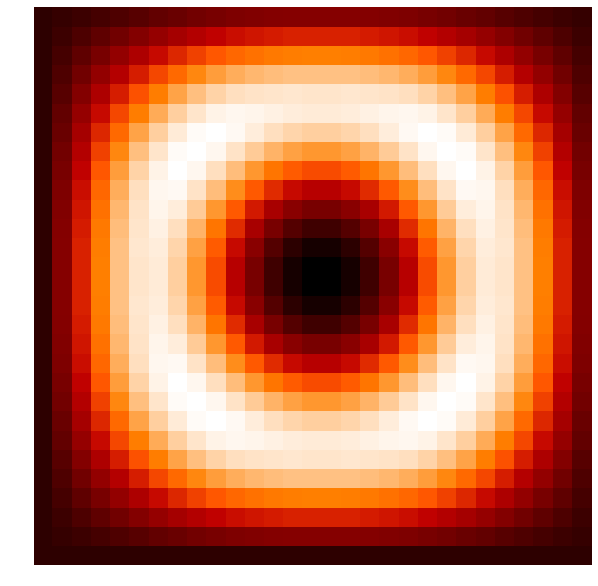

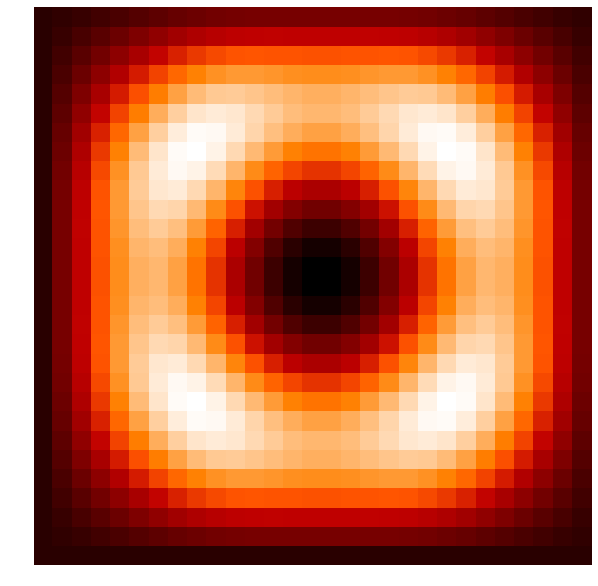

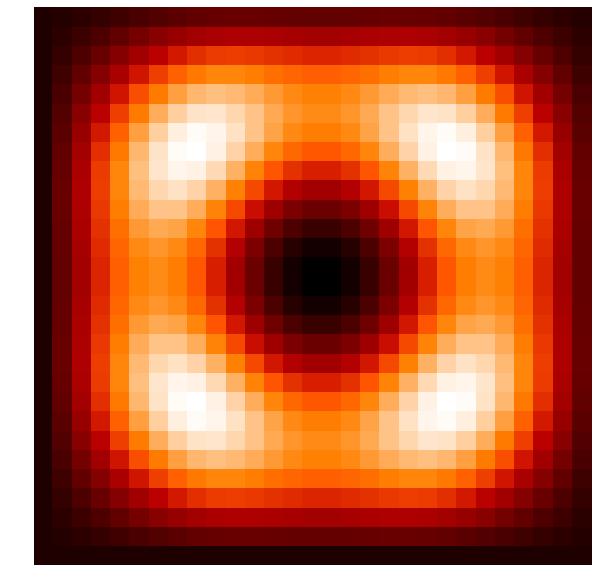

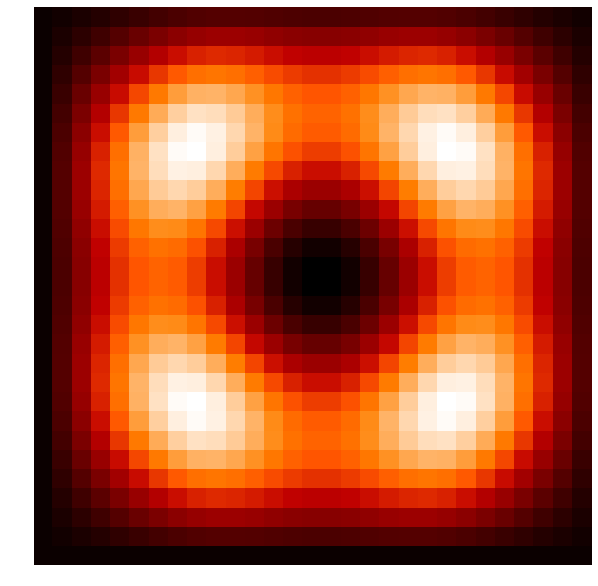

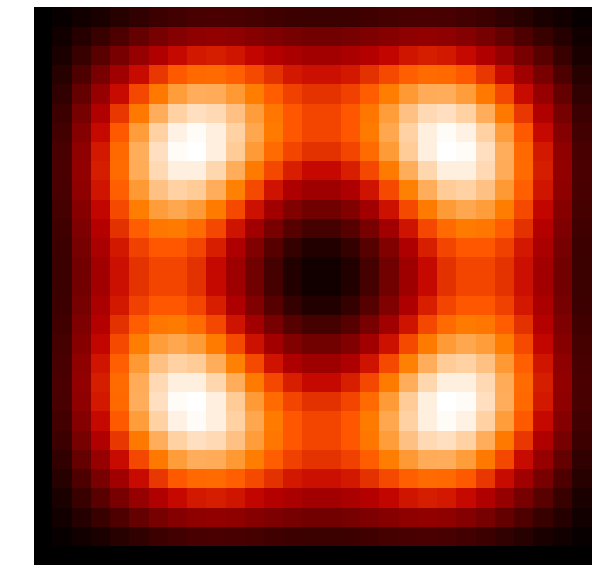

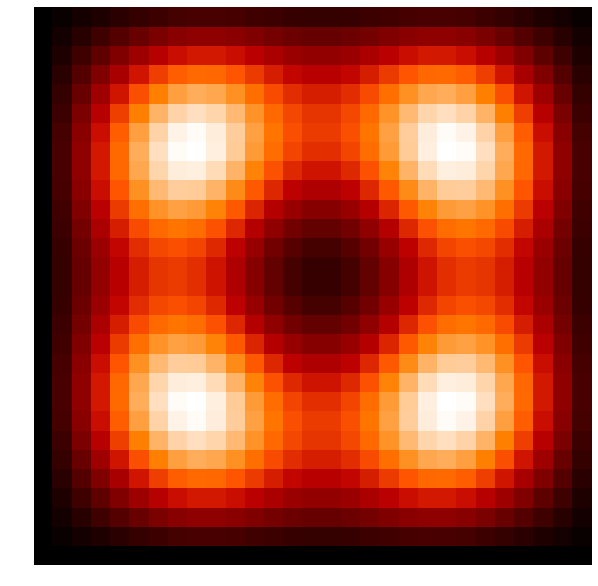

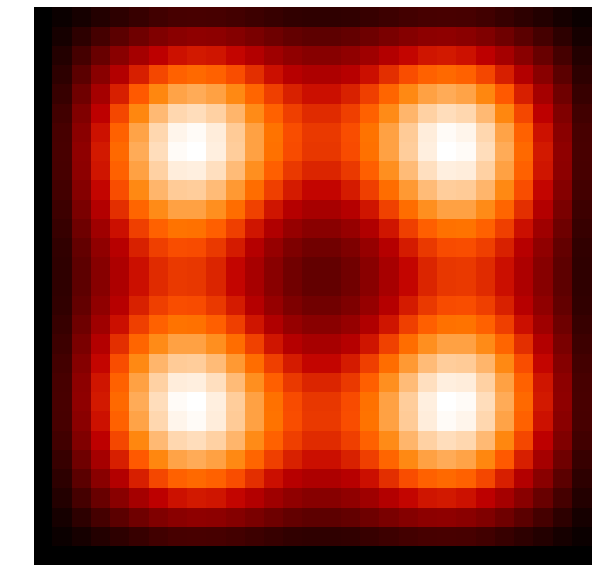

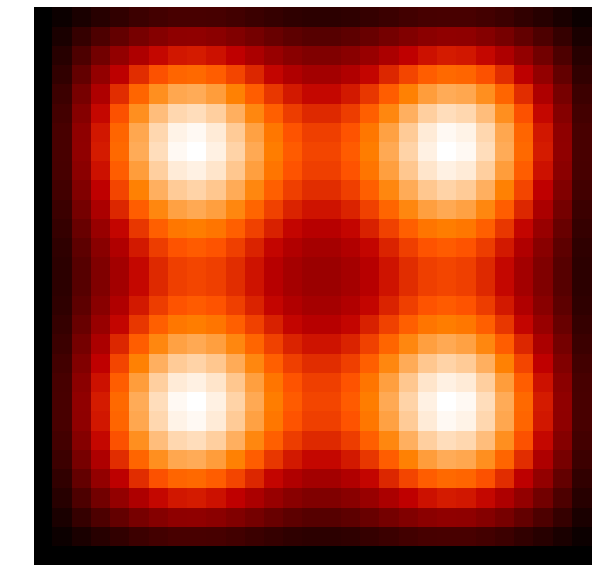

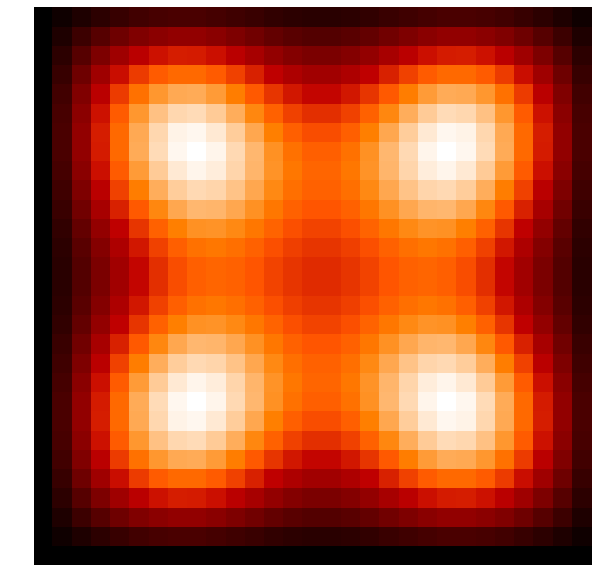

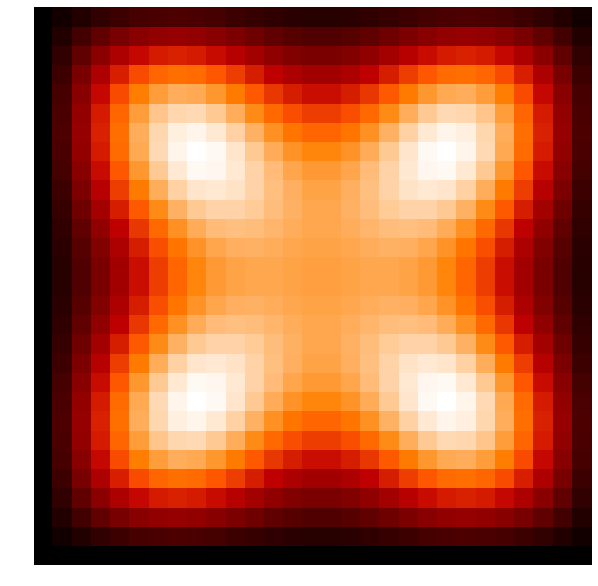

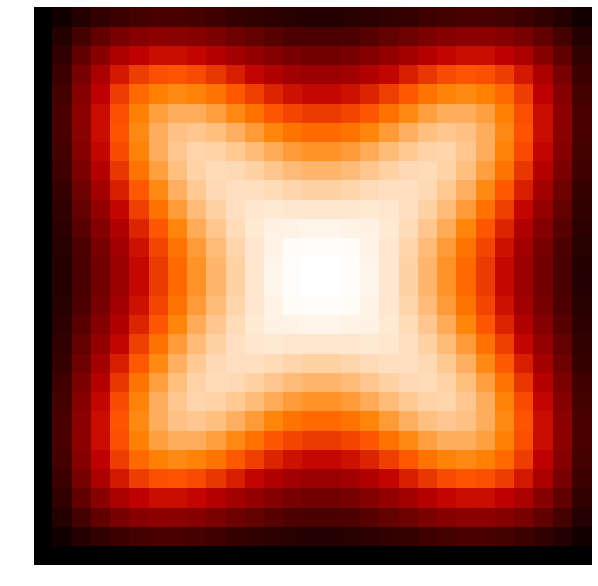

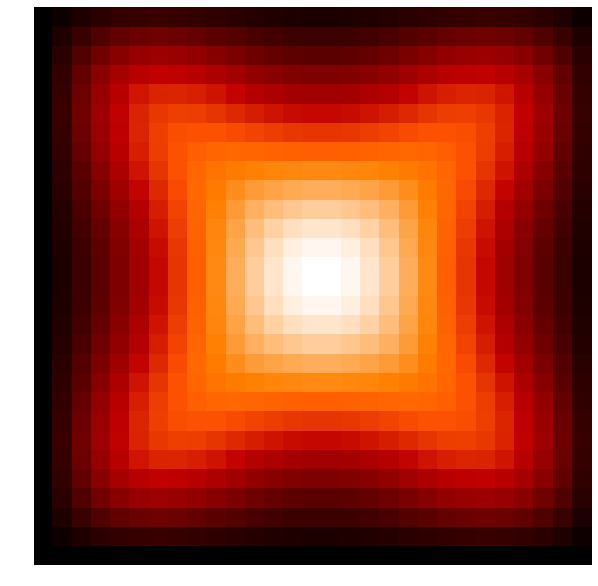

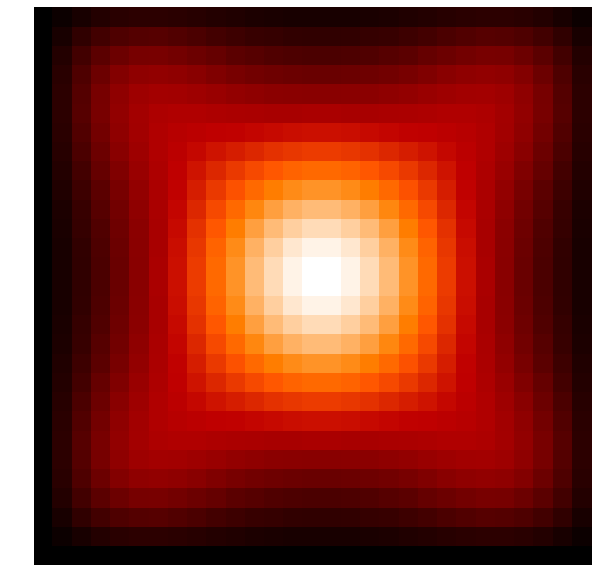

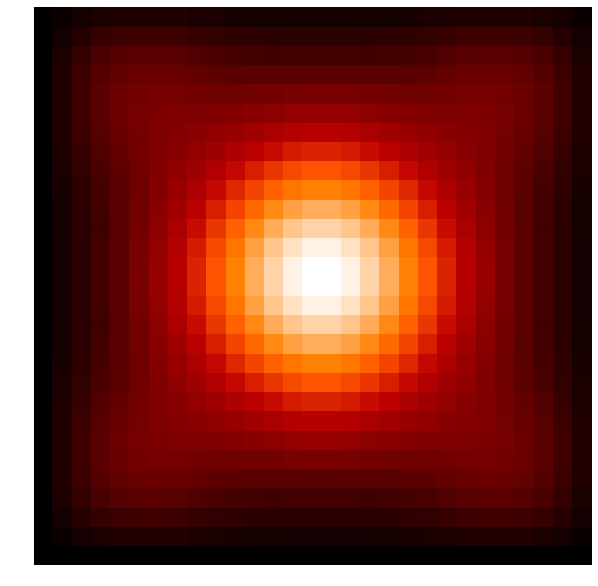

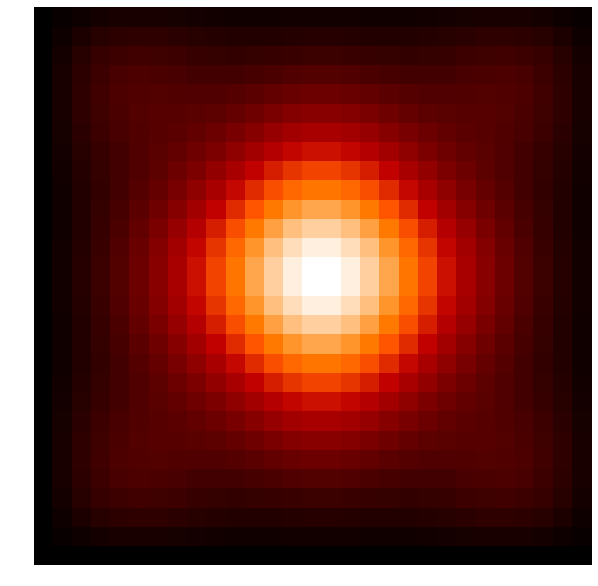

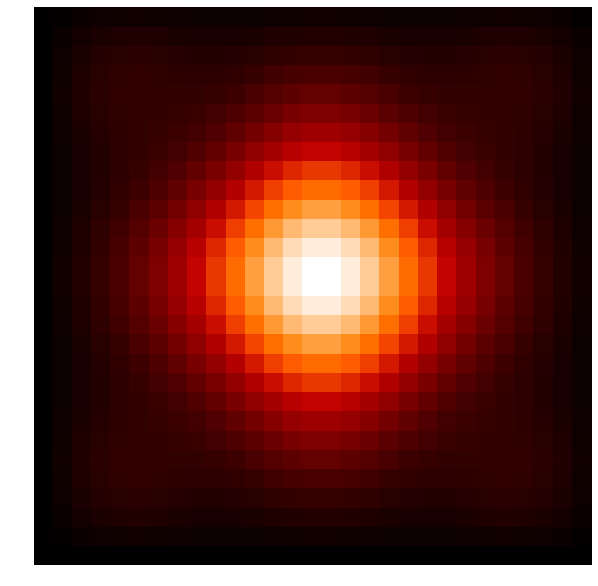

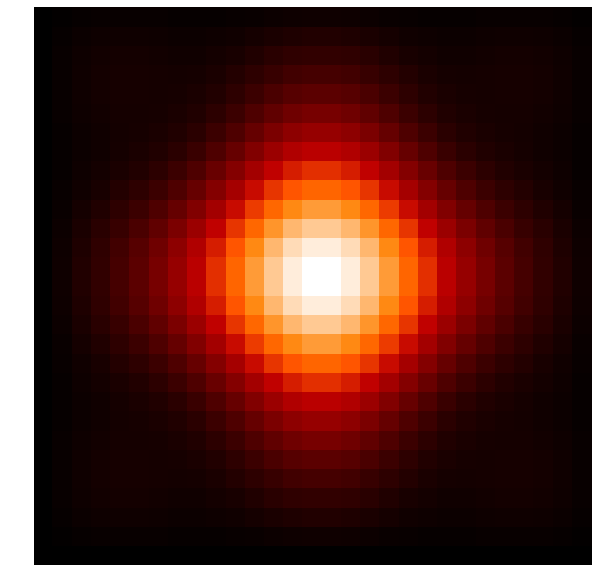

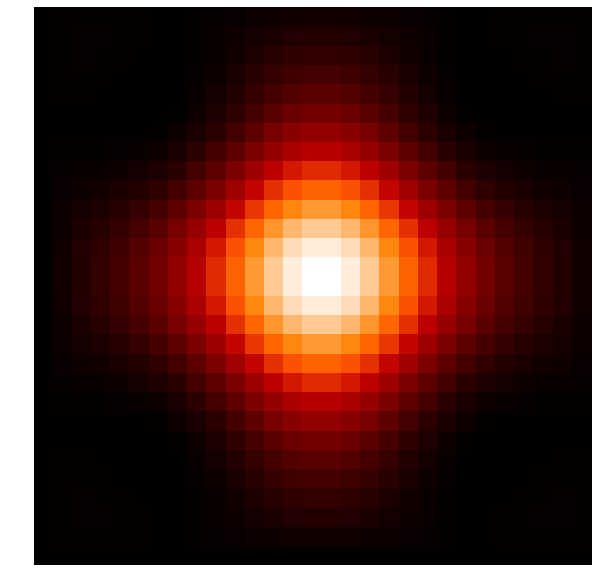

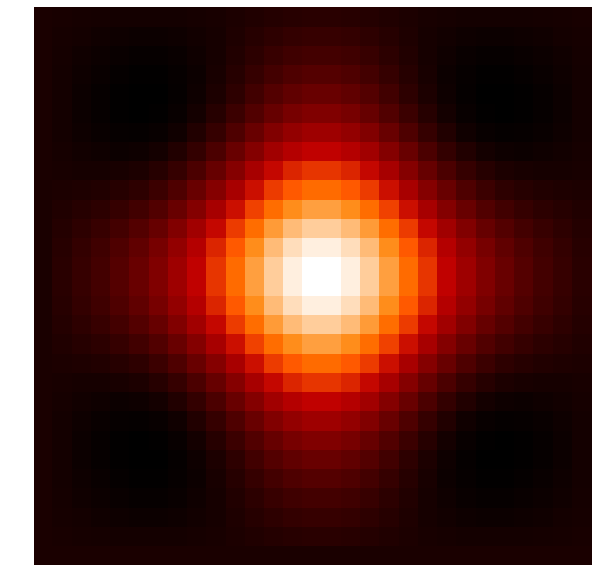

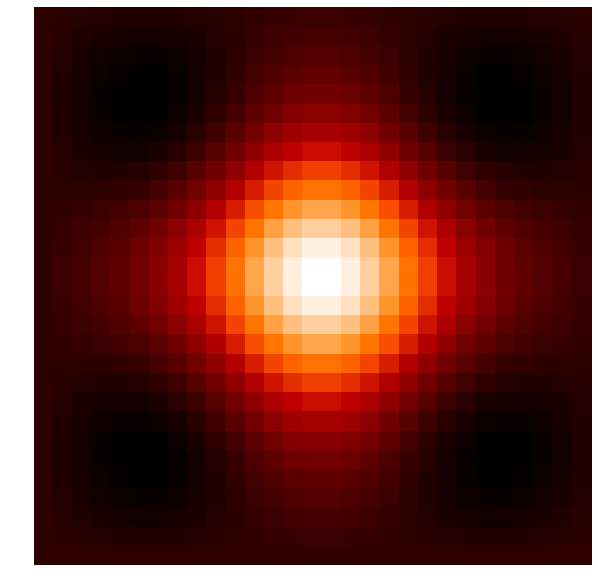

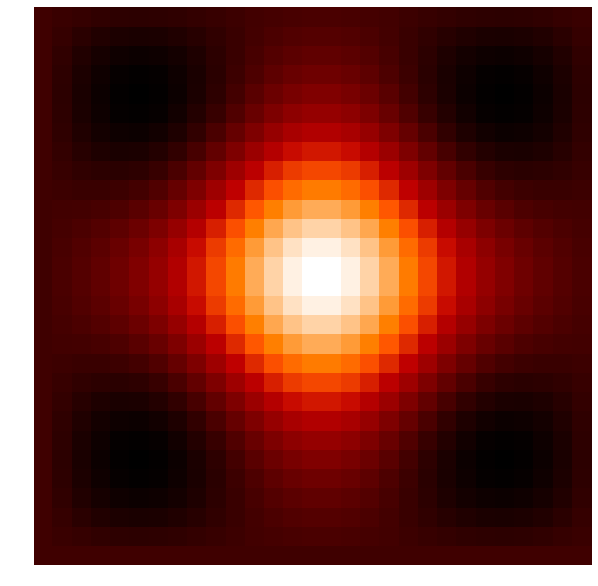

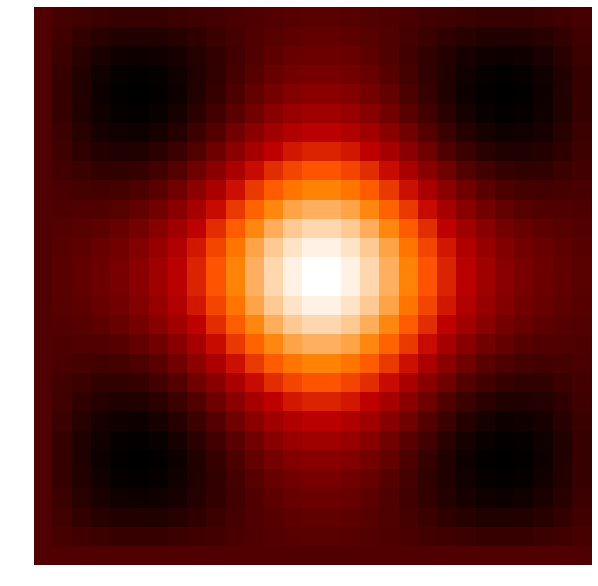

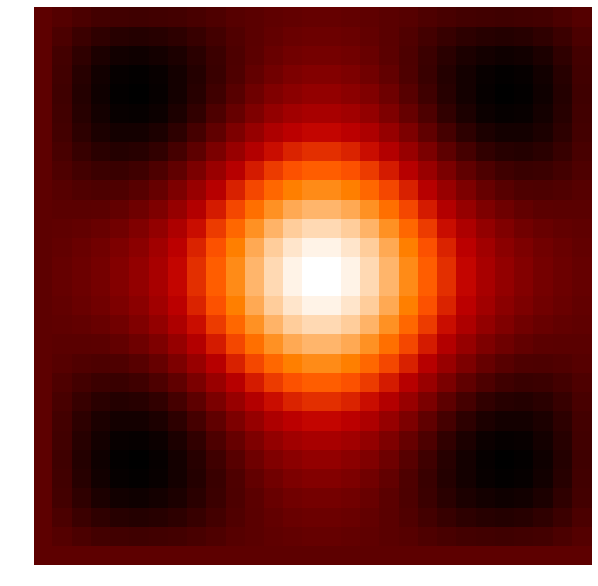

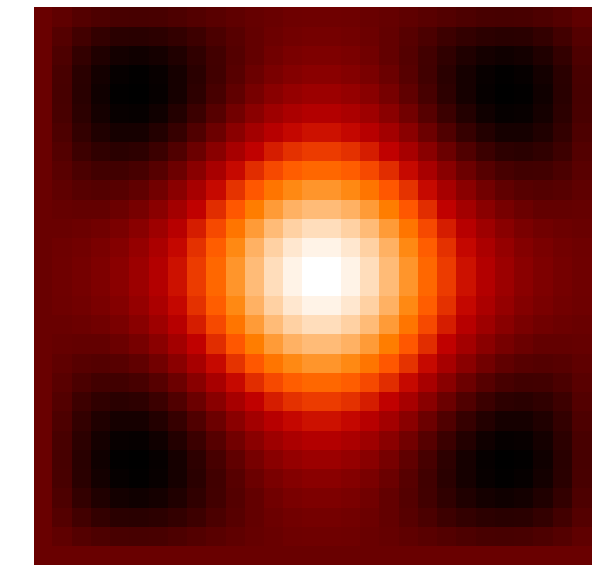

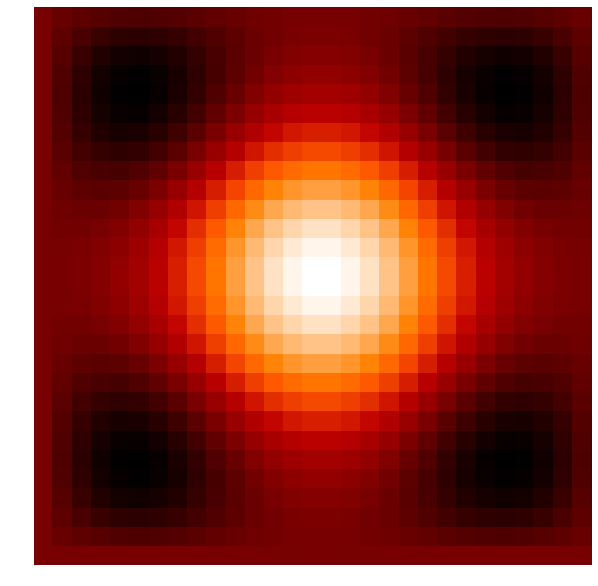

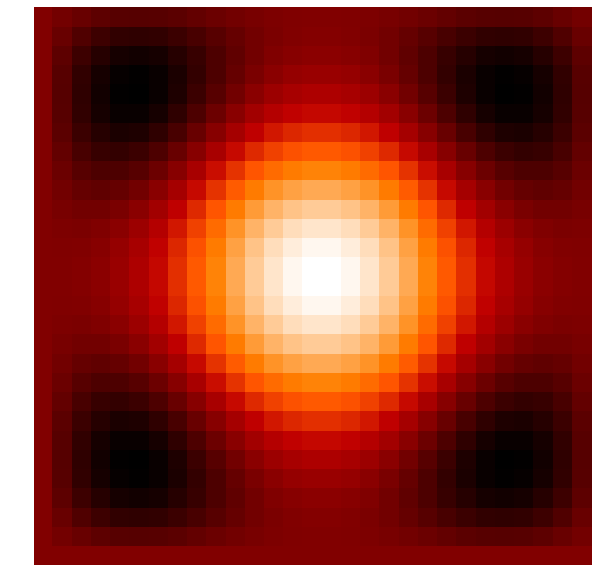

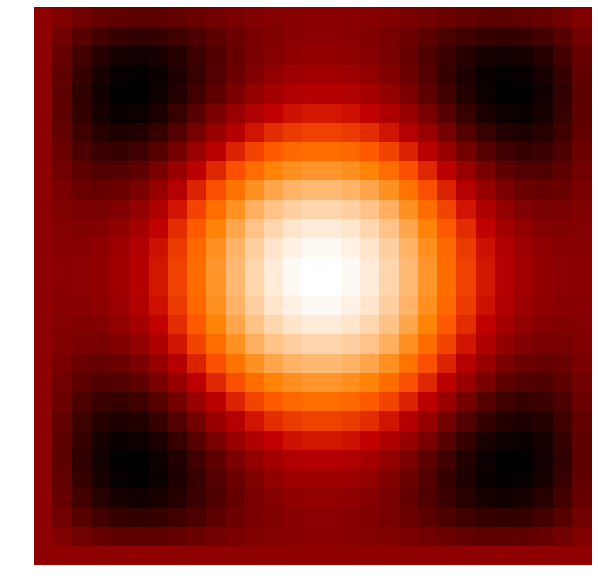

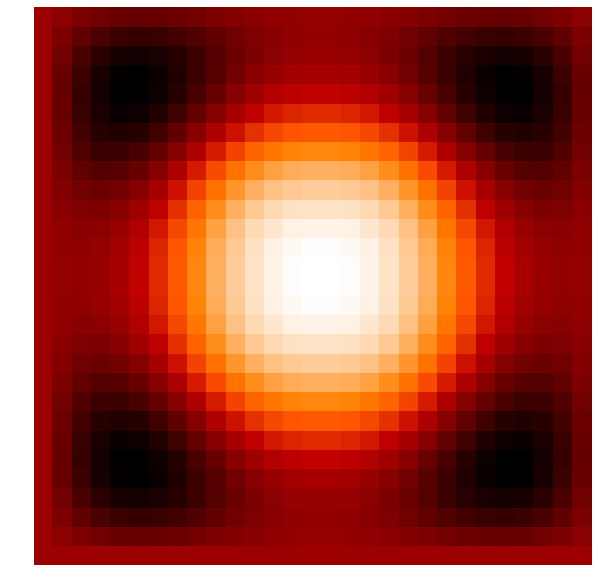

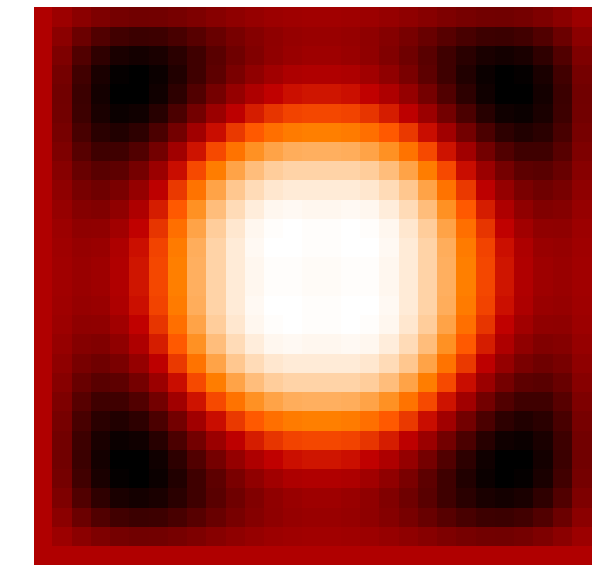

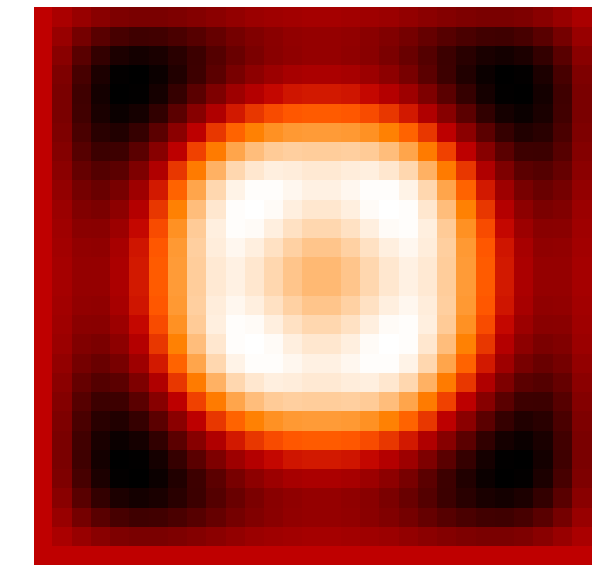

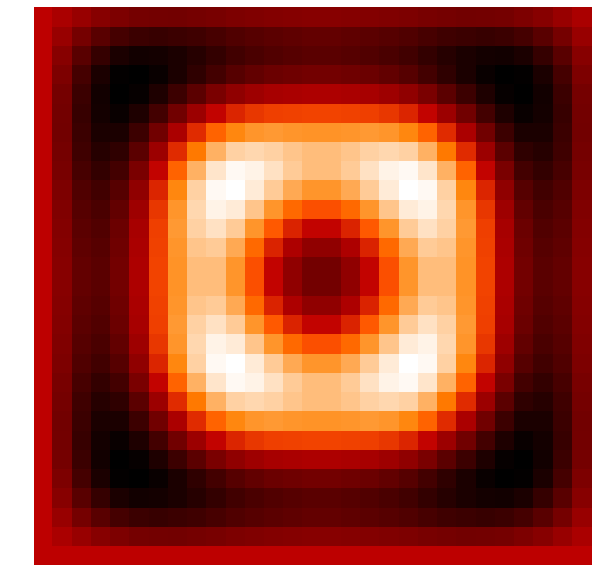

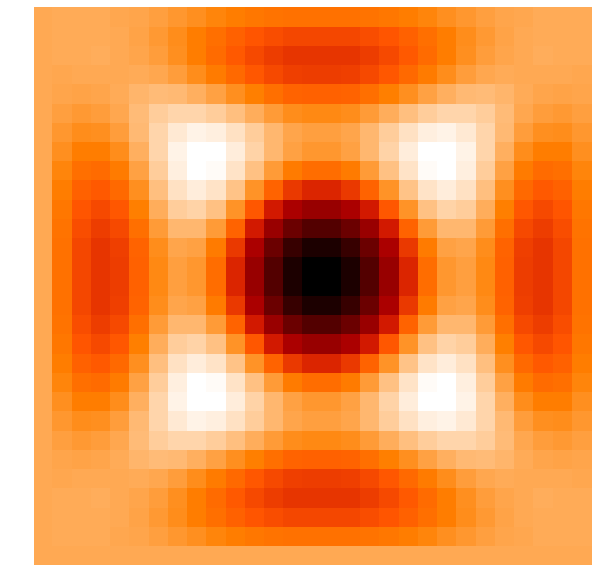

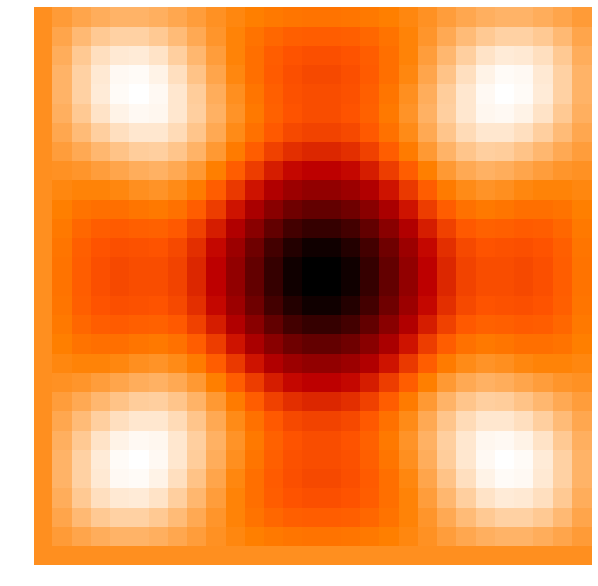

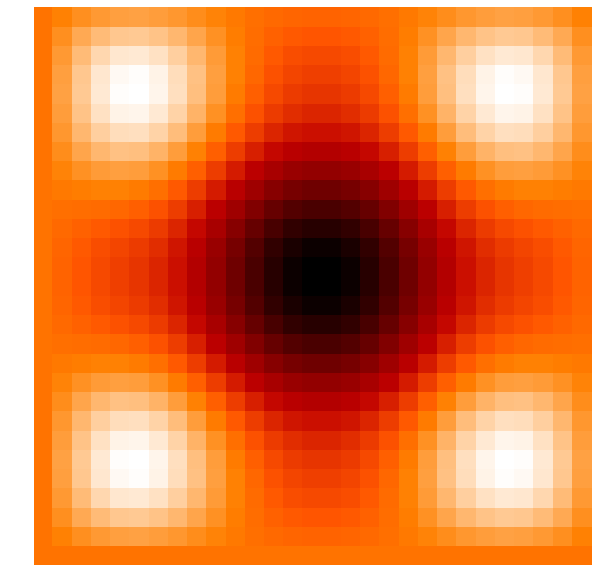

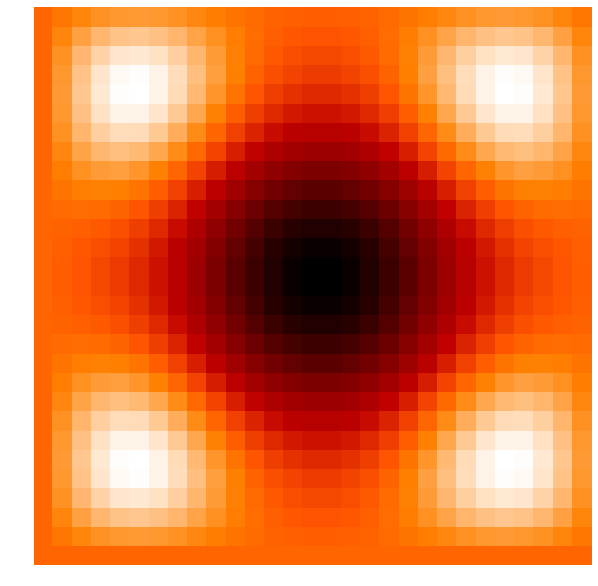

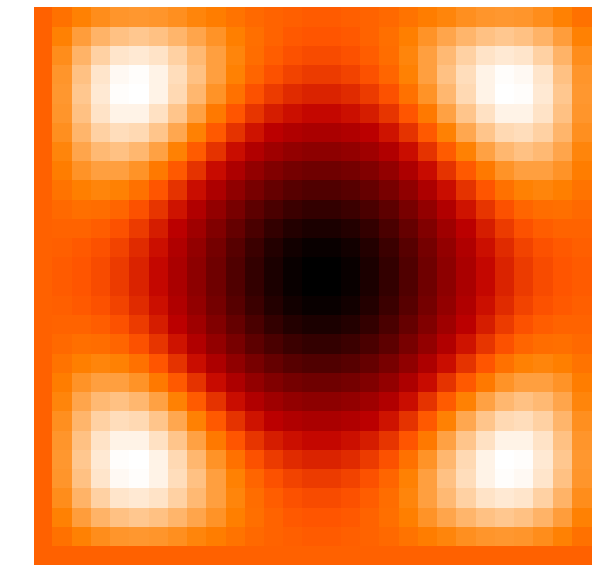

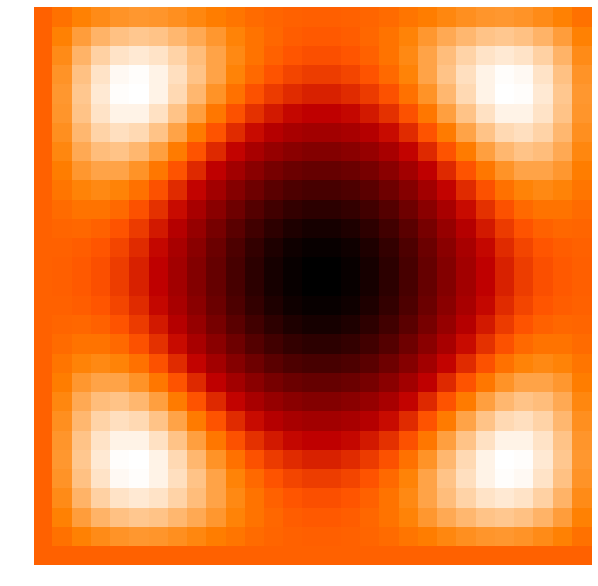

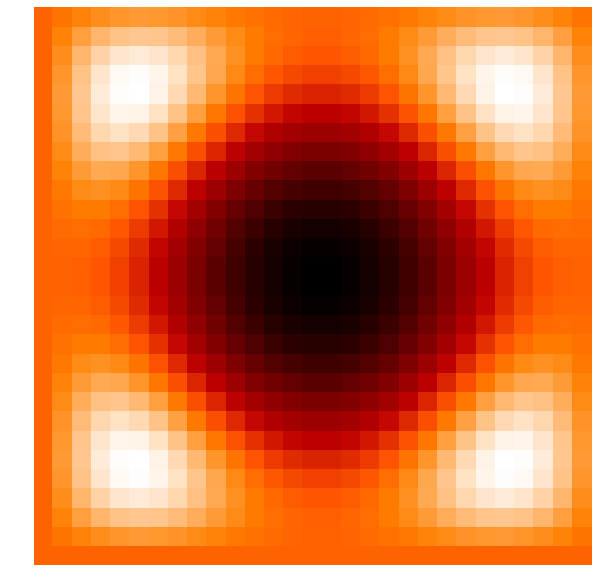

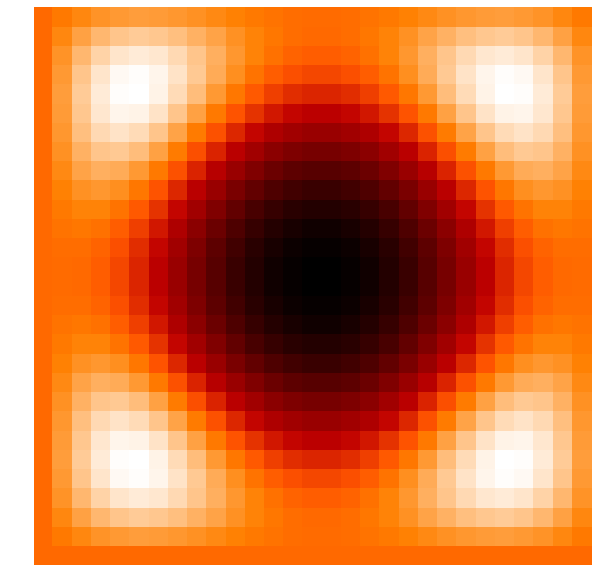

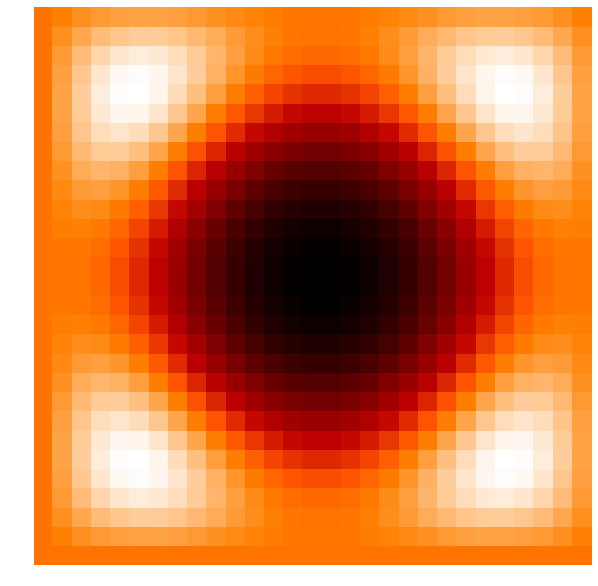

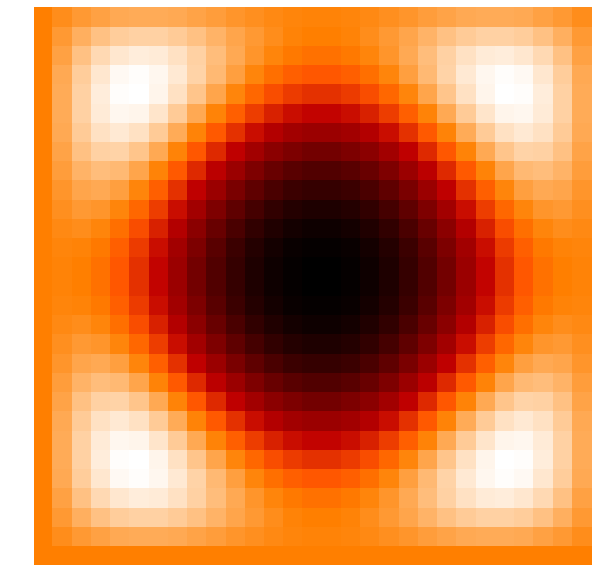

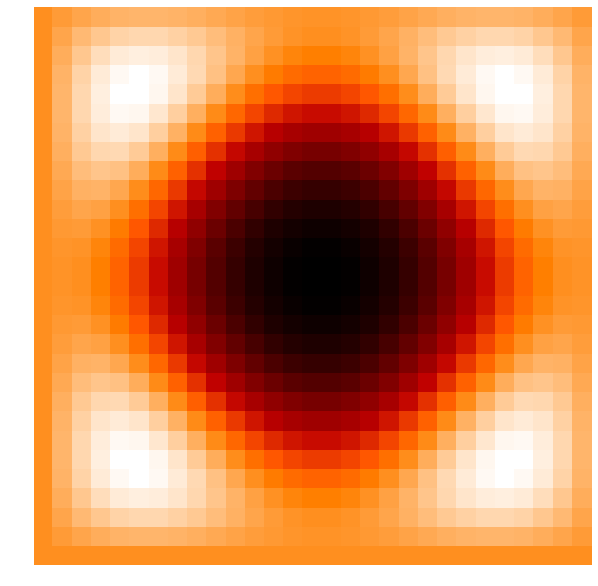

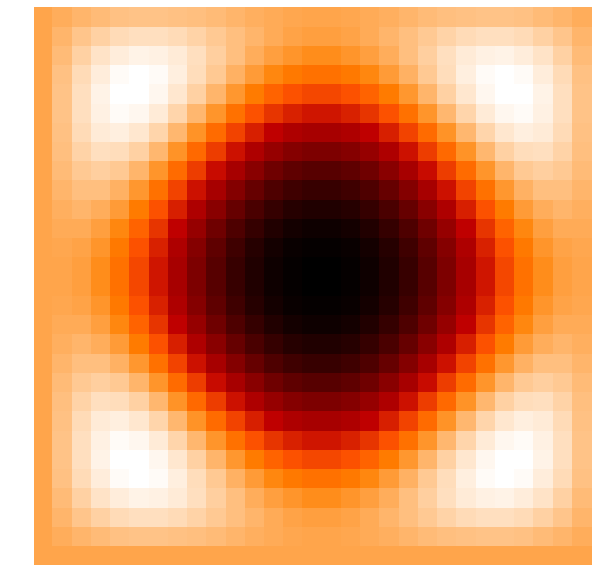

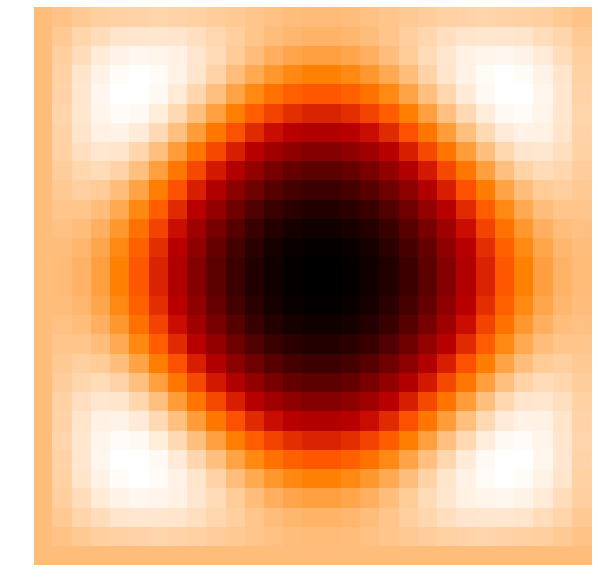

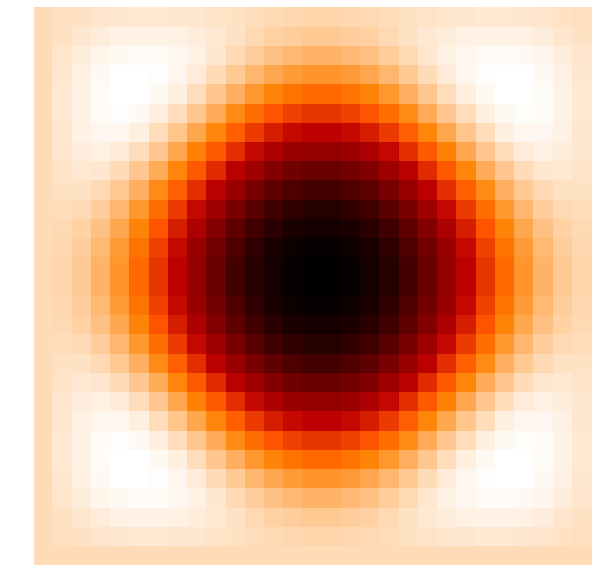

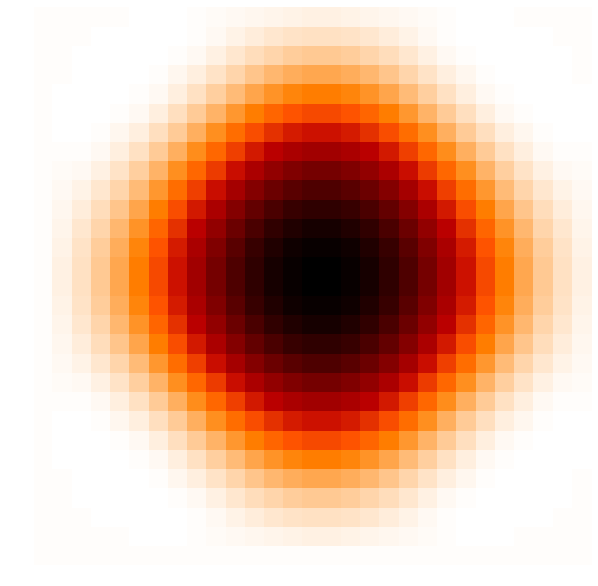

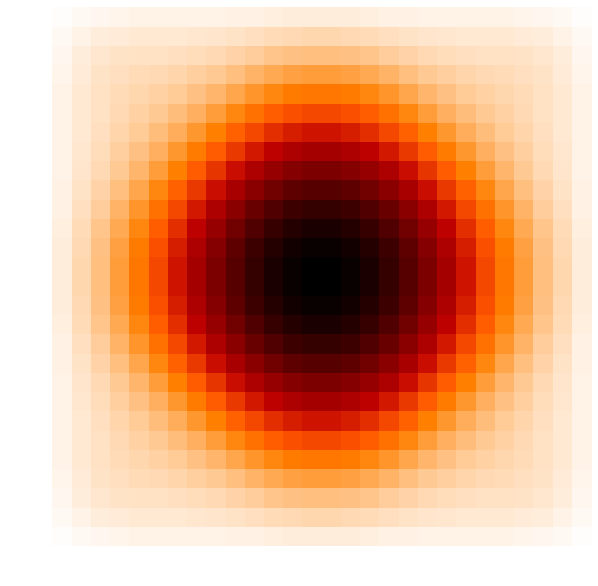

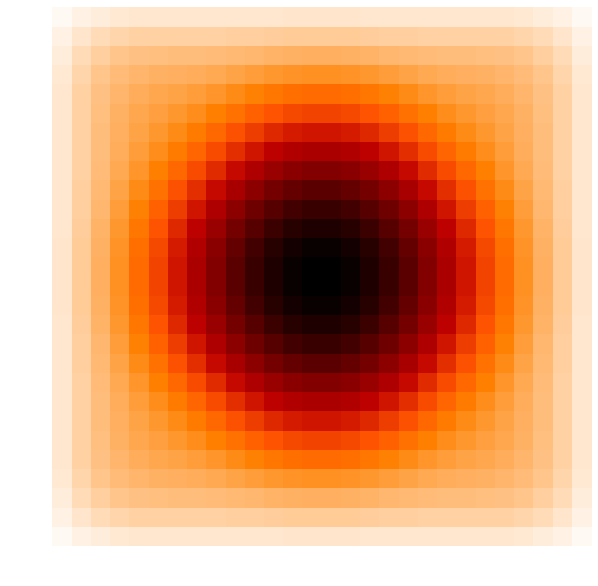

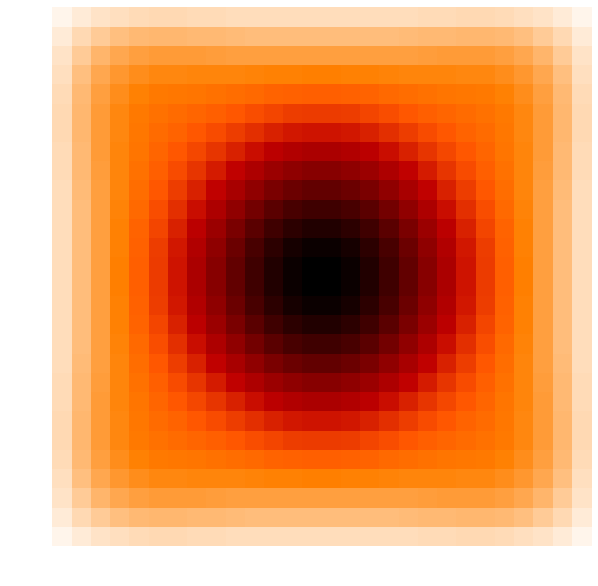

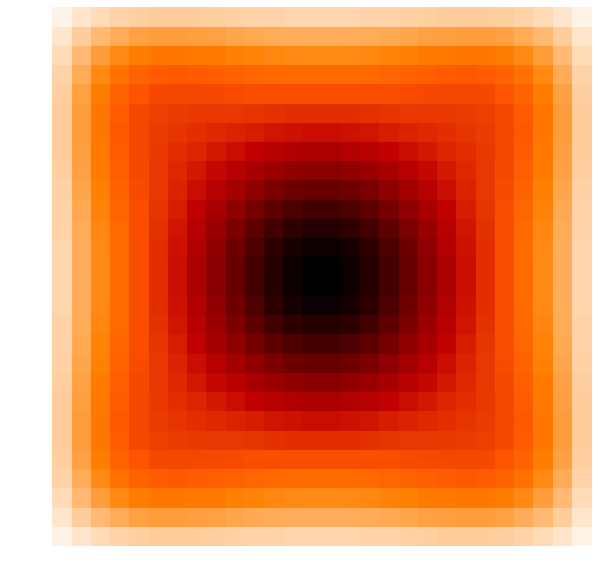

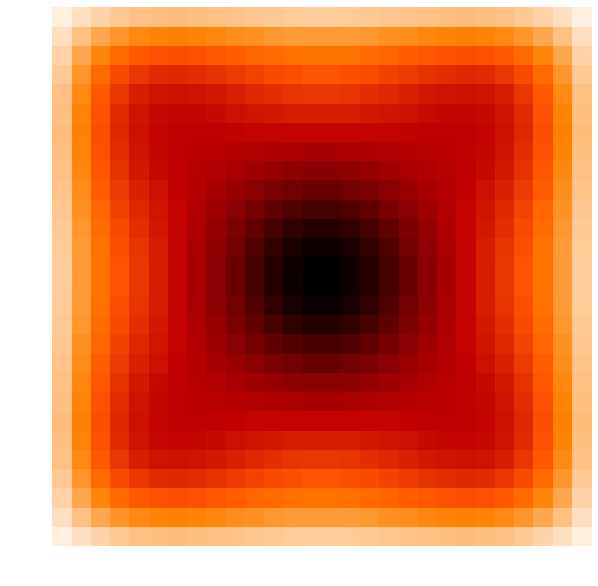

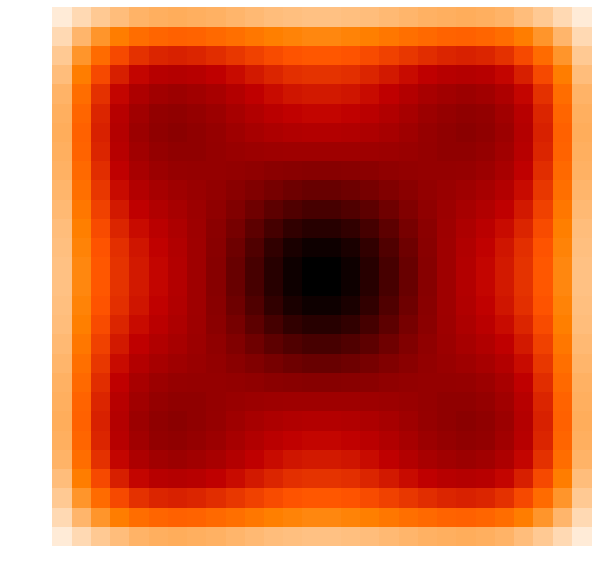

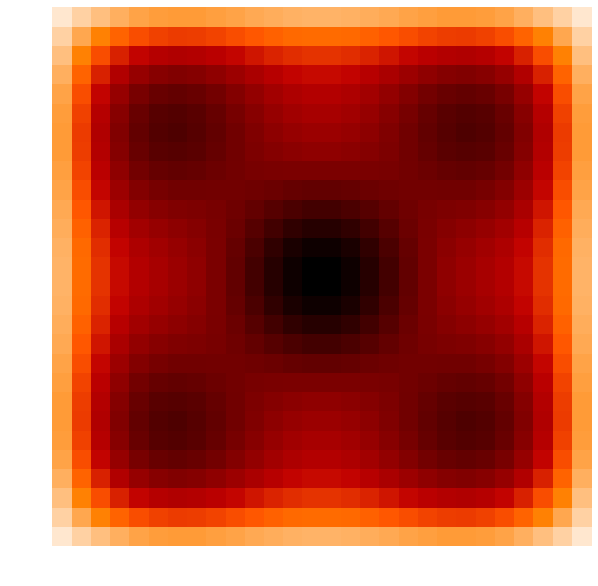

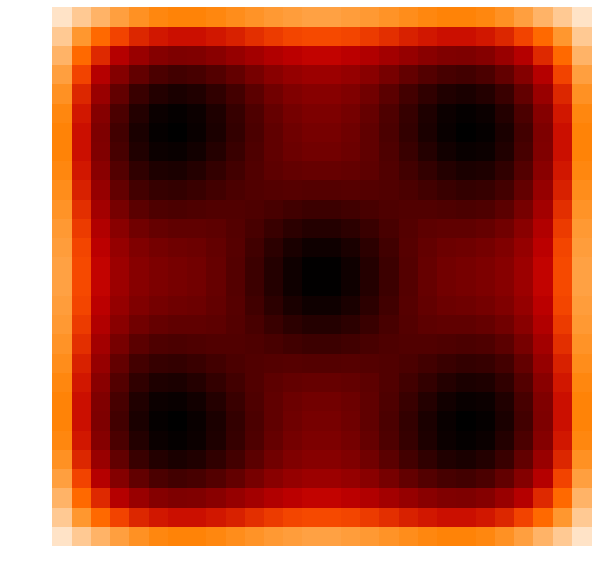

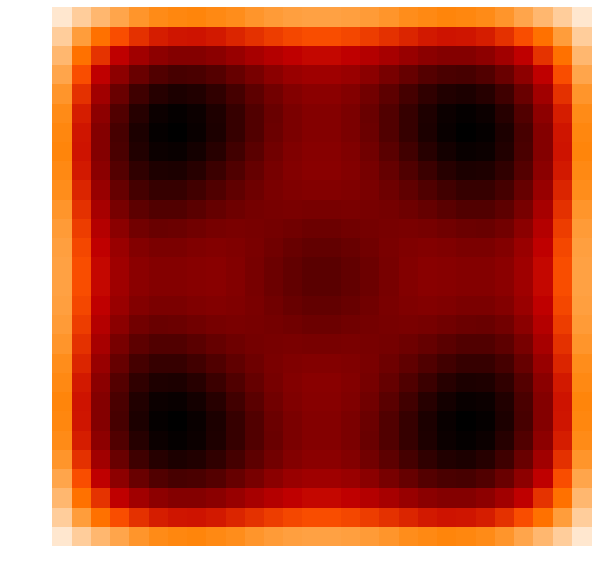

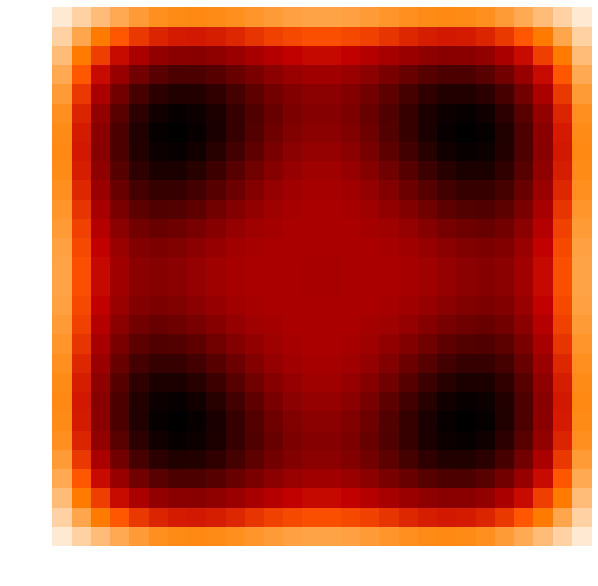

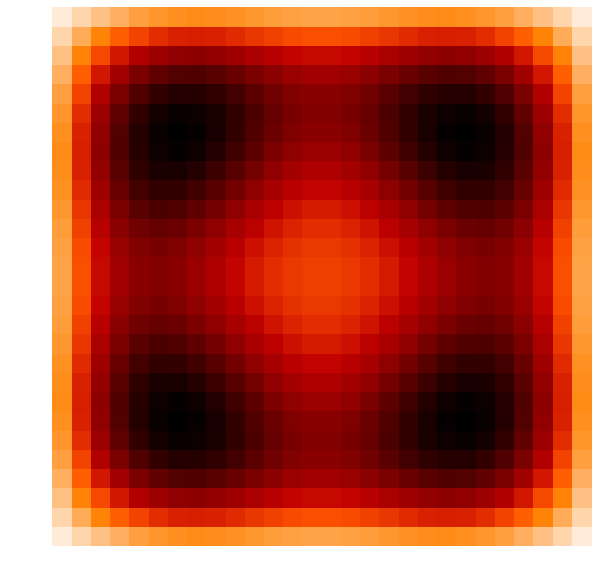

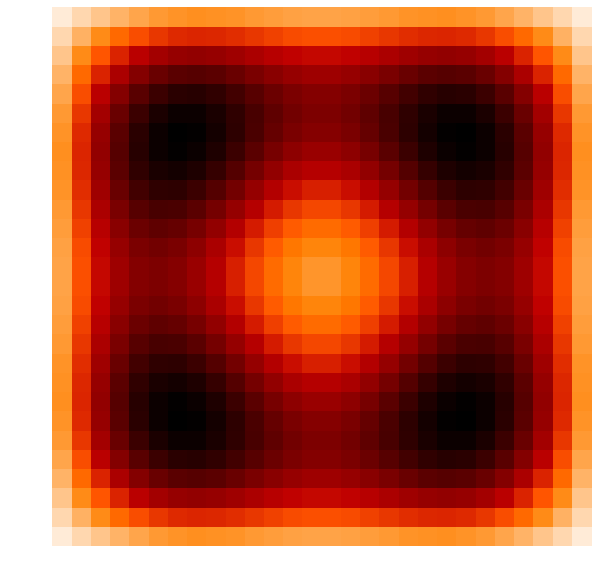

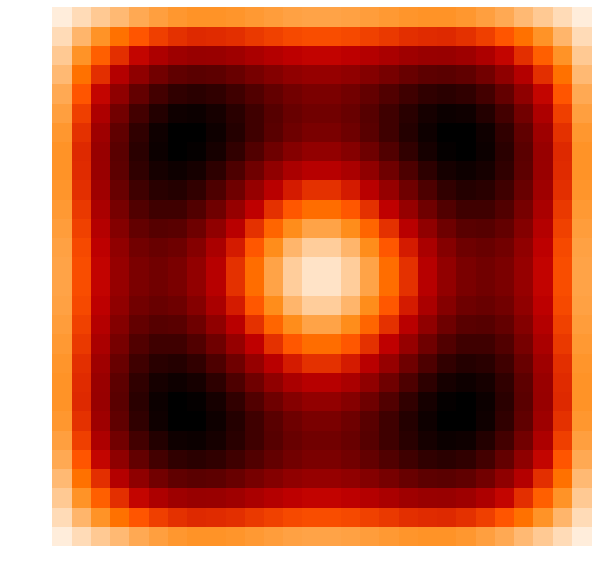

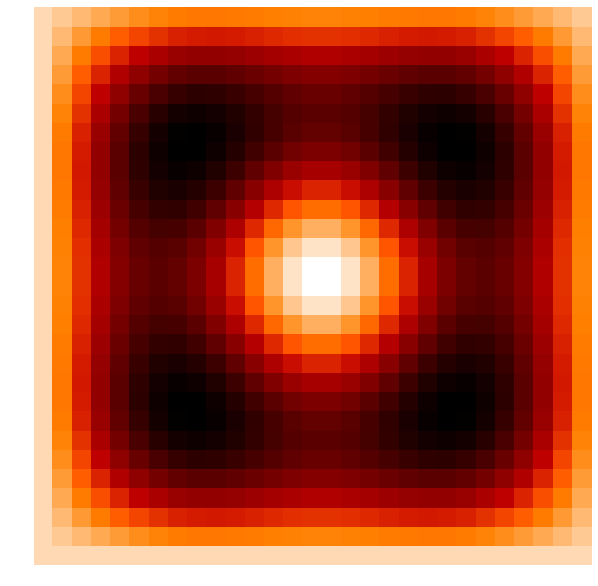

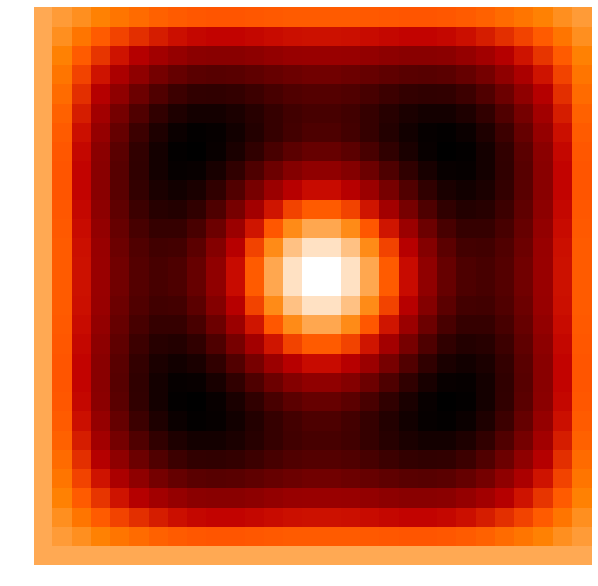

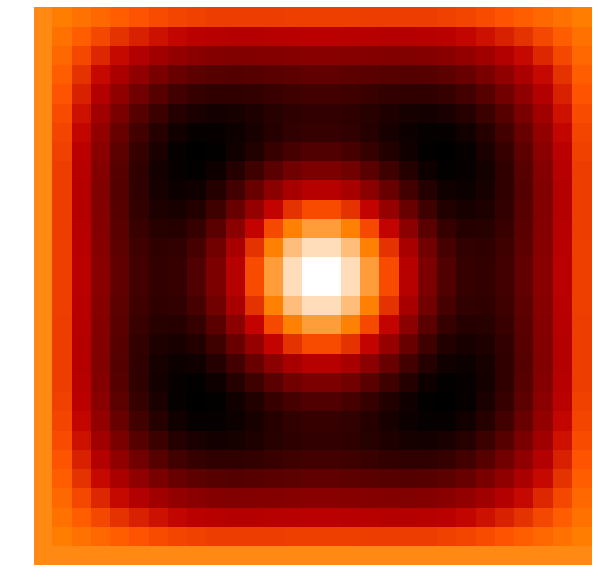

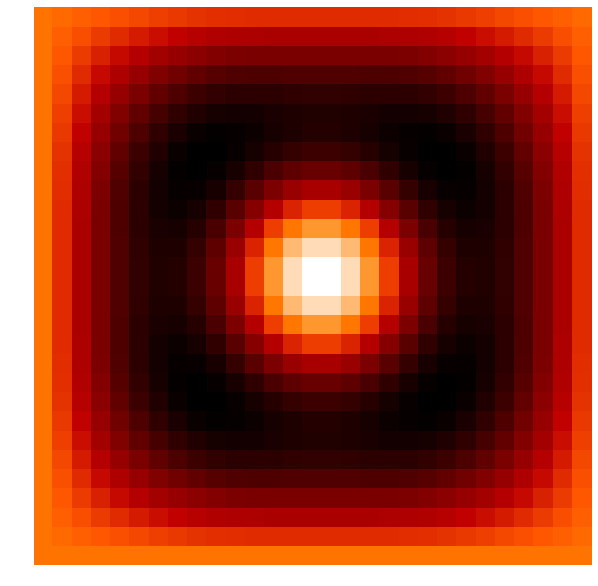

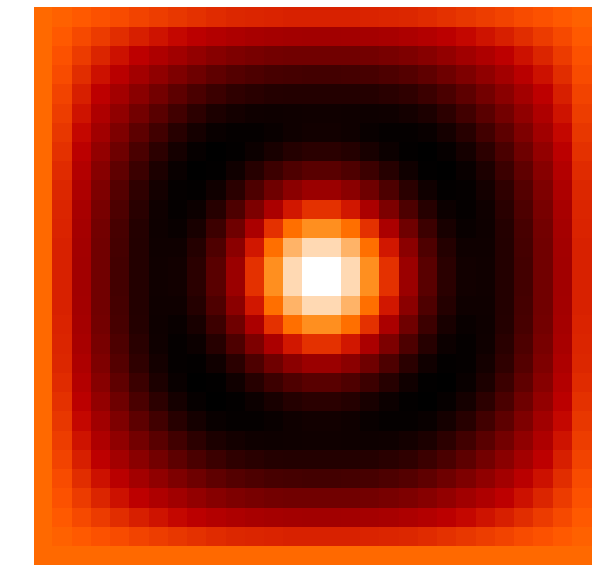

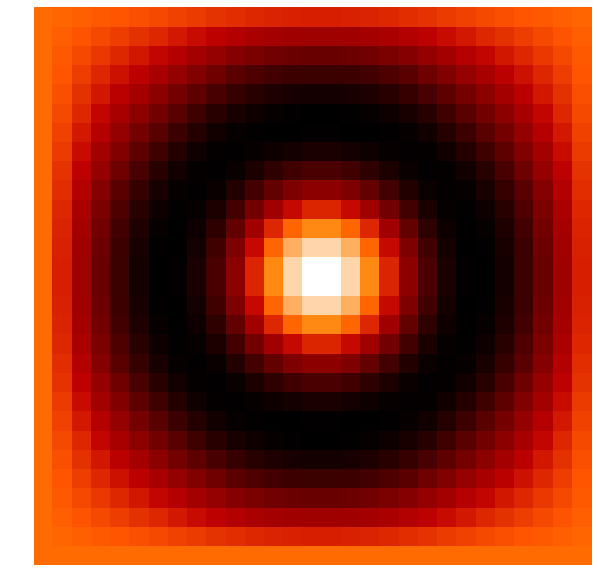

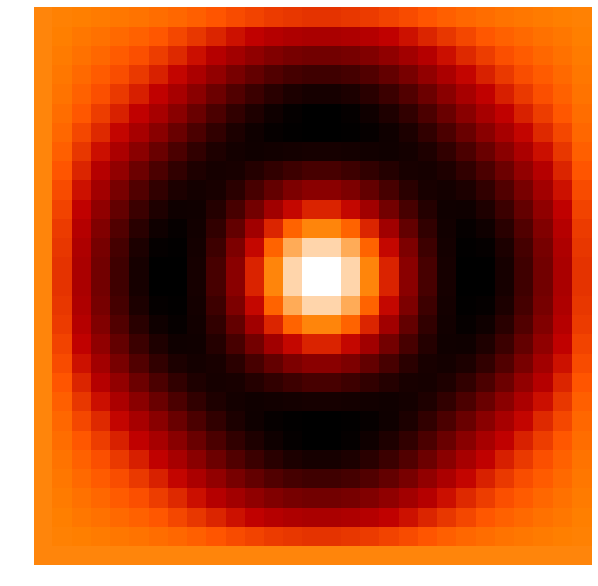

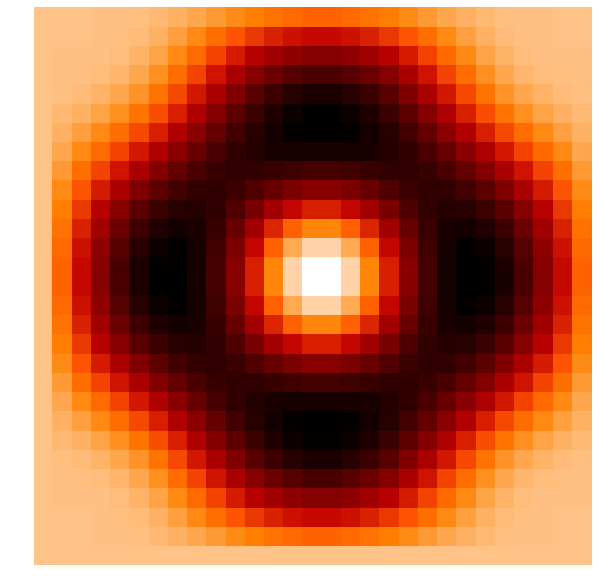

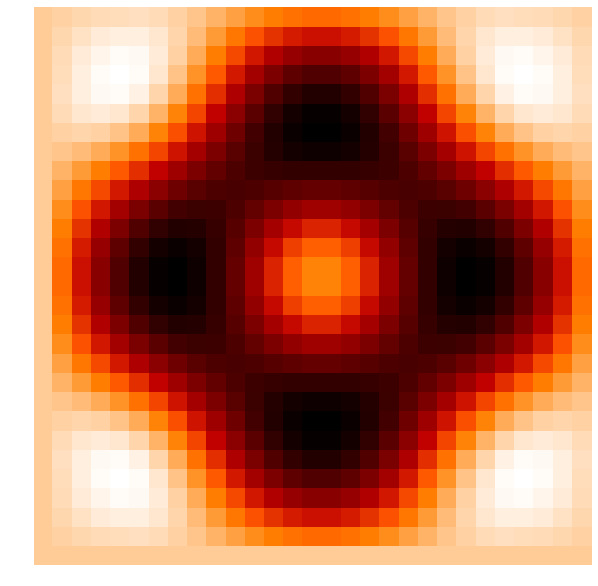

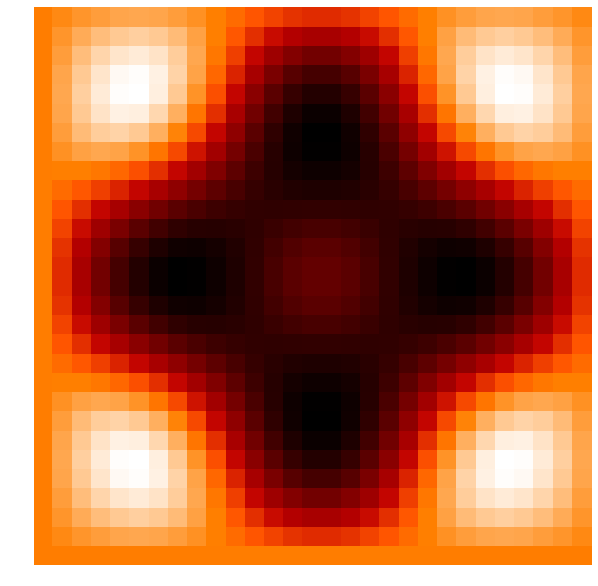

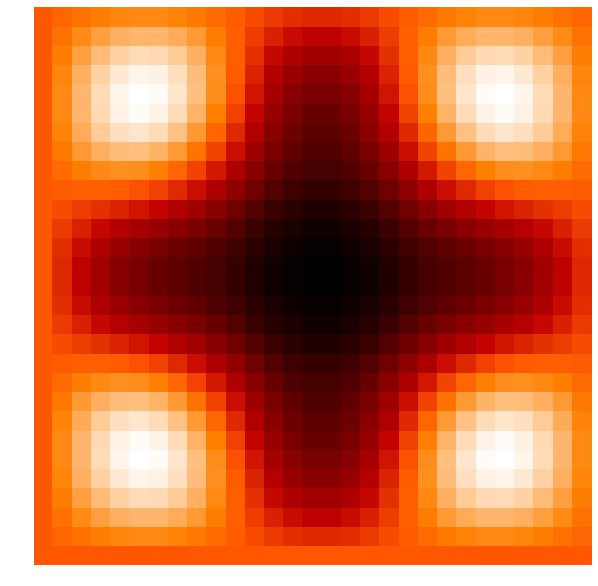

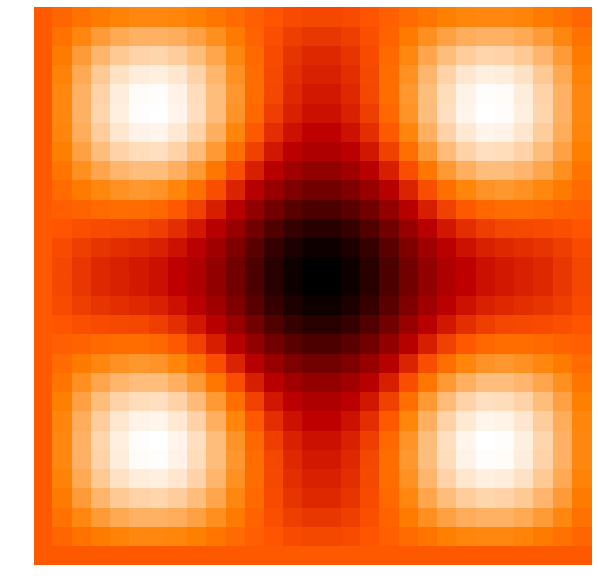

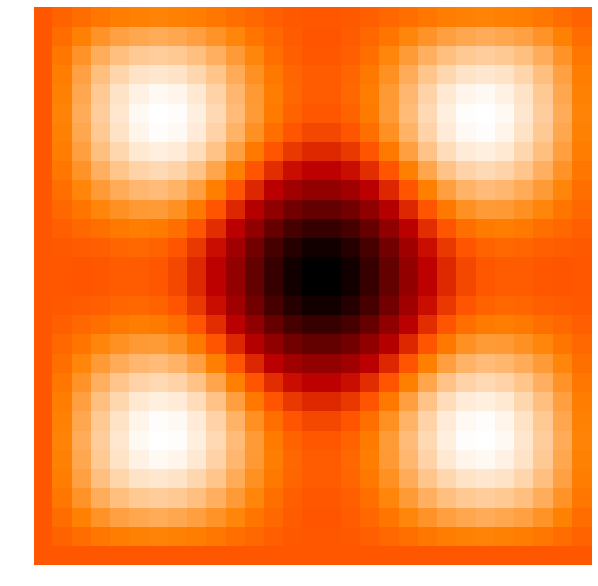

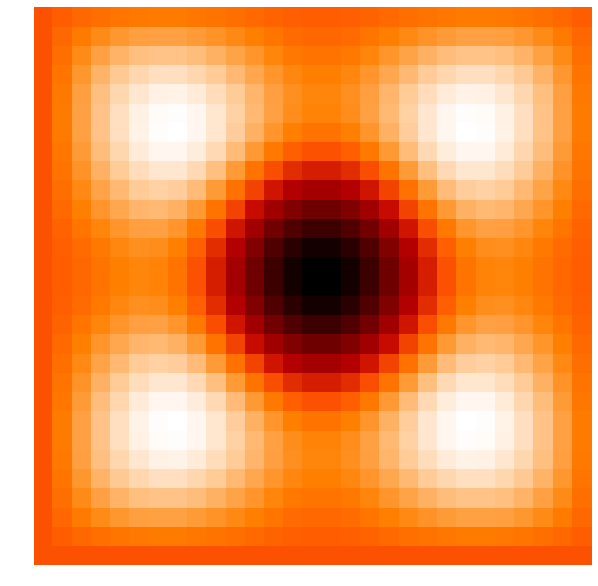

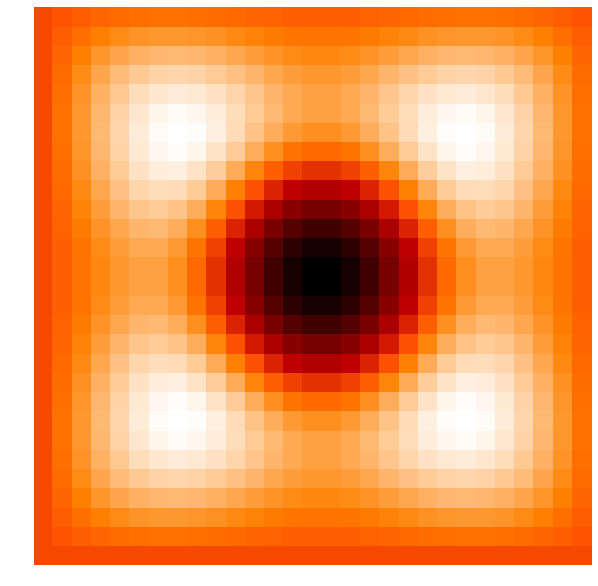

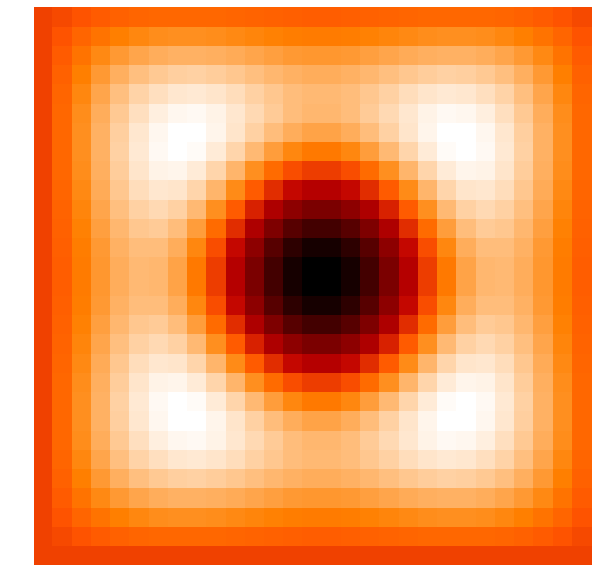

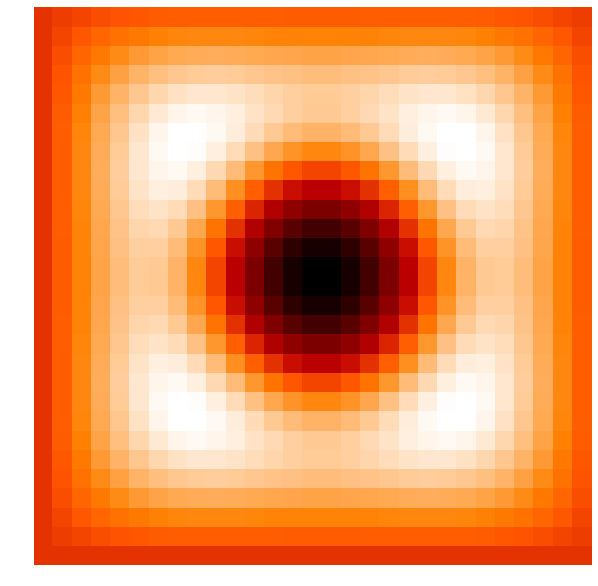

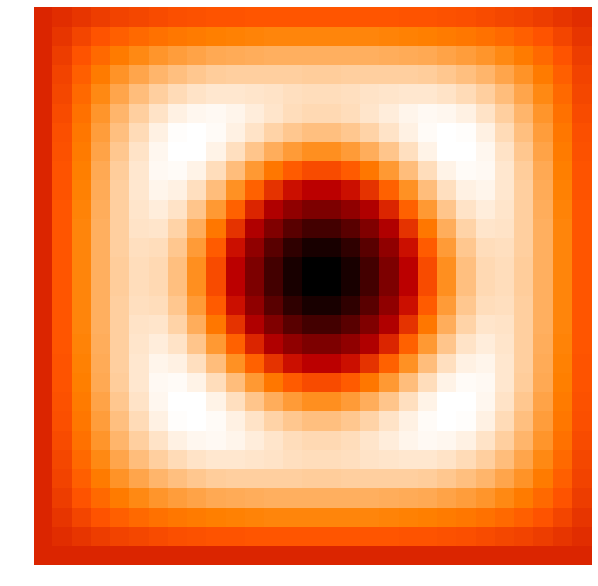

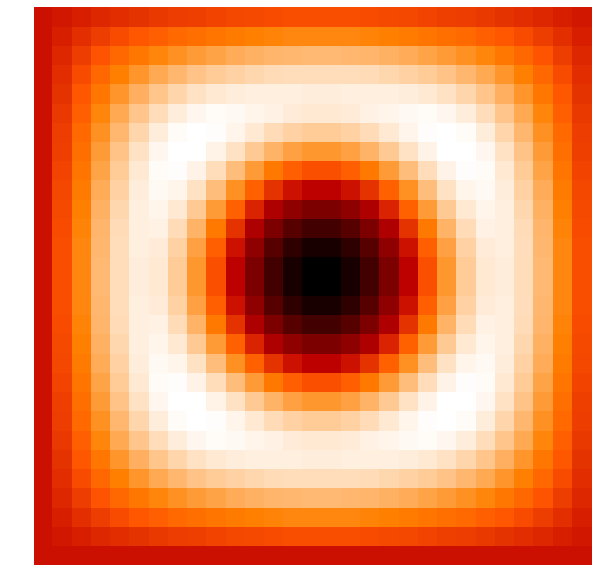

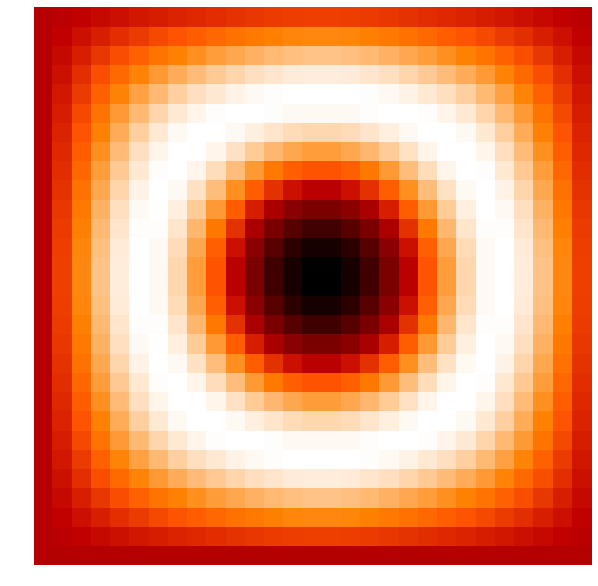

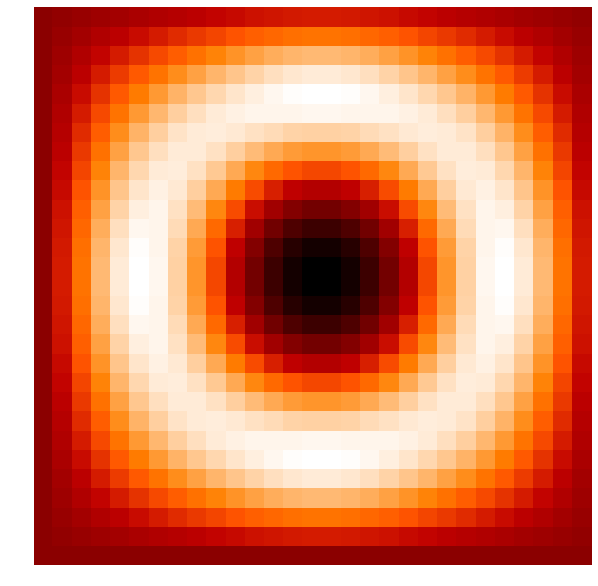

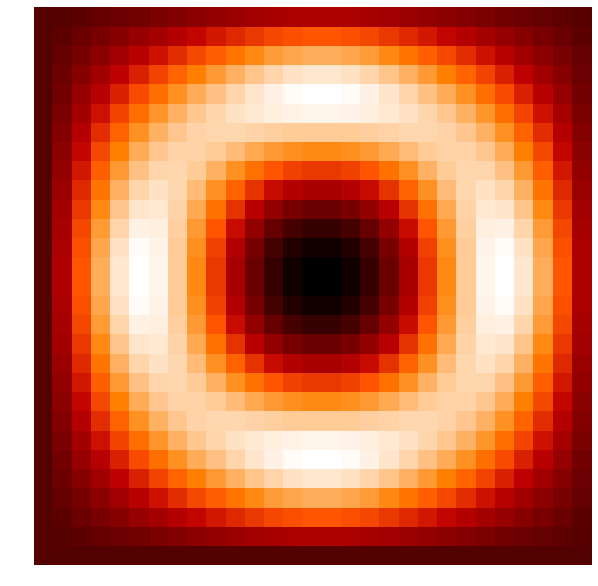

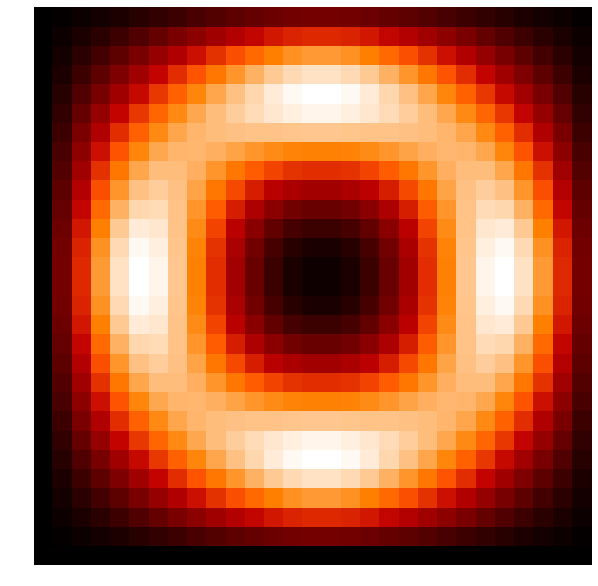

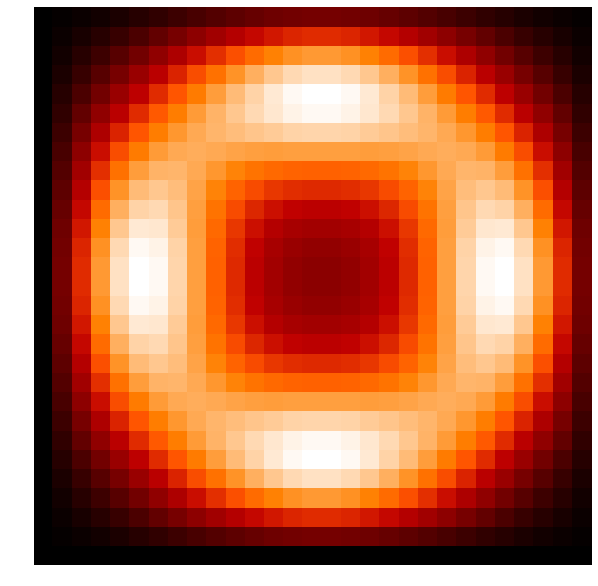

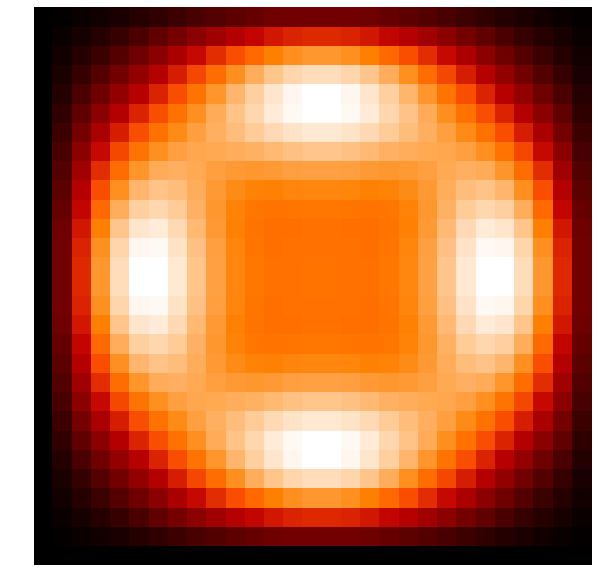

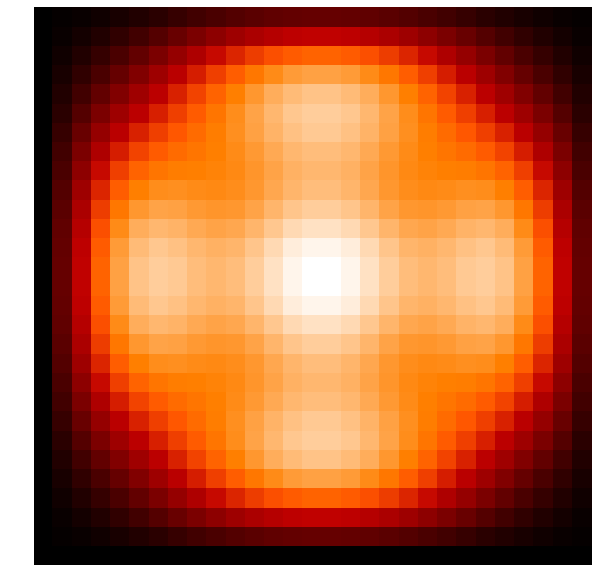

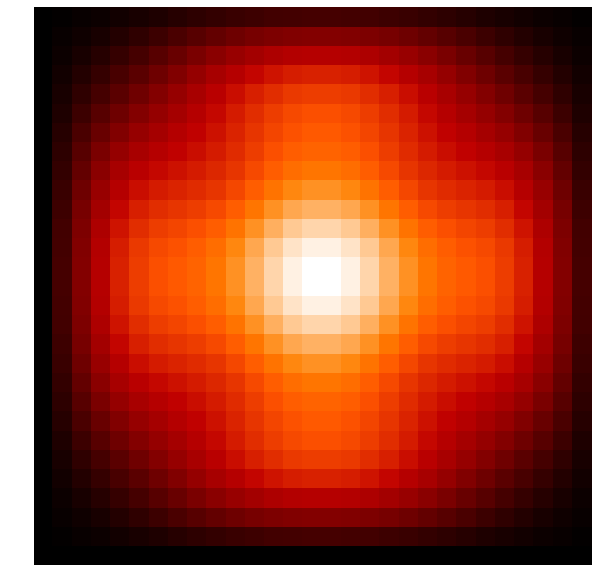

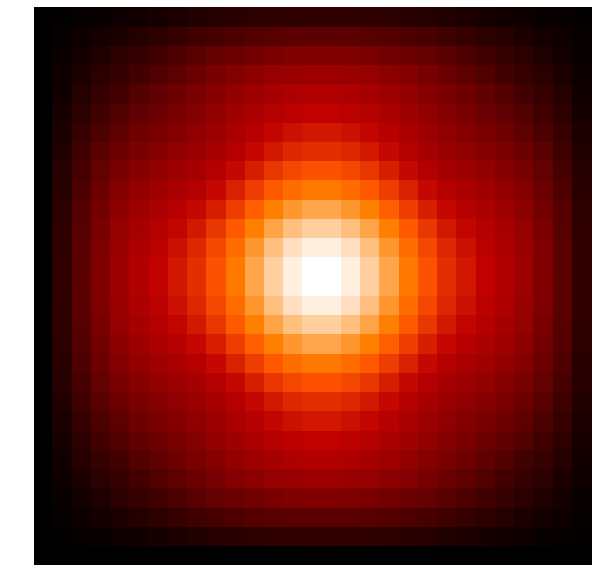

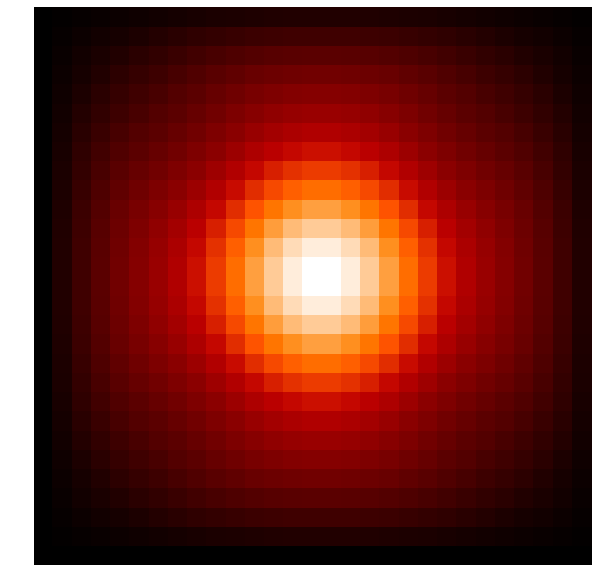

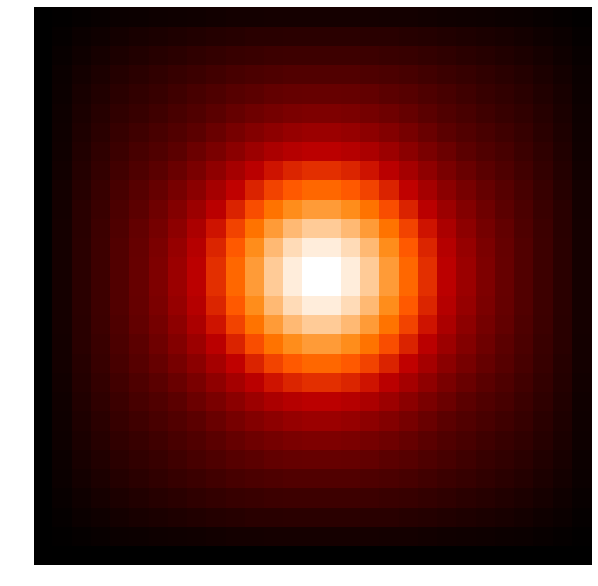

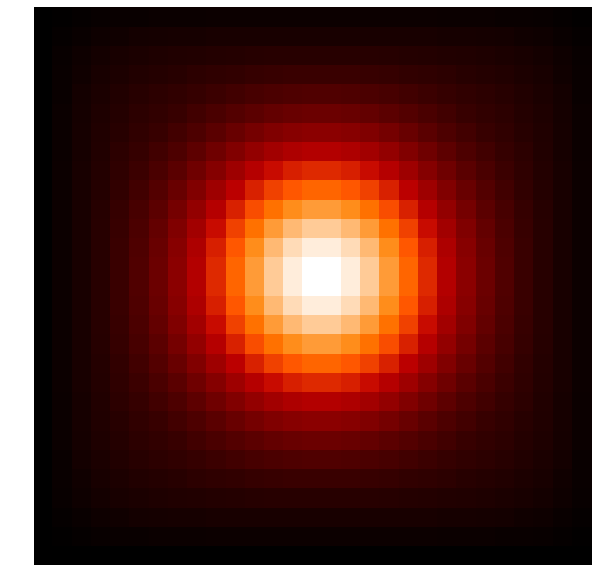

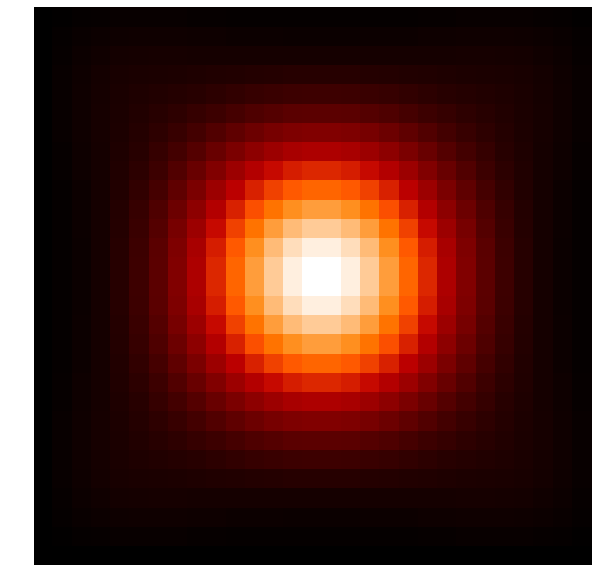

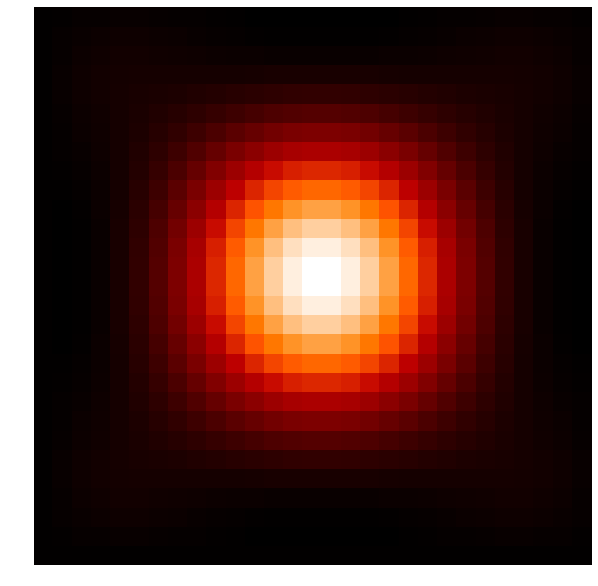

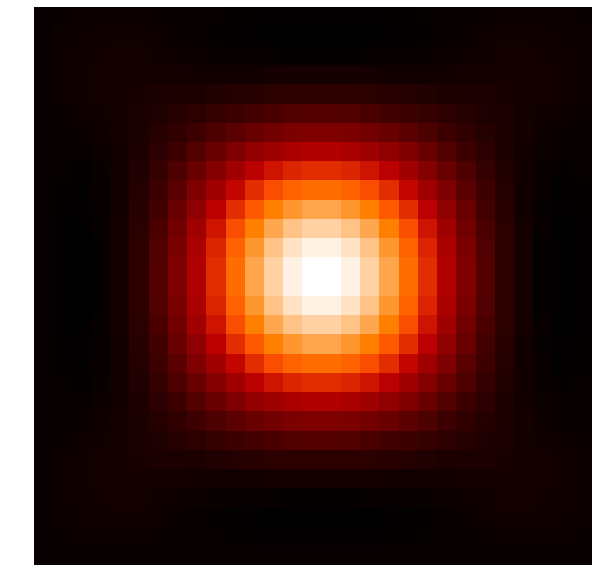

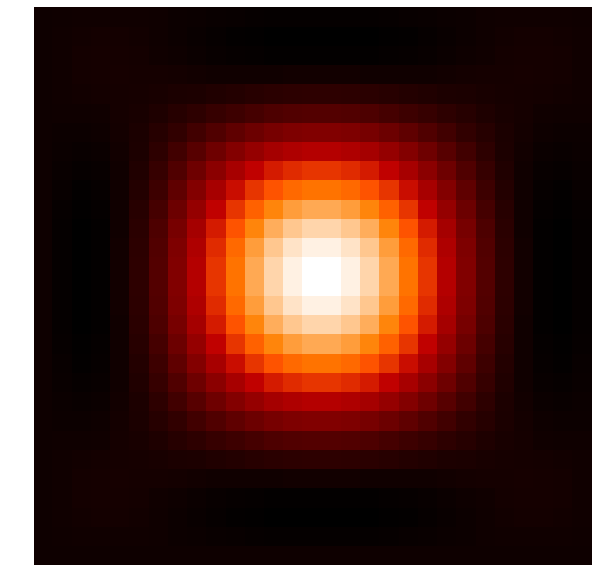

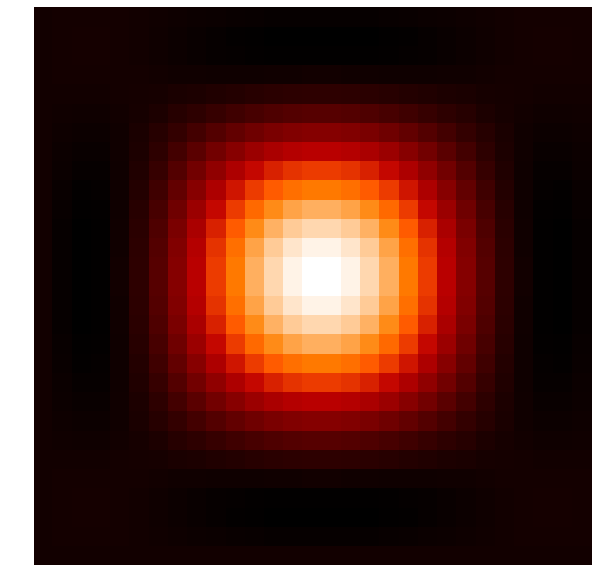

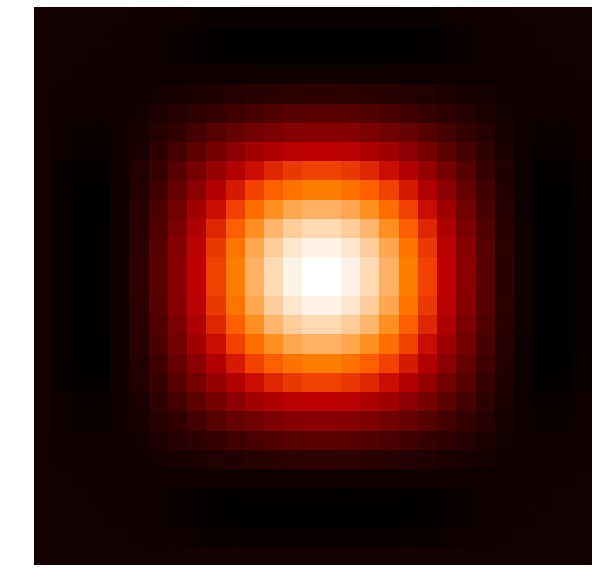

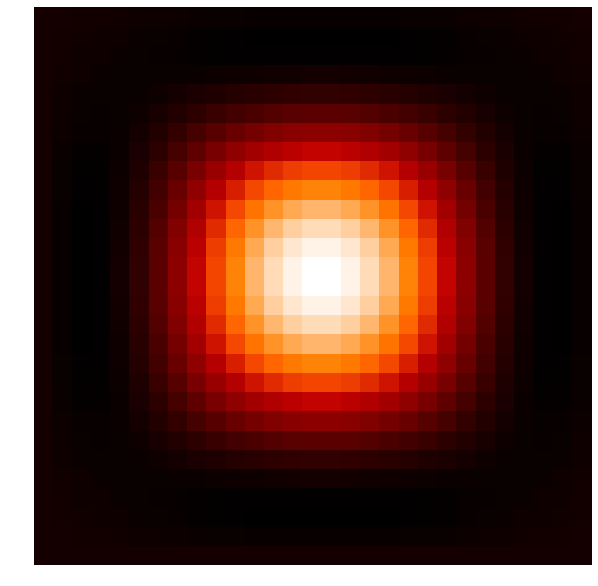

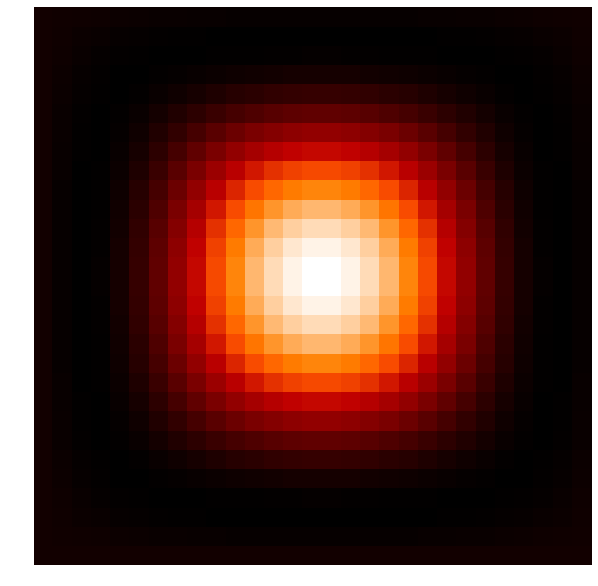

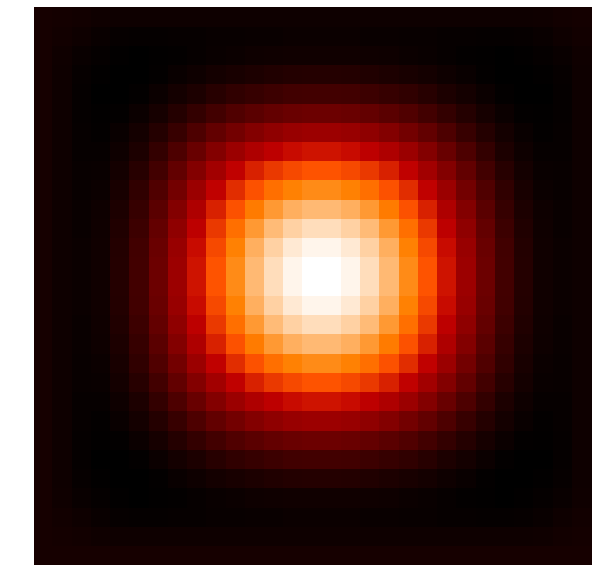

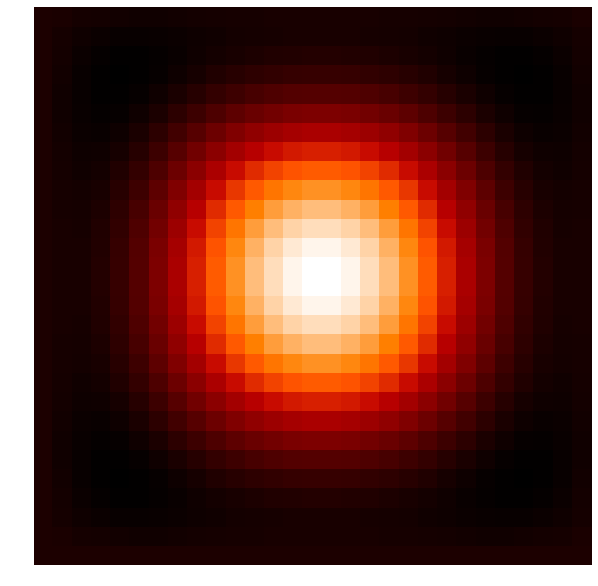

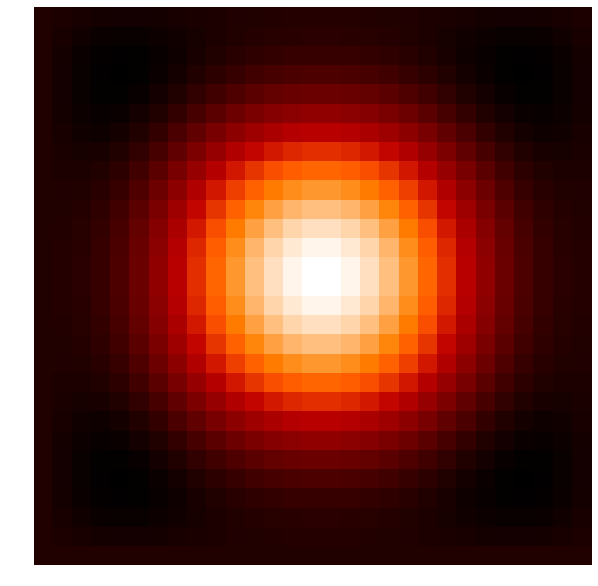

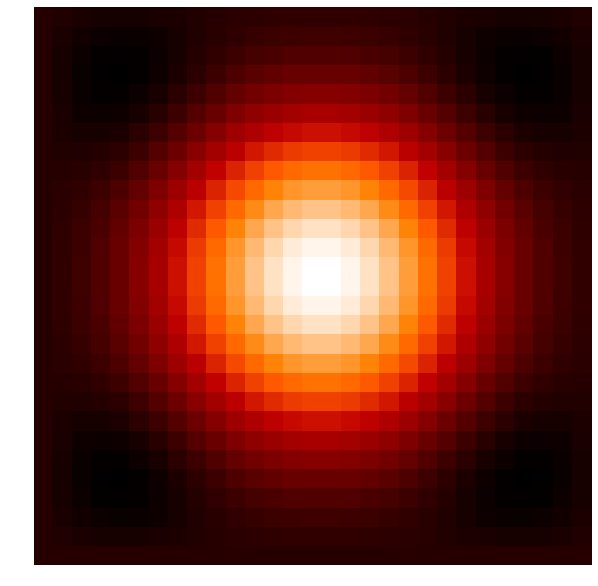

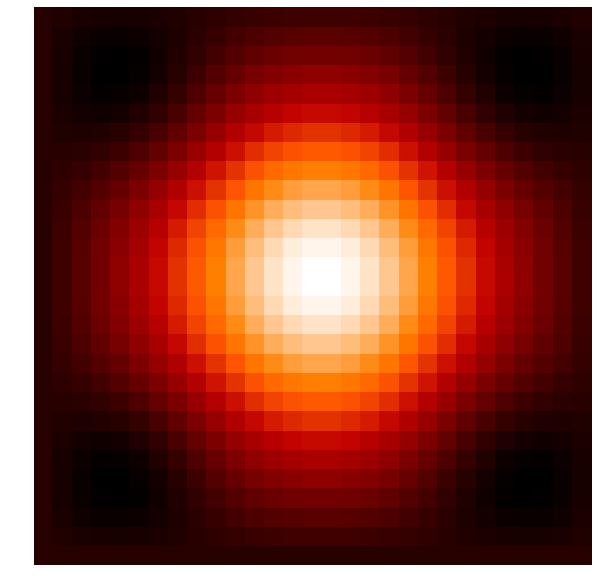

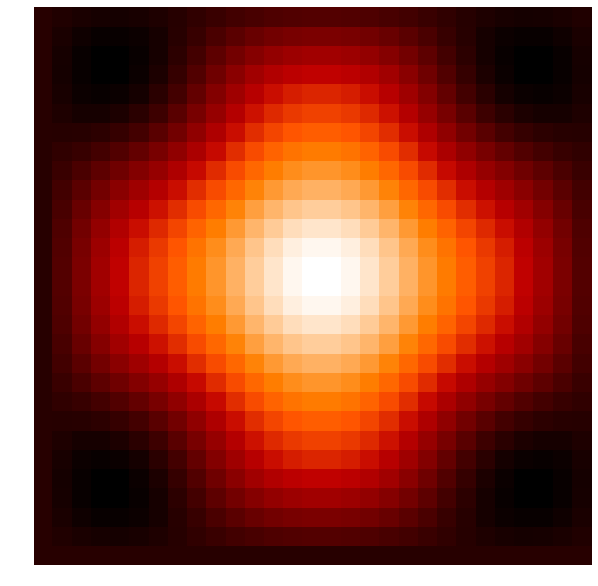

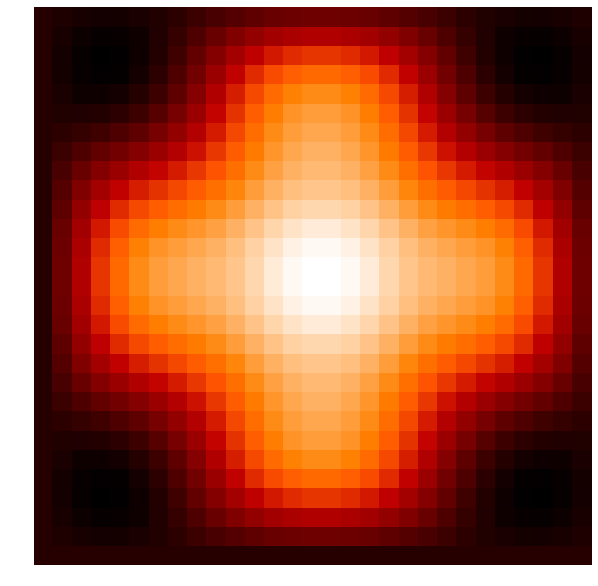

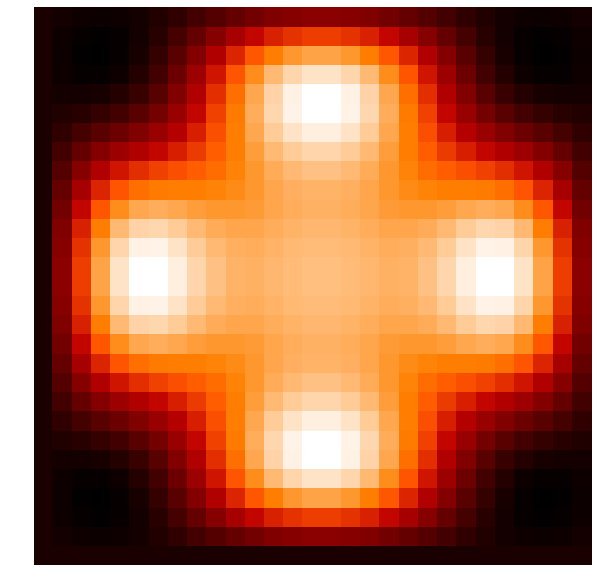

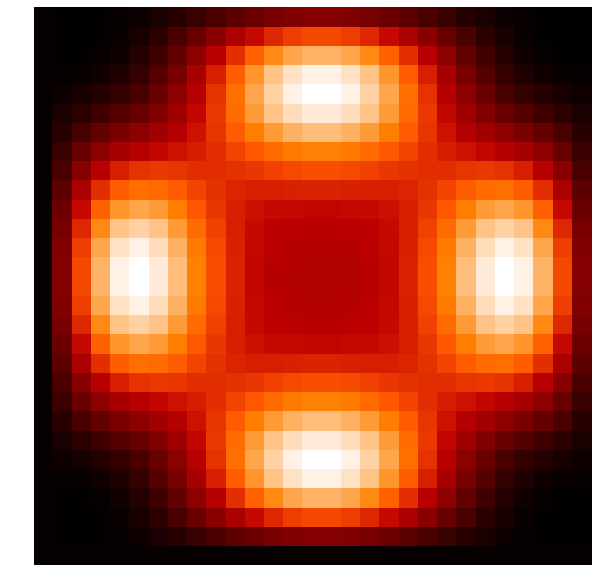

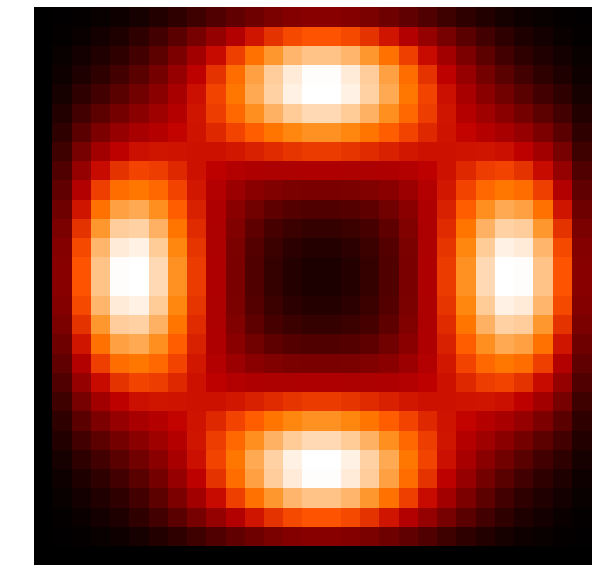

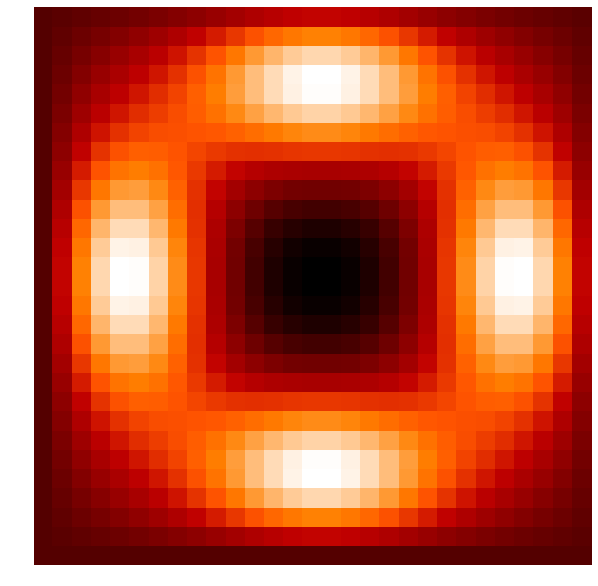

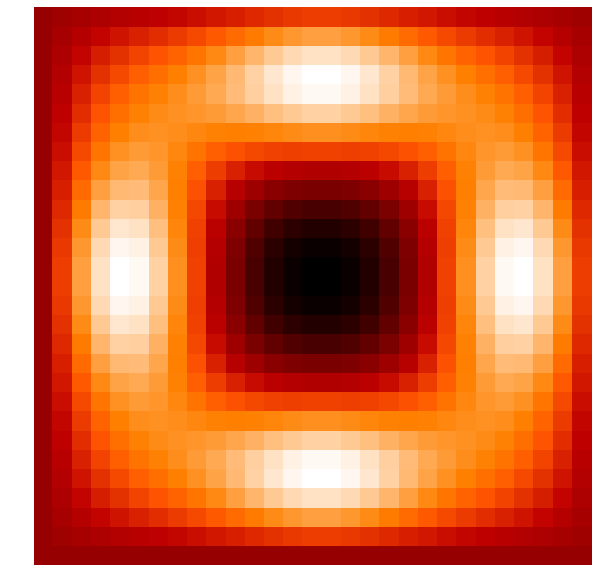

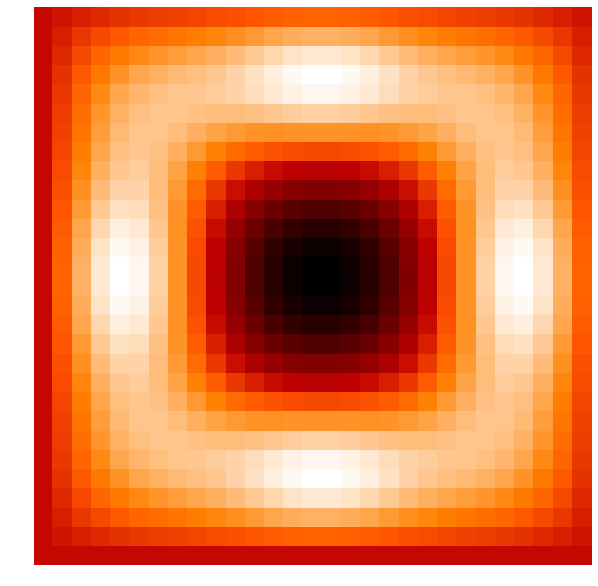

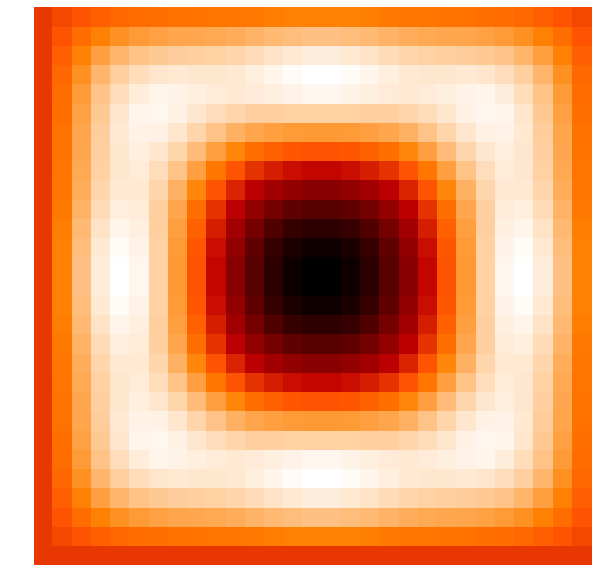

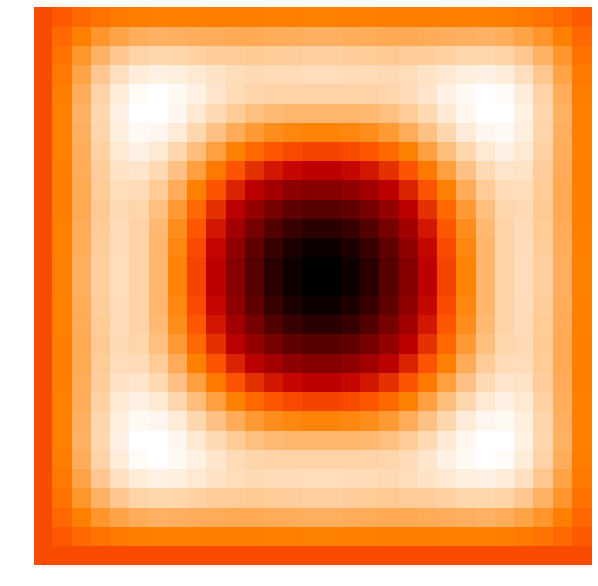

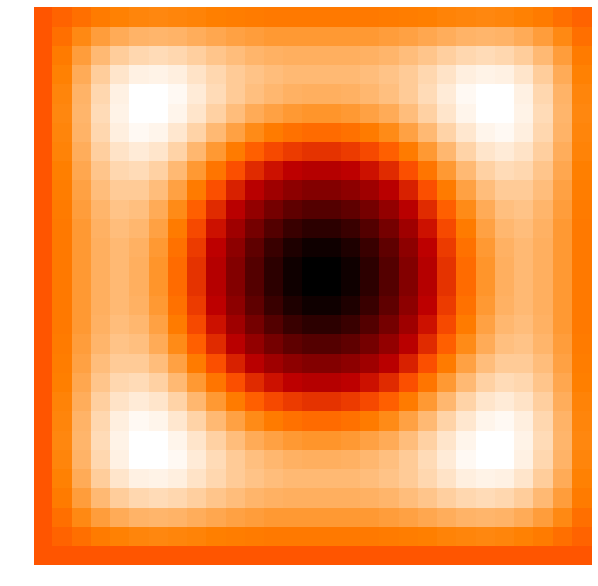

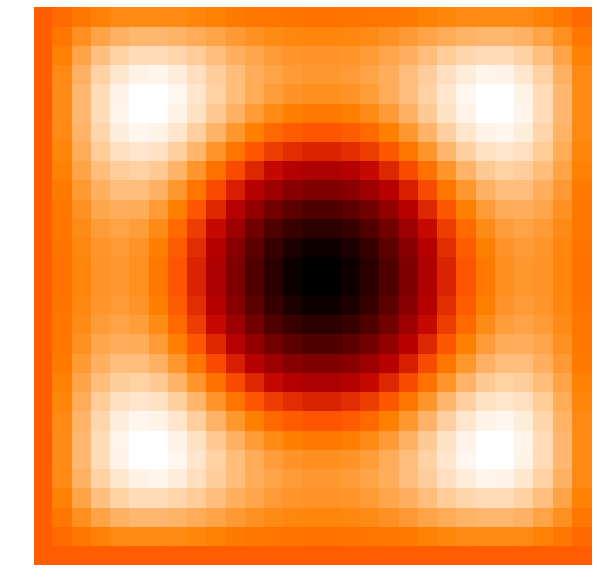

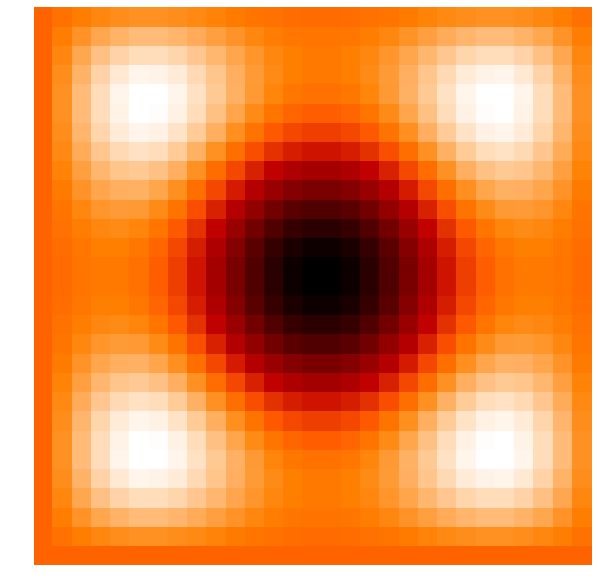

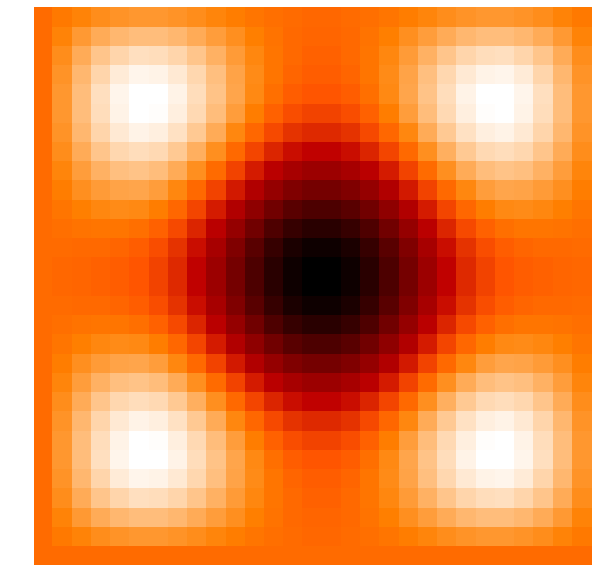

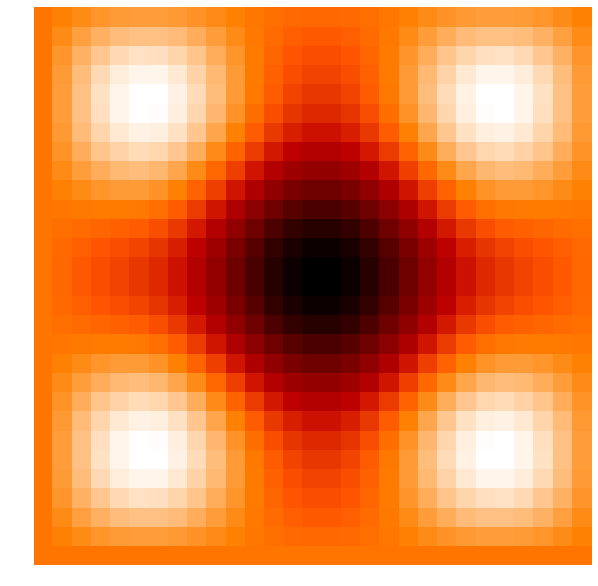

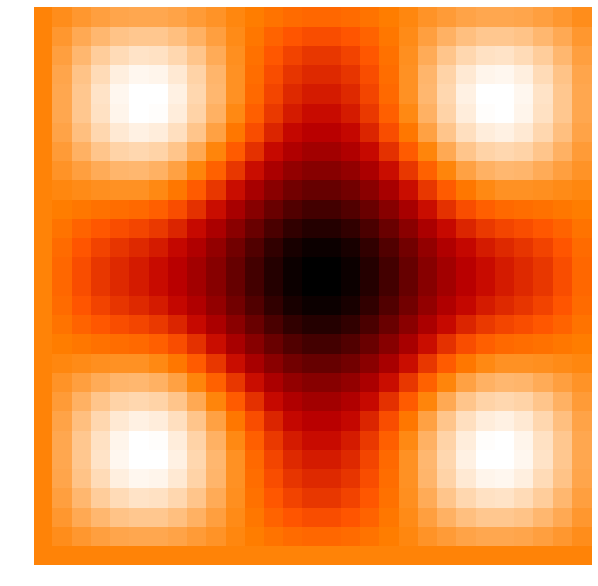

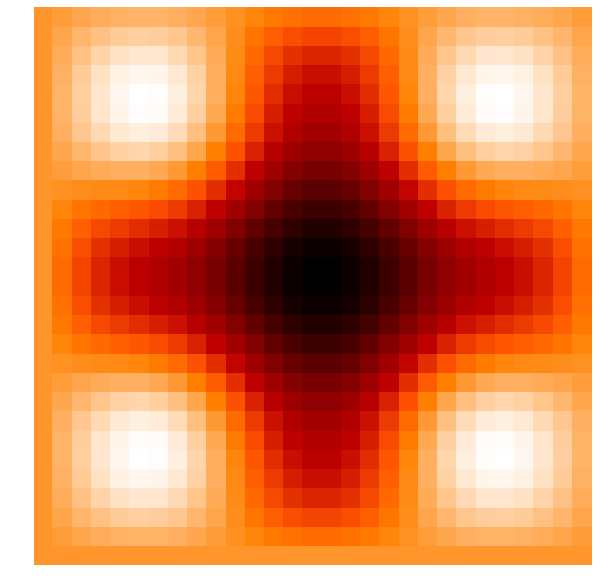

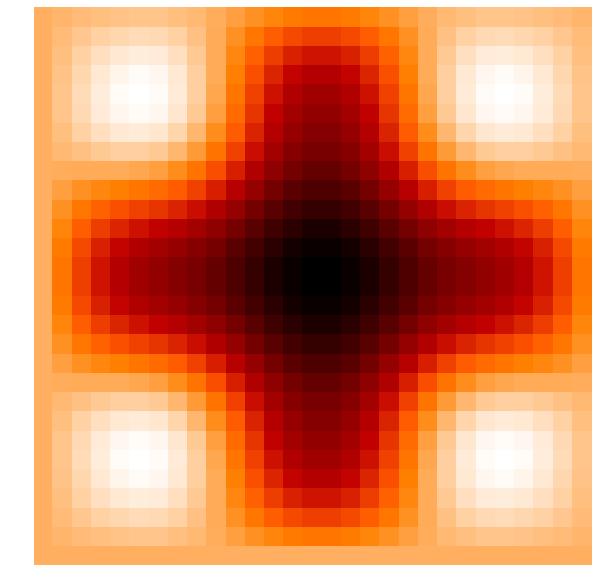

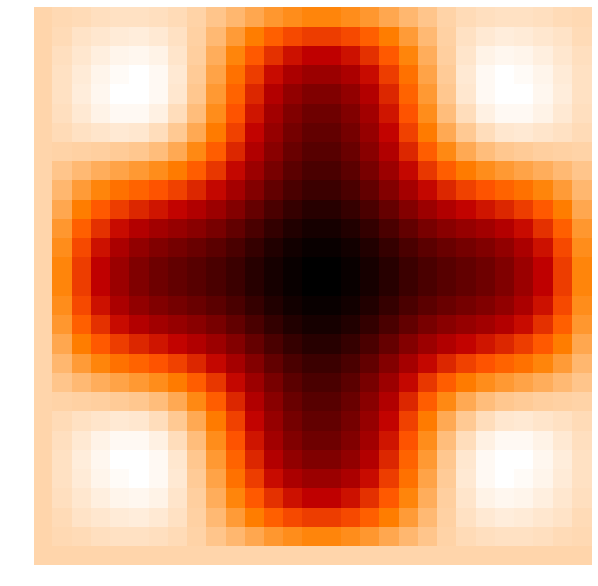

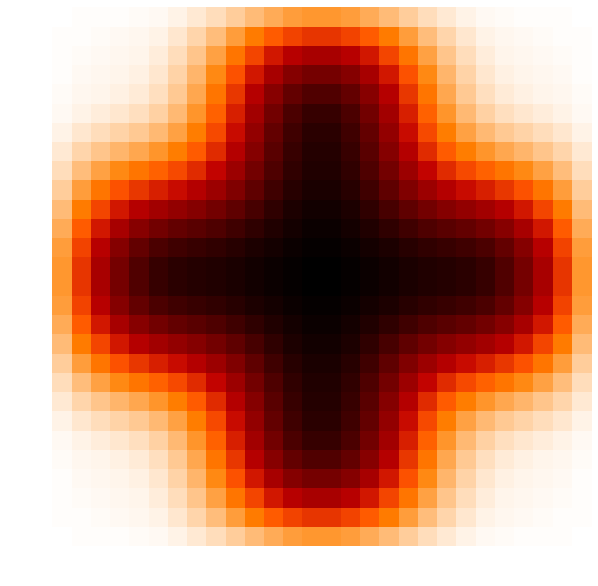

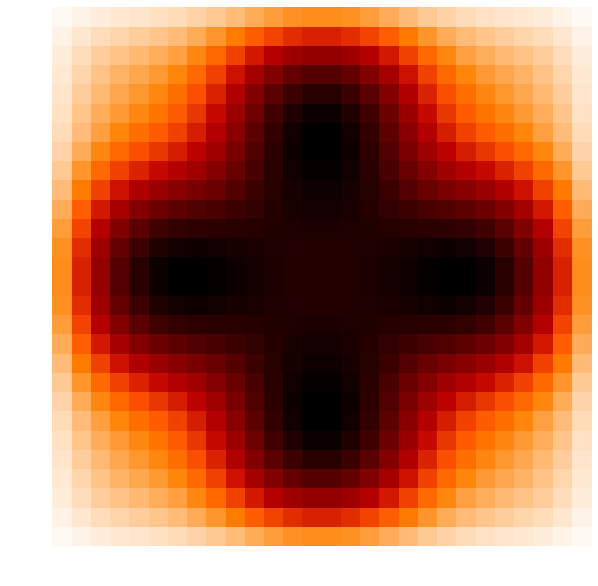

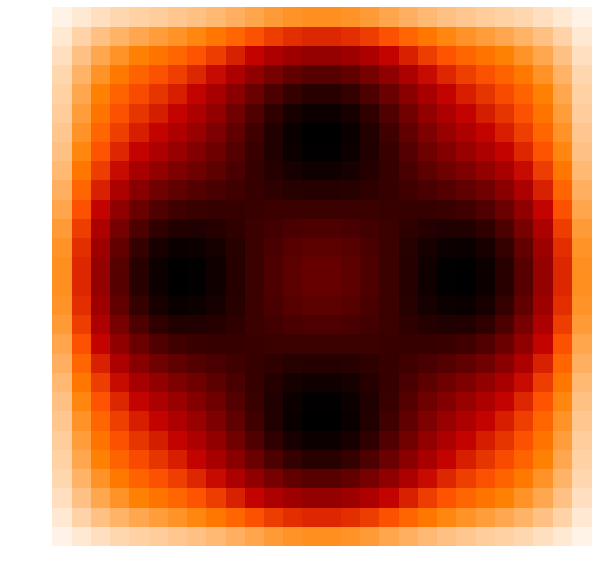

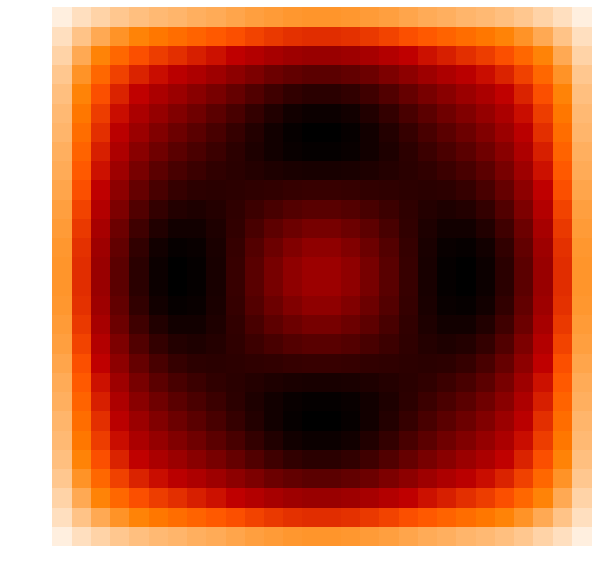

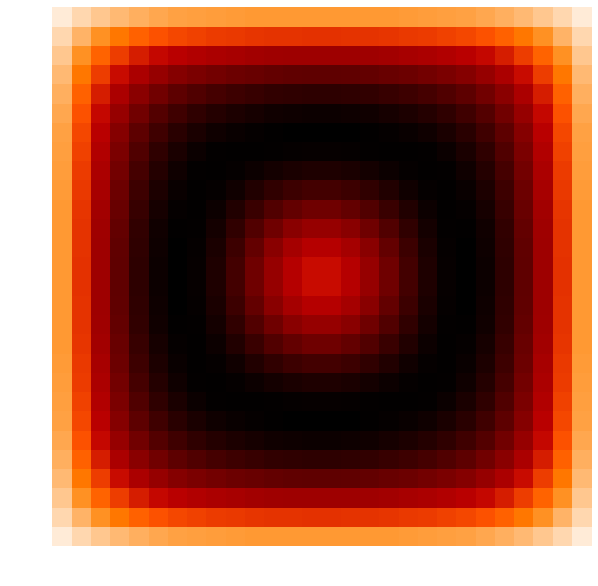

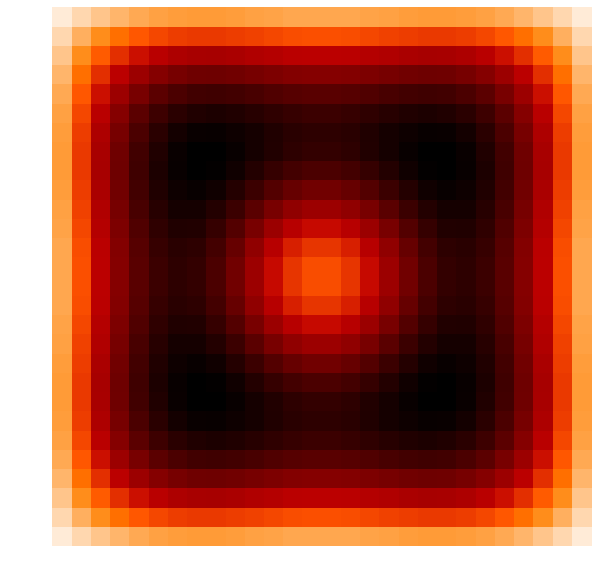

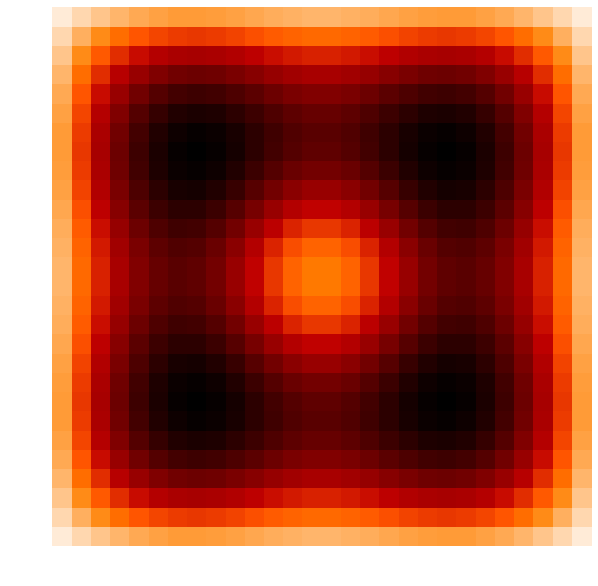

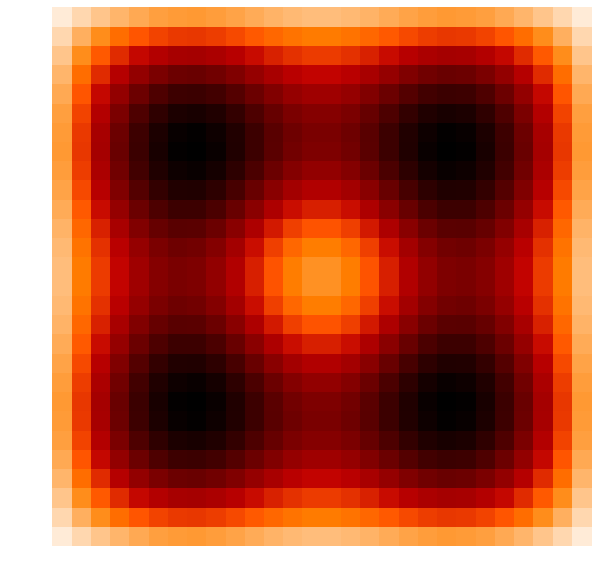

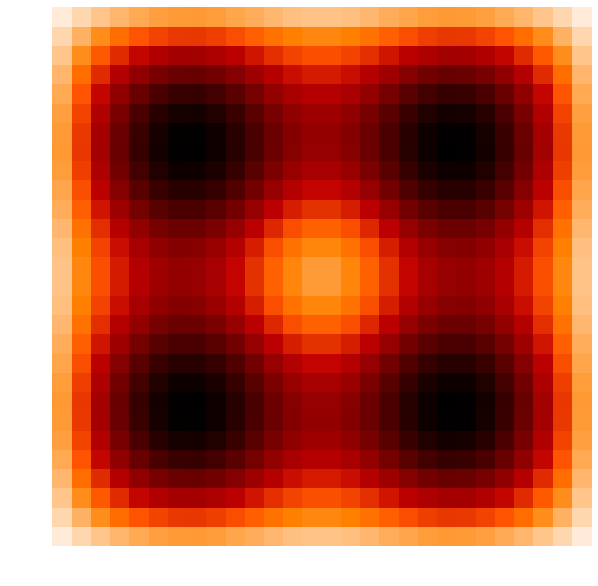

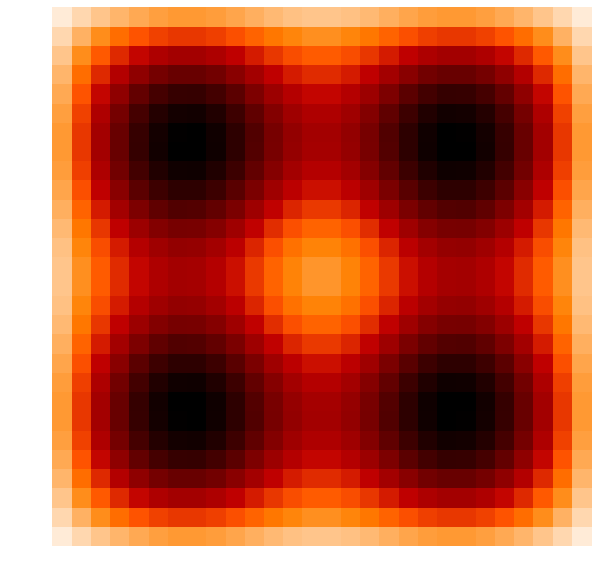

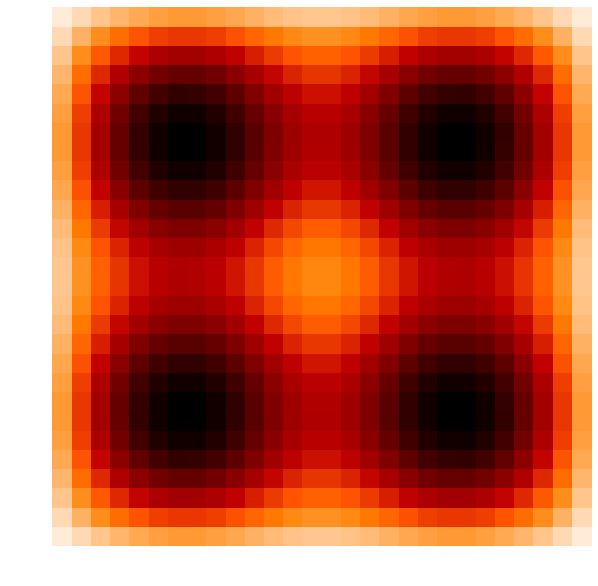

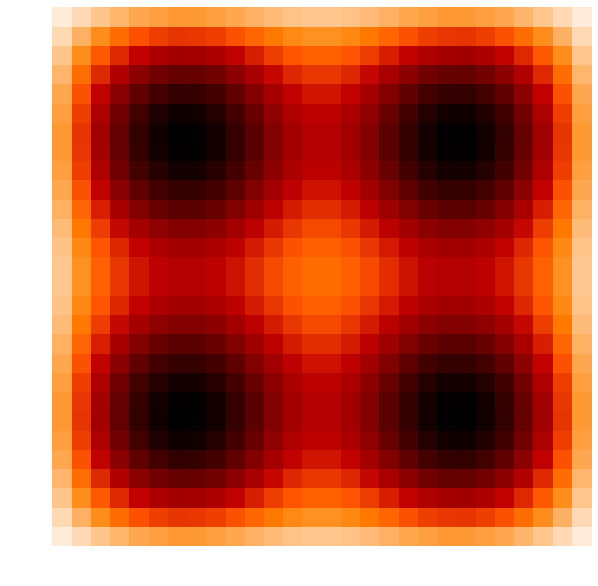

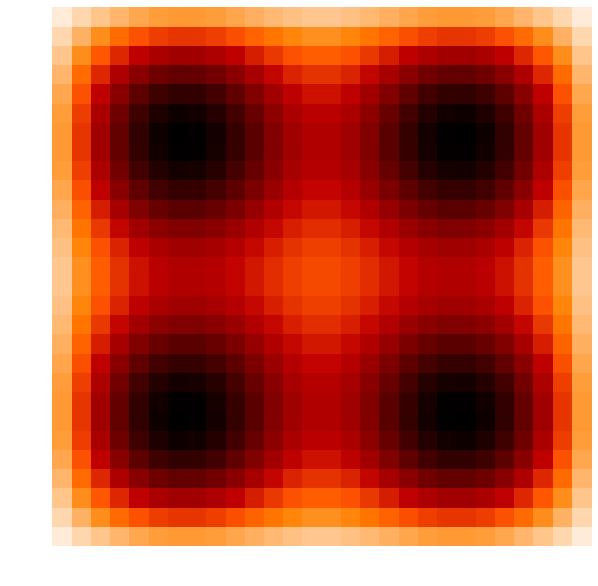

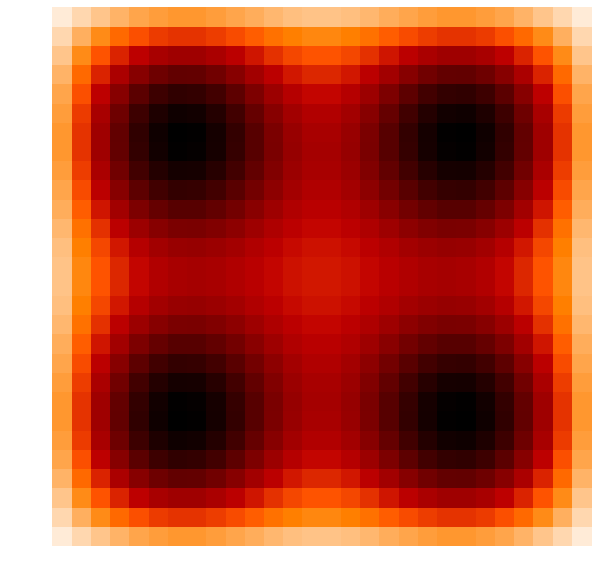

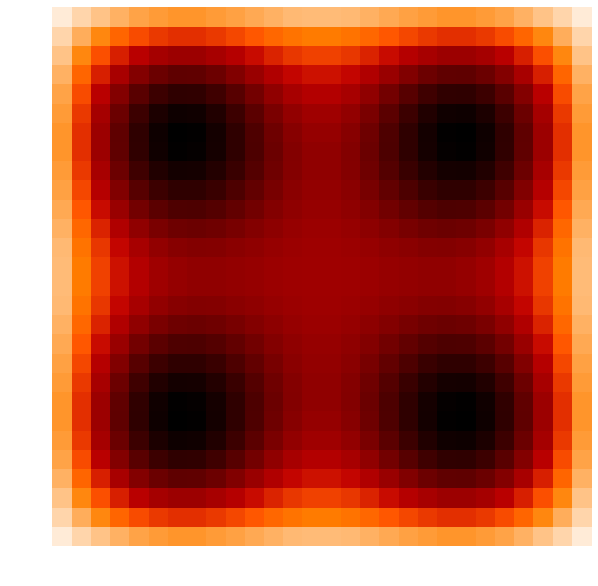

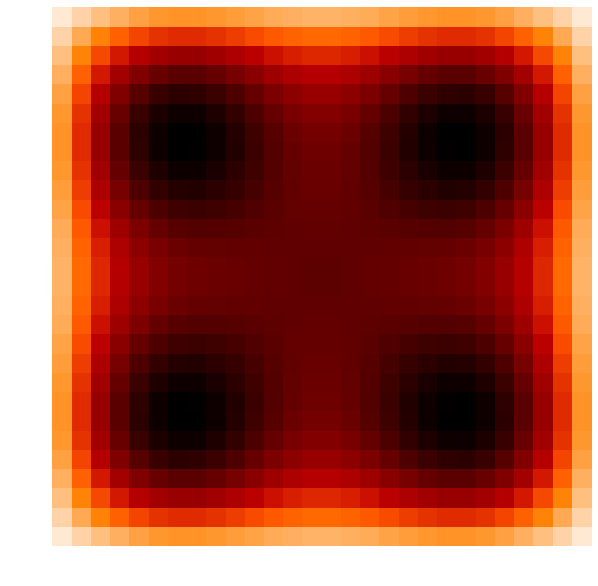

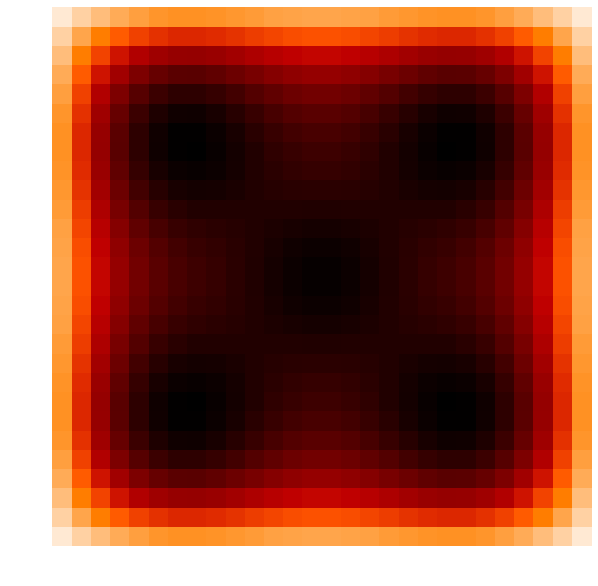

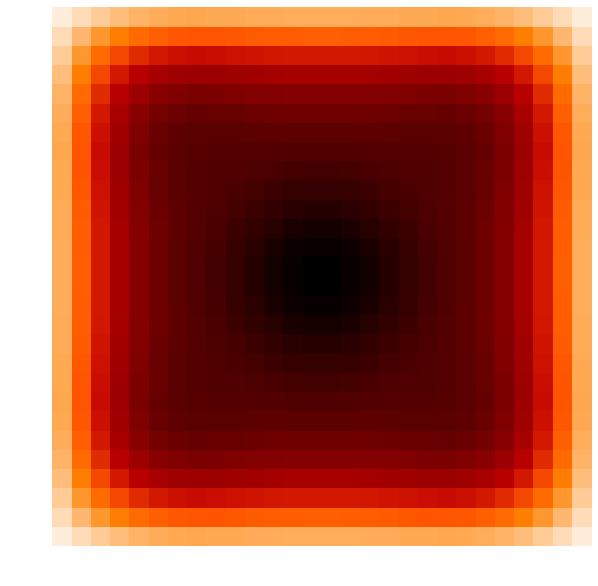

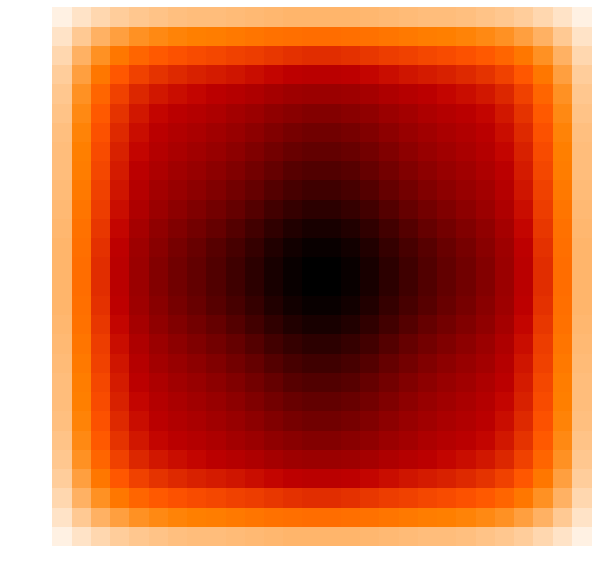

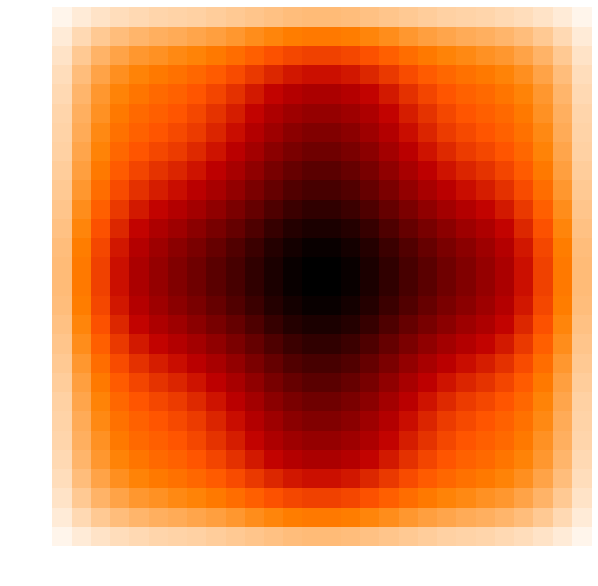

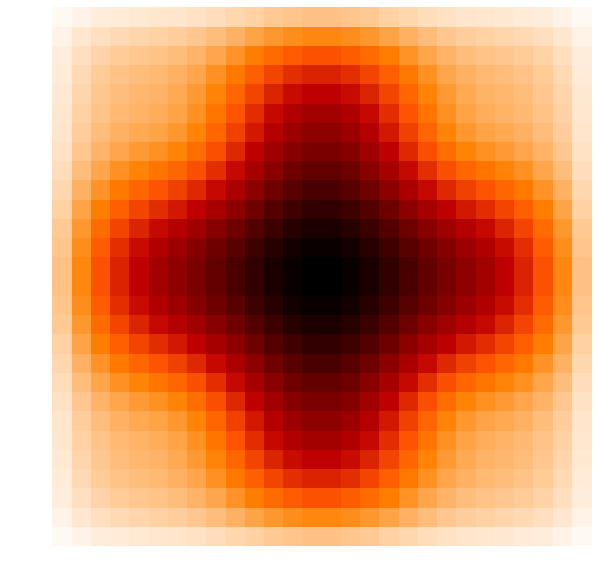

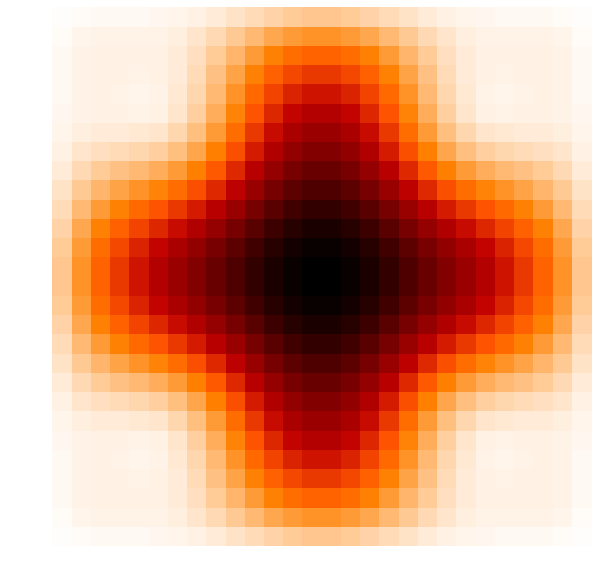

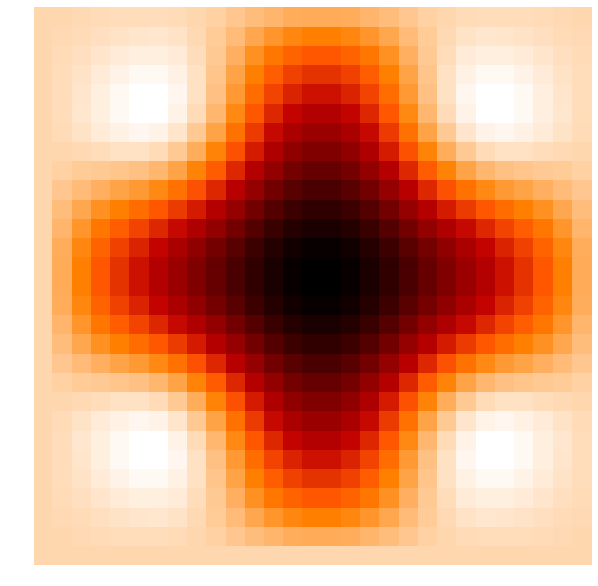

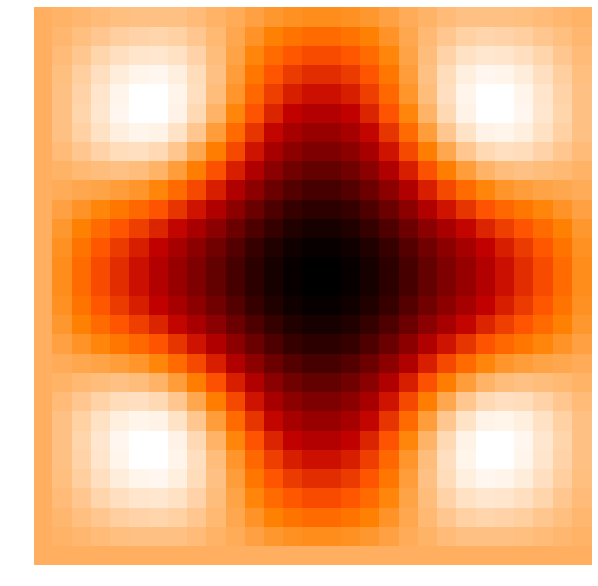

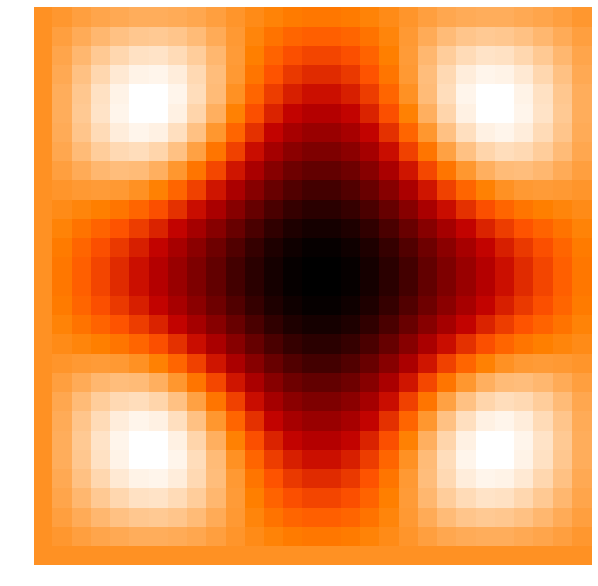

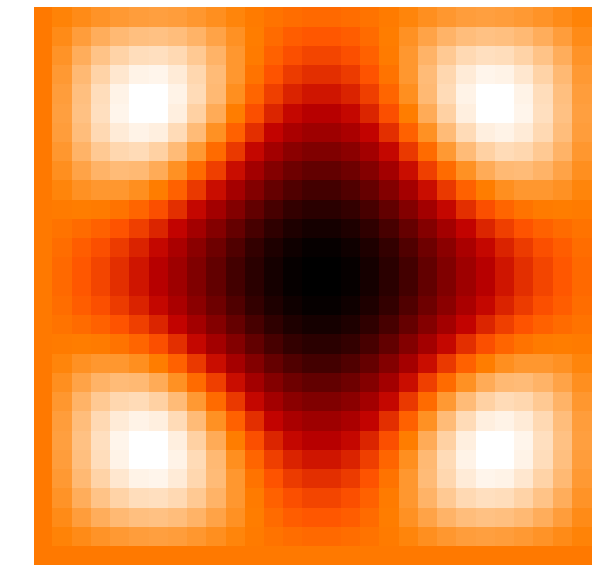

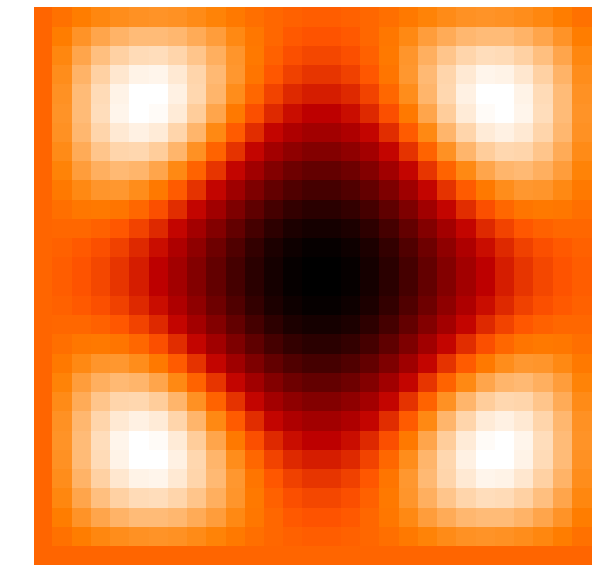

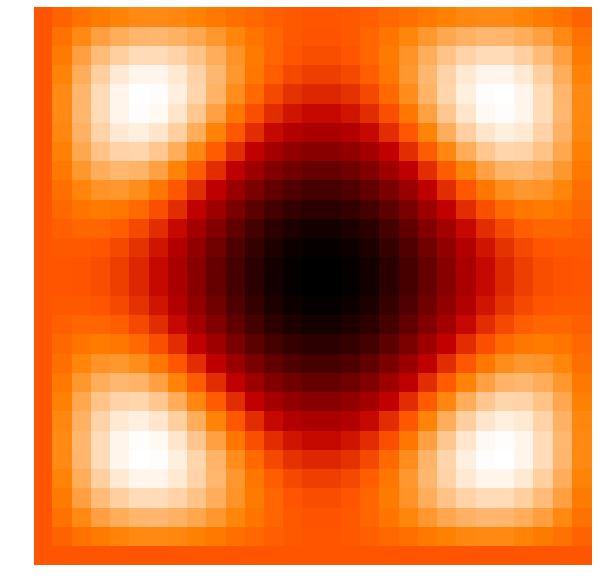

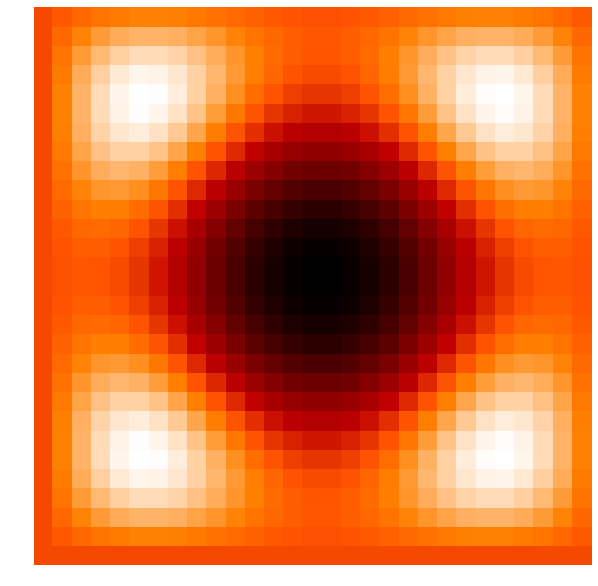

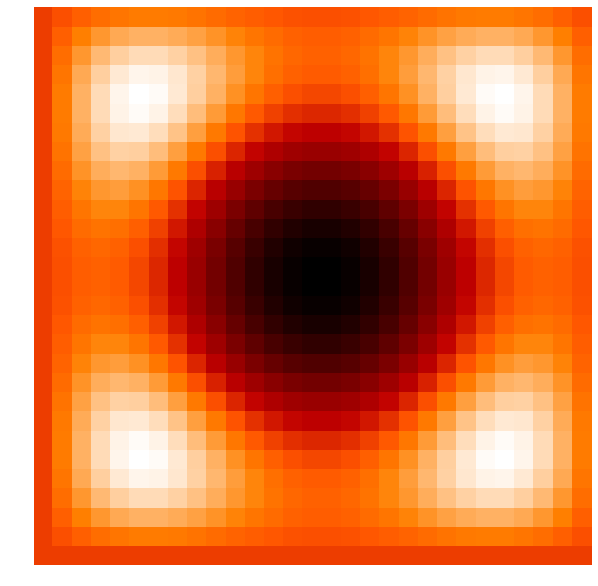

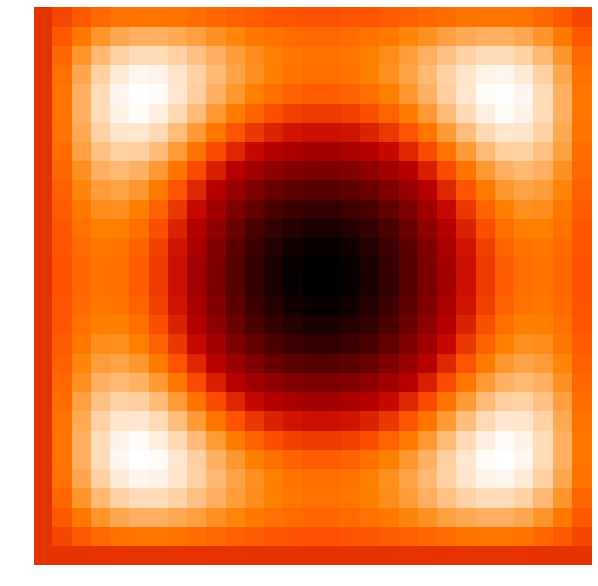

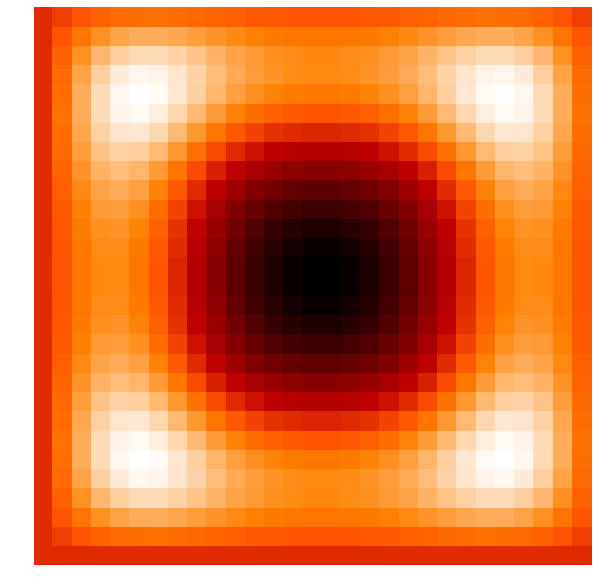

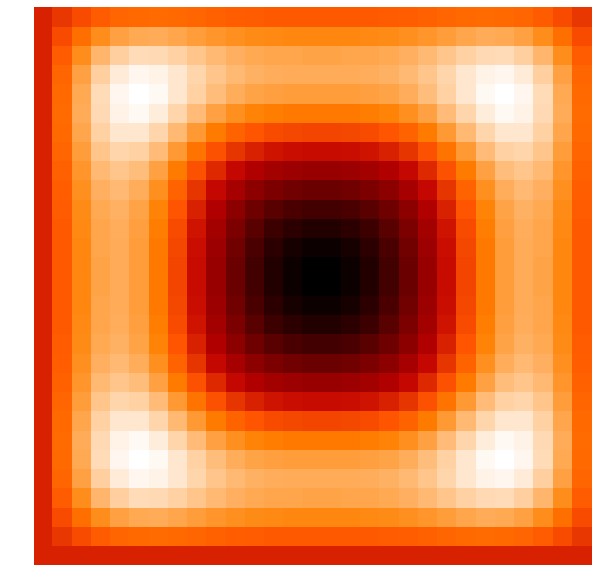

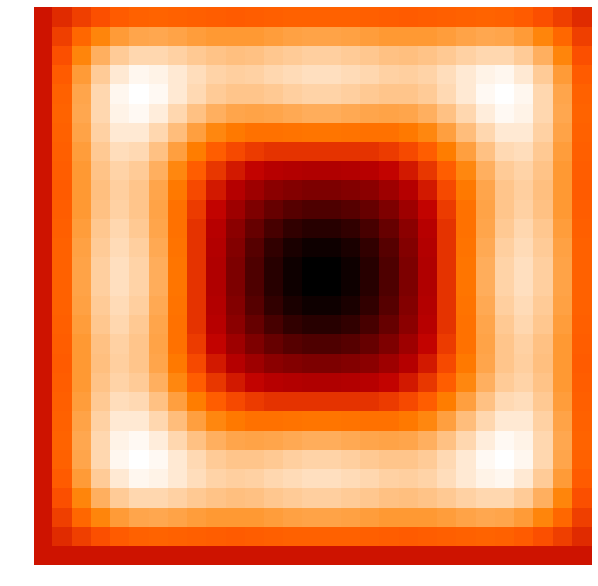

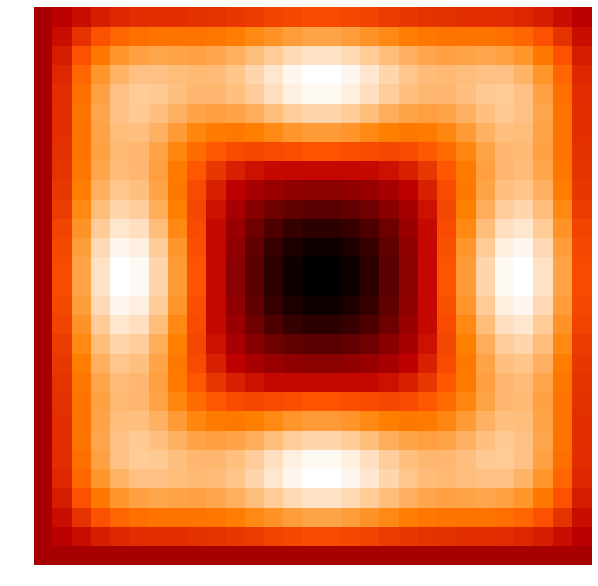

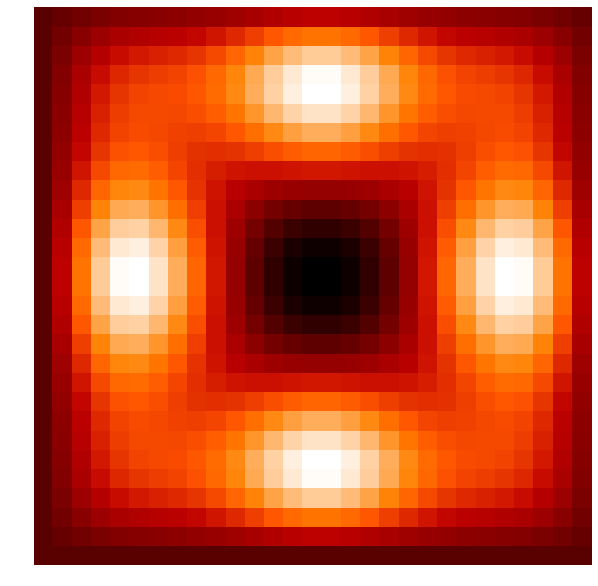

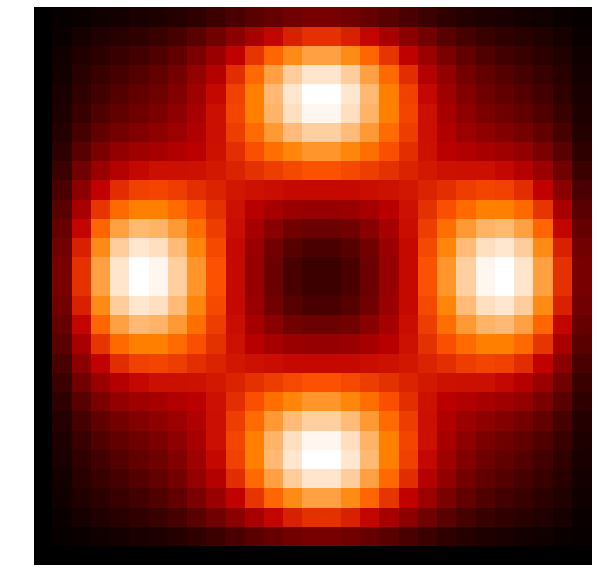

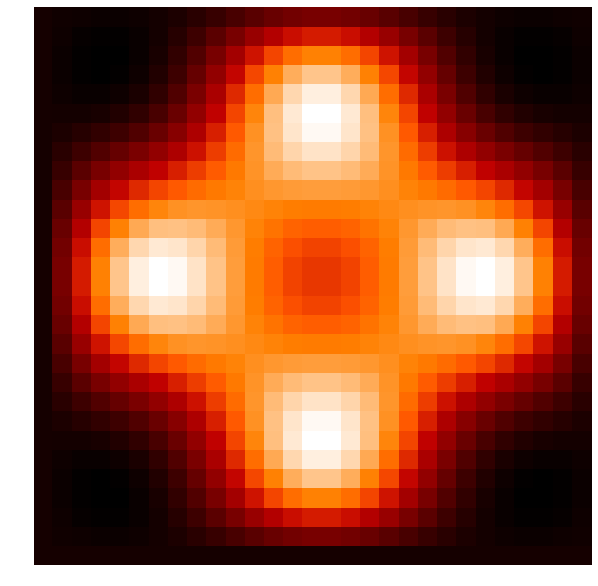

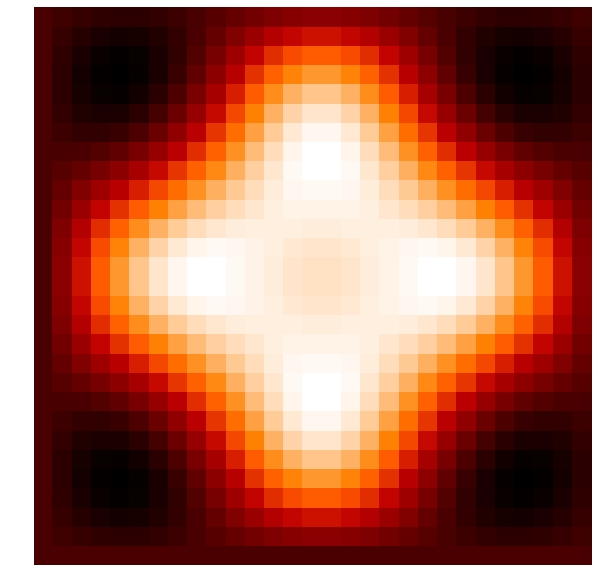

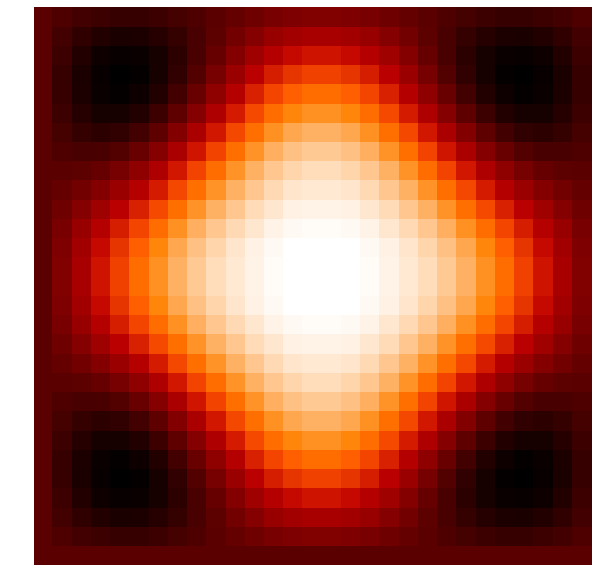

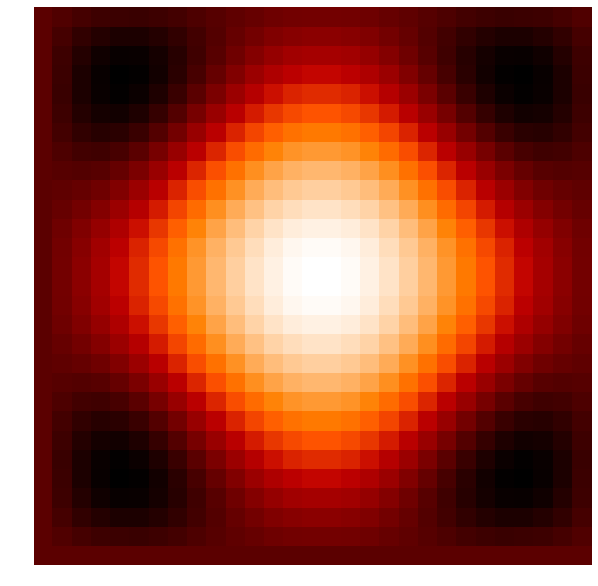

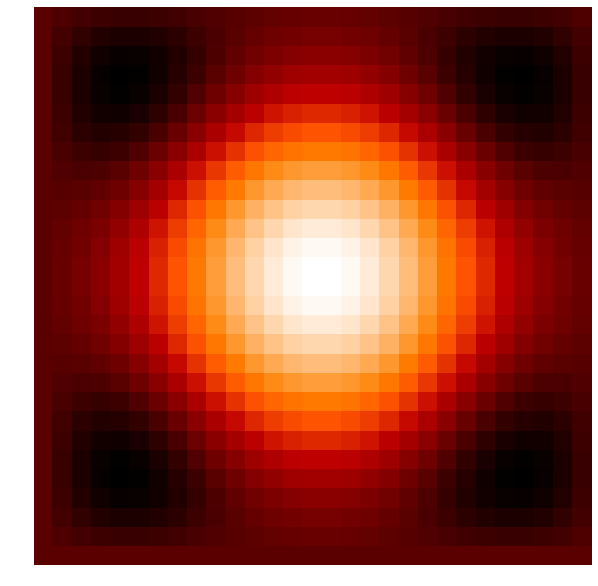

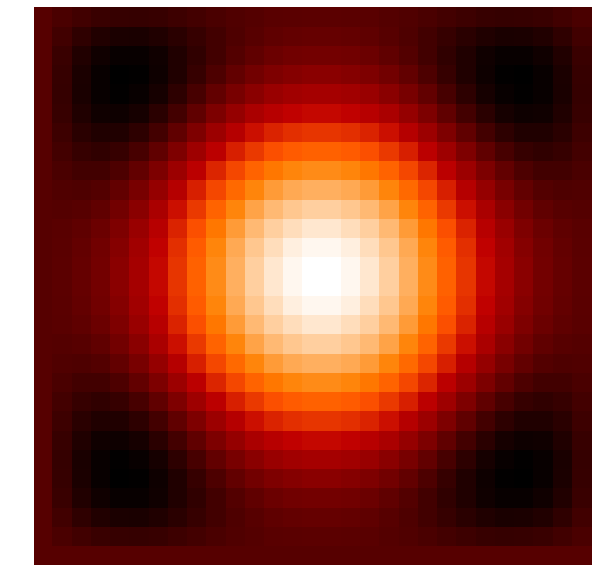

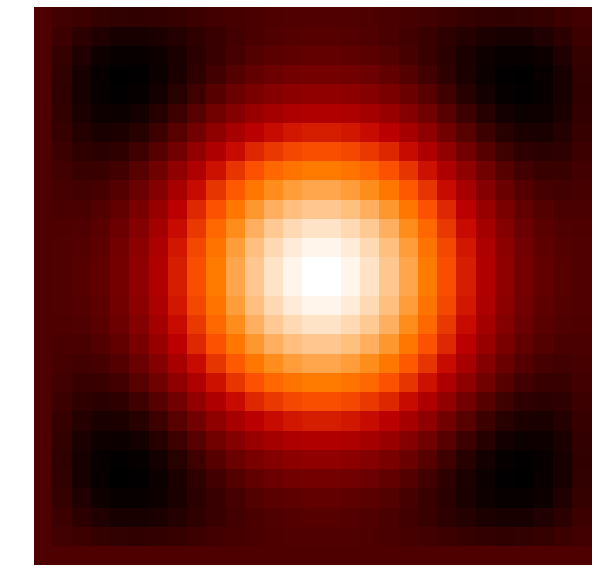

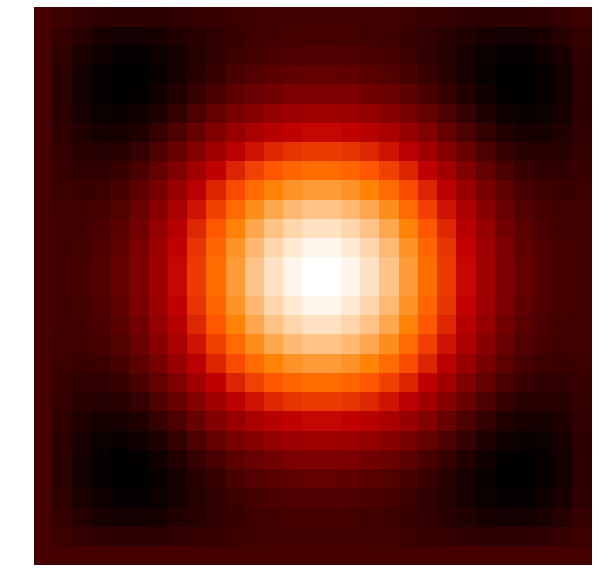

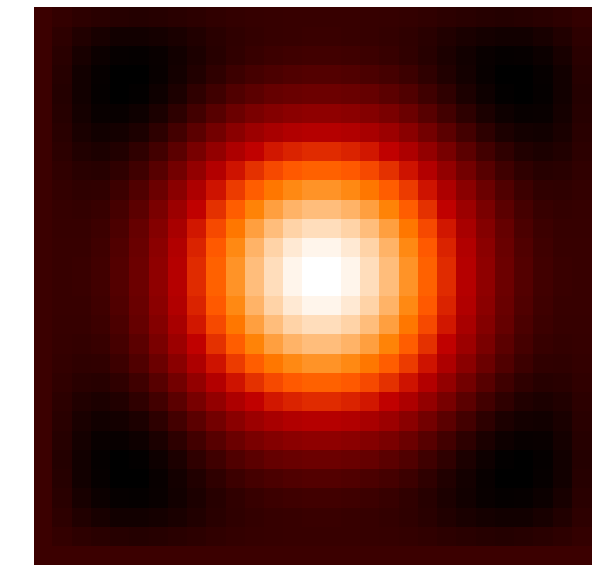

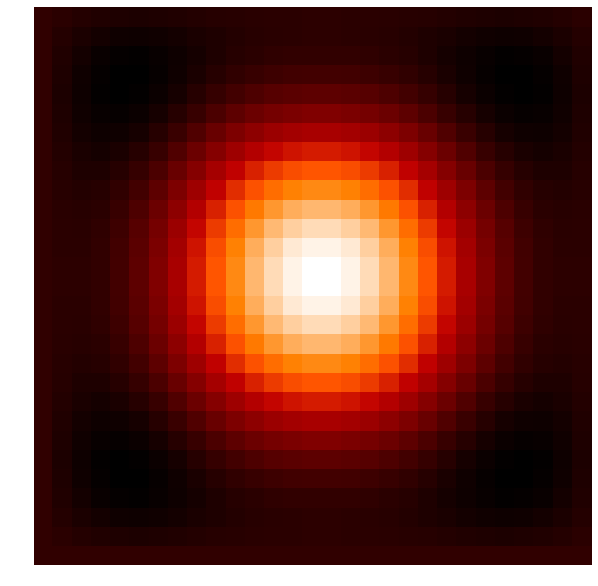

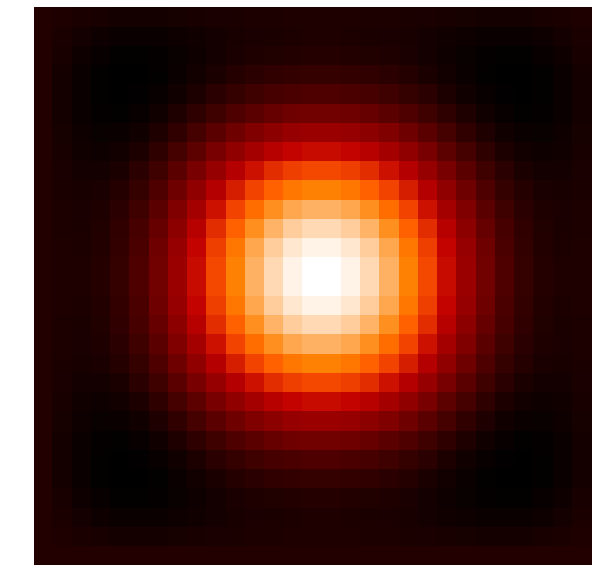

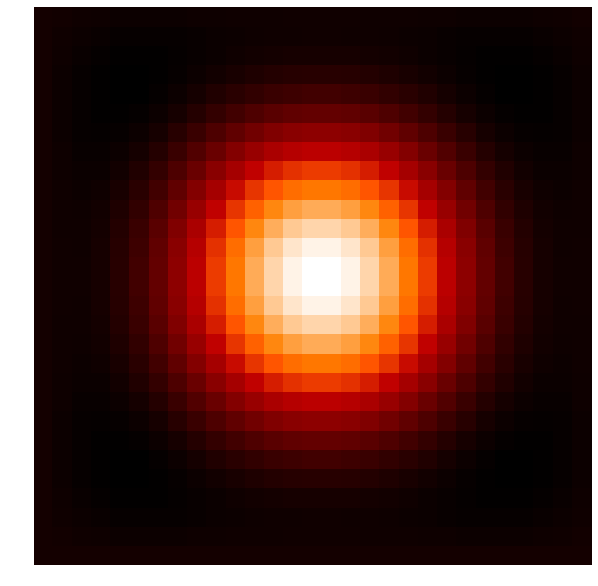

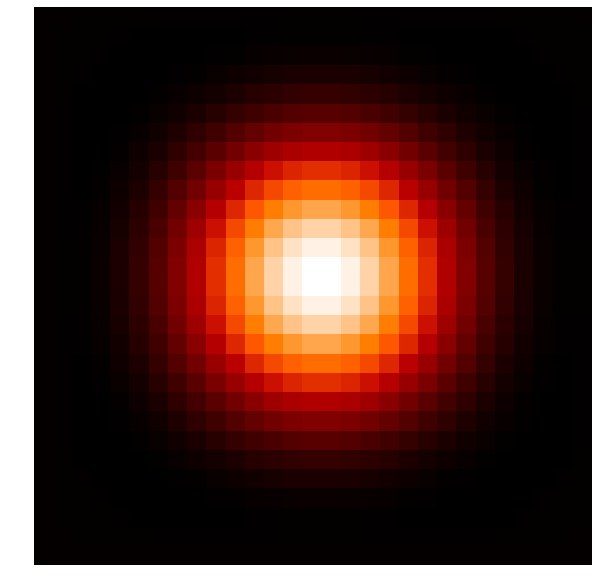

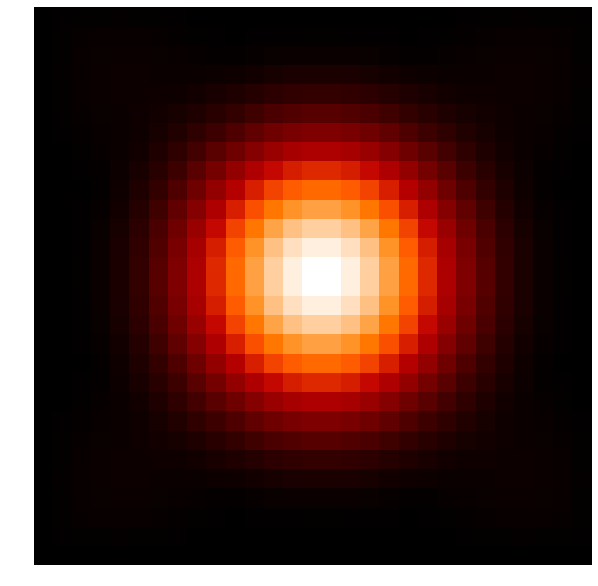

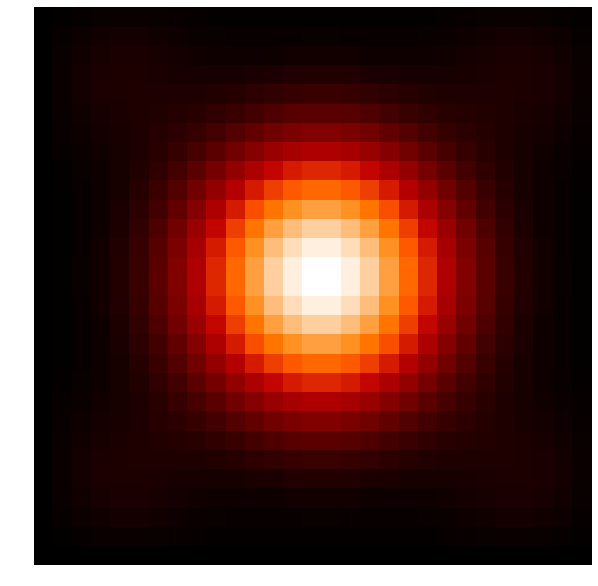

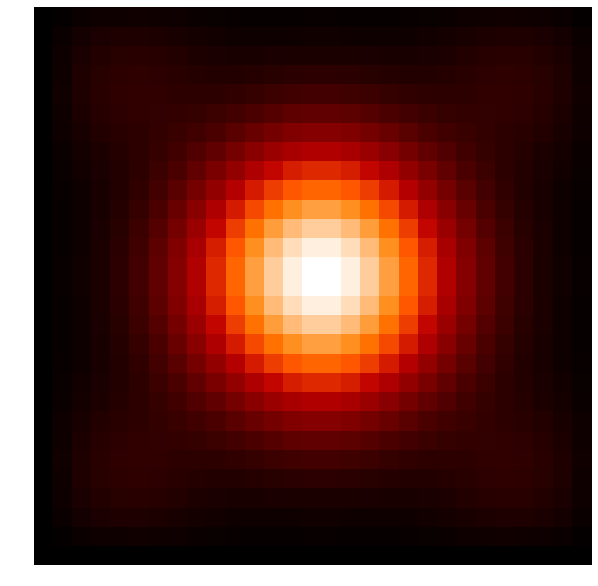

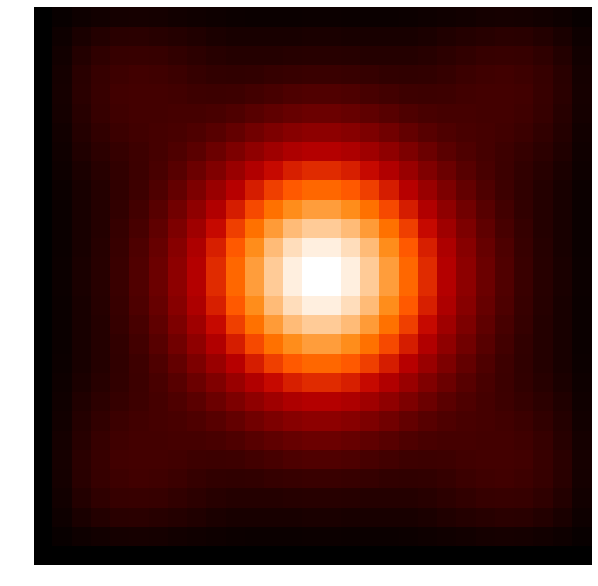

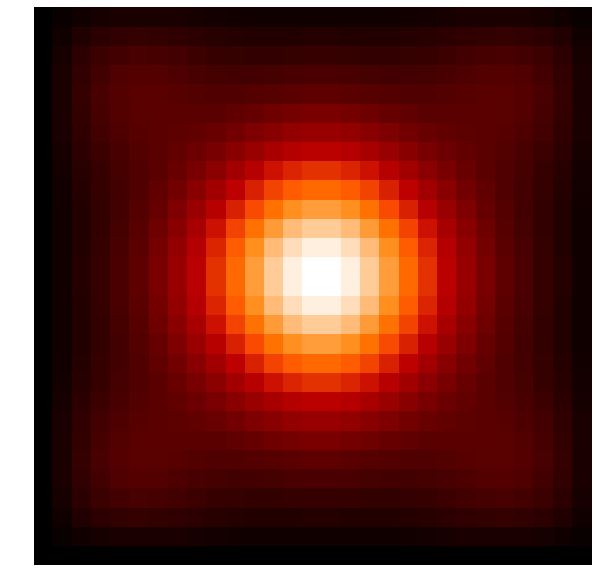

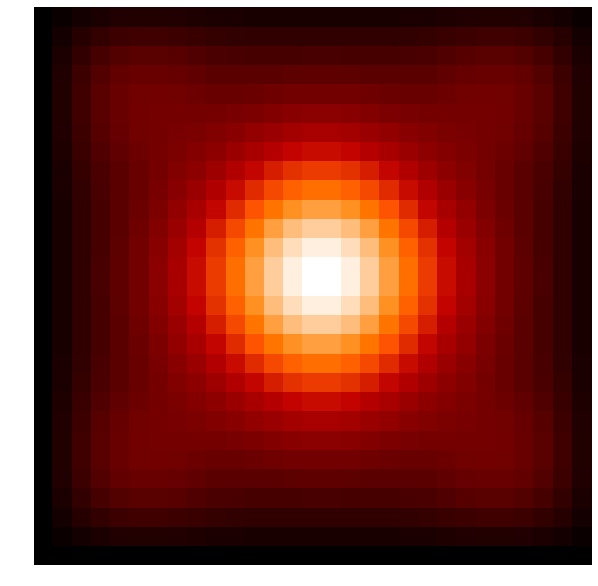

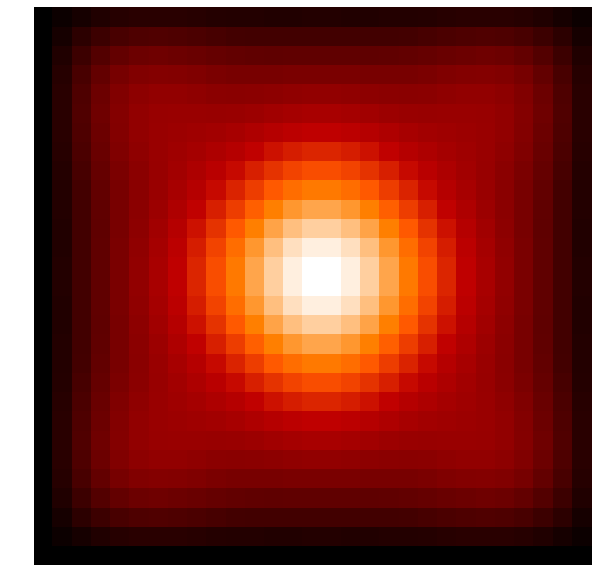

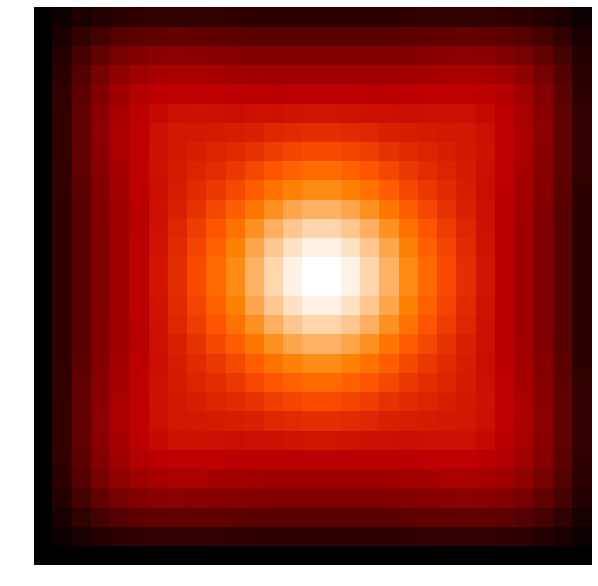

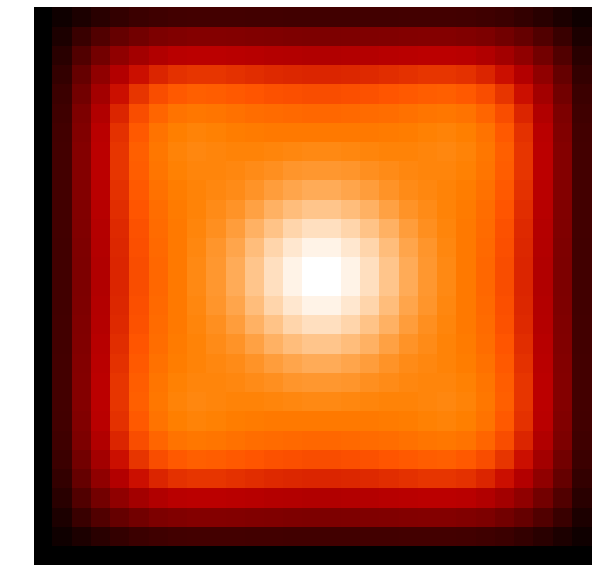

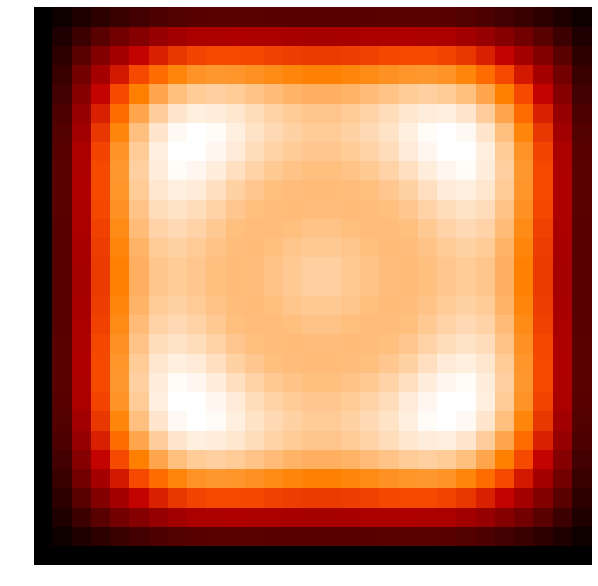

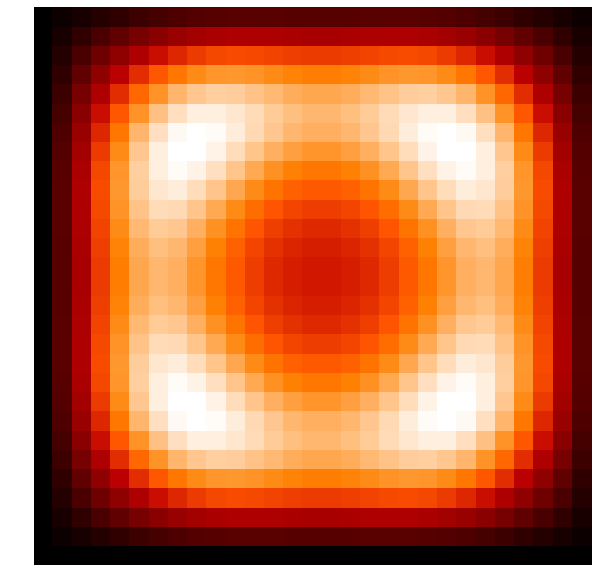

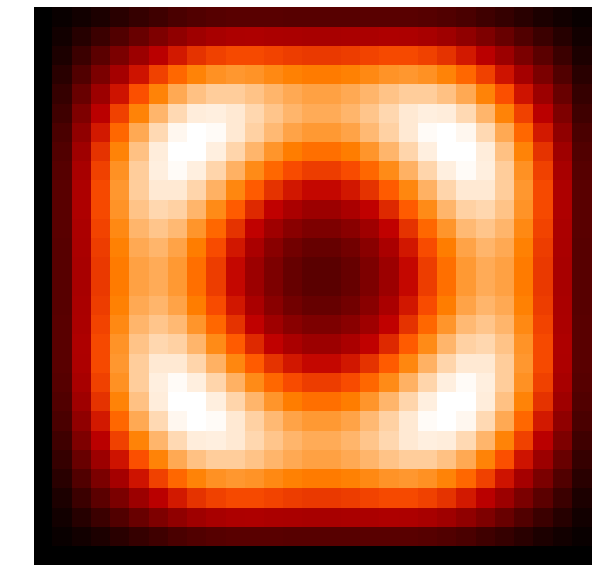

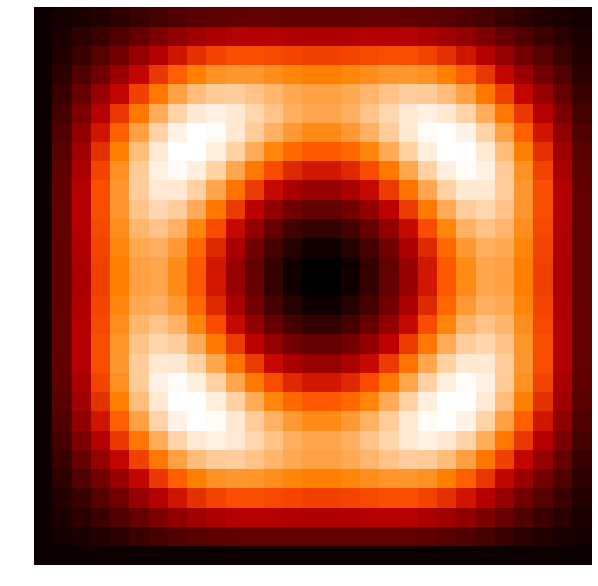

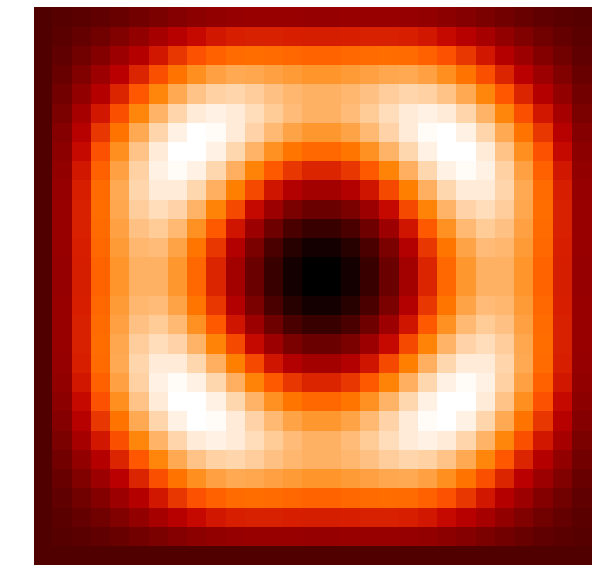

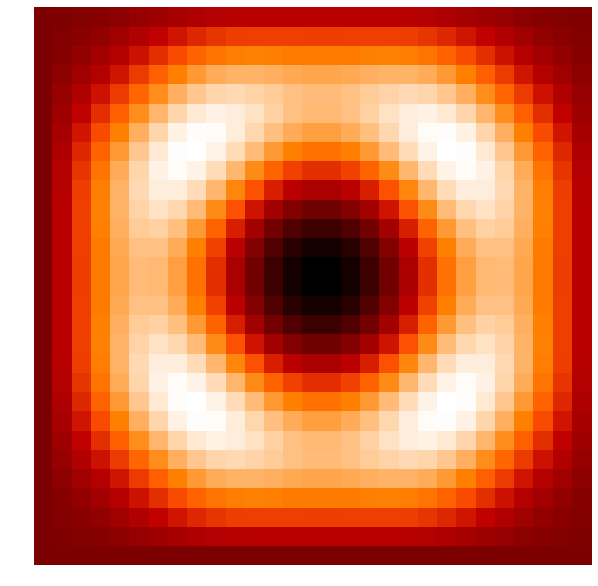

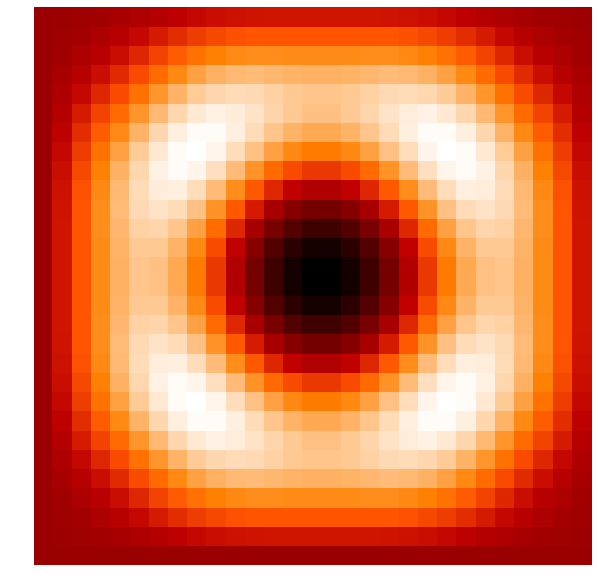

In [63]:
for i in range(len(drum)):
    plt.figure(figsize=(10,10))
    plt.pcolor(xcoords,ycoords,drum[i],cmap='gist_heat')#,vmin=0.,vmax=1.)
    plt.tight_layout
    plt.xlim(-0.33,0.33)
    plt.ylim(-0.33,0.33)
    plt.axis('off')
    plt.savefig(str(i+100))